In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import glob
import gc
from tqdm import tqdm
import ta 

1. Pre-processing and EDA
    i) Add some missing and duplicate value and then remove it
    ii) Remove 10%+ returns after Feature Engineering. Maybe Use std.dev to remove them
    iii) Visualization (3D Graph of Return with RSI and MFI)
    iv) Co-rrelation Heatmap of Return with RSI
    v) histograms, boxplots, scatter plots

3. Condition for Hypothesis Test:
    i) Center_Line>0, MA_14>MA_50, Voume>0.8*Avg_Volume
    ii) RSI>40, EMA_20>SMA_50, Volume>0.8*Avg_Volume
    iii) Price > MA_100 & EMA_20 and Center_Line>0 
    iv) EMA_14>SMA_50

4. Linear Regression

In [20]:
# Path to the folder
folder_path = '/media/mahir_uddin/Mahir/5-2/Data Analytics/Assignment Dataset/stocks'  # Use relative path

# Get list of CSV files
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Load into dictionary
stock_data = {}

for file in tqdm(csv_files):
    try:
        ticker = os.path.basename(file).replace('.csv', '')
        df = pd.read_csv(file)
        df = df.drop(columns=['Date','Open','High','Low','Close'])
        df = df.dropna()
        df['Daily_Return_%'] = df['Adj Close'].pct_change(fill_method=None).fillna(0) * 100
        stock_data[ticker] = df   
        
        del df
        gc.collect()
        print(5)
        
    except Exception as e:
        print(f"Error loading {file}: {e}")


  0%|                                          | 2/5884 [00:00<20:05,  4.88it/s]

5
5


  0%|                                          | 4/5884 [00:00<19:31,  5.02it/s]

5
5


  0%|                                          | 5/5884 [00:01<19:53,  4.93it/s]

5


  0%|                                          | 6/5884 [00:01<20:29,  4.78it/s]

5
5


  0%|                                          | 9/5884 [00:01<19:45,  4.95it/s]

5
5


  0%|                                         | 11/5884 [00:02<19:25,  5.04it/s]

5
5


  0%|                                         | 13/5884 [00:02<19:27,  5.03it/s]

5
5


  0%|                                         | 14/5884 [00:02<19:17,  5.07it/s]

5


  0%|                                         | 16/5884 [00:03<19:29,  5.02it/s]

5
5


  0%|▏                                        | 18/5884 [00:03<19:26,  5.03it/s]

5
5


  0%|▏                                        | 19/5884 [00:03<19:30,  5.01it/s]

5


  0%|▏                                        | 20/5884 [00:04<19:45,  4.95it/s]

5
5


  0%|▏                                        | 22/5884 [00:04<21:25,  4.56it/s]

5


  0%|▏                                        | 23/5884 [00:04<21:17,  4.59it/s]

5


  0%|▏                                        | 24/5884 [00:04<21:09,  4.62it/s]

5


  0%|▏                                        | 25/5884 [00:05<21:50,  4.47it/s]

5


  0%|▏                                        | 26/5884 [00:05<22:20,  4.37it/s]

5


  0%|▏                                        | 27/5884 [00:05<22:01,  4.43it/s]

5


  0%|▏                                        | 28/5884 [00:05<21:33,  4.53it/s]

5


  0%|▏                                        | 29/5884 [00:06<21:05,  4.63it/s]

5


  1%|▏                                        | 30/5884 [00:06<21:04,  4.63it/s]

5


  1%|▏                                        | 31/5884 [00:06<21:57,  4.44it/s]

5


  1%|▏                                        | 32/5884 [00:06<22:21,  4.36it/s]

5


  1%|▏                                        | 33/5884 [00:06<21:46,  4.48it/s]

5
5


  1%|▏                                        | 35/5884 [00:07<21:51,  4.46it/s]

5


  1%|▎                                        | 36/5884 [00:07<21:20,  4.57it/s]

5


  1%|▎                                        | 37/5884 [00:07<21:42,  4.49it/s]

5


  1%|▎                                        | 38/5884 [00:08<22:04,  4.41it/s]

5


  1%|▎                                        | 39/5884 [00:08<22:49,  4.27it/s]

5


  1%|▎                                        | 40/5884 [00:08<23:39,  4.12it/s]

5


  1%|▎                                        | 41/5884 [00:08<23:06,  4.21it/s]

5


  1%|▎                                        | 43/5884 [00:09<21:18,  4.57it/s]

5
5


  1%|▎                                        | 44/5884 [00:09<20:59,  4.64it/s]

5
5


  1%|▎                                        | 46/5884 [00:09<20:09,  4.83it/s]

5
5


  1%|▎                                        | 48/5884 [00:10<20:25,  4.76it/s]

5
5


  1%|▎                                        | 51/5884 [00:10<20:00,  4.86it/s]

5
5


  1%|▎                                        | 53/5884 [00:11<19:45,  4.92it/s]

5
5


  1%|▍                                        | 54/5884 [00:11<20:12,  4.81it/s]

5


  1%|▍                                        | 56/5884 [00:11<19:57,  4.87it/s]

5
5


  1%|▍                                        | 58/5884 [00:12<19:44,  4.92it/s]

5
5


  1%|▍                                        | 60/5884 [00:12<19:34,  4.96it/s]

5
5


  1%|▍                                        | 61/5884 [00:12<19:38,  4.94it/s]

5
5


  1%|▍                                        | 64/5884 [00:13<19:30,  4.97it/s]

5
5


  1%|▍                                        | 66/5884 [00:13<19:22,  5.00it/s]

5
5


  1%|▍                                        | 68/5884 [00:14<19:20,  5.01it/s]

5
5


  1%|▍                                        | 69/5884 [00:14<19:05,  5.08it/s]

5
5


  1%|▌                                        | 72/5884 [00:15<19:08,  5.06it/s]

5
5


  1%|▌                                        | 74/5884 [00:15<19:09,  5.05it/s]

5
5


  1%|▌                                        | 76/5884 [00:15<19:13,  5.04it/s]

5
5


  1%|▌                                        | 78/5884 [00:16<19:20,  5.00it/s]

5
5


  1%|▌                                        | 80/5884 [00:16<19:07,  5.06it/s]

5
5


  1%|▌                                        | 82/5884 [00:17<19:14,  5.02it/s]

5
5


  1%|▌                                        | 84/5884 [00:17<19:08,  5.05it/s]

5
5


  1%|▌                                        | 85/5884 [00:17<19:03,  5.07it/s]

5
5


  1%|▌                                        | 88/5884 [00:18<19:17,  5.01it/s]

5
5


  2%|▌                                        | 89/5884 [00:18<19:09,  5.04it/s]

5
5


  2%|▋                                        | 91/5884 [00:18<19:27,  4.96it/s]

5


  2%|▋                                        | 92/5884 [00:19<20:26,  4.72it/s]

5


  2%|▋                                        | 93/5884 [00:19<20:55,  4.61it/s]

5


  2%|▋                                        | 94/5884 [00:19<21:32,  4.48it/s]

5


  2%|▋                                        | 95/5884 [00:19<21:09,  4.56it/s]

5


  2%|▋                                        | 96/5884 [00:20<21:27,  4.50it/s]

5


  2%|▋                                        | 97/5884 [00:20<21:43,  4.44it/s]

5
5


  2%|▋                                        | 99/5884 [00:20<20:32,  4.69it/s]

5


  2%|▋                                       | 100/5884 [00:20<22:06,  4.36it/s]

5


  2%|▋                                       | 101/5884 [00:21<21:33,  4.47it/s]

5
5


  2%|▋                                       | 103/5884 [00:21<20:18,  4.74it/s]

5
5


  2%|▋                                       | 105/5884 [00:21<19:49,  4.86it/s]

5


  2%|▋                                       | 106/5884 [00:22<20:02,  4.80it/s]

5
5


  2%|▋                                       | 108/5884 [00:22<20:43,  4.65it/s]

5


  2%|▋                                       | 109/5884 [00:22<21:21,  4.51it/s]

5
5


  2%|▊                                       | 111/5884 [00:23<21:26,  4.49it/s]

5


  2%|▊                                       | 112/5884 [00:23<21:20,  4.51it/s]

5


  2%|▊                                       | 113/5884 [00:23<21:57,  4.38it/s]

5


  2%|▊                                       | 114/5884 [00:23<22:04,  4.36it/s]

5


  2%|▊                                       | 115/5884 [00:24<22:18,  4.31it/s]

5


  2%|▊                                       | 116/5884 [00:24<22:08,  4.34it/s]

5


  2%|▊                                       | 117/5884 [00:24<22:11,  4.33it/s]

5


  2%|▊                                       | 118/5884 [00:24<22:07,  4.34it/s]

5


  2%|▊                                       | 119/5884 [00:25<22:08,  4.34it/s]

5


  2%|▊                                       | 120/5884 [00:25<21:59,  4.37it/s]

5


  2%|▊                                       | 121/5884 [00:25<21:29,  4.47it/s]

5


  2%|▊                                       | 122/5884 [00:25<21:12,  4.53it/s]

5


  2%|▊                                       | 123/5884 [00:26<21:35,  4.45it/s]

5


  2%|▊                                       | 124/5884 [00:26<21:17,  4.51it/s]

5


  2%|▊                                       | 125/5884 [00:26<20:49,  4.61it/s]

5


  2%|▊                                       | 126/5884 [00:26<20:35,  4.66it/s]

5


  2%|▊                                       | 127/5884 [00:26<20:51,  4.60it/s]

5
5


  2%|▉                                       | 129/5884 [00:27<20:10,  4.75it/s]

5


  2%|▉                                       | 130/5884 [00:27<20:15,  4.73it/s]

5


  2%|▉                                       | 132/5884 [00:27<19:38,  4.88it/s]

5
5


  2%|▉                                       | 134/5884 [00:28<19:36,  4.89it/s]

5
5


  2%|▉                                       | 135/5884 [00:28<19:28,  4.92it/s]

5


  2%|▉                                       | 136/5884 [00:28<19:34,  4.89it/s]

5


  2%|▉                                       | 137/5884 [00:28<19:41,  4.86it/s]

5


  2%|▉                                       | 138/5884 [00:29<19:56,  4.80it/s]

5


  2%|▉                                       | 139/5884 [00:29<20:07,  4.76it/s]

5
5


  2%|▉                                       | 141/5884 [00:29<19:49,  4.83it/s]

5


  2%|▉                                       | 142/5884 [00:29<19:53,  4.81it/s]

5


  2%|▉                                       | 144/5884 [00:30<19:46,  4.84it/s]

5
5


  2%|▉                                       | 145/5884 [00:30<20:28,  4.67it/s]

5


  2%|▉                                       | 146/5884 [00:30<20:43,  4.61it/s]

5


  2%|▉                                       | 147/5884 [00:31<20:57,  4.56it/s]

5


  3%|█                                       | 148/5884 [00:31<21:32,  4.44it/s]

5


  3%|█                                       | 149/5884 [00:31<21:07,  4.53it/s]

5


  3%|█                                       | 150/5884 [00:31<20:51,  4.58it/s]

5


  3%|█                                       | 152/5884 [00:32<20:12,  4.73it/s]

5
5


  3%|█                                       | 153/5884 [00:32<20:25,  4.68it/s]

5


  3%|█                                       | 154/5884 [00:32<20:21,  4.69it/s]

5
5


  3%|█                                       | 156/5884 [00:32<20:27,  4.67it/s]

5


  3%|█                                       | 157/5884 [00:33<20:18,  4.70it/s]

5
5


  3%|█                                       | 159/5884 [00:33<19:59,  4.77it/s]

5


  3%|█                                       | 160/5884 [00:33<20:10,  4.73it/s]

5
5


  3%|█                                       | 162/5884 [00:34<19:50,  4.81it/s]

5
5


  3%|█                                       | 164/5884 [00:34<19:34,  4.87it/s]

5
5


  3%|█▏                                      | 167/5884 [00:35<19:17,  4.94it/s]

5
5


  3%|█▏                                      | 169/5884 [00:35<19:10,  4.97it/s]

5
5


  3%|█▏                                      | 170/5884 [00:35<19:33,  4.87it/s]

5


  3%|█▏                                      | 171/5884 [00:36<20:04,  4.74it/s]

5


  3%|█▏                                      | 172/5884 [00:36<20:23,  4.67it/s]

5


  3%|█▏                                      | 173/5884 [00:36<20:36,  4.62it/s]

5


  3%|█▏                                      | 174/5884 [00:36<20:51,  4.56it/s]

5
5


  3%|█▏                                      | 176/5884 [00:37<21:54,  4.34it/s]

5


  3%|█▏                                      | 177/5884 [00:37<21:28,  4.43it/s]

5


  3%|█▏                                      | 178/5884 [00:37<20:57,  4.54it/s]

5


  3%|█▏                                      | 179/5884 [00:37<20:42,  4.59it/s]

5


  3%|█▏                                      | 180/5884 [00:38<21:12,  4.48it/s]

5


  3%|█▏                                      | 181/5884 [00:38<21:06,  4.50it/s]

5


  3%|█▏                                      | 182/5884 [00:38<21:06,  4.50it/s]

5


  3%|█▏                                      | 183/5884 [00:38<21:35,  4.40it/s]

5


  3%|█▎                                      | 184/5884 [00:39<22:12,  4.28it/s]

5


  3%|█▎                                      | 185/5884 [00:39<22:12,  4.28it/s]

5


  3%|█▎                                      | 186/5884 [00:39<21:30,  4.41it/s]

5


  3%|█▎                                      | 187/5884 [00:39<20:57,  4.53it/s]

5


  3%|█▎                                      | 188/5884 [00:39<20:48,  4.56it/s]

5


  3%|█▎                                      | 189/5884 [00:40<20:29,  4.63it/s]

5


  3%|█▎                                      | 190/5884 [00:40<20:30,  4.63it/s]

5


  3%|█▎                                      | 191/5884 [00:40<22:17,  4.26it/s]

5


  3%|█▎                                      | 192/5884 [00:40<23:57,  3.96it/s]

5


  3%|█▎                                      | 193/5884 [00:41<23:36,  4.02it/s]

5


  3%|█▎                                      | 194/5884 [00:41<23:14,  4.08it/s]

5


  3%|█▎                                      | 195/5884 [00:41<22:10,  4.27it/s]

5
5


  3%|█▎                                      | 198/5884 [00:42<20:42,  4.58it/s]

5
5


  3%|█▎                                      | 200/5884 [00:42<19:57,  4.75it/s]

5
5


  3%|█▎                                      | 202/5884 [00:43<19:26,  4.87it/s]

5
5


  3%|█▍                                      | 203/5884 [00:43<19:11,  4.93it/s]

5


  3%|█▍                                      | 204/5884 [00:43<19:21,  4.89it/s]

5


  3%|█▍                                      | 205/5884 [00:43<20:02,  4.72it/s]

5


  4%|█▍                                      | 206/5884 [00:43<20:50,  4.54it/s]

5


  4%|█▍                                      | 207/5884 [00:44<21:10,  4.47it/s]

5


  4%|█▍                                      | 208/5884 [00:44<20:58,  4.51it/s]

5
5


  4%|█▍                                      | 210/5884 [00:44<20:56,  4.52it/s]

5
5


  4%|█▍                                      | 213/5884 [00:45<19:46,  4.78it/s]

5
5


  4%|█▍                                      | 214/5884 [00:45<20:16,  4.66it/s]

5


  4%|█▍                                      | 215/5884 [00:45<20:36,  4.59it/s]

5


  4%|█▍                                      | 216/5884 [00:46<20:50,  4.53it/s]

5


  4%|█▍                                      | 217/5884 [00:46<20:52,  4.52it/s]

5


  4%|█▍                                      | 218/5884 [00:46<21:25,  4.41it/s]

5


  4%|█▍                                      | 219/5884 [00:46<21:34,  4.38it/s]

5


  4%|█▍                                      | 220/5884 [00:47<21:09,  4.46it/s]

5


  4%|█▌                                      | 221/5884 [00:47<21:42,  4.35it/s]

5


  4%|█▌                                      | 222/5884 [00:47<21:41,  4.35it/s]

5


  4%|█▌                                      | 223/5884 [00:47<21:57,  4.30it/s]

5


  4%|█▌                                      | 224/5884 [00:47<22:06,  4.27it/s]

5


  4%|█▌                                      | 225/5884 [00:48<21:23,  4.41it/s]

5


  4%|█▌                                      | 226/5884 [00:48<21:16,  4.43it/s]

5
5


  4%|█▌                                      | 228/5884 [00:48<20:24,  4.62it/s]

5


  4%|█▌                                      | 229/5884 [00:49<20:01,  4.71it/s]

5


  4%|█▌                                      | 230/5884 [00:49<20:07,  4.68it/s]

5


  4%|█▌                                      | 231/5884 [00:49<20:01,  4.70it/s]

5


  4%|█▌                                      | 232/5884 [00:49<20:21,  4.63it/s]

5
5


  4%|█▌                                      | 234/5884 [00:50<21:25,  4.39it/s]

5


  4%|█▌                                      | 236/5884 [00:50<20:24,  4.61it/s]

5
5


  4%|█▌                                      | 237/5884 [00:50<20:14,  4.65it/s]

5


  4%|█▌                                      | 238/5884 [00:50<20:10,  4.67it/s]

5
5


  4%|█▋                                      | 240/5884 [00:51<19:36,  4.80it/s]

5
5


  4%|█▋                                      | 242/5884 [00:51<19:17,  4.88it/s]

5
5


  4%|█▋                                      | 244/5884 [00:52<19:23,  4.85it/s]

5


  4%|█▋                                      | 246/5884 [00:52<19:09,  4.90it/s]

5
5


  4%|█▋                                      | 247/5884 [00:52<19:03,  4.93it/s]

5


  4%|█▋                                      | 249/5884 [00:53<19:02,  4.93it/s]

5
5


  4%|█▋                                      | 250/5884 [00:53<19:12,  4.89it/s]

5


  4%|█▋                                      | 251/5884 [00:53<20:42,  4.54it/s]

5


  4%|█▋                                      | 252/5884 [00:53<21:28,  4.37it/s]

5


  4%|█▋                                      | 253/5884 [00:54<21:48,  4.30it/s]

5


  4%|█▋                                      | 254/5884 [00:54<22:11,  4.23it/s]

5


  4%|█▋                                      | 255/5884 [00:54<22:26,  4.18it/s]

5


  4%|█▋                                      | 256/5884 [00:54<24:50,  3.78it/s]

5


  4%|█▋                                      | 257/5884 [00:55<24:53,  3.77it/s]

5
5


  4%|█▊                                      | 259/5884 [00:55<26:12,  3.58it/s]

5


  4%|█▊                                      | 260/5884 [00:56<26:18,  3.56it/s]

5


  4%|█▊                                      | 261/5884 [00:56<26:14,  3.57it/s]

5


  4%|█▊                                      | 262/5884 [00:56<26:11,  3.58it/s]

5


  4%|█▊                                      | 263/5884 [00:56<25:43,  3.64it/s]

5


  4%|█▊                                      | 264/5884 [00:57<25:29,  3.67it/s]

5


  5%|█▊                                      | 265/5884 [00:57<25:22,  3.69it/s]

5


  5%|█▊                                      | 266/5884 [00:57<25:33,  3.66it/s]

5


  5%|█▊                                      | 267/5884 [00:58<25:27,  3.68it/s]

5


  5%|█▊                                      | 268/5884 [00:58<25:19,  3.69it/s]

5


  5%|█▊                                      | 269/5884 [00:58<25:43,  3.64it/s]

5


  5%|█▊                                      | 270/5884 [00:58<26:20,  3.55it/s]

5


  5%|█▊                                      | 271/5884 [00:59<25:40,  3.64it/s]

5


  5%|█▊                                      | 272/5884 [00:59<25:23,  3.68it/s]

5


  5%|█▊                                      | 273/5884 [00:59<25:11,  3.71it/s]

5


  5%|█▊                                      | 274/5884 [00:59<24:36,  3.80it/s]

5


  5%|█▊                                      | 275/5884 [01:00<24:08,  3.87it/s]

5


  5%|█▉                                      | 276/5884 [01:00<24:50,  3.76it/s]

5


  5%|█▉                                      | 277/5884 [01:00<24:29,  3.82it/s]

5


  5%|█▉                                      | 278/5884 [01:00<24:28,  3.82it/s]

5


  5%|█▉                                      | 279/5884 [01:01<24:23,  3.83it/s]

5


  5%|█▉                                      | 280/5884 [01:01<24:40,  3.79it/s]

5


  5%|█▉                                      | 281/5884 [01:01<24:50,  3.76it/s]

5
5


  5%|█▉                                      | 283/5884 [01:02<26:23,  3.54it/s]

5


  5%|█▉                                      | 284/5884 [01:02<25:48,  3.62it/s]

5


  5%|█▉                                      | 285/5884 [01:02<25:21,  3.68it/s]

5


  5%|█▉                                      | 286/5884 [01:03<25:07,  3.71it/s]

5


  5%|█▉                                      | 287/5884 [01:03<25:10,  3.70it/s]

5


  5%|█▉                                      | 288/5884 [01:03<25:04,  3.72it/s]

5


  5%|█▉                                      | 289/5884 [01:03<24:59,  3.73it/s]

5


  5%|█▉                                      | 290/5884 [01:04<24:50,  3.75it/s]

5


  5%|█▉                                      | 291/5884 [01:04<24:33,  3.80it/s]

5


  5%|█▉                                      | 292/5884 [01:04<24:45,  3.76it/s]

5


  5%|█▉                                      | 293/5884 [01:04<24:35,  3.79it/s]

5


  5%|█▉                                      | 294/5884 [01:05<26:13,  3.55it/s]

5


  5%|██                                      | 295/5884 [01:05<25:46,  3.61it/s]

5


  5%|██                                      | 296/5884 [01:05<25:12,  3.69it/s]

5


  5%|██                                      | 297/5884 [01:06<24:46,  3.76it/s]

5


  5%|██                                      | 298/5884 [01:06<24:39,  3.78it/s]

5


  5%|██                                      | 299/5884 [01:06<24:13,  3.84it/s]

5


  5%|██                                      | 300/5884 [01:06<22:59,  4.05it/s]

5


  5%|██                                      | 301/5884 [01:07<22:14,  4.18it/s]

5
5


  5%|██                                      | 303/5884 [01:07<20:53,  4.45it/s]

5


  5%|██                                      | 304/5884 [01:07<20:34,  4.52it/s]

5


  5%|██                                      | 305/5884 [01:07<20:14,  4.59it/s]

5


  5%|██                                      | 306/5884 [01:08<19:59,  4.65it/s]

5
5


  5%|██                                      | 309/5884 [01:08<19:04,  4.87it/s]

5
5


  5%|██                                      | 310/5884 [01:08<18:54,  4.91it/s]

5
5


  5%|██                                      | 312/5884 [01:09<18:49,  4.93it/s]

5


  5%|██▏                                     | 313/5884 [01:09<18:51,  4.92it/s]

5


  5%|██▏                                     | 314/5884 [01:09<19:55,  4.66it/s]

5


  5%|██▏                                     | 315/5884 [01:09<20:27,  4.54it/s]

5


  5%|██▏                                     | 316/5884 [01:10<23:29,  3.95it/s]

5


  5%|██▏                                     | 317/5884 [01:10<23:16,  3.99it/s]

5


  5%|██▏                                     | 318/5884 [01:10<24:21,  3.81it/s]

5


  5%|██▏                                     | 319/5884 [01:11<24:24,  3.80it/s]

5


  5%|██▏                                     | 320/5884 [01:11<23:20,  3.97it/s]

5
5


  5%|██▏                                     | 322/5884 [01:11<23:00,  4.03it/s]

5


  5%|██▏                                     | 323/5884 [01:12<22:00,  4.21it/s]

5


  6%|██▏                                     | 324/5884 [01:12<22:10,  4.18it/s]

5
5


  6%|██▏                                     | 326/5884 [01:12<21:30,  4.31it/s]

5


  6%|██▏                                     | 327/5884 [01:12<21:59,  4.21it/s]

5


  6%|██▏                                     | 328/5884 [01:13<21:31,  4.30it/s]

5


  6%|██▏                                     | 329/5884 [01:13<21:51,  4.24it/s]

5


  6%|██▏                                     | 330/5884 [01:13<22:14,  4.16it/s]

5
5


  6%|██▎                                     | 332/5884 [01:14<20:43,  4.46it/s]

5
5


  6%|██▎                                     | 334/5884 [01:14<19:52,  4.66it/s]

5


  6%|██▎                                     | 335/5884 [01:14<19:52,  4.65it/s]

5


  6%|██▎                                     | 336/5884 [01:14<19:39,  4.70it/s]

5


  6%|██▎                                     | 338/5884 [01:15<19:10,  4.82it/s]

5
5


  6%|██▎                                     | 339/5884 [01:15<19:50,  4.66it/s]

5


  6%|██▎                                     | 340/5884 [01:15<19:42,  4.69it/s]

5


  6%|██▎                                     | 341/5884 [01:15<20:03,  4.60it/s]

5


  6%|██▎                                     | 343/5884 [01:16<19:23,  4.76it/s]

5
5


  6%|██▎                                     | 345/5884 [01:16<19:09,  4.82it/s]

5
5


  6%|██▎                                     | 346/5884 [01:17<18:57,  4.87it/s]

5
5


  6%|██▎                                     | 348/5884 [01:17<18:52,  4.89it/s]

5


  6%|██▎                                     | 349/5884 [01:17<18:57,  4.87it/s]

5
5


  6%|██▍                                     | 351/5884 [01:18<18:54,  4.88it/s]

5
5


  6%|██▍                                     | 353/5884 [01:18<19:13,  4.79it/s]

5


  6%|██▍                                     | 354/5884 [01:18<20:04,  4.59it/s]

5


  6%|██▍                                     | 355/5884 [01:18<19:51,  4.64it/s]

5


  6%|██▍                                     | 356/5884 [01:19<19:31,  4.72it/s]

5


  6%|██▍                                     | 357/5884 [01:19<20:01,  4.60it/s]

5


  6%|██▍                                     | 358/5884 [01:19<19:47,  4.65it/s]

5


  6%|██▍                                     | 359/5884 [01:19<19:46,  4.66it/s]

5
5


  6%|██▍                                     | 361/5884 [01:20<19:15,  4.78it/s]

5
5


  6%|██▍                                     | 363/5884 [01:20<19:20,  4.76it/s]

5


  6%|██▍                                     | 364/5884 [01:20<19:32,  4.71it/s]

5
5


  6%|██▍                                     | 366/5884 [01:21<19:35,  4.70it/s]

5


  6%|██▍                                     | 367/5884 [01:21<19:40,  4.67it/s]

5
5


  6%|██▌                                     | 369/5884 [01:21<19:28,  4.72it/s]

5


  6%|██▌                                     | 370/5884 [01:22<19:22,  4.74it/s]

5


  6%|██▌                                     | 371/5884 [01:22<19:13,  4.78it/s]

5


  6%|██▌                                     | 372/5884 [01:22<19:14,  4.77it/s]

5


  6%|██▌                                     | 373/5884 [01:22<19:18,  4.76it/s]

5


  6%|██▌                                     | 374/5884 [01:22<19:15,  4.77it/s]

5
5


  6%|██▌                                     | 376/5884 [01:23<19:31,  4.70it/s]

5
5


  6%|██▌                                     | 378/5884 [01:23<19:12,  4.78it/s]

5


  6%|██▌                                     | 379/5884 [01:23<19:09,  4.79it/s]

5
5


  6%|██▌                                     | 381/5884 [01:24<19:16,  4.76it/s]

5
5


  7%|██▌                                     | 383/5884 [01:24<18:59,  4.83it/s]

5
5


  7%|██▌                                     | 385/5884 [01:25<18:53,  4.85it/s]

5
5


  7%|██▋                                     | 387/5884 [01:25<19:06,  4.80it/s]

5


  7%|██▋                                     | 388/5884 [01:25<19:11,  4.77it/s]

5


  7%|██▋                                     | 389/5884 [01:26<19:14,  4.76it/s]

5
5


  7%|██▋                                     | 391/5884 [01:26<19:05,  4.79it/s]

5
5


  7%|██▋                                     | 393/5884 [01:26<19:34,  4.67it/s]

5


  7%|██▋                                     | 395/5884 [01:27<19:05,  4.79it/s]

5
5


  7%|██▋                                     | 396/5884 [01:27<19:04,  4.79it/s]

5
5


  7%|██▋                                     | 398/5884 [01:27<18:46,  4.87it/s]

5
5


  7%|██▋                                     | 400/5884 [01:28<19:47,  4.62it/s]

5


  7%|██▋                                     | 401/5884 [01:28<19:29,  4.69it/s]

5


  7%|██▋                                     | 402/5884 [01:28<21:15,  4.30it/s]

5


  7%|██▋                                     | 403/5884 [01:29<20:59,  4.35it/s]

5


  7%|██▋                                     | 404/5884 [01:29<21:35,  4.23it/s]

5


  7%|██▊                                     | 405/5884 [01:29<21:18,  4.28it/s]

5
5


  7%|██▊                                     | 407/5884 [01:30<21:06,  4.32it/s]

5


  7%|██▊                                     | 408/5884 [01:30<20:32,  4.44it/s]

5


  7%|██▊                                     | 409/5884 [01:30<21:20,  4.28it/s]

5


  7%|██▊                                     | 410/5884 [01:30<21:32,  4.24it/s]

5
5


  7%|██▊                                     | 412/5884 [01:31<20:48,  4.38it/s]

5
5


  7%|██▊                                     | 414/5884 [01:31<20:05,  4.54it/s]

5


  7%|██▊                                     | 415/5884 [01:31<19:46,  4.61it/s]

5


  7%|██▊                                     | 416/5884 [01:32<19:38,  4.64it/s]

5


  7%|██▊                                     | 418/5884 [01:32<19:13,  4.74it/s]

5
5


  7%|██▊                                     | 419/5884 [01:32<19:05,  4.77it/s]

5


  7%|██▊                                     | 420/5884 [01:32<19:00,  4.79it/s]

5
5


  7%|██▊                                     | 422/5884 [01:33<20:31,  4.43it/s]

5


  7%|██▉                                     | 423/5884 [01:33<20:48,  4.38it/s]

5


  7%|██▉                                     | 424/5884 [01:33<21:47,  4.18it/s]

5


  7%|██▉                                     | 425/5884 [01:34<21:41,  4.19it/s]

5


  7%|██▉                                     | 426/5884 [01:34<21:50,  4.17it/s]

5


  7%|██▉                                     | 427/5884 [01:34<21:43,  4.19it/s]

5


  7%|██▉                                     | 428/5884 [01:34<24:36,  3.69it/s]

5


  7%|██▉                                     | 429/5884 [01:35<24:41,  3.68it/s]

5


  7%|██▉                                     | 430/5884 [01:35<25:09,  3.61it/s]

5


  7%|██▉                                     | 431/5884 [01:35<25:07,  3.62it/s]

5


  7%|██▉                                     | 432/5884 [01:35<25:05,  3.62it/s]

5


  7%|██▉                                     | 433/5884 [01:36<24:49,  3.66it/s]

5


  7%|██▉                                     | 434/5884 [01:36<24:40,  3.68it/s]

5


  7%|██▉                                     | 435/5884 [01:36<24:13,  3.75it/s]

5


  7%|██▉                                     | 436/5884 [01:37<24:13,  3.75it/s]

5


  7%|██▉                                     | 437/5884 [01:37<24:12,  3.75it/s]

5


  7%|██▉                                     | 438/5884 [01:37<23:58,  3.79it/s]

5


  7%|██▉                                     | 439/5884 [01:37<24:19,  3.73it/s]

5


  7%|██▉                                     | 440/5884 [01:38<24:09,  3.76it/s]

5


  7%|██▉                                     | 441/5884 [01:38<23:46,  3.82it/s]

5


  8%|███                                     | 442/5884 [01:38<24:11,  3.75it/s]

5


  8%|███                                     | 443/5884 [01:38<25:46,  3.52it/s]

5


  8%|███                                     | 444/5884 [01:39<25:15,  3.59it/s]

5
5


  8%|███                                     | 446/5884 [01:39<25:33,  3.55it/s]

5


  8%|███                                     | 447/5884 [01:40<24:46,  3.66it/s]

5


  8%|███                                     | 448/5884 [01:40<24:28,  3.70it/s]

5
5


  8%|███                                     | 450/5884 [01:40<24:34,  3.69it/s]

5


  8%|███                                     | 451/5884 [01:41<24:55,  3.63it/s]

5


  8%|███                                     | 452/5884 [01:41<24:24,  3.71it/s]

5
5


  8%|███                                     | 454/5884 [01:42<27:01,  3.35it/s]

5


  8%|███                                     | 455/5884 [01:42<25:45,  3.51it/s]

5


  8%|███                                     | 456/5884 [01:42<23:40,  3.82it/s]

5


  8%|███                                     | 457/5884 [01:42<22:14,  4.07it/s]

5
5


  8%|███                                     | 459/5884 [01:43<20:15,  4.46it/s]

5
5


  8%|███▏                                    | 461/5884 [01:43<19:21,  4.67it/s]

5
5


  8%|███▏                                    | 463/5884 [01:43<19:12,  4.70it/s]

5
5


  8%|███▏                                    | 465/5884 [01:44<18:48,  4.80it/s]

5


  8%|███▏                                    | 466/5884 [01:44<18:53,  4.78it/s]

5
5


  8%|███▏                                    | 468/5884 [01:44<18:43,  4.82it/s]

5


  8%|███▏                                    | 469/5884 [01:45<18:48,  4.80it/s]

5
5


  8%|███▏                                    | 471/5884 [01:45<18:42,  4.82it/s]

5


  8%|███▏                                    | 473/5884 [01:45<18:26,  4.89it/s]

5
5


  8%|███▏                                    | 474/5884 [01:46<18:23,  4.90it/s]

5
5


  8%|███▏                                    | 476/5884 [01:46<18:14,  4.94it/s]

5
5


  8%|███▏                                    | 478/5884 [01:47<18:39,  4.83it/s]

5


  8%|███▎                                    | 479/5884 [01:47<18:29,  4.87it/s]

5


  8%|███▎                                    | 480/5884 [01:47<18:48,  4.79it/s]

5


  8%|███▎                                    | 482/5884 [01:47<18:35,  4.84it/s]

5
5


  8%|███▎                                    | 483/5884 [01:48<18:23,  4.89it/s]

5


  8%|███▎                                    | 484/5884 [01:48<18:28,  4.87it/s]

5


  8%|███▎                                    | 485/5884 [01:48<18:31,  4.86it/s]

5
5


  8%|███▎                                    | 488/5884 [01:49<18:23,  4.89it/s]

5
5


  8%|███▎                                    | 489/5884 [01:49<18:24,  4.89it/s]

5


  8%|███▎                                    | 491/5884 [01:49<18:19,  4.90it/s]

5
5


  8%|███▎                                    | 492/5884 [01:49<18:18,  4.91it/s]

5


  8%|███▎                                    | 494/5884 [01:50<18:14,  4.92it/s]

5
5


  8%|███▎                                    | 495/5884 [01:50<18:20,  4.90it/s]

5


  8%|███▎                                    | 496/5884 [01:50<18:33,  4.84it/s]

5
5


  8%|███▍                                    | 499/5884 [01:51<19:21,  4.63it/s]

5
5


  8%|███▍                                    | 500/5884 [01:51<19:26,  4.62it/s]

5


  9%|███▍                                    | 501/5884 [01:51<19:17,  4.65it/s]

5
5


  9%|███▍                                    | 503/5884 [01:52<19:07,  4.69it/s]

5


  9%|███▍                                    | 504/5884 [01:52<19:49,  4.52it/s]

5


  9%|███▍                                    | 505/5884 [01:52<21:22,  4.19it/s]

5
5


  9%|███▍                                    | 507/5884 [01:53<21:39,  4.14it/s]

5


  9%|███▍                                    | 508/5884 [01:53<20:48,  4.30it/s]

5


  9%|███▍                                    | 509/5884 [01:53<20:58,  4.27it/s]

5


  9%|███▍                                    | 510/5884 [01:53<21:26,  4.18it/s]

5


  9%|███▍                                    | 511/5884 [01:54<20:53,  4.29it/s]

5


  9%|███▍                                    | 512/5884 [01:54<20:24,  4.39it/s]

5


  9%|███▍                                    | 513/5884 [01:54<20:31,  4.36it/s]

5


  9%|███▍                                    | 514/5884 [01:54<20:46,  4.31it/s]

5


  9%|███▌                                    | 515/5884 [01:55<20:26,  4.38it/s]

5


  9%|███▌                                    | 516/5884 [01:55<20:48,  4.30it/s]

5


  9%|███▌                                    | 517/5884 [01:55<20:56,  4.27it/s]

5


  9%|███▌                                    | 518/5884 [01:55<21:17,  4.20it/s]

5


  9%|███▌                                    | 519/5884 [01:56<22:16,  4.01it/s]

5


  9%|███▌                                    | 520/5884 [01:56<22:20,  4.00it/s]

5


  9%|███▌                                    | 521/5884 [01:56<21:39,  4.13it/s]

5


  9%|███▌                                    | 522/5884 [01:56<21:48,  4.10it/s]

5


  9%|███▌                                    | 523/5884 [01:57<20:52,  4.28it/s]

5


  9%|███▌                                    | 524/5884 [01:57<20:06,  4.44it/s]

5


  9%|███▌                                    | 525/5884 [01:57<19:40,  4.54it/s]

5


  9%|███▌                                    | 526/5884 [01:57<19:30,  4.58it/s]

5


  9%|███▌                                    | 527/5884 [01:57<20:21,  4.39it/s]

5
5


  9%|███▌                                    | 529/5884 [01:58<19:37,  4.55it/s]

5


  9%|███▌                                    | 530/5884 [01:58<19:11,  4.65it/s]

5


  9%|███▌                                    | 531/5884 [01:58<19:24,  4.60it/s]

5
5


  9%|███▌                                    | 533/5884 [01:59<19:01,  4.69it/s]

5


  9%|███▋                                    | 534/5884 [01:59<19:07,  4.66it/s]

5


  9%|███▋                                    | 535/5884 [01:59<19:00,  4.69it/s]

5


  9%|███▋                                    | 536/5884 [01:59<18:56,  4.70it/s]

5


  9%|███▋                                    | 537/5884 [02:00<19:07,  4.66it/s]

5


  9%|███▋                                    | 538/5884 [02:00<19:09,  4.65it/s]

5


  9%|███▋                                    | 539/5884 [02:00<19:16,  4.62it/s]

5
5


  9%|███▋                                    | 541/5884 [02:00<18:58,  4.69it/s]

5


  9%|███▋                                    | 542/5884 [02:01<18:51,  4.72it/s]

5


  9%|███▋                                    | 543/5884 [02:01<18:55,  4.70it/s]

5


  9%|███▋                                    | 544/5884 [02:01<19:02,  4.67it/s]

5


  9%|███▋                                    | 545/5884 [02:01<19:10,  4.64it/s]

5


  9%|███▋                                    | 547/5884 [02:02<19:04,  4.66it/s]

5
5


  9%|███▋                                    | 548/5884 [02:02<19:05,  4.66it/s]

5


  9%|███▋                                    | 549/5884 [02:02<18:59,  4.68it/s]

5


  9%|███▋                                    | 550/5884 [02:02<18:54,  4.70it/s]

5


  9%|███▋                                    | 551/5884 [02:03<19:06,  4.65it/s]

5


  9%|███▊                                    | 552/5884 [02:03<20:15,  4.39it/s]

5


  9%|███▊                                    | 553/5884 [02:03<20:03,  4.43it/s]

5


  9%|███▊                                    | 554/5884 [02:03<19:39,  4.52it/s]

5


  9%|███▊                                    | 555/5884 [02:03<19:20,  4.59it/s]

5


  9%|███▊                                    | 556/5884 [02:04<19:03,  4.66it/s]

5
5


  9%|███▊                                    | 558/5884 [02:04<18:47,  4.72it/s]

5


 10%|███▊                                    | 559/5884 [02:04<18:48,  4.72it/s]

5


 10%|███▊                                    | 560/5884 [02:04<18:51,  4.70it/s]

5
5


 10%|███▊                                    | 562/5884 [02:05<18:49,  4.71it/s]

5


 10%|███▊                                    | 563/5884 [02:05<18:52,  4.70it/s]

5


 10%|███▊                                    | 564/5884 [02:05<19:01,  4.66it/s]

5
5


 10%|███▊                                    | 566/5884 [02:06<18:52,  4.70it/s]

5
5


 10%|███▊                                    | 568/5884 [02:06<18:55,  4.68it/s]

5


 10%|███▊                                    | 569/5884 [02:06<19:18,  4.59it/s]

5
5


 10%|███▉                                    | 571/5884 [02:07<19:09,  4.62it/s]

5


 10%|███▉                                    | 572/5884 [02:07<19:13,  4.61it/s]

5


 10%|███▉                                    | 573/5884 [02:07<18:59,  4.66it/s]

5


 10%|███▉                                    | 574/5884 [02:08<19:14,  4.60it/s]

5
5


 10%|███▉                                    | 576/5884 [02:08<19:23,  4.56it/s]

5


 10%|███▉                                    | 577/5884 [02:08<19:07,  4.62it/s]

5


 10%|███▉                                    | 578/5884 [02:08<18:55,  4.67it/s]

5


 10%|███▉                                    | 579/5884 [02:09<18:58,  4.66it/s]

5


 10%|███▉                                    | 580/5884 [02:09<19:42,  4.49it/s]

5


 10%|███▉                                    | 581/5884 [02:09<20:33,  4.30it/s]

5


 10%|███▉                                    | 582/5884 [02:09<22:12,  3.98it/s]

5


 10%|███▉                                    | 583/5884 [02:10<21:14,  4.16it/s]

5
5


 10%|███▉                                    | 585/5884 [02:10<19:49,  4.45it/s]

5
5


 10%|███▉                                    | 587/5884 [02:10<18:47,  4.70it/s]

5
5


 10%|████                                    | 589/5884 [02:11<18:50,  4.69it/s]

5


 10%|████                                    | 590/5884 [02:11<19:32,  4.51it/s]

5


 10%|████                                    | 591/5884 [02:11<20:05,  4.39it/s]

5


 10%|████                                    | 592/5884 [02:12<20:07,  4.38it/s]

5


 10%|████                                    | 593/5884 [02:12<20:23,  4.32it/s]

5


 10%|████                                    | 594/5884 [02:12<20:32,  4.29it/s]

5
5


 10%|████                                    | 596/5884 [02:12<20:40,  4.26it/s]

5


 10%|████                                    | 597/5884 [02:13<20:41,  4.26it/s]

5


 10%|████                                    | 598/5884 [02:13<20:49,  4.23it/s]

5


 10%|████                                    | 599/5884 [02:13<20:31,  4.29it/s]

5
5


 10%|████                                    | 601/5884 [02:14<20:39,  4.26it/s]

5


 10%|████                                    | 602/5884 [02:14<20:35,  4.28it/s]

5


 10%|████                                    | 603/5884 [02:14<20:45,  4.24it/s]

5


 10%|████                                    | 604/5884 [02:14<20:52,  4.22it/s]

5


 10%|████                                    | 605/5884 [02:15<21:23,  4.11it/s]

5


 10%|████                                    | 606/5884 [02:15<21:17,  4.13it/s]

5


 10%|████▏                                   | 607/5884 [02:15<21:03,  4.18it/s]

5


 10%|████▏                                   | 608/5884 [02:15<20:58,  4.19it/s]

5


 10%|████▏                                   | 609/5884 [02:16<21:05,  4.17it/s]

5
5


 10%|████▏                                   | 611/5884 [02:16<21:26,  4.10it/s]

5


 10%|████▏                                   | 612/5884 [02:16<20:31,  4.28it/s]

5


 10%|████▏                                   | 613/5884 [02:17<20:02,  4.38it/s]

5
5


 10%|████▏                                   | 615/5884 [02:17<19:23,  4.53it/s]

5


 10%|████▏                                   | 616/5884 [02:17<19:05,  4.60it/s]

5


 10%|████▏                                   | 617/5884 [02:17<19:05,  4.60it/s]

5


 11%|████▏                                   | 618/5884 [02:18<18:59,  4.62it/s]

5


 11%|████▏                                   | 619/5884 [02:18<19:13,  4.57it/s]

5


 11%|████▏                                   | 620/5884 [02:18<19:33,  4.48it/s]

5


 11%|████▏                                   | 621/5884 [02:18<19:42,  4.45it/s]

5


 11%|████▏                                   | 622/5884 [02:18<19:30,  4.50it/s]

5


 11%|████▏                                   | 623/5884 [02:19<19:32,  4.49it/s]

5


 11%|████▏                                   | 624/5884 [02:19<19:15,  4.55it/s]

5


 11%|████▏                                   | 625/5884 [02:19<19:23,  4.52it/s]

5


 11%|████▎                                   | 626/5884 [02:19<19:23,  4.52it/s]

5


 11%|████▎                                   | 627/5884 [02:20<19:45,  4.43it/s]

5


 11%|████▎                                   | 628/5884 [02:20<19:18,  4.54it/s]

5


 11%|████▎                                   | 629/5884 [02:20<19:27,  4.50it/s]

5


 11%|████▎                                   | 631/5884 [02:20<18:58,  4.62it/s]

5
5


 11%|████▎                                   | 632/5884 [02:21<19:06,  4.58it/s]

5


 11%|████▎                                   | 633/5884 [02:21<18:49,  4.65it/s]

5
5


 11%|████▎                                   | 635/5884 [02:21<18:56,  4.62it/s]

5


 11%|████▎                                   | 636/5884 [02:22<18:43,  4.67it/s]

5


 11%|████▎                                   | 637/5884 [02:22<18:43,  4.67it/s]

5


 11%|████▎                                   | 638/5884 [02:22<18:43,  4.67it/s]

5


 11%|████▎                                   | 639/5884 [02:22<18:46,  4.65it/s]

5


 11%|████▎                                   | 640/5884 [02:22<18:39,  4.68it/s]

5


 11%|████▎                                   | 641/5884 [02:23<21:09,  4.13it/s]

5


 11%|████▎                                   | 642/5884 [02:23<21:42,  4.02it/s]

5


 11%|████▎                                   | 643/5884 [02:23<21:43,  4.02it/s]

5


 11%|████▍                                   | 644/5884 [02:23<21:40,  4.03it/s]

5


 11%|████▍                                   | 645/5884 [02:24<21:39,  4.03it/s]

5


 11%|████▍                                   | 646/5884 [02:24<23:27,  3.72it/s]

5


 11%|████▍                                   | 647/5884 [02:24<25:06,  3.48it/s]

5
5


 11%|████▍                                   | 649/5884 [02:25<25:01,  3.49it/s]

5


 11%|████▍                                   | 650/5884 [02:25<25:28,  3.42it/s]

5


 11%|████▍                                   | 651/5884 [02:25<25:01,  3.48it/s]

5
5


 11%|████▍                                   | 653/5884 [02:26<24:07,  3.61it/s]

5


 11%|████▍                                   | 654/5884 [02:26<23:56,  3.64it/s]

5


 11%|████▍                                   | 655/5884 [02:27<23:52,  3.65it/s]

5


 11%|████▍                                   | 656/5884 [02:27<24:11,  3.60it/s]

5


 11%|████▍                                   | 657/5884 [02:27<23:54,  3.64it/s]

5


 11%|████▍                                   | 658/5884 [02:27<23:47,  3.66it/s]

5


 11%|████▍                                   | 659/5884 [02:28<23:48,  3.66it/s]

5
5


 11%|████▍                                   | 661/5884 [02:28<25:00,  3.48it/s]

5


 11%|████▌                                   | 662/5884 [02:29<24:48,  3.51it/s]

5


 11%|████▌                                   | 663/5884 [02:29<24:36,  3.54it/s]

5


 11%|████▌                                   | 664/5884 [02:29<24:27,  3.56it/s]

5


 11%|████▌                                   | 665/5884 [02:29<24:31,  3.55it/s]

5


 11%|████▌                                   | 666/5884 [02:30<24:19,  3.57it/s]

5


 11%|████▌                                   | 667/5884 [02:30<24:06,  3.61it/s]

5
5


 11%|████▌                                   | 669/5884 [02:31<24:11,  3.59it/s]

5


 11%|████▌                                   | 670/5884 [02:31<24:56,  3.49it/s]

5


 11%|████▌                                   | 671/5884 [02:31<24:23,  3.56it/s]

5


 11%|████▌                                   | 672/5884 [02:31<24:22,  3.56it/s]

5


 11%|████▌                                   | 673/5884 [02:32<24:05,  3.61it/s]

5


 11%|████▌                                   | 674/5884 [02:32<23:49,  3.64it/s]

5


 11%|████▌                                   | 675/5884 [02:32<23:32,  3.69it/s]

5


 11%|████▌                                   | 676/5884 [02:32<23:40,  3.67it/s]

5


 12%|████▌                                   | 677/5884 [02:33<23:45,  3.65it/s]

5


 12%|████▌                                   | 678/5884 [02:33<23:42,  3.66it/s]

5


 12%|████▌                                   | 679/5884 [02:33<25:12,  3.44it/s]

5


 12%|████▌                                   | 680/5884 [02:34<24:52,  3.49it/s]

5


 12%|████▋                                   | 681/5884 [02:34<24:43,  3.51it/s]

5


 12%|████▋                                   | 682/5884 [02:34<24:20,  3.56it/s]

5


 12%|████▋                                   | 683/5884 [02:34<24:24,  3.55it/s]

5


 12%|████▋                                   | 684/5884 [02:35<24:14,  3.58it/s]

5


 12%|████▋                                   | 685/5884 [02:35<23:45,  3.65it/s]

5


 12%|████▋                                   | 686/5884 [02:35<23:26,  3.70it/s]

5


 12%|████▋                                   | 687/5884 [02:36<23:53,  3.62it/s]

5


 12%|████▋                                   | 688/5884 [02:36<25:05,  3.45it/s]

5


 12%|████▋                                   | 689/5884 [02:36<24:33,  3.53it/s]

5


 12%|████▋                                   | 690/5884 [02:36<23:13,  3.73it/s]

5


 12%|████▋                                   | 691/5884 [02:37<22:01,  3.93it/s]

5


 12%|████▋                                   | 692/5884 [02:37<20:50,  4.15it/s]

5


 12%|████▋                                   | 693/5884 [02:37<20:35,  4.20it/s]

5


 12%|████▋                                   | 694/5884 [02:37<20:52,  4.14it/s]

5


 12%|████▋                                   | 695/5884 [02:37<20:52,  4.14it/s]

5


 12%|████▋                                   | 696/5884 [02:38<20:19,  4.25it/s]

5


 12%|████▋                                   | 697/5884 [02:38<20:28,  4.22it/s]

5


 12%|████▋                                   | 698/5884 [02:38<19:38,  4.40it/s]

5


 12%|████▊                                   | 699/5884 [02:38<19:14,  4.49it/s]

5


 12%|████▊                                   | 700/5884 [02:39<19:08,  4.51it/s]

5
5


 12%|████▊                                   | 702/5884 [02:39<18:35,  4.65it/s]

5


 12%|████▊                                   | 703/5884 [02:39<19:37,  4.40it/s]

5


 12%|████▊                                   | 704/5884 [02:39<19:10,  4.50it/s]

5


 12%|████▊                                   | 705/5884 [02:40<18:51,  4.58it/s]

5


 12%|████▊                                   | 706/5884 [02:40<19:03,  4.53it/s]

5


 12%|████▊                                   | 707/5884 [02:40<18:48,  4.59it/s]

5


 12%|████▊                                   | 708/5884 [02:40<18:45,  4.60it/s]

5


 12%|████▊                                   | 709/5884 [02:41<18:30,  4.66it/s]

5


 12%|████▊                                   | 710/5884 [02:41<19:24,  4.44it/s]

5


 12%|████▊                                   | 711/5884 [02:41<19:05,  4.51it/s]

5


 12%|████▊                                   | 712/5884 [02:41<18:44,  4.60it/s]

5


 12%|████▊                                   | 713/5884 [02:41<18:27,  4.67it/s]

5


 12%|████▊                                   | 714/5884 [02:42<18:33,  4.64it/s]

5
5


 12%|████▊                                   | 716/5884 [02:42<18:06,  4.76it/s]

5


 12%|████▊                                   | 717/5884 [02:42<18:11,  4.73it/s]

5
5


 12%|████▉                                   | 719/5884 [02:43<18:12,  4.73it/s]

5


 12%|████▉                                   | 720/5884 [02:43<18:11,  4.73it/s]

5


 12%|████▉                                   | 721/5884 [02:43<18:11,  4.73it/s]

5


 12%|████▉                                   | 722/5884 [02:43<18:12,  4.72it/s]

5
5


 12%|████▉                                   | 724/5884 [02:44<18:07,  4.74it/s]

5


 12%|████▉                                   | 725/5884 [02:44<18:24,  4.67it/s]

5


 12%|████▉                                   | 726/5884 [02:44<19:13,  4.47it/s]

5


 12%|████▉                                   | 727/5884 [02:44<19:57,  4.31it/s]

5


 12%|████▉                                   | 728/5884 [02:45<19:24,  4.43it/s]

5


 12%|████▉                                   | 729/5884 [02:45<19:02,  4.51it/s]

5


 12%|████▉                                   | 730/5884 [02:45<19:23,  4.43it/s]

5


 12%|████▉                                   | 731/5884 [02:45<19:56,  4.31it/s]

5


 12%|████▉                                   | 732/5884 [02:46<19:18,  4.45it/s]

5
5


 12%|████▉                                   | 734/5884 [02:46<18:37,  4.61it/s]

5


 12%|████▉                                   | 735/5884 [02:46<18:31,  4.63it/s]

5
5


 13%|█████                                   | 737/5884 [02:47<18:06,  4.74it/s]

5


 13%|█████                                   | 738/5884 [02:47<17:54,  4.79it/s]

5
5


 13%|█████                                   | 740/5884 [02:47<17:55,  4.78it/s]

5


 13%|█████                                   | 741/5884 [02:47<19:06,  4.49it/s]

5


 13%|█████                                   | 742/5884 [02:48<18:45,  4.57it/s]

5
5


 13%|█████                                   | 744/5884 [02:48<19:17,  4.44it/s]

5


 13%|█████                                   | 745/5884 [02:48<18:59,  4.51it/s]

5
5


 13%|█████                                   | 747/5884 [02:49<18:25,  4.65it/s]

5


 13%|█████                                   | 748/5884 [02:49<18:08,  4.72it/s]

5


 13%|█████                                   | 749/5884 [02:49<18:07,  4.72it/s]

5


 13%|█████                                   | 750/5884 [02:49<18:09,  4.71it/s]

5


 13%|█████                                   | 751/5884 [02:50<18:07,  4.72it/s]

5


 13%|█████                                   | 752/5884 [02:50<18:03,  4.73it/s]

5
5


 13%|█████▏                                  | 754/5884 [02:50<18:16,  4.68it/s]

5


 13%|█████▏                                  | 755/5884 [02:50<18:06,  4.72it/s]

5
5


 13%|█████▏                                  | 757/5884 [02:51<17:48,  4.80it/s]

5
5


 13%|█████▏                                  | 759/5884 [02:51<17:29,  4.89it/s]

5
5


 13%|█████▏                                  | 761/5884 [02:52<17:23,  4.91it/s]

5


 13%|█████▏                                  | 762/5884 [02:52<17:32,  4.87it/s]

5
5


 13%|█████▏                                  | 764/5884 [02:52<17:34,  4.86it/s]

5


 13%|█████▏                                  | 765/5884 [02:53<17:38,  4.83it/s]

5
5


 13%|█████▏                                  | 767/5884 [02:53<17:40,  4.82it/s]

5
5


 13%|█████▏                                  | 769/5884 [02:53<17:41,  4.82it/s]

5


 13%|█████▏                                  | 770/5884 [02:54<17:42,  4.81it/s]

5
5


 13%|█████▏                                  | 772/5884 [02:54<17:35,  4.84it/s]

5
5


 13%|█████▎                                  | 774/5884 [02:54<17:45,  4.80it/s]

5


 13%|█████▎                                  | 775/5884 [02:55<17:54,  4.75it/s]

5
5


 13%|█████▎                                  | 777/5884 [02:55<17:37,  4.83it/s]

5


 13%|█████▎                                  | 778/5884 [02:55<17:51,  4.77it/s]

5
5


 13%|█████▎                                  | 780/5884 [02:56<17:36,  4.83it/s]

5
5


 13%|█████▎                                  | 782/5884 [02:56<18:02,  4.71it/s]

5


 13%|█████▎                                  | 783/5884 [02:56<18:03,  4.71it/s]

5
5


 13%|█████▎                                  | 785/5884 [02:57<17:58,  4.73it/s]

5


 13%|█████▎                                  | 786/5884 [02:57<18:01,  4.72it/s]

5
5


 13%|█████▎                                  | 788/5884 [02:57<17:41,  4.80it/s]

5


 13%|█████▎                                  | 789/5884 [02:58<17:49,  4.76it/s]

5


 13%|█████▎                                  | 790/5884 [02:58<17:52,  4.75it/s]

5
5


 13%|█████▍                                  | 792/5884 [02:58<17:43,  4.79it/s]

5


 13%|█████▍                                  | 793/5884 [02:58<17:45,  4.78it/s]

5
5


 14%|█████▍                                  | 795/5884 [02:59<17:31,  4.84it/s]

5


 14%|█████▍                                  | 796/5884 [02:59<17:45,  4.78it/s]

5


 14%|█████▍                                  | 797/5884 [02:59<17:54,  4.74it/s]

5
5


 14%|█████▍                                  | 799/5884 [03:00<17:38,  4.81it/s]

5


 14%|█████▍                                  | 800/5884 [03:00<17:54,  4.73it/s]

5


 14%|█████▍                                  | 801/5884 [03:00<17:52,  4.74it/s]

5


 14%|█████▍                                  | 802/5884 [03:00<17:55,  4.72it/s]

5


 14%|█████▍                                  | 803/5884 [03:00<17:48,  4.76it/s]

5


 14%|█████▍                                  | 804/5884 [03:01<17:50,  4.75it/s]

5
5


 14%|█████▍                                  | 806/5884 [03:01<17:36,  4.81it/s]

5
5


 14%|█████▍                                  | 808/5884 [03:02<17:55,  4.72it/s]

5
5


 14%|█████▌                                  | 811/5884 [03:02<17:21,  4.87it/s]

5
5


 14%|█████▌                                  | 812/5884 [03:02<17:30,  4.83it/s]

5
5


 14%|█████▌                                  | 814/5884 [03:03<17:26,  4.84it/s]

5


 14%|█████▌                                  | 815/5884 [03:03<17:28,  4.83it/s]

5


 14%|█████▌                                  | 816/5884 [03:03<17:40,  4.78it/s]

5


 14%|█████▌                                  | 817/5884 [03:03<17:43,  4.76it/s]

5
5


 14%|█████▌                                  | 819/5884 [03:04<17:45,  4.75it/s]

5


 14%|█████▌                                  | 820/5884 [03:04<17:49,  4.73it/s]

5


 14%|█████▌                                  | 821/5884 [03:04<17:48,  4.74it/s]

5


 14%|█████▌                                  | 822/5884 [03:04<17:47,  4.74it/s]

5
5


 14%|█████▌                                  | 824/5884 [03:05<17:47,  4.74it/s]

5


 14%|█████▌                                  | 825/5884 [03:05<17:55,  4.70it/s]

5
5


 14%|█████▌                                  | 827/5884 [03:05<17:39,  4.77it/s]

5


 14%|█████▋                                  | 828/5884 [03:06<17:34,  4.80it/s]

5


 14%|█████▋                                  | 829/5884 [03:06<17:41,  4.76it/s]

5


 14%|█████▋                                  | 830/5884 [03:06<17:45,  4.74it/s]

5


 14%|█████▋                                  | 831/5884 [03:06<17:39,  4.77it/s]

5


 14%|█████▋                                  | 832/5884 [03:07<18:08,  4.64it/s]

5


 14%|█████▋                                  | 833/5884 [03:07<18:04,  4.66it/s]

5


 14%|█████▋                                  | 834/5884 [03:07<18:16,  4.61it/s]

5


 14%|█████▋                                  | 835/5884 [03:07<18:07,  4.64it/s]

5


 14%|█████▋                                  | 836/5884 [03:07<18:05,  4.65it/s]

5


 14%|█████▋                                  | 837/5884 [03:08<17:59,  4.67it/s]

5


 14%|█████▋                                  | 838/5884 [03:08<17:54,  4.70it/s]

5


 14%|█████▋                                  | 839/5884 [03:08<17:53,  4.70it/s]

5


 14%|█████▋                                  | 840/5884 [03:08<17:59,  4.67it/s]

5


 14%|█████▋                                  | 841/5884 [03:08<18:13,  4.61it/s]

5
5


 14%|█████▋                                  | 843/5884 [03:09<17:51,  4.70it/s]

5


 14%|█████▋                                  | 844/5884 [03:09<17:46,  4.72it/s]

5


 14%|█████▋                                  | 845/5884 [03:09<17:39,  4.76it/s]

5


 14%|█████▊                                  | 846/5884 [03:10<17:45,  4.73it/s]

5


 14%|█████▊                                  | 847/5884 [03:10<17:46,  4.72it/s]

5


 14%|█████▊                                  | 848/5884 [03:10<17:46,  4.72it/s]

5


 14%|█████▊                                  | 849/5884 [03:10<17:45,  4.72it/s]

5
5


 14%|█████▊                                  | 851/5884 [03:11<17:40,  4.75it/s]

5


 14%|█████▊                                  | 852/5884 [03:11<17:55,  4.68it/s]

5


 14%|█████▊                                  | 853/5884 [03:11<17:59,  4.66it/s]

5
5


 15%|█████▊                                  | 855/5884 [03:11<17:40,  4.74it/s]

5


 15%|█████▊                                  | 856/5884 [03:12<18:23,  4.55it/s]

5


 15%|█████▊                                  | 857/5884 [03:12<19:13,  4.36it/s]

5
5


 15%|█████▊                                  | 859/5884 [03:12<19:03,  4.40it/s]

5


 15%|█████▊                                  | 860/5884 [03:13<18:34,  4.51it/s]

5


 15%|█████▊                                  | 861/5884 [03:13<18:21,  4.56it/s]

5


 15%|█████▊                                  | 862/5884 [03:13<18:08,  4.61it/s]

5
5


 15%|█████▊                                  | 864/5884 [03:13<17:42,  4.72it/s]

5


 15%|█████▉                                  | 865/5884 [03:14<17:52,  4.68it/s]

5
5


 15%|█████▉                                  | 867/5884 [03:14<17:47,  4.70it/s]

5


 15%|█████▉                                  | 868/5884 [03:14<17:50,  4.69it/s]

5


 15%|█████▉                                  | 869/5884 [03:15<17:46,  4.70it/s]

5
5


 15%|█████▉                                  | 871/5884 [03:15<17:51,  4.68it/s]

5


 15%|█████▉                                  | 872/5884 [03:15<17:45,  4.70it/s]

5
5


 15%|█████▉                                  | 874/5884 [03:16<17:55,  4.66it/s]

5


 15%|█████▉                                  | 875/5884 [03:16<18:21,  4.55it/s]

5


 15%|█████▉                                  | 876/5884 [03:16<18:43,  4.46it/s]

5


 15%|█████▉                                  | 877/5884 [03:16<19:16,  4.33it/s]

5


 15%|█████▉                                  | 878/5884 [03:17<18:54,  4.41it/s]

5


 15%|█████▉                                  | 879/5884 [03:17<18:33,  4.50it/s]

5


 15%|█████▉                                  | 880/5884 [03:17<18:26,  4.52it/s]

5


 15%|█████▉                                  | 881/5884 [03:17<18:20,  4.55it/s]

5


 15%|█████▉                                  | 882/5884 [03:17<21:10,  3.94it/s]

5
5


 15%|██████                                  | 884/5884 [03:18<19:51,  4.19it/s]

5


 15%|██████                                  | 885/5884 [03:18<20:18,  4.10it/s]

5


 15%|██████                                  | 886/5884 [03:18<20:50,  4.00it/s]

5


 15%|██████                                  | 887/5884 [03:19<20:27,  4.07it/s]

5
5


 15%|██████                                  | 889/5884 [03:19<19:31,  4.26it/s]

5


 15%|██████                                  | 890/5884 [03:19<19:47,  4.20it/s]

5


 15%|██████                                  | 891/5884 [03:20<20:03,  4.15it/s]

5


 15%|██████                                  | 892/5884 [03:20<20:14,  4.11it/s]

5


 15%|██████                                  | 893/5884 [03:20<20:41,  4.02it/s]

5


 15%|██████                                  | 894/5884 [03:20<20:25,  4.07it/s]

5


 15%|██████                                  | 895/5884 [03:21<20:24,  4.07it/s]

5


 15%|██████                                  | 896/5884 [03:21<19:59,  4.16it/s]

5


 15%|██████                                  | 897/5884 [03:21<20:26,  4.07it/s]

5


 15%|██████                                  | 898/5884 [03:21<20:25,  4.07it/s]

5


 15%|██████                                  | 899/5884 [03:22<19:53,  4.18it/s]

5


 15%|██████                                  | 900/5884 [03:22<19:21,  4.29it/s]

5


 15%|██████▏                                 | 901/5884 [03:22<20:19,  4.09it/s]

5


 15%|██████▏                                 | 902/5884 [03:22<19:47,  4.20it/s]

5
5


 15%|██████▏                                 | 904/5884 [03:23<19:05,  4.35it/s]

5


 15%|██████▏                                 | 905/5884 [03:23<19:39,  4.22it/s]

5


 15%|██████▏                                 | 906/5884 [03:23<19:32,  4.25it/s]

5


 15%|██████▏                                 | 907/5884 [03:23<18:58,  4.37it/s]

5
5


 15%|██████▏                                 | 909/5884 [03:24<19:39,  4.22it/s]

5


 15%|██████▏                                 | 910/5884 [03:24<19:29,  4.25it/s]

5


 15%|██████▏                                 | 911/5884 [03:24<19:08,  4.33it/s]

5


 15%|██████▏                                 | 912/5884 [03:25<18:48,  4.40it/s]

5


 16%|██████▏                                 | 913/5884 [03:25<18:34,  4.46it/s]

5


 16%|██████▏                                 | 914/5884 [03:25<18:33,  4.46it/s]

5


 16%|██████▏                                 | 915/5884 [03:25<18:37,  4.45it/s]

5


 16%|██████▏                                 | 916/5884 [03:26<19:33,  4.23it/s]

5


 16%|██████▏                                 | 917/5884 [03:26<20:11,  4.10it/s]

5
5


 16%|██████▏                                 | 919/5884 [03:26<19:06,  4.33it/s]

5


 16%|██████▎                                 | 920/5884 [03:26<18:42,  4.42it/s]

5


 16%|██████▎                                 | 921/5884 [03:27<18:25,  4.49it/s]

5


 16%|██████▎                                 | 922/5884 [03:27<18:24,  4.49it/s]

5


 16%|██████▎                                 | 923/5884 [03:27<18:12,  4.54it/s]

5


 16%|██████▎                                 | 924/5884 [03:27<18:11,  4.55it/s]

5


 16%|██████▎                                 | 925/5884 [03:28<17:59,  4.60it/s]

5


 16%|██████▎                                 | 926/5884 [03:28<17:53,  4.62it/s]

5


 16%|██████▎                                 | 927/5884 [03:28<17:51,  4.62it/s]

5
5


 16%|██████▎                                 | 929/5884 [03:28<17:53,  4.61it/s]

5


 16%|██████▎                                 | 930/5884 [03:29<17:39,  4.68it/s]

5


 16%|██████▎                                 | 931/5884 [03:29<17:45,  4.65it/s]

5


 16%|██████▎                                 | 932/5884 [03:29<17:50,  4.62it/s]

5
5


 16%|██████▎                                 | 934/5884 [03:29<18:09,  4.54it/s]

5


 16%|██████▎                                 | 935/5884 [03:30<17:57,  4.59it/s]

5


 16%|██████▎                                 | 936/5884 [03:30<17:58,  4.59it/s]

5


 16%|██████▎                                 | 937/5884 [03:30<17:54,  4.60it/s]

5
5


 16%|██████▍                                 | 939/5884 [03:31<18:04,  4.56it/s]

5


 16%|██████▍                                 | 940/5884 [03:31<18:08,  4.54it/s]

5


 16%|██████▍                                 | 941/5884 [03:31<18:10,  4.53it/s]

5


 16%|██████▍                                 | 942/5884 [03:31<18:11,  4.53it/s]

5


 16%|██████▍                                 | 943/5884 [03:31<18:17,  4.50it/s]

5


 16%|██████▍                                 | 944/5884 [03:32<18:52,  4.36it/s]

5


 16%|██████▍                                 | 945/5884 [03:32<19:46,  4.16it/s]

5


 16%|██████▍                                 | 946/5884 [03:32<20:22,  4.04it/s]

5


 16%|██████▍                                 | 947/5884 [03:32<20:19,  4.05it/s]

5


 16%|██████▍                                 | 948/5884 [03:33<20:13,  4.07it/s]

5


 16%|██████▍                                 | 949/5884 [03:33<19:55,  4.13it/s]

5


 16%|██████▍                                 | 950/5884 [03:33<20:04,  4.10it/s]

5


 16%|██████▍                                 | 951/5884 [03:33<19:15,  4.27it/s]

5


 16%|██████▍                                 | 952/5884 [03:34<19:39,  4.18it/s]

5


 16%|██████▍                                 | 953/5884 [03:34<19:47,  4.15it/s]

5


 16%|██████▍                                 | 954/5884 [03:34<19:59,  4.11it/s]

5


 16%|██████▍                                 | 955/5884 [03:34<19:18,  4.25it/s]

5


 16%|██████▍                                 | 956/5884 [03:35<19:13,  4.27it/s]

5


 16%|██████▌                                 | 957/5884 [03:35<19:47,  4.15it/s]

5


 16%|██████▌                                 | 958/5884 [03:35<19:18,  4.25it/s]

5


 16%|██████▌                                 | 959/5884 [03:35<19:45,  4.15it/s]

5


 16%|██████▌                                 | 960/5884 [03:36<20:06,  4.08it/s]

5


 16%|██████▌                                 | 961/5884 [03:36<19:16,  4.26it/s]

5


 16%|██████▌                                 | 962/5884 [03:36<19:20,  4.24it/s]

5


 16%|██████▌                                 | 963/5884 [03:36<19:06,  4.29it/s]

5


 16%|██████▌                                 | 964/5884 [03:37<19:29,  4.21it/s]

5


 16%|██████▌                                 | 965/5884 [03:37<19:11,  4.27it/s]

5


 16%|██████▌                                 | 966/5884 [03:37<19:37,  4.18it/s]

5
5


 16%|██████▌                                 | 968/5884 [03:37<19:17,  4.25it/s]

5


 16%|██████▌                                 | 969/5884 [03:38<19:02,  4.30it/s]

5


 16%|██████▌                                 | 970/5884 [03:38<19:47,  4.14it/s]

5


 17%|██████▌                                 | 971/5884 [03:38<20:00,  4.09it/s]

5


 17%|██████▌                                 | 972/5884 [03:38<19:19,  4.24it/s]

5


 17%|██████▌                                 | 973/5884 [03:39<19:54,  4.11it/s]

5


 17%|██████▌                                 | 974/5884 [03:39<19:21,  4.23it/s]

5


 17%|██████▋                                 | 975/5884 [03:39<19:07,  4.28it/s]

5


 17%|██████▋                                 | 976/5884 [03:39<19:48,  4.13it/s]

5


 17%|██████▋                                 | 977/5884 [03:40<19:10,  4.27it/s]

5


 17%|██████▋                                 | 978/5884 [03:40<19:25,  4.21it/s]

5


 17%|██████▋                                 | 979/5884 [03:40<19:40,  4.15it/s]

5


 17%|██████▋                                 | 980/5884 [03:40<20:10,  4.05it/s]

5


 17%|██████▋                                 | 981/5884 [03:41<19:26,  4.20it/s]

5


 17%|██████▋                                 | 982/5884 [03:41<19:16,  4.24it/s]

5


 17%|██████▋                                 | 983/5884 [03:41<19:34,  4.17it/s]

5


 17%|██████▋                                 | 984/5884 [03:41<19:43,  4.14it/s]

5


 17%|██████▋                                 | 985/5884 [03:42<19:08,  4.26it/s]

5


 17%|██████▋                                 | 986/5884 [03:42<19:19,  4.23it/s]

5


 17%|██████▋                                 | 987/5884 [03:42<19:55,  4.10it/s]

5


 17%|██████▋                                 | 988/5884 [03:42<19:14,  4.24it/s]

5


 17%|██████▋                                 | 989/5884 [03:42<19:18,  4.23it/s]

5


 17%|██████▋                                 | 990/5884 [03:43<19:46,  4.12it/s]

5


 17%|██████▋                                 | 991/5884 [03:43<20:04,  4.06it/s]

5


 17%|██████▋                                 | 992/5884 [03:43<19:22,  4.21it/s]

5


 17%|██████▊                                 | 993/5884 [03:43<19:43,  4.13it/s]

5


 17%|██████▊                                 | 994/5884 [03:44<19:06,  4.27it/s]

5


 17%|██████▊                                 | 995/5884 [03:44<18:59,  4.29it/s]

5


 17%|██████▊                                 | 996/5884 [03:44<19:20,  4.21it/s]

5


 17%|██████▊                                 | 997/5884 [03:44<19:34,  4.16it/s]

5


 17%|██████▊                                 | 998/5884 [03:45<19:08,  4.26it/s]

5


 17%|██████▊                                 | 999/5884 [03:45<18:46,  4.33it/s]

5


 17%|██████▋                                | 1000/5884 [03:45<19:19,  4.21it/s]

5


 17%|██████▋                                | 1001/5884 [03:45<18:48,  4.33it/s]

5
5


 17%|██████▋                                | 1003/5884 [03:46<18:45,  4.34it/s]

5


 17%|██████▋                                | 1004/5884 [03:46<19:06,  4.26it/s]

5


 17%|██████▋                                | 1005/5884 [03:46<18:54,  4.30it/s]

5


 17%|██████▋                                | 1006/5884 [03:47<19:15,  4.22it/s]

5


 17%|██████▋                                | 1007/5884 [03:47<19:49,  4.10it/s]

5


 17%|██████▋                                | 1008/5884 [03:47<19:59,  4.06it/s]

5


 17%|██████▋                                | 1009/5884 [03:47<20:13,  4.02it/s]

5


 17%|██████▋                                | 1010/5884 [03:47<19:29,  4.17it/s]

5


 17%|██████▋                                | 1011/5884 [03:48<18:48,  4.32it/s]

5


 17%|██████▋                                | 1012/5884 [03:48<18:12,  4.46it/s]

5


 17%|██████▋                                | 1013/5884 [03:48<18:44,  4.33it/s]

5


 17%|██████▋                                | 1014/5884 [03:48<19:45,  4.11it/s]

5


 17%|██████▋                                | 1015/5884 [03:49<19:46,  4.10it/s]

5


 17%|██████▋                                | 1016/5884 [03:49<19:54,  4.08it/s]

5


 17%|██████▋                                | 1017/5884 [03:49<19:42,  4.12it/s]

5


 17%|██████▋                                | 1018/5884 [03:49<19:09,  4.23it/s]

5


 17%|██████▊                                | 1019/5884 [03:50<19:54,  4.07it/s]

5


 17%|██████▊                                | 1020/5884 [03:50<20:56,  3.87it/s]

5


 17%|██████▊                                | 1021/5884 [03:50<21:08,  3.83it/s]

5


 17%|██████▊                                | 1022/5884 [03:50<21:07,  3.84it/s]

5


 17%|██████▊                                | 1023/5884 [03:51<20:10,  4.02it/s]

5


 17%|██████▊                                | 1024/5884 [03:51<19:23,  4.18it/s]

5


 17%|██████▊                                | 1025/5884 [03:51<20:32,  3.94it/s]

5


 17%|██████▊                                | 1026/5884 [03:52<22:17,  3.63it/s]

5


 17%|██████▊                                | 1027/5884 [03:52<24:16,  3.33it/s]

5


 17%|██████▊                                | 1028/5884 [03:52<22:31,  3.59it/s]

5
5


 18%|██████▊                                | 1030/5884 [03:53<22:56,  3.53it/s]

5


 18%|██████▊                                | 1031/5884 [03:53<22:52,  3.54it/s]

5


 18%|██████▊                                | 1032/5884 [03:53<22:00,  3.67it/s]

5


 18%|██████▊                                | 1033/5884 [03:53<21:12,  3.81it/s]

5


 18%|██████▊                                | 1034/5884 [03:54<23:38,  3.42it/s]

5


 18%|██████▊                                | 1035/5884 [03:54<22:54,  3.53it/s]

5


 18%|██████▊                                | 1036/5884 [03:54<23:17,  3.47it/s]

5


 18%|██████▊                                | 1037/5884 [03:55<21:28,  3.76it/s]

5


 18%|██████▉                                | 1038/5884 [03:55<20:19,  3.97it/s]

5


 18%|██████▉                                | 1039/5884 [03:55<19:28,  4.15it/s]

5


 18%|██████▉                                | 1040/5884 [03:55<18:48,  4.29it/s]

5


 18%|██████▉                                | 1041/5884 [03:55<18:18,  4.41it/s]

5
5


 18%|██████▉                                | 1043/5884 [03:56<17:45,  4.54it/s]

5


 18%|██████▉                                | 1044/5884 [03:56<17:42,  4.56it/s]

5


 18%|██████▉                                | 1045/5884 [03:56<17:33,  4.59it/s]

5


 18%|██████▉                                | 1046/5884 [03:57<17:24,  4.63it/s]

5


 18%|██████▉                                | 1047/5884 [03:57<17:24,  4.63it/s]

5


 18%|██████▉                                | 1048/5884 [03:57<17:11,  4.69it/s]

5


 18%|██████▉                                | 1049/5884 [03:57<17:16,  4.66it/s]

5


 18%|██████▉                                | 1050/5884 [03:57<17:13,  4.68it/s]

5


 18%|██████▉                                | 1051/5884 [03:58<17:29,  4.61it/s]

5
5


 18%|██████▉                                | 1053/5884 [03:58<20:14,  3.98it/s]

5


 18%|██████▉                                | 1054/5884 [03:58<20:16,  3.97it/s]

5


 18%|██████▉                                | 1055/5884 [03:59<19:26,  4.14it/s]

5


 18%|██████▉                                | 1056/5884 [03:59<19:18,  4.17it/s]

5


 18%|███████                                | 1057/5884 [03:59<20:25,  3.94it/s]

5


 18%|███████                                | 1058/5884 [03:59<19:41,  4.09it/s]

5


 18%|███████                                | 1059/5884 [04:00<19:33,  4.11it/s]

5
5


 18%|███████                                | 1061/5884 [04:00<20:49,  3.86it/s]

5


 18%|███████                                | 1062/5884 [04:00<20:08,  3.99it/s]

5


 18%|███████                                | 1063/5884 [04:01<20:35,  3.90it/s]

5


 18%|███████                                | 1064/5884 [04:01<20:53,  3.85it/s]

5


 18%|███████                                | 1065/5884 [04:01<20:58,  3.83it/s]

5


 18%|███████                                | 1066/5884 [04:01<19:55,  4.03it/s]

5


 18%|███████                                | 1067/5884 [04:02<19:14,  4.17it/s]

5


 18%|███████                                | 1068/5884 [04:02<18:38,  4.31it/s]

5


 18%|███████                                | 1069/5884 [04:02<21:06,  3.80it/s]

5


 18%|███████                                | 1070/5884 [04:02<21:38,  3.71it/s]

5


 18%|███████                                | 1071/5884 [04:03<21:16,  3.77it/s]

5


 18%|███████                                | 1072/5884 [04:03<21:17,  3.77it/s]

5


 18%|███████                                | 1073/5884 [04:03<21:06,  3.80it/s]

5


 18%|███████                                | 1074/5884 [04:04<20:48,  3.85it/s]

5


 18%|███████▏                               | 1075/5884 [04:04<21:34,  3.72it/s]

5


 18%|███████▏                               | 1076/5884 [04:04<21:03,  3.81it/s]

5


 18%|███████▏                               | 1077/5884 [04:04<20:57,  3.82it/s]

5


 18%|███████▏                               | 1078/5884 [04:05<20:34,  3.89it/s]

5


 18%|███████▏                               | 1079/5884 [04:05<20:26,  3.92it/s]

5


 18%|███████▏                               | 1080/5884 [04:05<20:26,  3.92it/s]

5
5


 18%|███████▏                               | 1082/5884 [04:06<20:23,  3.92it/s]

5


 18%|███████▏                               | 1083/5884 [04:06<20:22,  3.93it/s]

5


 18%|███████▏                               | 1084/5884 [04:06<20:16,  3.95it/s]

5


 18%|███████▏                               | 1085/5884 [04:06<20:24,  3.92it/s]

5


 18%|███████▏                               | 1086/5884 [04:07<20:24,  3.92it/s]

5


 18%|███████▏                               | 1087/5884 [04:07<20:22,  3.92it/s]

5


 18%|███████▏                               | 1088/5884 [04:07<20:21,  3.93it/s]

5


 19%|███████▏                               | 1089/5884 [04:07<20:22,  3.92it/s]

5


 19%|███████▏                               | 1090/5884 [04:08<20:24,  3.92it/s]

5


 19%|███████▏                               | 1091/5884 [04:08<20:12,  3.95it/s]

5


 19%|███████▏                               | 1092/5884 [04:08<20:23,  3.92it/s]

5


 19%|███████▏                               | 1093/5884 [04:08<20:41,  3.86it/s]

5


 19%|███████▎                               | 1094/5884 [04:09<20:46,  3.84it/s]

5


 19%|███████▎                               | 1095/5884 [04:09<20:57,  3.81it/s]

5


 19%|███████▎                               | 1096/5884 [04:09<21:33,  3.70it/s]

5
5


 19%|███████▎                               | 1098/5884 [04:10<21:02,  3.79it/s]

5


 19%|███████▎                               | 1099/5884 [04:10<20:42,  3.85it/s]

5


 19%|███████▎                               | 1100/5884 [04:10<20:46,  3.84it/s]

5


 19%|███████▎                               | 1101/5884 [04:10<20:49,  3.83it/s]

5


 19%|███████▎                               | 1102/5884 [04:11<20:42,  3.85it/s]

5


 19%|███████▎                               | 1103/5884 [04:11<20:25,  3.90it/s]

5


 19%|███████▎                               | 1104/5884 [04:11<20:31,  3.88it/s]

5


 19%|███████▎                               | 1105/5884 [04:12<20:33,  3.88it/s]

5


 19%|███████▎                               | 1106/5884 [04:12<20:32,  3.88it/s]

5


 19%|███████▎                               | 1107/5884 [04:12<20:42,  3.85it/s]

5


 19%|███████▎                               | 1108/5884 [04:12<20:56,  3.80it/s]

5


 19%|███████▎                               | 1109/5884 [04:13<21:19,  3.73it/s]

5


 19%|███████▎                               | 1110/5884 [04:13<21:26,  3.71it/s]

5


 19%|███████▎                               | 1111/5884 [04:13<21:36,  3.68it/s]

5


 19%|███████▎                               | 1112/5884 [04:13<22:32,  3.53it/s]

5
5


 19%|███████▍                               | 1114/5884 [04:14<19:56,  3.99it/s]

5


 19%|███████▍                               | 1115/5884 [04:14<20:10,  3.94it/s]

5


 19%|███████▍                               | 1116/5884 [04:14<20:57,  3.79it/s]

5


 19%|███████▍                               | 1117/5884 [04:15<19:42,  4.03it/s]

5
5


 19%|███████▍                               | 1119/5884 [04:15<19:33,  4.06it/s]

5


 19%|███████▍                               | 1120/5884 [04:15<19:28,  4.08it/s]

5


 19%|███████▍                               | 1121/5884 [04:16<18:49,  4.22it/s]

5


 19%|███████▍                               | 1122/5884 [04:16<18:12,  4.36it/s]

5


 19%|███████▍                               | 1123/5884 [04:16<18:27,  4.30it/s]

5


 19%|███████▍                               | 1124/5884 [04:16<18:25,  4.31it/s]

5


 19%|███████▍                               | 1125/5884 [04:17<18:11,  4.36it/s]

5


 19%|███████▍                               | 1126/5884 [04:17<17:53,  4.43it/s]

5


 19%|███████▍                               | 1127/5884 [04:17<17:29,  4.53it/s]

5


 19%|███████▍                               | 1128/5884 [04:17<17:22,  4.56it/s]

5


 19%|███████▍                               | 1129/5884 [04:17<18:05,  4.38it/s]

5


 19%|███████▍                               | 1130/5884 [04:18<18:06,  4.38it/s]

5


 19%|███████▍                               | 1131/5884 [04:18<18:01,  4.40it/s]

5


 19%|███████▌                               | 1132/5884 [04:18<19:13,  4.12it/s]

5


 19%|███████▌                               | 1133/5884 [04:18<19:14,  4.12it/s]

5
5


 19%|███████▌                               | 1135/5884 [04:19<18:46,  4.22it/s]

5


 19%|███████▌                               | 1136/5884 [04:19<18:46,  4.22it/s]

5


 19%|███████▌                               | 1137/5884 [04:19<18:06,  4.37it/s]

5


 19%|███████▌                               | 1138/5884 [04:19<17:41,  4.47it/s]

5


 19%|███████▌                               | 1139/5884 [04:20<17:28,  4.52it/s]

5


 19%|███████▌                               | 1140/5884 [04:20<17:19,  4.56it/s]

5


 19%|███████▌                               | 1141/5884 [04:20<17:20,  4.56it/s]

5


 19%|███████▌                               | 1142/5884 [04:20<17:12,  4.59it/s]

5


 19%|███████▌                               | 1143/5884 [04:21<17:25,  4.54it/s]

5


 19%|███████▌                               | 1144/5884 [04:21<18:07,  4.36it/s]

5


 19%|███████▌                               | 1145/5884 [04:21<18:18,  4.31it/s]

5


 19%|███████▌                               | 1146/5884 [04:21<18:25,  4.29it/s]

5


 19%|███████▌                               | 1147/5884 [04:22<17:48,  4.43it/s]

5


 20%|███████▌                               | 1148/5884 [04:22<17:40,  4.47it/s]

5


 20%|███████▌                               | 1149/5884 [04:22<17:34,  4.49it/s]

5


 20%|███████▌                               | 1150/5884 [04:22<17:26,  4.52it/s]

5


 20%|███████▋                               | 1151/5884 [04:22<17:23,  4.54it/s]

5


 20%|███████▋                               | 1152/5884 [04:23<17:04,  4.62it/s]

5


 20%|███████▋                               | 1153/5884 [04:23<17:02,  4.63it/s]

5


 20%|███████▋                               | 1154/5884 [04:23<17:27,  4.51it/s]

5


 20%|███████▋                               | 1155/5884 [04:23<17:08,  4.60it/s]

5


 20%|███████▋                               | 1156/5884 [04:23<17:03,  4.62it/s]

5


 20%|███████▋                               | 1157/5884 [04:24<16:56,  4.65it/s]

5
5


 20%|███████▋                               | 1159/5884 [04:24<16:45,  4.70it/s]

5


 20%|███████▋                               | 1160/5884 [04:24<17:05,  4.61it/s]

5


 20%|███████▋                               | 1161/5884 [04:25<17:36,  4.47it/s]

5


 20%|███████▋                               | 1162/5884 [04:25<18:11,  4.32it/s]

5
5


 20%|███████▋                               | 1164/5884 [04:25<18:27,  4.26it/s]

5


 20%|███████▋                               | 1165/5884 [04:26<18:35,  4.23it/s]

5


 20%|███████▋                               | 1166/5884 [04:26<18:30,  4.25it/s]

5


 20%|███████▋                               | 1167/5884 [04:26<18:39,  4.21it/s]

5


 20%|███████▋                               | 1168/5884 [04:26<19:15,  4.08it/s]

5


 20%|███████▋                               | 1169/5884 [04:26<18:31,  4.24it/s]

5


 20%|███████▊                               | 1170/5884 [04:27<18:09,  4.33it/s]

5


 20%|███████▊                               | 1171/5884 [04:27<17:55,  4.38it/s]

5


 20%|███████▊                               | 1172/5884 [04:27<17:38,  4.45it/s]

5


 20%|███████▊                               | 1173/5884 [04:27<17:26,  4.50it/s]

5


 20%|███████▊                               | 1174/5884 [04:28<17:32,  4.47it/s]

5


 20%|███████▊                               | 1175/5884 [04:28<17:16,  4.54it/s]

5


 20%|███████▊                               | 1176/5884 [04:28<17:34,  4.46it/s]

5


 20%|███████▊                               | 1177/5884 [04:28<18:35,  4.22it/s]

5


 20%|███████▊                               | 1178/5884 [04:29<19:08,  4.10it/s]

5


 20%|███████▊                               | 1179/5884 [04:29<18:54,  4.15it/s]

5


 20%|███████▊                               | 1180/5884 [04:29<19:01,  4.12it/s]

5


 20%|███████▊                               | 1181/5884 [04:29<18:34,  4.22it/s]

5


 20%|███████▊                               | 1182/5884 [04:29<18:22,  4.27it/s]

5


 20%|███████▊                               | 1183/5884 [04:30<17:53,  4.38it/s]

5


 20%|███████▊                               | 1184/5884 [04:30<17:41,  4.43it/s]

5


 20%|███████▊                               | 1185/5884 [04:30<17:34,  4.46it/s]

5


 20%|███████▊                               | 1186/5884 [04:30<18:54,  4.14it/s]

5


 20%|███████▊                               | 1187/5884 [04:31<18:24,  4.25it/s]

5
5


 20%|███████▉                               | 1189/5884 [04:31<18:25,  4.25it/s]

5


 20%|███████▉                               | 1190/5884 [04:31<18:29,  4.23it/s]

5


 20%|███████▉                               | 1191/5884 [04:32<18:07,  4.31it/s]

5


 20%|███████▉                               | 1192/5884 [04:32<18:26,  4.24it/s]

5


 20%|███████▉                               | 1193/5884 [04:32<17:51,  4.38it/s]

5


 20%|███████▉                               | 1194/5884 [04:32<17:45,  4.40it/s]

5


 20%|███████▉                               | 1195/5884 [04:33<19:00,  4.11it/s]

5


 20%|███████▉                               | 1196/5884 [04:33<19:12,  4.07it/s]

5


 20%|███████▉                               | 1197/5884 [04:33<19:16,  4.05it/s]

5


 20%|███████▉                               | 1198/5884 [04:33<19:00,  4.11it/s]

5


 20%|███████▉                               | 1199/5884 [04:33<18:23,  4.25it/s]

5


 20%|███████▉                               | 1200/5884 [04:34<18:01,  4.33it/s]

5


 20%|███████▉                               | 1201/5884 [04:34<17:57,  4.34it/s]

5


 20%|███████▉                               | 1202/5884 [04:34<17:41,  4.41it/s]

5


 20%|███████▉                               | 1203/5884 [04:34<18:55,  4.12it/s]

5


 20%|███████▉                               | 1204/5884 [04:35<20:02,  3.89it/s]

5


 20%|███████▉                               | 1205/5884 [04:35<20:05,  3.88it/s]

5


 20%|███████▉                               | 1206/5884 [04:35<20:56,  3.72it/s]

5


 21%|████████                               | 1207/5884 [04:36<20:54,  3.73it/s]

5


 21%|████████                               | 1208/5884 [04:36<20:51,  3.74it/s]

5


 21%|████████                               | 1209/5884 [04:36<19:52,  3.92it/s]

5


 21%|████████                               | 1210/5884 [04:36<19:05,  4.08it/s]

5
5


 21%|████████                               | 1212/5884 [04:37<18:19,  4.25it/s]

5


 21%|████████                               | 1213/5884 [04:37<18:52,  4.12it/s]

5


 21%|████████                               | 1214/5884 [04:37<18:45,  4.15it/s]

5


 21%|████████                               | 1215/5884 [04:37<18:52,  4.12it/s]

5


 21%|████████                               | 1216/5884 [04:38<18:27,  4.21it/s]

5


 21%|████████                               | 1217/5884 [04:38<18:09,  4.28it/s]

5


 21%|████████                               | 1218/5884 [04:38<18:01,  4.31it/s]

5


 21%|████████                               | 1219/5884 [04:38<17:45,  4.38it/s]

5


 21%|████████                               | 1220/5884 [04:39<18:11,  4.27it/s]

5
5


 21%|████████                               | 1222/5884 [04:39<17:38,  4.41it/s]

5


 21%|████████                               | 1223/5884 [04:39<17:56,  4.33it/s]

5


 21%|████████                               | 1224/5884 [04:40<18:24,  4.22it/s]

5


 21%|████████                               | 1225/5884 [04:40<18:41,  4.15it/s]

5
5


 21%|████████▏                              | 1227/5884 [04:40<18:42,  4.15it/s]

5


 21%|████████▏                              | 1228/5884 [04:40<18:06,  4.28it/s]

5


 21%|████████▏                              | 1229/5884 [04:41<17:52,  4.34it/s]

5


 21%|████████▏                              | 1230/5884 [04:41<17:42,  4.38it/s]

5
5


 21%|████████▏                              | 1232/5884 [04:41<18:18,  4.24it/s]

5


 21%|████████▏                              | 1233/5884 [04:42<18:07,  4.28it/s]

5


 21%|████████▏                              | 1234/5884 [04:42<17:54,  4.33it/s]

5


 21%|████████▏                              | 1235/5884 [04:42<18:10,  4.26it/s]

5


 21%|████████▏                              | 1236/5884 [04:42<18:17,  4.24it/s]

5


 21%|████████▏                              | 1237/5884 [04:43<18:17,  4.24it/s]

5


 21%|████████▏                              | 1238/5884 [04:43<18:04,  4.28it/s]

5


 21%|████████▏                              | 1239/5884 [04:43<17:54,  4.32it/s]

5


 21%|████████▏                              | 1240/5884 [04:43<17:39,  4.38it/s]

5


 21%|████████▏                              | 1241/5884 [04:43<17:30,  4.42it/s]

5


 21%|████████▏                              | 1242/5884 [04:44<17:43,  4.37it/s]

5


 21%|████████▏                              | 1243/5884 [04:44<17:32,  4.41it/s]

5


 21%|████████▏                              | 1244/5884 [04:44<18:22,  4.21it/s]

5


 21%|████████▎                              | 1245/5884 [04:44<18:58,  4.07it/s]

5


 21%|████████▎                              | 1246/5884 [04:45<18:35,  4.16it/s]

5


 21%|████████▎                              | 1247/5884 [04:45<18:12,  4.24it/s]

5


 21%|████████▎                              | 1248/5884 [04:45<18:05,  4.27it/s]

5


 21%|████████▎                              | 1249/5884 [04:45<19:16,  4.01it/s]

5


 21%|████████▎                              | 1250/5884 [04:46<19:12,  4.02it/s]

5


 21%|████████▎                              | 1251/5884 [04:46<19:08,  4.03it/s]

5


 21%|████████▎                              | 1252/5884 [04:46<19:35,  3.94it/s]

5


 21%|████████▎                              | 1253/5884 [04:46<19:39,  3.93it/s]

5


 21%|████████▎                              | 1254/5884 [04:47<18:39,  4.14it/s]

5


 21%|████████▎                              | 1255/5884 [04:47<17:56,  4.30it/s]

5


 21%|████████▎                              | 1256/5884 [04:47<17:34,  4.39it/s]

5


 21%|████████▎                              | 1257/5884 [04:47<17:21,  4.44it/s]

5


 21%|████████▎                              | 1258/5884 [04:48<17:05,  4.51it/s]

5


 21%|████████▎                              | 1259/5884 [04:48<16:45,  4.60it/s]

5


 21%|████████▎                              | 1260/5884 [04:48<16:51,  4.57it/s]

5


 21%|████████▎                              | 1261/5884 [04:48<16:46,  4.59it/s]

5


 21%|████████▎                              | 1262/5884 [04:48<16:36,  4.64it/s]

5


 21%|████████▎                              | 1263/5884 [04:49<16:28,  4.67it/s]

5


 21%|████████▍                              | 1264/5884 [04:49<16:26,  4.68it/s]

5


 21%|████████▍                              | 1265/5884 [04:49<16:30,  4.66it/s]

5


 22%|████████▍                              | 1266/5884 [04:49<16:45,  4.59it/s]

5


 22%|████████▍                              | 1267/5884 [04:50<17:29,  4.40it/s]

5


 22%|████████▍                              | 1268/5884 [04:50<18:11,  4.23it/s]

5


 22%|████████▍                              | 1269/5884 [04:50<18:16,  4.21it/s]

5
5


 22%|████████▍                              | 1271/5884 [04:50<17:24,  4.42it/s]

5


 22%|████████▍                              | 1272/5884 [04:51<17:28,  4.40it/s]

5


 22%|████████▍                              | 1273/5884 [04:51<17:37,  4.36it/s]

5


 22%|████████▍                              | 1274/5884 [04:51<17:39,  4.35it/s]

5


 22%|████████▍                              | 1275/5884 [04:51<17:33,  4.38it/s]

5


 22%|████████▍                              | 1276/5884 [04:52<17:18,  4.44it/s]

5


 22%|████████▍                              | 1277/5884 [04:52<17:08,  4.48it/s]

5


 22%|████████▍                              | 1278/5884 [04:52<17:44,  4.33it/s]

5


 22%|████████▍                              | 1279/5884 [04:52<18:25,  4.17it/s]

5


 22%|████████▍                              | 1280/5884 [04:53<18:04,  4.25it/s]

5


 22%|████████▍                              | 1281/5884 [04:53<17:48,  4.31it/s]

5


 22%|████████▍                              | 1282/5884 [04:53<18:00,  4.26it/s]

5


 22%|████████▌                              | 1283/5884 [04:53<17:47,  4.31it/s]

5


 22%|████████▌                              | 1284/5884 [04:53<17:22,  4.41it/s]

5


 22%|████████▌                              | 1285/5884 [04:54<17:25,  4.40it/s]

5


 22%|████████▌                              | 1286/5884 [04:54<17:14,  4.44it/s]

5


 22%|████████▌                              | 1287/5884 [04:54<17:28,  4.39it/s]

5


 22%|████████▌                              | 1288/5884 [04:54<18:16,  4.19it/s]

5


 22%|████████▌                              | 1289/5884 [04:55<18:05,  4.23it/s]

5
5


 22%|████████▌                              | 1291/5884 [04:55<17:27,  4.39it/s]

5


 22%|████████▌                              | 1292/5884 [04:55<17:20,  4.41it/s]

5


 22%|████████▌                              | 1293/5884 [04:55<17:12,  4.45it/s]

5


 22%|████████▌                              | 1294/5884 [04:56<17:02,  4.49it/s]

5


 22%|████████▌                              | 1295/5884 [04:56<17:03,  4.48it/s]

5


 22%|████████▌                              | 1296/5884 [04:56<17:00,  4.49it/s]

5


 22%|████████▌                              | 1297/5884 [04:56<17:05,  4.47it/s]

5


 22%|████████▌                              | 1298/5884 [04:57<17:28,  4.37it/s]

5


 22%|████████▌                              | 1299/5884 [04:57<17:24,  4.39it/s]

5
5


 22%|████████▌                              | 1301/5884 [04:57<17:46,  4.30it/s]

5


 22%|████████▋                              | 1302/5884 [04:58<17:24,  4.39it/s]

5


 22%|████████▋                              | 1303/5884 [04:58<17:10,  4.44it/s]

5


 22%|████████▋                              | 1304/5884 [04:58<17:32,  4.35it/s]

5


 22%|████████▋                              | 1305/5884 [04:58<17:27,  4.37it/s]

5


 22%|████████▋                              | 1306/5884 [04:58<17:06,  4.46it/s]

5


 22%|████████▋                              | 1307/5884 [04:59<17:00,  4.49it/s]

5


 22%|████████▋                              | 1308/5884 [04:59<16:44,  4.55it/s]

5


 22%|████████▋                              | 1309/5884 [04:59<16:50,  4.53it/s]

5


 22%|████████▋                              | 1310/5884 [04:59<17:05,  4.46it/s]

5


 22%|████████▋                              | 1311/5884 [05:00<17:22,  4.38it/s]

5


 22%|████████▋                              | 1312/5884 [05:00<17:04,  4.46it/s]

5


 22%|████████▋                              | 1313/5884 [05:00<16:45,  4.54it/s]

5


 22%|████████▋                              | 1314/5884 [05:00<16:44,  4.55it/s]

5


 22%|████████▋                              | 1315/5884 [05:00<17:56,  4.25it/s]

5


 22%|████████▋                              | 1316/5884 [05:01<18:10,  4.19it/s]

5


 22%|████████▋                              | 1317/5884 [05:01<18:19,  4.15it/s]

5


 22%|████████▋                              | 1318/5884 [05:01<18:05,  4.21it/s]

5


 22%|████████▋                              | 1319/5884 [05:01<17:58,  4.23it/s]

5


 22%|████████▋                              | 1320/5884 [05:02<17:30,  4.35it/s]

5


 22%|████████▊                              | 1321/5884 [05:02<17:13,  4.42it/s]

5


 22%|████████▊                              | 1322/5884 [05:02<17:26,  4.36it/s]

5


 22%|████████▊                              | 1323/5884 [05:02<17:19,  4.39it/s]

5


 23%|████████▊                              | 1324/5884 [05:03<17:11,  4.42it/s]

5


 23%|████████▊                              | 1325/5884 [05:03<17:09,  4.43it/s]

5


 23%|████████▊                              | 1326/5884 [05:03<17:25,  4.36it/s]

5


 23%|████████▊                              | 1327/5884 [05:03<17:39,  4.30it/s]

5


 23%|████████▊                              | 1328/5884 [05:03<17:36,  4.31it/s]

5


 23%|████████▊                              | 1329/5884 [05:04<17:28,  4.34it/s]

5


 23%|████████▊                              | 1330/5884 [05:04<17:16,  4.39it/s]

5


 23%|████████▊                              | 1331/5884 [05:04<17:10,  4.42it/s]

5


 23%|████████▊                              | 1332/5884 [05:04<17:01,  4.46it/s]

5


 23%|████████▊                              | 1333/5884 [05:05<16:48,  4.51it/s]

5


 23%|████████▊                              | 1334/5884 [05:05<17:32,  4.32it/s]

5


 23%|████████▊                              | 1335/5884 [05:05<18:14,  4.16it/s]

5


 23%|████████▊                              | 1336/5884 [05:05<19:16,  3.93it/s]

5


 23%|████████▊                              | 1337/5884 [05:06<18:16,  4.15it/s]

5


 23%|████████▊                              | 1338/5884 [05:06<18:02,  4.20it/s]

5


 23%|████████▉                              | 1339/5884 [05:06<17:29,  4.33it/s]

5


 23%|████████▉                              | 1340/5884 [05:06<17:02,  4.44it/s]

5


 23%|████████▉                              | 1341/5884 [05:06<16:49,  4.50it/s]

5


 23%|████████▉                              | 1342/5884 [05:07<16:33,  4.57it/s]

5


 23%|████████▉                              | 1343/5884 [05:07<16:32,  4.58it/s]

5


 23%|████████▉                              | 1344/5884 [05:07<17:03,  4.43it/s]

5


 23%|████████▉                              | 1345/5884 [05:07<17:06,  4.42it/s]

5


 23%|████████▉                              | 1346/5884 [05:08<16:51,  4.49it/s]

5


 23%|████████▉                              | 1347/5884 [05:08<17:14,  4.39it/s]

5


 23%|████████▉                              | 1348/5884 [05:08<17:13,  4.39it/s]

5


 23%|████████▉                              | 1349/5884 [05:08<17:22,  4.35it/s]

5
5


 23%|████████▉                              | 1351/5884 [05:09<17:23,  4.34it/s]

5


 23%|████████▉                              | 1352/5884 [05:09<17:21,  4.35it/s]

5


 23%|████████▉                              | 1353/5884 [05:09<17:00,  4.44it/s]

5


 23%|████████▉                              | 1354/5884 [05:09<16:53,  4.47it/s]

5
5


 23%|████████▉                              | 1356/5884 [05:10<16:45,  4.50it/s]

5


 23%|████████▉                              | 1357/5884 [05:10<16:48,  4.49it/s]

5


 23%|█████████                              | 1358/5884 [05:10<16:46,  4.50it/s]

5


 23%|█████████                              | 1359/5884 [05:11<16:31,  4.57it/s]

5


 23%|█████████                              | 1360/5884 [05:11<16:42,  4.51it/s]

5


 23%|█████████                              | 1361/5884 [05:11<16:30,  4.57it/s]

5


 23%|█████████                              | 1362/5884 [05:11<16:23,  4.60it/s]

5


 23%|█████████                              | 1363/5884 [05:11<16:49,  4.48it/s]

5


 23%|█████████                              | 1364/5884 [05:12<16:54,  4.46it/s]

5
5


 23%|█████████                              | 1366/5884 [05:12<16:30,  4.56it/s]

5


 23%|█████████                              | 1367/5884 [05:12<17:04,  4.41it/s]

5


 23%|█████████                              | 1368/5884 [05:13<17:18,  4.35it/s]

5


 23%|█████████                              | 1369/5884 [05:13<17:23,  4.32it/s]

5


 23%|█████████                              | 1370/5884 [05:13<17:11,  4.37it/s]

5


 23%|█████████                              | 1371/5884 [05:13<16:59,  4.43it/s]

5


 23%|█████████                              | 1372/5884 [05:13<16:42,  4.50it/s]

5


 23%|█████████                              | 1373/5884 [05:14<16:41,  4.51it/s]

5


 23%|█████████                              | 1374/5884 [05:14<16:28,  4.56it/s]

5


 23%|█████████                              | 1375/5884 [05:14<16:36,  4.52it/s]

5


 23%|█████████                              | 1376/5884 [05:14<16:58,  4.43it/s]

5


 23%|█████████▏                             | 1377/5884 [05:15<17:31,  4.29it/s]

5


 23%|█████████▏                             | 1378/5884 [05:15<17:14,  4.35it/s]

5


 23%|█████████▏                             | 1379/5884 [05:15<17:09,  4.38it/s]

5


 23%|█████████▏                             | 1380/5884 [05:15<17:18,  4.34it/s]

5


 23%|█████████▏                             | 1381/5884 [05:15<17:24,  4.31it/s]

5


 23%|█████████▏                             | 1382/5884 [05:16<17:05,  4.39it/s]

5


 24%|█████████▏                             | 1383/5884 [05:16<16:49,  4.46it/s]

5


 24%|█████████▏                             | 1384/5884 [05:16<16:37,  4.51it/s]

5


 24%|█████████▏                             | 1385/5884 [05:16<16:37,  4.51it/s]

5


 24%|█████████▏                             | 1386/5884 [05:17<16:41,  4.49it/s]

5


 24%|█████████▏                             | 1387/5884 [05:17<16:40,  4.49it/s]

5


 24%|█████████▏                             | 1388/5884 [05:17<16:29,  4.55it/s]

5


 24%|█████████▏                             | 1389/5884 [05:17<16:46,  4.47it/s]

5
5


 24%|█████████▏                             | 1391/5884 [05:18<16:50,  4.44it/s]

5


 24%|█████████▏                             | 1392/5884 [05:18<16:59,  4.41it/s]

5


 24%|█████████▏                             | 1393/5884 [05:18<16:48,  4.45it/s]

5


 24%|█████████▏                             | 1394/5884 [05:18<16:51,  4.44it/s]

5


 24%|█████████▏                             | 1395/5884 [05:19<17:17,  4.33it/s]

5


 24%|█████████▎                             | 1396/5884 [05:19<16:53,  4.43it/s]

5


 24%|█████████▎                             | 1397/5884 [05:19<16:41,  4.48it/s]

5


 24%|█████████▎                             | 1398/5884 [05:19<16:37,  4.50it/s]

5


 24%|█████████▎                             | 1399/5884 [05:20<16:30,  4.53it/s]

5


 24%|█████████▎                             | 1400/5884 [05:20<16:30,  4.53it/s]

5


 24%|█████████▎                             | 1401/5884 [05:20<16:17,  4.59it/s]

5


 24%|█████████▎                             | 1402/5884 [05:20<16:16,  4.59it/s]

5


 24%|█████████▎                             | 1403/5884 [05:20<16:28,  4.53it/s]

5


 24%|█████████▎                             | 1404/5884 [05:21<16:22,  4.56it/s]

5
5


 24%|█████████▎                             | 1406/5884 [05:21<16:37,  4.49it/s]

5


 24%|█████████▎                             | 1407/5884 [05:21<16:34,  4.50it/s]

5


 24%|█████████▎                             | 1408/5884 [05:21<16:37,  4.49it/s]

5


 24%|█████████▎                             | 1409/5884 [05:22<16:31,  4.51it/s]

5
5


 24%|█████████▎                             | 1411/5884 [05:22<16:45,  4.45it/s]

5


 24%|█████████▎                             | 1412/5884 [05:22<16:41,  4.47it/s]

5


 24%|█████████▎                             | 1413/5884 [05:23<16:29,  4.52it/s]

5


 24%|█████████▎                             | 1414/5884 [05:23<16:27,  4.53it/s]

5


 24%|█████████▍                             | 1415/5884 [05:23<16:18,  4.57it/s]

5


 24%|█████████▍                             | 1416/5884 [05:23<16:17,  4.57it/s]

5


 24%|█████████▍                             | 1417/5884 [05:23<16:20,  4.56it/s]

5


 24%|█████████▍                             | 1418/5884 [05:24<16:28,  4.52it/s]

5


 24%|█████████▍                             | 1419/5884 [05:24<16:44,  4.45it/s]

5
5


 24%|█████████▍                             | 1421/5884 [05:24<18:45,  3.97it/s]

5


 24%|█████████▍                             | 1422/5884 [05:25<18:36,  4.00it/s]

5


 24%|█████████▍                             | 1423/5884 [05:25<17:57,  4.14it/s]

5


 24%|█████████▍                             | 1424/5884 [05:25<17:22,  4.28it/s]

5


 24%|█████████▍                             | 1425/5884 [05:25<17:05,  4.35it/s]

5


 24%|█████████▍                             | 1426/5884 [05:26<16:55,  4.39it/s]

5


 24%|█████████▍                             | 1427/5884 [05:26<16:56,  4.39it/s]

5


 24%|█████████▍                             | 1428/5884 [05:26<16:45,  4.43it/s]

5


 24%|█████████▍                             | 1429/5884 [05:26<16:45,  4.43it/s]

5


 24%|█████████▍                             | 1430/5884 [05:26<16:32,  4.49it/s]

5


 24%|█████████▍                             | 1431/5884 [05:27<16:22,  4.53it/s]

5


 24%|█████████▍                             | 1432/5884 [05:27<16:26,  4.51it/s]

5


 24%|█████████▍                             | 1433/5884 [05:27<16:23,  4.53it/s]

5


 24%|█████████▌                             | 1434/5884 [05:27<16:27,  4.50it/s]

5


 24%|█████████▌                             | 1435/5884 [05:28<16:27,  4.50it/s]

5


 24%|█████████▌                             | 1436/5884 [05:28<16:32,  4.48it/s]

5


 24%|█████████▌                             | 1437/5884 [05:28<16:44,  4.43it/s]

5


 24%|█████████▌                             | 1438/5884 [05:28<16:52,  4.39it/s]

5
5


 24%|█████████▌                             | 1440/5884 [05:29<16:49,  4.40it/s]

5


 24%|█████████▌                             | 1441/5884 [05:29<16:48,  4.40it/s]

5


 25%|█████████▌                             | 1442/5884 [05:29<16:42,  4.43it/s]

5


 25%|█████████▌                             | 1443/5884 [05:29<18:23,  4.02it/s]

5


 25%|█████████▌                             | 1444/5884 [05:30<19:26,  3.81it/s]

5


 25%|█████████▌                             | 1445/5884 [05:30<19:34,  3.78it/s]

5


 25%|█████████▌                             | 1446/5884 [05:30<19:59,  3.70it/s]

5


 25%|█████████▌                             | 1447/5884 [05:31<19:52,  3.72it/s]

5


 25%|█████████▌                             | 1448/5884 [05:31<19:22,  3.82it/s]

5


 25%|█████████▌                             | 1449/5884 [05:31<19:26,  3.80it/s]

5


 25%|█████████▌                             | 1450/5884 [05:31<19:09,  3.86it/s]

5


 25%|█████████▌                             | 1451/5884 [05:32<18:57,  3.90it/s]

5


 25%|█████████▌                             | 1452/5884 [05:32<18:36,  3.97it/s]

5


 25%|█████████▋                             | 1453/5884 [05:32<18:33,  3.98it/s]

5


 25%|█████████▋                             | 1454/5884 [05:32<19:16,  3.83it/s]

5


 25%|█████████▋                             | 1455/5884 [05:33<19:00,  3.88it/s]

5


 25%|█████████▋                             | 1456/5884 [05:33<18:22,  4.02it/s]

5


 25%|█████████▋                             | 1457/5884 [05:33<18:23,  4.01it/s]

5


 25%|█████████▋                             | 1458/5884 [05:33<18:12,  4.05it/s]

5


 25%|█████████▋                             | 1459/5884 [05:34<18:02,  4.09it/s]

5


 25%|█████████▋                             | 1460/5884 [05:34<18:02,  4.09it/s]

5


 25%|█████████▋                             | 1461/5884 [05:34<17:48,  4.14it/s]

5


 25%|█████████▋                             | 1462/5884 [05:34<17:43,  4.16it/s]

5


 25%|█████████▋                             | 1463/5884 [05:35<17:41,  4.17it/s]

5


 25%|█████████▋                             | 1464/5884 [05:35<18:07,  4.06it/s]

5


 25%|█████████▋                             | 1465/5884 [05:35<18:02,  4.08it/s]

5


 25%|█████████▋                             | 1466/5884 [05:35<18:08,  4.06it/s]

5


 25%|█████████▋                             | 1467/5884 [05:36<18:07,  4.06it/s]

5


 25%|█████████▋                             | 1468/5884 [05:36<18:08,  4.06it/s]

5


 25%|█████████▋                             | 1469/5884 [05:36<18:03,  4.08it/s]

5


 25%|█████████▋                             | 1470/5884 [05:36<19:04,  3.86it/s]

5


 25%|█████████▊                             | 1471/5884 [05:37<18:37,  3.95it/s]

5


 25%|█████████▊                             | 1472/5884 [05:37<18:14,  4.03it/s]

5


 25%|█████████▊                             | 1473/5884 [05:37<17:55,  4.10it/s]

5


 25%|█████████▊                             | 1474/5884 [05:37<17:33,  4.19it/s]

5
5


 25%|█████████▊                             | 1476/5884 [05:38<17:02,  4.31it/s]

5


 25%|█████████▊                             | 1477/5884 [05:38<16:45,  4.38it/s]

5


 25%|█████████▊                             | 1478/5884 [05:38<17:09,  4.28it/s]

5


 25%|█████████▊                             | 1479/5884 [05:38<17:38,  4.16it/s]

5
5


 25%|█████████▊                             | 1481/5884 [05:39<17:07,  4.29it/s]

5


 25%|█████████▊                             | 1482/5884 [05:39<16:57,  4.33it/s]

5


 25%|█████████▊                             | 1483/5884 [05:39<16:57,  4.32it/s]

5


 25%|█████████▊                             | 1484/5884 [05:40<16:54,  4.34it/s]

5


 25%|█████████▊                             | 1485/5884 [05:40<17:00,  4.31it/s]

5


 25%|█████████▊                             | 1486/5884 [05:40<16:58,  4.32it/s]

5


 25%|█████████▊                             | 1487/5884 [05:40<17:05,  4.29it/s]

5


 25%|█████████▊                             | 1488/5884 [05:41<17:14,  4.25it/s]

5


 25%|█████████▊                             | 1489/5884 [05:41<17:04,  4.29it/s]

5


 25%|█████████▉                             | 1490/5884 [05:41<16:54,  4.33it/s]

5


 25%|█████████▉                             | 1491/5884 [05:41<16:46,  4.37it/s]

5


 25%|█████████▉                             | 1492/5884 [05:41<16:55,  4.32it/s]

5


 25%|█████████▉                             | 1493/5884 [05:42<16:50,  4.35it/s]

5


 25%|█████████▉                             | 1494/5884 [05:42<16:39,  4.39it/s]

5


 25%|█████████▉                             | 1495/5884 [05:42<16:53,  4.33it/s]

5


 25%|█████████▉                             | 1496/5884 [05:42<17:54,  4.08it/s]

5


 25%|█████████▉                             | 1497/5884 [05:43<17:28,  4.18it/s]

5


 25%|█████████▉                             | 1498/5884 [05:43<17:37,  4.15it/s]

5


 25%|█████████▉                             | 1499/5884 [05:43<17:58,  4.06it/s]

5


 25%|█████████▉                             | 1500/5884 [05:43<18:57,  3.86it/s]

5


 26%|█████████▉                             | 1501/5884 [05:44<18:39,  3.92it/s]

5


 26%|█████████▉                             | 1502/5884 [05:44<20:36,  3.54it/s]

5
5


 26%|█████████▉                             | 1504/5884 [05:45<20:44,  3.52it/s]

5


 26%|█████████▉                             | 1505/5884 [05:45<20:01,  3.65it/s]

5


 26%|█████████▉                             | 1506/5884 [05:45<19:09,  3.81it/s]

5
5


 26%|█████████▉                             | 1508/5884 [05:46<18:02,  4.04it/s]

5


 26%|██████████                             | 1509/5884 [05:46<17:46,  4.10it/s]

5


 26%|██████████                             | 1510/5884 [05:46<17:30,  4.16it/s]

5


 26%|██████████                             | 1511/5884 [05:46<17:56,  4.06it/s]

5


 26%|██████████                             | 1512/5884 [05:47<19:45,  3.69it/s]

5


 26%|██████████                             | 1513/5884 [05:47<19:03,  3.82it/s]

5


 26%|██████████                             | 1514/5884 [05:47<18:36,  3.92it/s]

5


 26%|██████████                             | 1515/5884 [05:47<18:06,  4.02it/s]

5


 26%|██████████                             | 1516/5884 [05:48<18:49,  3.87it/s]

5


 26%|██████████                             | 1517/5884 [05:48<18:54,  3.85it/s]

5


 26%|██████████                             | 1518/5884 [05:48<18:37,  3.91it/s]

5


 26%|██████████                             | 1519/5884 [05:48<21:29,  3.39it/s]

5


 26%|██████████                             | 1520/5884 [05:49<21:56,  3.31it/s]

5


 26%|██████████                             | 1521/5884 [05:49<21:28,  3.39it/s]

5


 26%|██████████                             | 1522/5884 [05:49<22:20,  3.25it/s]

5


 26%|██████████                             | 1523/5884 [05:50<20:53,  3.48it/s]

5


 26%|██████████                             | 1524/5884 [05:50<19:41,  3.69it/s]

5


 26%|██████████                             | 1525/5884 [05:50<18:43,  3.88it/s]

5


 26%|██████████                             | 1526/5884 [05:50<18:03,  4.02it/s]

5


 26%|██████████                             | 1527/5884 [05:51<17:36,  4.13it/s]

5


 26%|██████████▏                            | 1528/5884 [05:51<17:13,  4.22it/s]

5
5


 26%|██████████▏                            | 1530/5884 [05:51<17:19,  4.19it/s]

5


 26%|██████████▏                            | 1531/5884 [05:52<17:01,  4.26it/s]

5


 26%|██████████▏                            | 1532/5884 [05:52<16:59,  4.27it/s]

5


 26%|██████████▏                            | 1533/5884 [05:52<16:47,  4.32it/s]

5


 26%|██████████▏                            | 1534/5884 [05:52<17:18,  4.19it/s]

5


 26%|██████████▏                            | 1535/5884 [05:52<17:06,  4.24it/s]

5


 26%|██████████▏                            | 1536/5884 [05:53<16:58,  4.27it/s]

5


 26%|██████████▏                            | 1537/5884 [05:53<17:00,  4.26it/s]

5


 26%|██████████▏                            | 1538/5884 [05:53<17:19,  4.18it/s]

5


 26%|██████████▏                            | 1539/5884 [05:53<17:21,  4.17it/s]

5


 26%|██████████▏                            | 1540/5884 [05:54<17:23,  4.16it/s]

5


 26%|██████████▏                            | 1541/5884 [05:54<17:10,  4.21it/s]

5


 26%|██████████▏                            | 1542/5884 [05:54<16:58,  4.26it/s]

5


 26%|██████████▏                            | 1543/5884 [05:54<16:54,  4.28it/s]

5


 26%|██████████▏                            | 1544/5884 [05:55<17:27,  4.15it/s]

5


 26%|██████████▏                            | 1545/5884 [05:55<17:07,  4.22it/s]

5


 26%|██████████▏                            | 1546/5884 [05:55<17:16,  4.18it/s]

5


 26%|██████████▎                            | 1547/5884 [05:55<20:02,  3.61it/s]

5


 26%|██████████▎                            | 1548/5884 [05:56<20:10,  3.58it/s]

5


 26%|██████████▎                            | 1549/5884 [05:56<20:11,  3.58it/s]

5


 26%|██████████▎                            | 1550/5884 [05:56<20:15,  3.57it/s]

5


 26%|██████████▎                            | 1551/5884 [05:57<20:29,  3.53it/s]

5


 26%|██████████▎                            | 1552/5884 [05:57<20:37,  3.50it/s]

5


 26%|██████████▎                            | 1553/5884 [05:57<20:56,  3.45it/s]

5


 26%|██████████▎                            | 1554/5884 [05:57<21:00,  3.43it/s]

5


 26%|██████████▎                            | 1555/5884 [05:58<21:40,  3.33it/s]

5
5


 26%|██████████▎                            | 1557/5884 [05:58<20:55,  3.45it/s]

5


 26%|██████████▎                            | 1558/5884 [05:59<20:37,  3.49it/s]

5


 26%|██████████▎                            | 1559/5884 [05:59<20:18,  3.55it/s]

5
5


 27%|██████████▎                            | 1561/5884 [05:59<20:47,  3.46it/s]

5


 27%|██████████▎                            | 1562/5884 [06:00<21:10,  3.40it/s]

5


 27%|██████████▎                            | 1563/5884 [06:00<20:55,  3.44it/s]

5


 27%|██████████▎                            | 1564/5884 [06:00<20:24,  3.53it/s]

5


 27%|██████████▎                            | 1565/5884 [06:01<20:18,  3.55it/s]

5


 27%|██████████▍                            | 1566/5884 [06:01<20:08,  3.57it/s]

5


 27%|██████████▍                            | 1567/5884 [06:01<19:59,  3.60it/s]

5
5


 27%|██████████▍                            | 1569/5884 [06:02<20:22,  3.53it/s]

5


 27%|██████████▍                            | 1570/5884 [06:02<20:13,  3.55it/s]

5


 27%|██████████▍                            | 1571/5884 [06:02<20:08,  3.57it/s]

5


 27%|██████████▍                            | 1572/5884 [06:03<20:31,  3.50it/s]

5


 27%|██████████▍                            | 1573/5884 [06:03<20:20,  3.53it/s]

5


 27%|██████████▍                            | 1574/5884 [06:03<19:54,  3.61it/s]

5


 27%|██████████▍                            | 1575/5884 [06:03<18:45,  3.83it/s]

5


 27%|██████████▍                            | 1576/5884 [06:04<17:58,  3.99it/s]

5


 27%|██████████▍                            | 1577/5884 [06:04<17:35,  4.08it/s]

5


 27%|██████████▍                            | 1578/5884 [06:04<17:03,  4.21it/s]

5


 27%|██████████▍                            | 1579/5884 [06:04<17:30,  4.10it/s]

5


 27%|██████████▍                            | 1580/5884 [06:05<17:14,  4.16it/s]

5


 27%|██████████▍                            | 1581/5884 [06:05<16:56,  4.23it/s]

5


 27%|██████████▍                            | 1582/5884 [06:05<16:43,  4.29it/s]

5


 27%|██████████▍                            | 1583/5884 [06:05<16:28,  4.35it/s]

5


 27%|██████████▍                            | 1584/5884 [06:05<16:36,  4.31it/s]

5


 27%|██████████▌                            | 1585/5884 [06:06<16:33,  4.33it/s]

5
5


 27%|██████████▌                            | 1587/5884 [06:06<16:33,  4.32it/s]

5


 27%|██████████▌                            | 1588/5884 [06:06<16:22,  4.37it/s]

5


 27%|██████████▌                            | 1589/5884 [06:07<17:09,  4.17it/s]

5


 27%|██████████▌                            | 1590/5884 [06:07<18:02,  3.97it/s]

5


 27%|██████████▌                            | 1591/5884 [06:07<19:34,  3.65it/s]

5


 27%|██████████▌                            | 1592/5884 [06:08<20:22,  3.51it/s]

5


 27%|██████████▌                            | 1593/5884 [06:08<20:28,  3.49it/s]

5
5


 27%|██████████▌                            | 1595/5884 [06:08<20:36,  3.47it/s]

5


 27%|██████████▌                            | 1596/5884 [06:09<20:50,  3.43it/s]

5


 27%|██████████▌                            | 1597/5884 [06:09<19:51,  3.60it/s]

5
5


 27%|██████████▌                            | 1599/5884 [06:09<19:19,  3.70it/s]

5


 27%|██████████▌                            | 1600/5884 [06:10<18:13,  3.92it/s]

5


 27%|██████████▌                            | 1601/5884 [06:10<18:22,  3.88it/s]

5


 27%|██████████▌                            | 1602/5884 [06:10<17:48,  4.01it/s]

5
5


 27%|██████████▋                            | 1604/5884 [06:11<16:52,  4.23it/s]

5


 27%|██████████▋                            | 1605/5884 [06:11<17:48,  4.01it/s]

5


 27%|██████████▋                            | 1606/5884 [06:11<18:27,  3.86it/s]

5
5


 27%|██████████▋                            | 1608/5884 [06:12<17:25,  4.09it/s]

5


 27%|██████████▋                            | 1609/5884 [06:12<18:02,  3.95it/s]

5


 27%|██████████▋                            | 1610/5884 [06:12<18:30,  3.85it/s]

5
5


 27%|██████████▋                            | 1612/5884 [06:13<18:11,  3.91it/s]

5


 27%|██████████▋                            | 1613/5884 [06:13<17:33,  4.05it/s]

5


 27%|██████████▋                            | 1614/5884 [06:13<17:04,  4.17it/s]

5


 27%|██████████▋                            | 1615/5884 [06:13<16:40,  4.27it/s]

5


 27%|██████████▋                            | 1616/5884 [06:14<17:02,  4.17it/s]

5


 27%|██████████▋                            | 1617/5884 [06:14<17:46,  4.00it/s]

5


 27%|██████████▋                            | 1618/5884 [06:14<17:15,  4.12it/s]

5


 28%|██████████▋                            | 1619/5884 [06:14<17:00,  4.18it/s]

5


 28%|██████████▋                            | 1620/5884 [06:15<17:24,  4.08it/s]

5


 28%|██████████▋                            | 1621/5884 [06:15<16:52,  4.21it/s]

5


 28%|██████████▊                            | 1622/5884 [06:15<17:10,  4.14it/s]

5


 28%|██████████▊                            | 1623/5884 [06:15<17:11,  4.13it/s]

5


 28%|██████████▊                            | 1624/5884 [06:16<18:24,  3.86it/s]

5


 28%|██████████▊                            | 1625/5884 [06:16<18:49,  3.77it/s]

5


 28%|██████████▊                            | 1626/5884 [06:16<18:57,  3.74it/s]

5


 28%|██████████▊                            | 1627/5884 [06:16<19:31,  3.63it/s]

5


 28%|██████████▊                            | 1628/5884 [06:17<18:26,  3.84it/s]

5
5


 28%|██████████▊                            | 1630/5884 [06:17<19:00,  3.73it/s]

5


 28%|██████████▊                            | 1631/5884 [06:17<18:43,  3.79it/s]

5


 28%|██████████▊                            | 1632/5884 [06:18<18:27,  3.84it/s]

5
5


 28%|██████████▊                            | 1634/5884 [06:18<18:33,  3.82it/s]

5


 28%|██████████▊                            | 1635/5884 [06:19<17:51,  3.97it/s]

5


 28%|██████████▊                            | 1636/5884 [06:19<17:15,  4.10it/s]

5


 28%|██████████▊                            | 1637/5884 [06:19<16:49,  4.21it/s]

5


 28%|██████████▊                            | 1638/5884 [06:19<16:36,  4.26it/s]

5


 28%|██████████▊                            | 1639/5884 [06:19<17:16,  4.10it/s]

5


 28%|██████████▊                            | 1640/5884 [06:20<16:52,  4.19it/s]

5


 28%|██████████▉                            | 1641/5884 [06:20<16:59,  4.16it/s]

5


 28%|██████████▉                            | 1642/5884 [06:20<17:49,  3.97it/s]

5


 28%|██████████▉                            | 1643/5884 [06:20<17:28,  4.04it/s]

5


 28%|██████████▉                            | 1644/5884 [06:21<17:35,  4.02it/s]

5


 28%|██████████▉                            | 1645/5884 [06:21<17:23,  4.06it/s]

5


 28%|██████████▉                            | 1646/5884 [06:21<17:12,  4.11it/s]

5


 28%|██████████▉                            | 1647/5884 [06:21<17:03,  4.14it/s]

5


 28%|██████████▉                            | 1648/5884 [06:22<17:06,  4.13it/s]

5


 28%|██████████▉                            | 1649/5884 [06:22<17:06,  4.13it/s]

5


 28%|██████████▉                            | 1650/5884 [06:22<17:08,  4.12it/s]

5


 28%|██████████▉                            | 1651/5884 [06:22<17:00,  4.15it/s]

5
5


 28%|██████████▉                            | 1653/5884 [06:23<19:34,  3.60it/s]

5


 28%|██████████▉                            | 1654/5884 [06:23<19:39,  3.59it/s]

5


 28%|██████████▉                            | 1655/5884 [06:24<19:59,  3.52it/s]

5
5


 28%|██████████▉                            | 1657/5884 [06:24<18:34,  3.79it/s]

5


 28%|██████████▉                            | 1658/5884 [06:24<20:00,  3.52it/s]

5


 28%|██████████▉                            | 1659/5884 [06:25<20:21,  3.46it/s]

5
5


 28%|███████████                            | 1661/5884 [06:25<18:49,  3.74it/s]

5


 28%|███████████                            | 1662/5884 [06:25<18:12,  3.87it/s]

5


 28%|███████████                            | 1663/5884 [06:26<18:05,  3.89it/s]

5


 28%|███████████                            | 1664/5884 [06:26<17:35,  4.00it/s]

5


 28%|███████████                            | 1665/5884 [06:26<17:13,  4.08it/s]

5


 28%|███████████                            | 1666/5884 [06:26<17:37,  3.99it/s]

5


 28%|███████████                            | 1667/5884 [06:27<17:31,  4.01it/s]

5


 28%|███████████                            | 1668/5884 [06:27<17:15,  4.07it/s]

5


 28%|███████████                            | 1669/5884 [06:27<17:02,  4.12it/s]

5
5


 28%|███████████                            | 1671/5884 [06:28<17:59,  3.90it/s]

5


 28%|███████████                            | 1672/5884 [06:28<17:39,  3.98it/s]

5


 28%|███████████                            | 1673/5884 [06:28<17:16,  4.06it/s]

5


 28%|███████████                            | 1674/5884 [06:28<17:20,  4.05it/s]

5


 28%|███████████                            | 1675/5884 [06:29<17:12,  4.08it/s]

5


 28%|███████████                            | 1676/5884 [06:29<16:50,  4.17it/s]

5


 29%|███████████                            | 1677/5884 [06:29<17:24,  4.03it/s]

5


 29%|███████████                            | 1678/5884 [06:29<16:55,  4.14it/s]

5


 29%|███████████▏                           | 1679/5884 [06:30<17:18,  4.05it/s]

5


 29%|███████████▏                           | 1680/5884 [06:30<17:16,  4.06it/s]

5


 29%|███████████▏                           | 1681/5884 [06:30<17:27,  4.01it/s]

5


 29%|███████████▏                           | 1682/5884 [06:30<17:22,  4.03it/s]

5


 29%|███████████▏                           | 1683/5884 [06:31<17:36,  3.98it/s]

5
5


 29%|███████████▏                           | 1685/5884 [06:31<17:46,  3.94it/s]

5


 29%|███████████▏                           | 1686/5884 [06:31<17:28,  4.00it/s]

5


 29%|███████████▏                           | 1687/5884 [06:32<17:42,  3.95it/s]

5


 29%|███████████▏                           | 1688/5884 [06:32<17:12,  4.06it/s]

5


 29%|███████████▏                           | 1689/5884 [06:32<17:13,  4.06it/s]

5


 29%|███████████▏                           | 1690/5884 [06:32<16:49,  4.15it/s]

5


 29%|███████████▏                           | 1691/5884 [06:33<16:55,  4.13it/s]

5


 29%|███████████▏                           | 1692/5884 [06:33<16:56,  4.12it/s]

5


 29%|███████████▏                           | 1693/5884 [06:33<16:51,  4.14it/s]

5


 29%|███████████▏                           | 1694/5884 [06:33<18:25,  3.79it/s]

5


 29%|███████████▏                           | 1695/5884 [06:34<18:00,  3.88it/s]

5


 29%|███████████▏                           | 1696/5884 [06:34<17:25,  4.00it/s]

5


 29%|███████████▏                           | 1697/5884 [06:34<17:24,  4.01it/s]

5


 29%|███████████▎                           | 1698/5884 [06:34<17:14,  4.05it/s]

5


 29%|███████████▎                           | 1699/5884 [06:35<17:13,  4.05it/s]

5


 29%|███████████▎                           | 1700/5884 [06:35<17:26,  4.00it/s]

5


 29%|███████████▎                           | 1701/5884 [06:35<17:45,  3.93it/s]

5


 29%|███████████▎                           | 1702/5884 [06:35<18:05,  3.85it/s]

5


 29%|███████████▎                           | 1703/5884 [06:36<18:16,  3.81it/s]

5


 29%|███████████▎                           | 1704/5884 [06:36<18:16,  3.81it/s]

5


 29%|███████████▎                           | 1705/5884 [06:36<18:07,  3.84it/s]

5


 29%|███████████▎                           | 1706/5884 [06:36<18:01,  3.86it/s]

5


 29%|███████████▎                           | 1707/5884 [06:37<17:48,  3.91it/s]

5


 29%|███████████▎                           | 1708/5884 [06:37<17:26,  3.99it/s]

5


 29%|███████████▎                           | 1709/5884 [06:37<17:52,  3.89it/s]

5


 29%|███████████▎                           | 1710/5884 [06:37<18:32,  3.75it/s]

5


 29%|███████████▎                           | 1711/5884 [06:38<18:49,  3.70it/s]

5


 29%|███████████▎                           | 1712/5884 [06:38<20:16,  3.43it/s]

5
5


 29%|███████████▎                           | 1714/5884 [06:39<19:43,  3.52it/s]

5


 29%|███████████▎                           | 1715/5884 [06:39<18:48,  3.70it/s]

5


 29%|███████████▎                           | 1716/5884 [06:39<18:12,  3.82it/s]

5


 29%|███████████▍                           | 1717/5884 [06:39<17:36,  3.94it/s]

5


 29%|███████████▍                           | 1718/5884 [06:40<17:18,  4.01it/s]

5


 29%|███████████▍                           | 1719/5884 [06:40<17:25,  3.99it/s]

5


 29%|███████████▍                           | 1720/5884 [06:40<17:18,  4.01it/s]

5


 29%|███████████▍                           | 1721/5884 [06:40<17:37,  3.94it/s]

5


 29%|███████████▍                           | 1722/5884 [06:41<17:47,  3.90it/s]

5


 29%|███████████▍                           | 1723/5884 [06:41<17:33,  3.95it/s]

5


 29%|███████████▍                           | 1724/5884 [06:41<17:14,  4.02it/s]

5


 29%|███████████▍                           | 1725/5884 [06:41<17:02,  4.07it/s]

5


 29%|███████████▍                           | 1726/5884 [06:42<16:58,  4.08it/s]

5


 29%|███████████▍                           | 1727/5884 [06:42<16:33,  4.18it/s]

5


 29%|███████████▍                           | 1728/5884 [06:42<16:38,  4.16it/s]

5


 29%|███████████▍                           | 1729/5884 [06:42<16:39,  4.16it/s]

5


 29%|███████████▍                           | 1730/5884 [06:43<16:32,  4.19it/s]

5


 29%|███████████▍                           | 1731/5884 [06:43<16:58,  4.08it/s]

5


 29%|███████████▍                           | 1732/5884 [06:43<16:56,  4.08it/s]

5


 29%|███████████▍                           | 1733/5884 [06:43<16:54,  4.09it/s]

5


 29%|███████████▍                           | 1734/5884 [06:44<16:39,  4.15it/s]

5


 29%|███████████▍                           | 1735/5884 [06:44<16:33,  4.17it/s]

5


 30%|███████████▌                           | 1736/5884 [06:44<16:41,  4.14it/s]

5
5


 30%|███████████▌                           | 1738/5884 [06:44<16:55,  4.08it/s]

5


 30%|███████████▌                           | 1739/5884 [06:45<16:51,  4.10it/s]

5


 30%|███████████▌                           | 1740/5884 [06:45<17:36,  3.92it/s]

5


 30%|███████████▌                           | 1741/5884 [06:45<17:31,  3.94it/s]

5


 30%|███████████▌                           | 1742/5884 [06:46<17:37,  3.92it/s]

5


 30%|███████████▌                           | 1743/5884 [06:46<17:34,  3.93it/s]

5


 30%|███████████▌                           | 1744/5884 [06:46<17:21,  3.98it/s]

5


 30%|███████████▌                           | 1745/5884 [06:46<16:58,  4.07it/s]

5


 30%|███████████▌                           | 1746/5884 [06:46<16:59,  4.06it/s]

5


 30%|███████████▌                           | 1747/5884 [06:47<16:38,  4.14it/s]

5


 30%|███████████▌                           | 1748/5884 [06:47<16:26,  4.19it/s]

5


 30%|███████████▌                           | 1749/5884 [06:47<16:19,  4.22it/s]

5
5


 30%|███████████▌                           | 1751/5884 [06:48<16:20,  4.21it/s]

5


 30%|███████████▌                           | 1752/5884 [06:48<16:43,  4.12it/s]

5


 30%|███████████▌                           | 1753/5884 [06:48<17:05,  4.03it/s]

5


 30%|███████████▋                           | 1754/5884 [06:48<16:51,  4.08it/s]

5


 30%|███████████▋                           | 1755/5884 [06:49<16:53,  4.07it/s]

5


 30%|███████████▋                           | 1756/5884 [06:49<16:38,  4.14it/s]

5


 30%|███████████▋                           | 1757/5884 [06:49<16:27,  4.18it/s]

5


 30%|███████████▋                           | 1758/5884 [06:49<16:32,  4.16it/s]

5


 30%|███████████▋                           | 1759/5884 [06:50<16:30,  4.17it/s]

5


 30%|███████████▋                           | 1760/5884 [06:50<16:20,  4.21it/s]

5


 30%|███████████▋                           | 1761/5884 [06:50<16:06,  4.26it/s]

5


 30%|███████████▋                           | 1762/5884 [06:50<16:39,  4.12it/s]

5


 30%|███████████▋                           | 1763/5884 [06:51<16:36,  4.13it/s]

5


 30%|███████████▋                           | 1764/5884 [06:51<16:27,  4.17it/s]

5
5


 30%|███████████▋                           | 1766/5884 [06:51<16:29,  4.16it/s]

5


 30%|███████████▋                           | 1767/5884 [06:52<16:26,  4.17it/s]

5


 30%|███████████▋                           | 1768/5884 [06:52<16:57,  4.04it/s]

5


 30%|███████████▋                           | 1769/5884 [06:52<17:05,  4.01it/s]

5


 30%|███████████▋                           | 1770/5884 [06:52<17:55,  3.83it/s]

5


 30%|███████████▋                           | 1771/5884 [06:53<17:50,  3.84it/s]

5


 30%|███████████▋                           | 1772/5884 [06:53<17:39,  3.88it/s]

5
5


 30%|███████████▊                           | 1774/5884 [06:53<17:35,  3.89it/s]

5


 30%|███████████▊                           | 1775/5884 [06:54<17:11,  3.98it/s]

5


 30%|███████████▊                           | 1776/5884 [06:54<16:56,  4.04it/s]

5


 30%|███████████▊                           | 1777/5884 [06:54<17:00,  4.02it/s]

5


 30%|███████████▊                           | 1778/5884 [06:54<17:28,  3.92it/s]

5


 30%|███████████▊                           | 1779/5884 [06:55<17:48,  3.84it/s]

5


 30%|███████████▊                           | 1780/5884 [06:55<17:44,  3.86it/s]

5
5


 30%|███████████▊                           | 1782/5884 [06:55<17:28,  3.91it/s]

5


 30%|███████████▊                           | 1783/5884 [06:56<17:15,  3.96it/s]

5


 30%|███████████▊                           | 1784/5884 [06:56<17:09,  3.98it/s]

5
5


 30%|███████████▊                           | 1786/5884 [06:56<18:31,  3.69it/s]

5


 30%|███████████▊                           | 1787/5884 [06:57<19:08,  3.57it/s]

5


 30%|███████████▊                           | 1788/5884 [06:57<18:54,  3.61it/s]

5
5


 30%|███████████▊                           | 1790/5884 [06:58<18:17,  3.73it/s]

5


 30%|███████████▊                           | 1791/5884 [06:58<18:10,  3.75it/s]

5


 30%|███████████▉                           | 1792/5884 [06:58<17:54,  3.81it/s]

5


 30%|███████████▉                           | 1793/5884 [06:58<17:40,  3.86it/s]

5


 30%|███████████▉                           | 1794/5884 [06:59<17:17,  3.94it/s]

5


 31%|███████████▉                           | 1795/5884 [06:59<17:10,  3.97it/s]

5


 31%|███████████▉                           | 1796/5884 [06:59<17:28,  3.90it/s]

5


 31%|███████████▉                           | 1797/5884 [06:59<17:53,  3.81it/s]

5


 31%|███████████▉                           | 1798/5884 [07:00<18:38,  3.65it/s]

5


 31%|███████████▉                           | 1799/5884 [07:00<18:17,  3.72it/s]

5


 31%|███████████▉                           | 1800/5884 [07:00<18:09,  3.75it/s]

5


 31%|███████████▉                           | 1801/5884 [07:00<17:52,  3.81it/s]

5


 31%|███████████▉                           | 1802/5884 [07:01<17:52,  3.81it/s]

5


 31%|███████████▉                           | 1803/5884 [07:01<18:06,  3.76it/s]

5


 31%|███████████▉                           | 1804/5884 [07:01<19:41,  3.45it/s]

5
5


 31%|███████████▉                           | 1806/5884 [07:02<18:57,  3.59it/s]

5


 31%|███████████▉                           | 1807/5884 [07:02<18:48,  3.61it/s]

5


 31%|███████████▉                           | 1808/5884 [07:02<19:06,  3.56it/s]

5
5


 31%|███████████▉                           | 1810/5884 [07:03<18:36,  3.65it/s]

5


 31%|████████████                           | 1811/5884 [07:03<18:43,  3.63it/s]

5


 31%|████████████                           | 1812/5884 [07:04<18:32,  3.66it/s]

5


 31%|████████████                           | 1813/5884 [07:04<18:01,  3.76it/s]

5


 31%|████████████                           | 1814/5884 [07:04<17:31,  3.87it/s]

5


 31%|████████████                           | 1815/5884 [07:04<17:57,  3.78it/s]

5


 31%|████████████                           | 1816/5884 [07:05<17:59,  3.77it/s]

5


 31%|████████████                           | 1817/5884 [07:05<18:14,  3.72it/s]

5


 31%|████████████                           | 1818/5884 [07:05<18:03,  3.75it/s]

5


 31%|████████████                           | 1819/5884 [07:05<17:50,  3.80it/s]

5


 31%|████████████                           | 1820/5884 [07:06<18:42,  3.62it/s]

5


 31%|████████████                           | 1821/5884 [07:06<18:04,  3.75it/s]

5


 31%|████████████                           | 1822/5884 [07:06<17:38,  3.84it/s]

5


 31%|████████████                           | 1823/5884 [07:06<17:26,  3.88it/s]

5


 31%|████████████                           | 1824/5884 [07:07<17:37,  3.84it/s]

5
5


 31%|████████████                           | 1826/5884 [07:07<17:18,  3.91it/s]

5


 31%|████████████                           | 1827/5884 [07:07<17:04,  3.96it/s]

5


 31%|████████████                           | 1828/5884 [07:08<17:27,  3.87it/s]

5
5


 31%|████████████▏                          | 1830/5884 [07:08<17:26,  3.87it/s]

5


 31%|████████████▏                          | 1831/5884 [07:08<17:23,  3.88it/s]

5


 31%|████████████▏                          | 1832/5884 [07:09<17:15,  3.91it/s]

5


 31%|████████████▏                          | 1833/5884 [07:09<17:19,  3.90it/s]

5


 31%|████████████▏                          | 1834/5884 [07:09<17:18,  3.90it/s]

5


 31%|████████████▏                          | 1835/5884 [07:09<16:56,  3.98it/s]

5


 31%|████████████▏                          | 1836/5884 [07:10<17:00,  3.97it/s]

5


 31%|████████████▏                          | 1837/5884 [07:10<16:41,  4.04it/s]

5


 31%|████████████▏                          | 1838/5884 [07:10<16:40,  4.05it/s]

5


 31%|████████████▏                          | 1839/5884 [07:10<16:52,  4.00it/s]

5


 31%|████████████▏                          | 1840/5884 [07:11<16:45,  4.02it/s]

5


 31%|████████████▏                          | 1841/5884 [07:11<16:31,  4.08it/s]

5


 31%|████████████▏                          | 1842/5884 [07:11<16:29,  4.08it/s]

5


 31%|████████████▏                          | 1843/5884 [07:11<16:24,  4.10it/s]

5


 31%|████████████▏                          | 1844/5884 [07:12<16:22,  4.11it/s]

5


 31%|████████████▏                          | 1845/5884 [07:12<16:09,  4.16it/s]

5


 31%|████████████▏                          | 1846/5884 [07:12<16:09,  4.17it/s]

5
5


 31%|████████████▏                          | 1848/5884 [07:13<16:23,  4.10it/s]

5


 31%|████████████▎                          | 1849/5884 [07:13<16:12,  4.15it/s]

5


 31%|████████████▎                          | 1850/5884 [07:13<15:58,  4.21it/s]

5


 31%|████████████▎                          | 1851/5884 [07:13<15:57,  4.21it/s]

5
5


 31%|████████████▎                          | 1853/5884 [07:14<16:09,  4.16it/s]

5


 32%|████████████▎                          | 1854/5884 [07:14<16:08,  4.16it/s]

5


 32%|████████████▎                          | 1855/5884 [07:14<16:14,  4.13it/s]

5


 32%|████████████▎                          | 1856/5884 [07:15<16:08,  4.16it/s]

5


 32%|████████████▎                          | 1857/5884 [07:15<16:15,  4.13it/s]

5


 32%|████████████▎                          | 1858/5884 [07:15<16:24,  4.09it/s]

5


 32%|████████████▎                          | 1859/5884 [07:15<16:26,  4.08it/s]

5


 32%|████████████▎                          | 1860/5884 [07:16<16:20,  4.10it/s]

5


 32%|████████████▎                          | 1861/5884 [07:16<16:52,  3.97it/s]

5


 32%|████████████▎                          | 1862/5884 [07:16<16:50,  3.98it/s]

5


 32%|████████████▎                          | 1863/5884 [07:16<16:56,  3.95it/s]

5


 32%|████████████▎                          | 1864/5884 [07:17<16:43,  4.01it/s]

5


 32%|████████████▎                          | 1865/5884 [07:17<16:55,  3.96it/s]

5


 32%|████████████▎                          | 1866/5884 [07:17<17:43,  3.78it/s]

5


 32%|████████████▎                          | 1867/5884 [07:17<17:26,  3.84it/s]

5


 32%|████████████▍                          | 1868/5884 [07:18<17:48,  3.76it/s]

5


 32%|████████████▍                          | 1869/5884 [07:18<17:31,  3.82it/s]

5


 32%|████████████▍                          | 1870/5884 [07:18<17:20,  3.86it/s]

5


 32%|████████████▍                          | 1871/5884 [07:18<16:57,  3.94it/s]

5


 32%|████████████▍                          | 1872/5884 [07:19<17:02,  3.92it/s]

5


 32%|████████████▍                          | 1873/5884 [07:19<16:51,  3.96it/s]

5


 32%|████████████▍                          | 1874/5884 [07:19<17:04,  3.91it/s]

5


 32%|████████████▍                          | 1875/5884 [07:19<16:54,  3.95it/s]

5


 32%|████████████▍                          | 1876/5884 [07:20<16:43,  3.99it/s]

5


 32%|████████████▍                          | 1877/5884 [07:20<16:42,  4.00it/s]

5


 32%|████████████▍                          | 1878/5884 [07:20<16:49,  3.97it/s]

5


 32%|████████████▍                          | 1879/5884 [07:20<19:22,  3.44it/s]

5


 32%|████████████▍                          | 1880/5884 [07:21<19:13,  3.47it/s]

5
5


 32%|████████████▍                          | 1882/5884 [07:21<20:26,  3.26it/s]

5


 32%|████████████▍                          | 1883/5884 [07:22<19:28,  3.42it/s]

5


 32%|████████████▍                          | 1884/5884 [07:22<20:09,  3.31it/s]

5
5


 32%|████████████▌                          | 1886/5884 [07:23<19:01,  3.50it/s]

5


 32%|████████████▌                          | 1887/5884 [07:23<18:18,  3.64it/s]

5


 32%|████████████▌                          | 1888/5884 [07:23<17:43,  3.76it/s]

5


 32%|████████████▌                          | 1889/5884 [07:23<17:03,  3.90it/s]

5


 32%|████████████▌                          | 1890/5884 [07:24<17:11,  3.87it/s]

5


 32%|████████████▌                          | 1891/5884 [07:24<17:44,  3.75it/s]

5


 32%|████████████▌                          | 1892/5884 [07:24<18:02,  3.69it/s]

5


 32%|████████████▌                          | 1893/5884 [07:24<18:35,  3.58it/s]

5


 32%|████████████▌                          | 1894/5884 [07:25<18:02,  3.69it/s]

5


 32%|████████████▌                          | 1895/5884 [07:25<17:10,  3.87it/s]

5


 32%|████████████▌                          | 1896/5884 [07:25<16:49,  3.95it/s]

5


 32%|████████████▌                          | 1897/5884 [07:25<16:51,  3.94it/s]

5


 32%|████████████▌                          | 1898/5884 [07:26<16:40,  3.98it/s]

5


 32%|████████████▌                          | 1899/5884 [07:26<16:24,  4.05it/s]

5


 32%|████████████▌                          | 1900/5884 [07:26<16:16,  4.08it/s]

5


 32%|████████████▌                          | 1901/5884 [07:26<16:01,  4.14it/s]

5


 32%|████████████▌                          | 1902/5884 [07:27<16:02,  4.14it/s]

5


 32%|████████████▌                          | 1903/5884 [07:27<16:00,  4.14it/s]

5


 32%|████████████▌                          | 1904/5884 [07:27<16:11,  4.10it/s]

5


 32%|████████████▋                          | 1905/5884 [07:27<16:17,  4.07it/s]

5


 32%|████████████▋                          | 1906/5884 [07:28<16:04,  4.12it/s]

5


 32%|████████████▋                          | 1907/5884 [07:28<16:18,  4.07it/s]

5


 32%|████████████▋                          | 1908/5884 [07:28<15:59,  4.14it/s]

5
5


 32%|████████████▋                          | 1910/5884 [07:29<15:55,  4.16it/s]

5


 32%|████████████▋                          | 1911/5884 [07:29<16:28,  4.02it/s]

5


 32%|████████████▋                          | 1912/5884 [07:29<17:16,  3.83it/s]

5
5


 33%|████████████▋                          | 1914/5884 [07:30<17:38,  3.75it/s]

5


 33%|████████████▋                          | 1915/5884 [07:30<17:27,  3.79it/s]

5


 33%|████████████▋                          | 1916/5884 [07:30<19:02,  3.47it/s]

5


 33%|████████████▋                          | 1917/5884 [07:30<18:14,  3.63it/s]

5


 33%|████████████▋                          | 1918/5884 [07:31<18:48,  3.51it/s]

5


 33%|████████████▋                          | 1919/5884 [07:31<18:04,  3.66it/s]

5


 33%|████████████▋                          | 1920/5884 [07:31<18:07,  3.64it/s]

5


 33%|████████████▋                          | 1921/5884 [07:32<20:09,  3.28it/s]

5


 33%|████████████▋                          | 1922/5884 [07:32<20:30,  3.22it/s]

5


 33%|████████████▋                          | 1923/5884 [07:32<20:17,  3.25it/s]

5


 33%|████████████▊                          | 1924/5884 [07:33<19:23,  3.40it/s]

5
5


 33%|████████████▊                          | 1926/5884 [07:33<19:26,  3.39it/s]

5


 33%|████████████▊                          | 1927/5884 [07:33<19:08,  3.45it/s]

5


 33%|████████████▊                          | 1928/5884 [07:34<18:00,  3.66it/s]

5
5


 33%|████████████▊                          | 1930/5884 [07:34<16:56,  3.89it/s]

5


 33%|████████████▊                          | 1931/5884 [07:34<17:15,  3.82it/s]

5


 33%|████████████▊                          | 1932/5884 [07:35<16:36,  3.97it/s]

5


 33%|████████████▊                          | 1933/5884 [07:35<16:08,  4.08it/s]

5


 33%|████████████▊                          | 1934/5884 [07:35<16:03,  4.10it/s]

5


 33%|████████████▊                          | 1935/5884 [07:35<15:55,  4.13it/s]

5


 33%|████████████▊                          | 1936/5884 [07:36<15:45,  4.18it/s]

5


 33%|████████████▊                          | 1937/5884 [07:36<17:01,  3.86it/s]

5
5


 33%|████████████▊                          | 1939/5884 [07:37<19:01,  3.46it/s]

5


 33%|████████████▊                          | 1940/5884 [07:37<19:09,  3.43it/s]

5


 33%|████████████▊                          | 1941/5884 [07:37<19:10,  3.43it/s]

5


 33%|████████████▊                          | 1942/5884 [07:37<18:35,  3.53it/s]

5


 33%|████████████▉                          | 1943/5884 [07:38<17:40,  3.72it/s]

5


 33%|████████████▉                          | 1944/5884 [07:38<17:35,  3.73it/s]

5


 33%|████████████▉                          | 1945/5884 [07:38<17:30,  3.75it/s]

5


 33%|████████████▉                          | 1946/5884 [07:38<17:39,  3.72it/s]

5


 33%|████████████▉                          | 1947/5884 [07:39<16:52,  3.89it/s]

5


 33%|████████████▉                          | 1948/5884 [07:39<16:20,  4.02it/s]

5


 33%|████████████▉                          | 1949/5884 [07:39<16:16,  4.03it/s]

5


 33%|████████████▉                          | 1950/5884 [07:39<15:46,  4.16it/s]

5


 33%|████████████▉                          | 1951/5884 [07:40<15:58,  4.10it/s]

5


 33%|████████████▉                          | 1952/5884 [07:40<15:38,  4.19it/s]

5


 33%|████████████▉                          | 1953/5884 [07:40<15:28,  4.23it/s]

5


 33%|████████████▉                          | 1954/5884 [07:40<15:15,  4.29it/s]

5


 33%|████████████▉                          | 1955/5884 [07:41<15:14,  4.30it/s]

5


 33%|████████████▉                          | 1956/5884 [07:41<15:10,  4.31it/s]

5


 33%|████████████▉                          | 1957/5884 [07:41<15:27,  4.24it/s]

5


 33%|████████████▉                          | 1958/5884 [07:41<16:00,  4.09it/s]

5


 33%|████████████▉                          | 1959/5884 [07:42<15:58,  4.09it/s]

5


 33%|████████████▉                          | 1960/5884 [07:42<16:26,  3.98it/s]

5


 33%|████████████▉                          | 1961/5884 [07:42<16:41,  3.92it/s]

5


 33%|█████████████                          | 1962/5884 [07:42<16:34,  3.94it/s]

5


 33%|█████████████                          | 1963/5884 [07:43<16:52,  3.87it/s]

5


 33%|█████████████                          | 1964/5884 [07:43<17:21,  3.76it/s]

5


 33%|█████████████                          | 1965/5884 [07:43<16:44,  3.90it/s]

5


 33%|█████████████                          | 1966/5884 [07:43<16:20,  4.00it/s]

5


 33%|█████████████                          | 1967/5884 [07:44<15:57,  4.09it/s]

5


 33%|█████████████                          | 1968/5884 [07:44<15:57,  4.09it/s]

5


 33%|█████████████                          | 1969/5884 [07:44<15:43,  4.15it/s]

5


 33%|█████████████                          | 1970/5884 [07:44<15:29,  4.21it/s]

5


 33%|█████████████                          | 1971/5884 [07:44<15:29,  4.21it/s]

5


 34%|█████████████                          | 1972/5884 [07:45<15:37,  4.17it/s]

5


 34%|█████████████                          | 1973/5884 [07:45<15:33,  4.19it/s]

5


 34%|█████████████                          | 1974/5884 [07:45<15:27,  4.22it/s]

5


 34%|█████████████                          | 1975/5884 [07:45<15:29,  4.20it/s]

5


 34%|█████████████                          | 1976/5884 [07:46<15:19,  4.25it/s]

5


 34%|█████████████                          | 1977/5884 [07:46<15:17,  4.26it/s]

5


 34%|█████████████                          | 1978/5884 [07:46<15:10,  4.29it/s]

5


 34%|█████████████                          | 1979/5884 [07:46<15:56,  4.08it/s]

5


 34%|█████████████                          | 1980/5884 [07:47<16:03,  4.05it/s]

5


 34%|█████████████▏                         | 1981/5884 [07:47<15:57,  4.08it/s]

5


 34%|█████████████▏                         | 1982/5884 [07:47<15:42,  4.14it/s]

5


 34%|█████████████▏                         | 1983/5884 [07:47<15:37,  4.16it/s]

5


 34%|█████████████▏                         | 1984/5884 [07:48<15:32,  4.18it/s]

5


 34%|█████████████▏                         | 1985/5884 [07:48<15:24,  4.22it/s]

5


 34%|█████████████▏                         | 1986/5884 [07:48<15:11,  4.27it/s]

5


 34%|█████████████▏                         | 1987/5884 [07:48<15:27,  4.20it/s]

5


 34%|█████████████▏                         | 1988/5884 [07:49<15:25,  4.21it/s]

5
5


 34%|█████████████▏                         | 1990/5884 [07:49<15:17,  4.24it/s]

5


 34%|█████████████▏                         | 1991/5884 [07:49<15:18,  4.24it/s]

5


 34%|█████████████▏                         | 1992/5884 [07:49<15:07,  4.29it/s]

5


 34%|█████████████▏                         | 1993/5884 [07:50<15:00,  4.32it/s]

5
5


 34%|█████████████▏                         | 1995/5884 [07:50<15:13,  4.26it/s]

5


 34%|█████████████▏                         | 1996/5884 [07:50<15:07,  4.28it/s]

5


 34%|█████████████▏                         | 1997/5884 [07:51<14:52,  4.36it/s]

5


 34%|█████████████▏                         | 1998/5884 [07:51<14:51,  4.36it/s]

5
5


 34%|█████████████▎                         | 2000/5884 [07:51<15:09,  4.27it/s]

5


 34%|█████████████▎                         | 2001/5884 [07:52<15:11,  4.26it/s]

5


 34%|█████████████▎                         | 2002/5884 [07:52<15:11,  4.26it/s]

5


 34%|█████████████▎                         | 2003/5884 [07:52<15:10,  4.26it/s]

5


 34%|█████████████▎                         | 2004/5884 [07:52<15:15,  4.24it/s]

5


 34%|█████████████▎                         | 2005/5884 [07:53<15:07,  4.27it/s]

5


 34%|█████████████▎                         | 2006/5884 [07:53<15:03,  4.29it/s]

5


 34%|█████████████▎                         | 2007/5884 [07:53<14:55,  4.33it/s]

5


 34%|█████████████▎                         | 2008/5884 [07:53<14:59,  4.31it/s]

5


 34%|█████████████▎                         | 2009/5884 [07:53<14:58,  4.31it/s]

5


 34%|█████████████▎                         | 2010/5884 [07:54<14:52,  4.34it/s]

5


 34%|█████████████▎                         | 2011/5884 [07:54<14:52,  4.34it/s]

5


 34%|█████████████▎                         | 2012/5884 [07:54<15:12,  4.24it/s]

5


 34%|█████████████▎                         | 2013/5884 [07:54<15:24,  4.19it/s]

5


 34%|█████████████▎                         | 2014/5884 [07:55<15:20,  4.20it/s]

5


 34%|█████████████▎                         | 2015/5884 [07:55<15:35,  4.13it/s]

5


 34%|█████████████▎                         | 2016/5884 [07:55<16:11,  3.98it/s]

5


 34%|█████████████▎                         | 2017/5884 [07:55<15:51,  4.06it/s]

5


 34%|█████████████▍                         | 2018/5884 [07:56<15:45,  4.09it/s]

5


 34%|█████████████▍                         | 2019/5884 [07:56<16:59,  3.79it/s]

5


 34%|█████████████▍                         | 2020/5884 [07:56<17:38,  3.65it/s]

5


 34%|█████████████▍                         | 2021/5884 [07:56<17:12,  3.74it/s]

5


 34%|█████████████▍                         | 2022/5884 [07:57<17:25,  3.69it/s]

5


 34%|█████████████▍                         | 2023/5884 [07:57<17:35,  3.66it/s]

5


 34%|█████████████▍                         | 2024/5884 [07:57<19:09,  3.36it/s]

5


 34%|█████████████▍                         | 2025/5884 [07:58<18:50,  3.41it/s]

5


 34%|█████████████▍                         | 2026/5884 [07:58<18:44,  3.43it/s]

5


 34%|█████████████▍                         | 2027/5884 [07:58<18:19,  3.51it/s]

5


 34%|█████████████▍                         | 2028/5884 [07:58<17:32,  3.66it/s]

5


 34%|█████████████▍                         | 2029/5884 [07:59<17:13,  3.73it/s]

5


 35%|█████████████▍                         | 2030/5884 [07:59<16:40,  3.85it/s]

5


 35%|█████████████▍                         | 2031/5884 [07:59<16:24,  3.91it/s]

5


 35%|█████████████▍                         | 2032/5884 [07:59<16:41,  3.85it/s]

5


 35%|█████████████▍                         | 2033/5884 [08:00<16:19,  3.93it/s]

5


 35%|█████████████▍                         | 2034/5884 [08:00<16:09,  3.97it/s]

5


 35%|█████████████▍                         | 2035/5884 [08:00<16:15,  3.94it/s]

5


 35%|█████████████▍                         | 2036/5884 [08:00<15:58,  4.01it/s]

5


 35%|█████████████▌                         | 2037/5884 [08:01<16:16,  3.94it/s]

5


 35%|█████████████▌                         | 2038/5884 [08:01<16:43,  3.83it/s]

5


 35%|█████████████▌                         | 2039/5884 [08:01<17:02,  3.76it/s]

5


 35%|█████████████▌                         | 2040/5884 [08:02<16:36,  3.86it/s]

5


 35%|█████████████▌                         | 2041/5884 [08:02<16:43,  3.83it/s]

5
5


 35%|█████████████▌                         | 2043/5884 [08:02<16:43,  3.83it/s]

5


 35%|█████████████▌                         | 2044/5884 [08:03<17:00,  3.76it/s]

5


 35%|█████████████▌                         | 2045/5884 [08:03<17:04,  3.75it/s]

5
5


 35%|█████████████▌                         | 2047/5884 [08:03<16:32,  3.87it/s]

5


 35%|█████████████▌                         | 2048/5884 [08:04<16:12,  3.95it/s]

5


 35%|█████████████▌                         | 2049/5884 [08:04<16:06,  3.97it/s]

5


 35%|█████████████▌                         | 2050/5884 [08:04<15:54,  4.01it/s]

5


 35%|█████████████▌                         | 2051/5884 [08:04<15:54,  4.02it/s]

5


 35%|█████████████▌                         | 2052/5884 [08:05<15:51,  4.03it/s]

5


 35%|█████████████▌                         | 2053/5884 [08:05<15:53,  4.02it/s]

5


 35%|█████████████▌                         | 2054/5884 [08:05<15:44,  4.06it/s]

5
5


 35%|█████████████▋                         | 2056/5884 [08:06<15:50,  4.03it/s]

5


 35%|█████████████▋                         | 2057/5884 [08:06<16:23,  3.89it/s]

5


 35%|█████████████▋                         | 2058/5884 [08:06<16:16,  3.92it/s]

5


 35%|█████████████▋                         | 2059/5884 [08:06<16:17,  3.91it/s]

5


 35%|█████████████▋                         | 2060/5884 [08:07<16:36,  3.84it/s]

5


 35%|█████████████▋                         | 2061/5884 [08:07<16:26,  3.88it/s]

5


 35%|█████████████▋                         | 2062/5884 [08:07<15:58,  3.99it/s]

5
5


 35%|█████████████▋                         | 2064/5884 [08:08<15:40,  4.06it/s]

5


 35%|█████████████▋                         | 2065/5884 [08:08<17:26,  3.65it/s]

5


 35%|█████████████▋                         | 2066/5884 [08:08<17:09,  3.71it/s]

5


 35%|█████████████▋                         | 2067/5884 [08:08<16:43,  3.80it/s]

5


 35%|█████████████▋                         | 2068/5884 [08:09<16:42,  3.81it/s]

5


 35%|█████████████▋                         | 2069/5884 [08:09<16:22,  3.88it/s]

5


 35%|█████████████▋                         | 2070/5884 [08:09<16:21,  3.89it/s]

5


 35%|█████████████▋                         | 2071/5884 [08:09<15:56,  3.99it/s]

5


 35%|█████████████▋                         | 2072/5884 [08:10<15:57,  3.98it/s]

5


 35%|█████████████▋                         | 2073/5884 [08:10<16:03,  3.96it/s]

5


 35%|█████████████▋                         | 2074/5884 [08:10<15:53,  3.99it/s]

5


 35%|█████████████▊                         | 2075/5884 [08:10<15:44,  4.03it/s]

5


 35%|█████████████▊                         | 2076/5884 [08:11<16:07,  3.94it/s]

5


 35%|█████████████▊                         | 2077/5884 [08:11<15:59,  3.97it/s]

5


 35%|█████████████▊                         | 2078/5884 [08:11<15:55,  3.98it/s]

5


 35%|█████████████▊                         | 2079/5884 [08:11<15:48,  4.01it/s]

5


 35%|█████████████▊                         | 2080/5884 [08:12<15:54,  3.98it/s]

5


 35%|█████████████▊                         | 2081/5884 [08:12<15:53,  3.99it/s]

5


 35%|█████████████▊                         | 2082/5884 [08:12<16:17,  3.89it/s]

5
5


 35%|█████████████▊                         | 2084/5884 [08:13<17:27,  3.63it/s]

5


 35%|█████████████▊                         | 2085/5884 [08:13<17:09,  3.69it/s]

5


 35%|█████████████▊                         | 2086/5884 [08:13<17:15,  3.67it/s]

5
5


 35%|█████████████▊                         | 2088/5884 [08:14<16:36,  3.81it/s]

5


 36%|█████████████▊                         | 2089/5884 [08:14<16:42,  3.79it/s]

5


 36%|█████████████▊                         | 2090/5884 [08:14<17:24,  3.63it/s]

5
5


 36%|█████████████▊                         | 2092/5884 [08:15<17:13,  3.67it/s]

5


 36%|█████████████▊                         | 2093/5884 [08:15<18:04,  3.50it/s]

5


 36%|█████████████▉                         | 2094/5884 [08:16<17:18,  3.65it/s]

5


 36%|█████████████▉                         | 2095/5884 [08:16<17:43,  3.56it/s]

5


 36%|█████████████▉                         | 2096/5884 [08:16<17:18,  3.65it/s]

5


 36%|█████████████▉                         | 2097/5884 [08:16<18:50,  3.35it/s]

5


 36%|█████████████▉                         | 2098/5884 [08:17<19:42,  3.20it/s]

5
5


 36%|█████████████▉                         | 2100/5884 [08:17<19:07,  3.30it/s]

5


 36%|█████████████▉                         | 2101/5884 [08:18<18:02,  3.50it/s]

5


 36%|█████████████▉                         | 2102/5884 [08:18<17:20,  3.63it/s]

5
5


 36%|█████████████▉                         | 2104/5884 [08:18<17:39,  3.57it/s]

5


 36%|█████████████▉                         | 2105/5884 [08:19<17:22,  3.63it/s]

5


 36%|█████████████▉                         | 2106/5884 [08:19<16:40,  3.78it/s]

5


 36%|█████████████▉                         | 2107/5884 [08:19<17:30,  3.60it/s]

5


 36%|█████████████▉                         | 2108/5884 [08:20<18:50,  3.34it/s]

5


 36%|█████████████▉                         | 2109/5884 [08:20<17:51,  3.52it/s]

5


 36%|█████████████▉                         | 2110/5884 [08:20<17:17,  3.64it/s]

5
5


 36%|█████████████▉                         | 2112/5884 [08:21<16:27,  3.82it/s]

5


 36%|██████████████                         | 2113/5884 [08:21<16:54,  3.72it/s]

5


 36%|██████████████                         | 2114/5884 [08:21<16:05,  3.90it/s]

5


 36%|██████████████                         | 2115/5884 [08:21<15:47,  3.98it/s]

5


 36%|██████████████                         | 2116/5884 [08:22<15:59,  3.93it/s]

5


 36%|██████████████                         | 2117/5884 [08:22<17:27,  3.60it/s]

5


 36%|██████████████                         | 2118/5884 [08:22<18:02,  3.48it/s]

5


 36%|██████████████                         | 2119/5884 [08:23<18:32,  3.39it/s]

5


 36%|██████████████                         | 2120/5884 [08:23<18:54,  3.32it/s]

5


 36%|██████████████                         | 2121/5884 [08:23<20:09,  3.11it/s]

5


 36%|██████████████                         | 2122/5884 [08:24<20:30,  3.06it/s]

5


 36%|██████████████                         | 2123/5884 [08:24<20:04,  3.12it/s]

5


 36%|██████████████                         | 2124/5884 [08:24<20:14,  3.10it/s]

5


 36%|██████████████                         | 2125/5884 [08:25<21:45,  2.88it/s]

5


 36%|██████████████                         | 2126/5884 [08:25<22:41,  2.76it/s]

5


 36%|██████████████                         | 2127/5884 [08:26<27:09,  2.31it/s]

5


 36%|██████████████                         | 2128/5884 [08:26<31:25,  1.99it/s]

5


 36%|██████████████                         | 2129/5884 [08:27<28:24,  2.20it/s]

5


 36%|██████████████                         | 2130/5884 [08:27<27:08,  2.31it/s]

5


 36%|██████████████                         | 2131/5884 [08:27<25:15,  2.48it/s]

5


 36%|██████████████▏                        | 2132/5884 [08:28<23:35,  2.65it/s]

5


 36%|██████████████▏                        | 2133/5884 [08:28<23:54,  2.61it/s]

5
5


 36%|██████████████▏                        | 2135/5884 [08:29<23:58,  2.61it/s]

5


 36%|██████████████▏                        | 2136/5884 [08:29<23:18,  2.68it/s]

5
5


 36%|██████████████▏                        | 2138/5884 [08:30<23:50,  2.62it/s]

5


 36%|██████████████▏                        | 2139/5884 [08:31<27:21,  2.28it/s]

5


 36%|██████████████▏                        | 2140/5884 [08:31<25:30,  2.45it/s]

5


 36%|██████████████▏                        | 2141/5884 [08:31<26:04,  2.39it/s]

5


 36%|██████████████▏                        | 2142/5884 [08:32<23:47,  2.62it/s]

5


 36%|██████████████▏                        | 2143/5884 [08:32<22:36,  2.76it/s]

5


 36%|██████████████▏                        | 2144/5884 [08:32<22:09,  2.81it/s]

5


 36%|██████████████▏                        | 2145/5884 [08:33<21:52,  2.85it/s]

5


 36%|██████████████▏                        | 2146/5884 [08:33<20:43,  3.01it/s]

5


 36%|██████████████▏                        | 2147/5884 [08:33<19:53,  3.13it/s]

5


 37%|██████████████▏                        | 2148/5884 [08:34<21:34,  2.89it/s]

5


 37%|██████████████▏                        | 2149/5884 [08:34<20:27,  3.04it/s]

5


 37%|██████████████▎                        | 2150/5884 [08:34<21:22,  2.91it/s]

5


 37%|██████████████▎                        | 2151/5884 [08:35<20:59,  2.97it/s]

5


 37%|██████████████▎                        | 2152/5884 [08:35<19:58,  3.11it/s]

5


 37%|██████████████▎                        | 2153/5884 [08:35<19:30,  3.19it/s]

5


 37%|██████████████▎                        | 2154/5884 [08:36<19:15,  3.23it/s]

5


 37%|██████████████▎                        | 2155/5884 [08:36<21:02,  2.95it/s]

5


 37%|██████████████▎                        | 2156/5884 [08:36<22:07,  2.81it/s]

5
5


 37%|██████████████▎                        | 2158/5884 [08:37<20:27,  3.04it/s]

5


 37%|██████████████▎                        | 2159/5884 [08:37<20:18,  3.06it/s]

5


 37%|██████████████▎                        | 2160/5884 [08:38<19:44,  3.14it/s]

5


 37%|██████████████▎                        | 2161/5884 [08:38<19:26,  3.19it/s]

5


 37%|██████████████▎                        | 2162/5884 [08:38<20:27,  3.03it/s]

5


 37%|██████████████▎                        | 2163/5884 [08:39<20:47,  2.98it/s]

5


 37%|██████████████▎                        | 2164/5884 [08:39<20:23,  3.04it/s]

5


 37%|██████████████▎                        | 2165/5884 [08:39<19:52,  3.12it/s]

5


 37%|██████████████▎                        | 2166/5884 [08:40<19:29,  3.18it/s]

5


 37%|██████████████▎                        | 2167/5884 [08:40<19:11,  3.23it/s]

5
5


 37%|██████████████▍                        | 2169/5884 [08:40<18:53,  3.28it/s]

5


 37%|██████████████▍                        | 2170/5884 [08:41<18:28,  3.35it/s]

5


 37%|██████████████▍                        | 2171/5884 [08:41<18:05,  3.42it/s]

5


 37%|██████████████▍                        | 2172/5884 [08:41<17:54,  3.45it/s]

5


 37%|██████████████▍                        | 2173/5884 [08:42<18:00,  3.44it/s]

5


 37%|██████████████▍                        | 2174/5884 [08:42<18:06,  3.41it/s]

5


 37%|██████████████▍                        | 2175/5884 [08:42<17:59,  3.44it/s]

5


 37%|██████████████▍                        | 2176/5884 [08:42<18:14,  3.39it/s]

5


 37%|██████████████▍                        | 2177/5884 [08:43<19:16,  3.20it/s]

5


 37%|██████████████▍                        | 2178/5884 [08:43<18:53,  3.27it/s]

5


 37%|██████████████▍                        | 2179/5884 [08:43<18:37,  3.31it/s]

5
5


 37%|██████████████▍                        | 2181/5884 [08:44<18:35,  3.32it/s]

5


 37%|██████████████▍                        | 2182/5884 [08:44<18:23,  3.35it/s]

5


 37%|██████████████▍                        | 2183/5884 [08:45<19:14,  3.21it/s]

5


 37%|██████████████▍                        | 2184/5884 [08:45<19:31,  3.16it/s]

5


 37%|██████████████▍                        | 2185/5884 [08:45<19:28,  3.17it/s]

5


 37%|██████████████▍                        | 2186/5884 [08:46<19:56,  3.09it/s]

5


 37%|██████████████▍                        | 2187/5884 [08:46<19:43,  3.12it/s]

5


 37%|██████████████▌                        | 2188/5884 [08:46<19:58,  3.09it/s]

5


 37%|██████████████▌                        | 2189/5884 [08:47<19:23,  3.17it/s]

5


 37%|██████████████▌                        | 2190/5884 [08:47<18:49,  3.27it/s]

5


 37%|██████████████▌                        | 2191/5884 [08:47<18:22,  3.35it/s]

5


 37%|██████████████▌                        | 2192/5884 [08:47<18:23,  3.35it/s]

5


 37%|██████████████▌                        | 2193/5884 [08:48<18:59,  3.24it/s]

5


 37%|██████████████▌                        | 2194/5884 [08:48<18:41,  3.29it/s]

5


 37%|██████████████▌                        | 2195/5884 [08:48<19:11,  3.20it/s]

5


 37%|██████████████▌                        | 2196/5884 [08:49<18:53,  3.25it/s]

5


 37%|██████████████▌                        | 2197/5884 [08:49<18:21,  3.35it/s]

5


 37%|██████████████▌                        | 2198/5884 [08:49<18:08,  3.38it/s]

5


 37%|██████████████▌                        | 2199/5884 [08:49<17:47,  3.45it/s]

5


 37%|██████████████▌                        | 2200/5884 [08:50<17:39,  3.48it/s]

5


 37%|██████████████▌                        | 2201/5884 [08:50<17:45,  3.46it/s]

5


 37%|██████████████▌                        | 2202/5884 [08:50<17:43,  3.46it/s]

5


 37%|██████████████▌                        | 2203/5884 [08:51<18:28,  3.32it/s]

5


 37%|██████████████▌                        | 2204/5884 [08:51<19:32,  3.14it/s]

5


 37%|██████████████▌                        | 2205/5884 [08:51<19:05,  3.21it/s]

5


 37%|██████████████▌                        | 2206/5884 [08:52<18:30,  3.31it/s]

5


 38%|██████████████▋                        | 2207/5884 [08:52<18:24,  3.33it/s]

5
5


 38%|██████████████▋                        | 2209/5884 [08:52<18:01,  3.40it/s]

5


 38%|██████████████▋                        | 2210/5884 [08:53<17:46,  3.45it/s]

5


 38%|██████████████▋                        | 2211/5884 [08:53<17:33,  3.49it/s]

5


 38%|██████████████▋                        | 2212/5884 [08:53<17:37,  3.47it/s]

5


 38%|██████████████▋                        | 2213/5884 [08:54<17:30,  3.49it/s]

5


 38%|██████████████▋                        | 2214/5884 [08:54<17:34,  3.48it/s]

5


 38%|██████████████▋                        | 2215/5884 [08:54<17:39,  3.46it/s]

5


 38%|██████████████▋                        | 2216/5884 [08:54<17:34,  3.48it/s]

5


 38%|██████████████▋                        | 2217/5884 [08:55<17:40,  3.46it/s]

5


 38%|██████████████▋                        | 2218/5884 [08:55<17:56,  3.41it/s]

5


 38%|██████████████▋                        | 2219/5884 [08:55<18:13,  3.35it/s]

5


 38%|██████████████▋                        | 2220/5884 [08:56<18:31,  3.30it/s]

5


 38%|██████████████▋                        | 2221/5884 [08:56<18:00,  3.39it/s]

5


 38%|██████████████▋                        | 2222/5884 [08:56<19:22,  3.15it/s]

5


 38%|██████████████▋                        | 2223/5884 [08:57<21:06,  2.89it/s]

5


 38%|██████████████▋                        | 2224/5884 [08:57<19:54,  3.07it/s]

5


 38%|██████████████▋                        | 2225/5884 [08:57<19:16,  3.16it/s]

5


 38%|██████████████▊                        | 2226/5884 [08:58<18:31,  3.29it/s]

5
5


 38%|██████████████▊                        | 2228/5884 [08:58<16:48,  3.62it/s]

5


 38%|██████████████▊                        | 2229/5884 [08:58<16:28,  3.70it/s]

5


 38%|██████████████▊                        | 2230/5884 [08:59<16:00,  3.81it/s]

5
5


 38%|██████████████▊                        | 2232/5884 [08:59<15:42,  3.88it/s]

5


 38%|██████████████▊                        | 2233/5884 [08:59<15:42,  3.87it/s]

5


 38%|██████████████▊                        | 2234/5884 [09:00<15:32,  3.91it/s]

5


 38%|██████████████▊                        | 2235/5884 [09:00<15:20,  3.96it/s]

5


 38%|██████████████▊                        | 2236/5884 [09:00<15:20,  3.96it/s]

5


 38%|██████████████▊                        | 2237/5884 [09:00<15:02,  4.04it/s]

5


 38%|██████████████▊                        | 2238/5884 [09:01<15:04,  4.03it/s]

5


 38%|██████████████▊                        | 2239/5884 [09:01<14:57,  4.06it/s]

5
5


 38%|██████████████▊                        | 2241/5884 [09:01<14:54,  4.07it/s]

5


 38%|██████████████▊                        | 2242/5884 [09:02<14:40,  4.13it/s]

5


 38%|██████████████▊                        | 2243/5884 [09:02<14:40,  4.14it/s]

5


 38%|██████████████▊                        | 2244/5884 [09:02<14:42,  4.13it/s]

5


 38%|██████████████▉                        | 2245/5884 [09:02<14:39,  4.14it/s]

5


 38%|██████████████▉                        | 2246/5884 [09:03<14:52,  4.08it/s]

5


 38%|██████████████▉                        | 2247/5884 [09:03<15:00,  4.04it/s]

5


 38%|██████████████▉                        | 2248/5884 [09:03<15:44,  3.85it/s]

5


 38%|██████████████▉                        | 2249/5884 [09:03<15:28,  3.92it/s]

5


 38%|██████████████▉                        | 2250/5884 [09:04<15:32,  3.90it/s]

5


 38%|██████████████▉                        | 2251/5884 [09:04<15:18,  3.96it/s]

5


 38%|██████████████▉                        | 2252/5884 [09:04<15:18,  3.96it/s]

5


 38%|██████████████▉                        | 2253/5884 [09:04<15:53,  3.81it/s]

5


 38%|██████████████▉                        | 2254/5884 [09:05<17:29,  3.46it/s]

5


 38%|██████████████▉                        | 2255/5884 [09:05<17:02,  3.55it/s]

5


 38%|██████████████▉                        | 2256/5884 [09:05<16:51,  3.59it/s]

5


 38%|██████████████▉                        | 2257/5884 [09:06<17:19,  3.49it/s]

5


 38%|██████████████▉                        | 2258/5884 [09:06<16:26,  3.67it/s]

5


 38%|██████████████▉                        | 2259/5884 [09:06<15:49,  3.82it/s]

5


 38%|██████████████▉                        | 2260/5884 [09:06<15:28,  3.90it/s]

5


 38%|██████████████▉                        | 2261/5884 [09:07<15:01,  4.02it/s]

5


 38%|██████████████▉                        | 2262/5884 [09:07<14:49,  4.07it/s]

5


 38%|██████████████▉                        | 2263/5884 [09:07<14:48,  4.08it/s]

5


 38%|███████████████                        | 2264/5884 [09:07<14:38,  4.12it/s]

5


 38%|███████████████                        | 2265/5884 [09:07<14:31,  4.15it/s]

5


 39%|███████████████                        | 2266/5884 [09:08<14:29,  4.16it/s]

5


 39%|███████████████                        | 2267/5884 [09:08<14:21,  4.20it/s]

5


 39%|███████████████                        | 2268/5884 [09:08<14:35,  4.13it/s]

5


 39%|███████████████                        | 2269/5884 [09:08<14:25,  4.18it/s]

5


 39%|███████████████                        | 2270/5884 [09:09<14:45,  4.08it/s]

5


 39%|███████████████                        | 2271/5884 [09:09<14:29,  4.16it/s]

5
5


 39%|███████████████                        | 2273/5884 [09:09<14:20,  4.20it/s]

5


 39%|███████████████                        | 2274/5884 [09:10<14:26,  4.17it/s]

5


 39%|███████████████                        | 2275/5884 [09:10<15:09,  3.97it/s]

5


 39%|███████████████                        | 2276/5884 [09:10<15:51,  3.79it/s]

5


 39%|███████████████                        | 2277/5884 [09:10<15:39,  3.84it/s]

5


 39%|███████████████                        | 2278/5884 [09:11<15:34,  3.86it/s]

5


 39%|███████████████                        | 2279/5884 [09:11<15:31,  3.87it/s]

5
5


 39%|███████████████                        | 2281/5884 [09:12<18:58,  3.17it/s]

5


 39%|███████████████▏                       | 2282/5884 [09:12<18:31,  3.24it/s]

5


 39%|███████████████▏                       | 2283/5884 [09:12<17:25,  3.44it/s]

5


 39%|███████████████▏                       | 2284/5884 [09:12<16:37,  3.61it/s]

5


 39%|███████████████▏                       | 2285/5884 [09:13<16:36,  3.61it/s]

5


 39%|███████████████▏                       | 2286/5884 [09:13<16:13,  3.70it/s]

5


 39%|███████████████▏                       | 2287/5884 [09:13<16:24,  3.65it/s]

5


 39%|███████████████▏                       | 2288/5884 [09:14<16:33,  3.62it/s]

5


 39%|███████████████▏                       | 2289/5884 [09:14<16:19,  3.67it/s]

5


 39%|███████████████▏                       | 2290/5884 [09:14<15:50,  3.78it/s]

5


 39%|███████████████▏                       | 2291/5884 [09:14<15:30,  3.86it/s]

5


 39%|███████████████▏                       | 2292/5884 [09:15<15:57,  3.75it/s]

5


 39%|███████████████▏                       | 2293/5884 [09:15<15:53,  3.76it/s]

5


 39%|███████████████▏                       | 2294/5884 [09:15<15:31,  3.86it/s]

5


 39%|███████████████▏                       | 2295/5884 [09:15<17:00,  3.52it/s]

5


 39%|███████████████▏                       | 2296/5884 [09:16<17:12,  3.48it/s]

5


 39%|███████████████▏                       | 2297/5884 [09:16<16:25,  3.64it/s]

5


 39%|███████████████▏                       | 2298/5884 [09:16<16:28,  3.63it/s]

5


 39%|███████████████▏                       | 2299/5884 [09:17<16:03,  3.72it/s]

5


 39%|███████████████▏                       | 2300/5884 [09:17<15:25,  3.87it/s]

5


 39%|███████████████▎                       | 2301/5884 [09:17<15:08,  3.95it/s]

5


 39%|███████████████▎                       | 2302/5884 [09:17<15:02,  3.97it/s]

5


 39%|███████████████▎                       | 2303/5884 [09:17<14:40,  4.07it/s]

5


 39%|███████████████▎                       | 2304/5884 [09:18<14:25,  4.14it/s]

5
5


 39%|███████████████▎                       | 2306/5884 [09:18<14:11,  4.20it/s]

5


 39%|███████████████▎                       | 2307/5884 [09:18<14:04,  4.23it/s]

5


 39%|███████████████▎                       | 2308/5884 [09:19<14:05,  4.23it/s]

5


 39%|███████████████▎                       | 2309/5884 [09:19<14:39,  4.07it/s]

5
5


 39%|███████████████▎                       | 2311/5884 [09:19<14:25,  4.13it/s]

5


 39%|███████████████▎                       | 2312/5884 [09:20<14:19,  4.15it/s]

5


 39%|███████████████▎                       | 2313/5884 [09:20<14:19,  4.15it/s]

5


 39%|███████████████▎                       | 2314/5884 [09:20<14:43,  4.04it/s]

5


 39%|███████████████▎                       | 2315/5884 [09:20<14:55,  3.98it/s]

5


 39%|███████████████▎                       | 2316/5884 [09:21<14:36,  4.07it/s]

5


 39%|███████████████▎                       | 2317/5884 [09:21<14:16,  4.16it/s]

5


 39%|███████████████▎                       | 2318/5884 [09:21<14:05,  4.22it/s]

5


 39%|███████████████▎                       | 2319/5884 [09:21<14:27,  4.11it/s]

5
5


 39%|███████████████▍                       | 2321/5884 [09:22<15:34,  3.81it/s]

5


 39%|███████████████▍                       | 2322/5884 [09:22<16:18,  3.64it/s]

5


 39%|███████████████▍                       | 2323/5884 [09:23<17:41,  3.36it/s]

5


 39%|███████████████▍                       | 2324/5884 [09:23<17:51,  3.32it/s]

5


 40%|███████████████▍                       | 2325/5884 [09:23<17:07,  3.46it/s]

5


 40%|███████████████▍                       | 2326/5884 [09:23<17:16,  3.43it/s]

5


 40%|███████████████▍                       | 2327/5884 [09:24<16:29,  3.59it/s]

5
5


 40%|███████████████▍                       | 2329/5884 [09:24<16:42,  3.55it/s]

5


 40%|███████████████▍                       | 2330/5884 [09:25<16:29,  3.59it/s]

5


 40%|███████████████▍                       | 2331/5884 [09:25<16:35,  3.57it/s]

5
5


 40%|███████████████▍                       | 2333/5884 [09:25<16:49,  3.52it/s]

5


 40%|███████████████▍                       | 2334/5884 [09:26<16:26,  3.60it/s]

5


 40%|███████████████▍                       | 2335/5884 [09:26<17:20,  3.41it/s]

5
5


 40%|███████████████▍                       | 2337/5884 [09:27<17:33,  3.37it/s]

5


 40%|███████████████▍                       | 2338/5884 [09:27<17:37,  3.35it/s]

5


 40%|███████████████▌                       | 2339/5884 [09:27<17:13,  3.43it/s]

5


 40%|███████████████▌                       | 2340/5884 [09:27<18:12,  3.24it/s]

5


 40%|███████████████▌                       | 2341/5884 [09:28<17:49,  3.31it/s]

5


 40%|███████████████▌                       | 2342/5884 [09:28<17:19,  3.41it/s]

5


 40%|███████████████▌                       | 2343/5884 [09:28<17:00,  3.47it/s]

5
5


 40%|███████████████▌                       | 2345/5884 [09:29<16:40,  3.54it/s]

5


 40%|███████████████▌                       | 2346/5884 [09:29<16:30,  3.57it/s]

5


 40%|███████████████▌                       | 2347/5884 [09:29<16:34,  3.56it/s]

5


 40%|███████████████▌                       | 2348/5884 [09:30<16:25,  3.59it/s]

5


 40%|███████████████▌                       | 2349/5884 [09:30<17:13,  3.42it/s]

5


 40%|███████████████▌                       | 2350/5884 [09:30<17:19,  3.40it/s]

5


 40%|███████████████▌                       | 2351/5884 [09:31<17:19,  3.40it/s]

5
5


 40%|███████████████▌                       | 2353/5884 [09:31<17:23,  3.38it/s]

5


 40%|███████████████▌                       | 2354/5884 [09:31<17:06,  3.44it/s]

5


 40%|███████████████▌                       | 2355/5884 [09:32<17:04,  3.44it/s]

5
5


 40%|███████████████▌                       | 2357/5884 [09:32<17:21,  3.39it/s]

5


 40%|███████████████▋                       | 2358/5884 [09:33<17:15,  3.40it/s]

5


 40%|███████████████▋                       | 2359/5884 [09:33<16:53,  3.48it/s]

5


 40%|███████████████▋                       | 2360/5884 [09:33<17:01,  3.45it/s]

5


 40%|███████████████▋                       | 2361/5884 [09:34<16:59,  3.45it/s]

5


 40%|███████████████▋                       | 2362/5884 [09:34<17:06,  3.43it/s]

5


 40%|███████████████▋                       | 2363/5884 [09:34<16:59,  3.45it/s]

5


 40%|███████████████▋                       | 2364/5884 [09:34<16:55,  3.47it/s]

5


 40%|███████████████▋                       | 2365/5884 [09:35<17:14,  3.40it/s]

5


 40%|███████████████▋                       | 2366/5884 [09:35<16:49,  3.48it/s]

5


 40%|███████████████▋                       | 2367/5884 [09:35<16:59,  3.45it/s]

5
5


 40%|███████████████▋                       | 2369/5884 [09:36<18:06,  3.23it/s]

5


 40%|███████████████▋                       | 2370/5884 [09:36<17:34,  3.33it/s]

5


 40%|███████████████▋                       | 2371/5884 [09:37<18:07,  3.23it/s]

5


 40%|███████████████▋                       | 2372/5884 [09:37<17:13,  3.40it/s]

5


 40%|███████████████▋                       | 2373/5884 [09:37<16:44,  3.50it/s]

5


 40%|███████████████▋                       | 2374/5884 [09:37<17:20,  3.37it/s]

5


 40%|███████████████▋                       | 2375/5884 [09:38<18:31,  3.16it/s]

5
5


 40%|███████████████▊                       | 2377/5884 [09:38<16:45,  3.49it/s]

5


 40%|███████████████▊                       | 2378/5884 [09:39<16:34,  3.53it/s]

5


 40%|███████████████▊                       | 2379/5884 [09:39<16:58,  3.44it/s]

5


 40%|███████████████▊                       | 2380/5884 [09:39<16:46,  3.48it/s]

5


 40%|███████████████▊                       | 2381/5884 [09:39<16:55,  3.45it/s]

5


 40%|███████████████▊                       | 2382/5884 [09:40<17:15,  3.38it/s]

5


 40%|███████████████▊                       | 2383/5884 [09:40<16:59,  3.43it/s]

5
5


 41%|███████████████▊                       | 2385/5884 [09:41<16:42,  3.49it/s]

5


 41%|███████████████▊                       | 2386/5884 [09:41<16:55,  3.45it/s]

5


 41%|███████████████▊                       | 2387/5884 [09:41<16:27,  3.54it/s]

5
5


 41%|███████████████▊                       | 2389/5884 [09:42<17:11,  3.39it/s]

5


 41%|███████████████▊                       | 2390/5884 [09:42<16:53,  3.45it/s]

5


 41%|███████████████▊                       | 2391/5884 [09:42<16:04,  3.62it/s]

5


 41%|███████████████▊                       | 2392/5884 [09:43<15:47,  3.68it/s]

5


 41%|███████████████▊                       | 2393/5884 [09:43<15:42,  3.70it/s]

5


 41%|███████████████▊                       | 2394/5884 [09:43<16:13,  3.58it/s]

5


 41%|███████████████▊                       | 2395/5884 [09:43<16:49,  3.46it/s]

5
5


 41%|███████████████▉                       | 2397/5884 [09:44<16:55,  3.43it/s]

5


 41%|███████████████▉                       | 2398/5884 [09:44<16:39,  3.49it/s]

5


 41%|███████████████▉                       | 2399/5884 [09:45<16:23,  3.54it/s]

5


 41%|███████████████▉                       | 2400/5884 [09:45<16:13,  3.58it/s]

5


 41%|███████████████▉                       | 2401/5884 [09:45<16:05,  3.61it/s]

5


 41%|███████████████▉                       | 2402/5884 [09:45<15:48,  3.67it/s]

5


 41%|███████████████▉                       | 2403/5884 [09:46<16:03,  3.61it/s]

5


 41%|███████████████▉                       | 2404/5884 [09:46<15:46,  3.68it/s]

5


 41%|███████████████▉                       | 2405/5884 [09:46<15:32,  3.73it/s]

5


 41%|███████████████▉                       | 2406/5884 [09:46<15:22,  3.77it/s]

5


 41%|███████████████▉                       | 2407/5884 [09:47<15:14,  3.80it/s]

5
5


 41%|███████████████▉                       | 2409/5884 [09:47<15:54,  3.64it/s]

5


 41%|███████████████▉                       | 2410/5884 [09:48<16:07,  3.59it/s]

5


 41%|███████████████▉                       | 2411/5884 [09:48<16:12,  3.57it/s]

5


 41%|███████████████▉                       | 2412/5884 [09:48<16:09,  3.58it/s]

5


 41%|███████████████▉                       | 2413/5884 [09:48<16:18,  3.55it/s]

5


 41%|████████████████                       | 2414/5884 [09:49<16:26,  3.52it/s]

5


 41%|████████████████                       | 2415/5884 [09:49<16:39,  3.47it/s]

5


 41%|████████████████                       | 2416/5884 [09:49<16:01,  3.61it/s]

5


 41%|████████████████                       | 2417/5884 [09:49<15:37,  3.70it/s]

5


 41%|████████████████                       | 2418/5884 [09:50<15:54,  3.63it/s]

5


 41%|████████████████                       | 2419/5884 [09:50<16:08,  3.58it/s]

5


 41%|████████████████                       | 2420/5884 [09:50<17:28,  3.30it/s]

5


 41%|████████████████                       | 2421/5884 [09:51<17:37,  3.28it/s]

5


 41%|████████████████                       | 2422/5884 [09:51<17:50,  3.23it/s]

5
5


 41%|████████████████                       | 2424/5884 [09:52<19:03,  3.03it/s]

5


 41%|████████████████                       | 2425/5884 [09:52<17:55,  3.21it/s]

5


 41%|████████████████                       | 2426/5884 [09:52<17:47,  3.24it/s]

5


 41%|████████████████                       | 2427/5884 [09:53<16:53,  3.41it/s]

5


 41%|████████████████                       | 2428/5884 [09:53<17:27,  3.30it/s]

5


 41%|████████████████                       | 2429/5884 [09:53<17:12,  3.35it/s]

5


 41%|████████████████                       | 2430/5884 [09:54<17:38,  3.26it/s]

5


 41%|████████████████                       | 2431/5884 [09:54<17:30,  3.29it/s]

5


 41%|████████████████                       | 2432/5884 [09:54<17:00,  3.38it/s]

5


 41%|████████████████▏                      | 2433/5884 [09:54<16:20,  3.52it/s]

5


 41%|████████████████▏                      | 2434/5884 [09:55<16:12,  3.55it/s]

5


 41%|████████████████▏                      | 2435/5884 [09:55<16:19,  3.52it/s]

5


 41%|████████████████▏                      | 2436/5884 [09:55<16:25,  3.50it/s]

5


 41%|████████████████▏                      | 2437/5884 [09:55<15:44,  3.65it/s]

5


 41%|████████████████▏                      | 2438/5884 [09:56<15:21,  3.74it/s]

5
5


 41%|████████████████▏                      | 2440/5884 [09:56<15:05,  3.80it/s]

5


 41%|████████████████▏                      | 2441/5884 [09:56<14:58,  3.83it/s]

5


 42%|████████████████▏                      | 2442/5884 [09:57<14:58,  3.83it/s]

5
5


 42%|████████████████▏                      | 2444/5884 [09:57<15:11,  3.77it/s]

5


 42%|████████████████▏                      | 2445/5884 [09:58<15:04,  3.80it/s]

5


 42%|████████████████▏                      | 2446/5884 [09:58<15:10,  3.78it/s]

5
5


 42%|████████████████▏                      | 2448/5884 [09:58<15:09,  3.78it/s]

5


 42%|████████████████▏                      | 2449/5884 [09:59<15:02,  3.80it/s]

5


 42%|████████████████▏                      | 2450/5884 [09:59<14:44,  3.88it/s]

5
5


 42%|████████████████▎                      | 2452/5884 [09:59<14:32,  3.93it/s]

5


 42%|████████████████▎                      | 2453/5884 [10:00<15:15,  3.75it/s]

5


 42%|████████████████▎                      | 2454/5884 [10:00<14:48,  3.86it/s]

5


 42%|████████████████▎                      | 2455/5884 [10:00<14:30,  3.94it/s]

5


 42%|████████████████▎                      | 2456/5884 [10:00<14:29,  3.94it/s]

5


 42%|████████████████▎                      | 2457/5884 [10:01<14:20,  3.98it/s]

5


 42%|████████████████▎                      | 2458/5884 [10:01<14:15,  4.00it/s]

5


 42%|████████████████▎                      | 2459/5884 [10:01<14:23,  3.97it/s]

5


 42%|████████████████▎                      | 2460/5884 [10:01<14:18,  3.99it/s]

5


 42%|████████████████▎                      | 2461/5884 [10:02<14:17,  3.99it/s]

5


 42%|████████████████▎                      | 2462/5884 [10:02<14:31,  3.93it/s]

5


 42%|████████████████▎                      | 2463/5884 [10:02<14:27,  3.94it/s]

5


 42%|████████████████▎                      | 2464/5884 [10:02<14:55,  3.82it/s]

5


 42%|████████████████▎                      | 2465/5884 [10:03<14:38,  3.89it/s]

5


 42%|████████████████▎                      | 2466/5884 [10:03<15:15,  3.73it/s]

5


 42%|████████████████▎                      | 2467/5884 [10:03<15:35,  3.65it/s]

5


 42%|████████████████▎                      | 2468/5884 [10:04<15:42,  3.62it/s]

5


 42%|████████████████▎                      | 2469/5884 [10:04<15:14,  3.73it/s]

5


 42%|████████████████▎                      | 2470/5884 [10:04<14:57,  3.80it/s]

5
5


 42%|████████████████▍                      | 2472/5884 [10:05<14:36,  3.89it/s]

5


 42%|████████████████▍                      | 2473/5884 [10:05<14:32,  3.91it/s]

5


 42%|████████████████▍                      | 2474/5884 [10:05<14:53,  3.82it/s]

5


 42%|████████████████▍                      | 2475/5884 [10:05<14:42,  3.86it/s]

5


 42%|████████████████▍                      | 2476/5884 [10:06<15:05,  3.76it/s]

5


 42%|████████████████▍                      | 2477/5884 [10:06<15:18,  3.71it/s]

5


 42%|████████████████▍                      | 2478/5884 [10:06<15:48,  3.59it/s]

5


 42%|████████████████▍                      | 2479/5884 [10:06<15:57,  3.56it/s]

5


 42%|████████████████▍                      | 2480/5884 [10:07<16:05,  3.53it/s]

5


 42%|████████████████▍                      | 2481/5884 [10:07<15:50,  3.58it/s]

5


 42%|████████████████▍                      | 2482/5884 [10:07<15:38,  3.62it/s]

5


 42%|████████████████▍                      | 2483/5884 [10:08<15:22,  3.69it/s]

5


 42%|████████████████▍                      | 2484/5884 [10:08<14:54,  3.80it/s]

5


 42%|████████████████▍                      | 2485/5884 [10:08<14:25,  3.93it/s]

5


 42%|████████████████▍                      | 2486/5884 [10:08<14:11,  3.99it/s]

5


 42%|████████████████▍                      | 2487/5884 [10:09<14:12,  3.99it/s]

5
5


 42%|████████████████▍                      | 2489/5884 [10:09<15:01,  3.77it/s]

5


 42%|████████████████▌                      | 2490/5884 [10:09<14:42,  3.84it/s]

5


 42%|████████████████▌                      | 2491/5884 [10:10<14:39,  3.86it/s]

5


 42%|████████████████▌                      | 2492/5884 [10:10<14:36,  3.87it/s]

5


 42%|████████████████▌                      | 2493/5884 [10:10<14:25,  3.92it/s]

5


 42%|████████████████▌                      | 2494/5884 [10:10<14:31,  3.89it/s]

5


 42%|████████████████▌                      | 2495/5884 [10:11<14:30,  3.89it/s]

5


 42%|████████████████▌                      | 2496/5884 [10:11<15:15,  3.70it/s]

5


 42%|████████████████▌                      | 2497/5884 [10:11<15:12,  3.71it/s]

5


 42%|████████████████▌                      | 2498/5884 [10:11<14:37,  3.86it/s]

5


 42%|████████████████▌                      | 2499/5884 [10:12<14:18,  3.94it/s]

5


 42%|████████████████▌                      | 2500/5884 [10:12<15:30,  3.64it/s]

5


 43%|████████████████▌                      | 2501/5884 [10:12<15:39,  3.60it/s]

5


 43%|████████████████▌                      | 2502/5884 [10:13<15:08,  3.72it/s]

5


 43%|████████████████▌                      | 2503/5884 [10:13<14:42,  3.83it/s]

5


 43%|████████████████▌                      | 2504/5884 [10:13<14:31,  3.88it/s]

5


 43%|████████████████▌                      | 2505/5884 [10:13<14:07,  3.99it/s]

5


 43%|████████████████▌                      | 2506/5884 [10:13<13:48,  4.08it/s]

5


 43%|████████████████▌                      | 2507/5884 [10:14<13:36,  4.13it/s]

5


 43%|████████████████▌                      | 2508/5884 [10:14<13:43,  4.10it/s]

5


 43%|████████████████▋                      | 2509/5884 [10:14<14:57,  3.76it/s]

5


 43%|████████████████▋                      | 2510/5884 [10:15<14:32,  3.86it/s]

5


 43%|████████████████▋                      | 2511/5884 [10:15<15:48,  3.56it/s]

5


 43%|████████████████▋                      | 2512/5884 [10:15<14:56,  3.76it/s]

5
5


 43%|████████████████▋                      | 2514/5884 [10:16<14:41,  3.82it/s]

5


 43%|████████████████▋                      | 2515/5884 [10:16<14:45,  3.80it/s]

5


 43%|████████████████▋                      | 2516/5884 [10:16<14:19,  3.92it/s]

5


 43%|████████████████▋                      | 2517/5884 [10:16<13:54,  4.03it/s]

5


 43%|████████████████▋                      | 2518/5884 [10:17<14:22,  3.90it/s]

5


 43%|████████████████▋                      | 2519/5884 [10:17<14:44,  3.80it/s]

5


 43%|████████████████▋                      | 2520/5884 [10:17<15:17,  3.67it/s]

5


 43%|████████████████▋                      | 2521/5884 [10:17<15:12,  3.69it/s]

5


 43%|████████████████▋                      | 2522/5884 [10:18<14:36,  3.84it/s]

5


 43%|████████████████▋                      | 2523/5884 [10:18<14:17,  3.92it/s]

5


 43%|████████████████▋                      | 2524/5884 [10:18<13:56,  4.02it/s]

5


 43%|████████████████▋                      | 2525/5884 [10:18<13:36,  4.11it/s]

5


 43%|████████████████▋                      | 2526/5884 [10:19<14:02,  3.98it/s]

5
5


 43%|████████████████▊                      | 2528/5884 [10:19<13:43,  4.07it/s]

5


 43%|████████████████▊                      | 2529/5884 [10:19<13:35,  4.12it/s]

5


 43%|████████████████▊                      | 2530/5884 [10:20<13:32,  4.13it/s]

5


 43%|████████████████▊                      | 2531/5884 [10:20<13:48,  4.05it/s]

5
5


 43%|████████████████▊                      | 2533/5884 [10:20<13:41,  4.08it/s]

5


 43%|████████████████▊                      | 2534/5884 [10:21<13:54,  4.02it/s]

5


 43%|████████████████▊                      | 2535/5884 [10:21<15:14,  3.66it/s]

5
5


 43%|████████████████▊                      | 2537/5884 [10:22<15:45,  3.54it/s]

5


 43%|████████████████▊                      | 2538/5884 [10:22<15:34,  3.58it/s]

5


 43%|████████████████▊                      | 2539/5884 [10:22<15:47,  3.53it/s]

5


 43%|████████████████▊                      | 2540/5884 [10:22<15:21,  3.63it/s]

5


 43%|████████████████▊                      | 2541/5884 [10:23<15:26,  3.61it/s]

5


 43%|████████████████▊                      | 2542/5884 [10:23<15:19,  3.64it/s]

5


 43%|████████████████▊                      | 2543/5884 [10:23<15:18,  3.64it/s]

5


 43%|████████████████▊                      | 2544/5884 [10:24<16:48,  3.31it/s]

5


 43%|████████████████▊                      | 2545/5884 [10:24<18:32,  3.00it/s]

5


 43%|████████████████▉                      | 2546/5884 [10:24<19:11,  2.90it/s]

5


 43%|████████████████▉                      | 2547/5884 [10:25<18:04,  3.08it/s]

5


 43%|████████████████▉                      | 2548/5884 [10:25<19:40,  2.83it/s]

5


 43%|████████████████▉                      | 2549/5884 [10:25<18:47,  2.96it/s]

5


 43%|████████████████▉                      | 2550/5884 [10:26<17:37,  3.15it/s]

5


 43%|████████████████▉                      | 2551/5884 [10:26<16:35,  3.35it/s]

5


 43%|████████████████▉                      | 2552/5884 [10:26<17:34,  3.16it/s]

5


 43%|████████████████▉                      | 2553/5884 [10:27<19:09,  2.90it/s]

5
5


 43%|████████████████▉                      | 2555/5884 [10:27<19:32,  2.84it/s]

5


 43%|████████████████▉                      | 2556/5884 [10:28<18:48,  2.95it/s]

5


 43%|████████████████▉                      | 2557/5884 [10:28<19:33,  2.84it/s]

5


 43%|████████████████▉                      | 2558/5884 [10:28<20:19,  2.73it/s]

5


 43%|████████████████▉                      | 2559/5884 [10:29<19:58,  2.78it/s]

5
5


 44%|████████████████▉                      | 2561/5884 [10:29<18:14,  3.04it/s]

5


 44%|████████████████▉                      | 2562/5884 [10:30<16:53,  3.28it/s]

5


 44%|████████████████▉                      | 2563/5884 [10:30<16:16,  3.40it/s]

5
5


 44%|█████████████████                      | 2565/5884 [10:31<16:57,  3.26it/s]

5


 44%|█████████████████                      | 2566/5884 [10:31<15:57,  3.47it/s]

5


 44%|█████████████████                      | 2567/5884 [10:31<16:16,  3.40it/s]

5


 44%|█████████████████                      | 2568/5884 [10:31<15:43,  3.51it/s]

5


 44%|█████████████████                      | 2569/5884 [10:32<15:03,  3.67it/s]

5


 44%|█████████████████                      | 2570/5884 [10:32<14:30,  3.81it/s]

5


 44%|█████████████████                      | 2571/5884 [10:32<14:12,  3.88it/s]

5


 44%|█████████████████                      | 2572/5884 [10:32<13:55,  3.96it/s]

5


 44%|█████████████████                      | 2573/5884 [10:33<13:49,  3.99it/s]

5


 44%|█████████████████                      | 2574/5884 [10:33<13:54,  3.97it/s]

5


 44%|█████████████████                      | 2575/5884 [10:33<16:29,  3.35it/s]

5


 44%|█████████████████                      | 2576/5884 [10:34<16:52,  3.27it/s]

5


 44%|█████████████████                      | 2577/5884 [10:34<15:47,  3.49it/s]

5


 44%|█████████████████                      | 2578/5884 [10:34<18:57,  2.91it/s]

5


 44%|█████████████████                      | 2579/5884 [10:35<19:11,  2.87it/s]

5


 44%|█████████████████                      | 2580/5884 [10:35<26:22,  2.09it/s]

5


 44%|█████████████████                      | 2581/5884 [10:36<26:15,  2.10it/s]

5


 44%|█████████████████                      | 2582/5884 [10:36<27:43,  1.99it/s]

5


 44%|█████████████████                      | 2583/5884 [10:37<26:56,  2.04it/s]

5


 44%|█████████████████▏                     | 2584/5884 [10:37<27:21,  2.01it/s]

5


 44%|█████████████████▏                     | 2585/5884 [10:38<28:04,  1.96it/s]

5


 44%|█████████████████▏                     | 2586/5884 [10:38<25:18,  2.17it/s]

5


 44%|█████████████████▏                     | 2587/5884 [10:39<23:01,  2.39it/s]

5


 44%|█████████████████▏                     | 2588/5884 [10:39<21:25,  2.56it/s]

5


 44%|█████████████████▏                     | 2589/5884 [10:39<19:50,  2.77it/s]

5


 44%|█████████████████▏                     | 2590/5884 [10:40<18:57,  2.90it/s]

5


 44%|█████████████████▏                     | 2591/5884 [10:40<18:29,  2.97it/s]

5


 44%|█████████████████▏                     | 2592/5884 [10:40<19:45,  2.78it/s]

5


 44%|█████████████████▏                     | 2593/5884 [10:41<20:44,  2.64it/s]

5


 44%|█████████████████▏                     | 2594/5884 [10:41<21:39,  2.53it/s]

5


 44%|█████████████████▏                     | 2595/5884 [10:42<21:29,  2.55it/s]

5


 44%|█████████████████▏                     | 2596/5884 [10:42<27:17,  2.01it/s]

5
5


 44%|█████████████████▏                     | 2598/5884 [10:43<29:12,  1.88it/s]

5


 44%|█████████████████▏                     | 2599/5884 [10:44<30:52,  1.77it/s]

5


 44%|█████████████████▏                     | 2600/5884 [10:45<29:10,  1.88it/s]

5


 44%|█████████████████▏                     | 2601/5884 [10:45<29:32,  1.85it/s]

5


 44%|█████████████████▏                     | 2602/5884 [10:46<29:39,  1.84it/s]

5


 44%|█████████████████▎                     | 2603/5884 [10:46<28:47,  1.90it/s]

5


 44%|█████████████████▎                     | 2604/5884 [10:47<29:51,  1.83it/s]

5


 44%|█████████████████▎                     | 2605/5884 [10:47<30:00,  1.82it/s]

5


 44%|█████████████████▎                     | 2606/5884 [10:48<30:27,  1.79it/s]

5


 44%|█████████████████▎                     | 2607/5884 [10:48<30:32,  1.79it/s]

5


 44%|█████████████████▎                     | 2608/5884 [10:49<28:45,  1.90it/s]

5


 44%|█████████████████▎                     | 2609/5884 [10:49<27:01,  2.02it/s]

5
5


 44%|█████████████████▎                     | 2611/5884 [10:50<25:25,  2.15it/s]

5


 44%|█████████████████▎                     | 2612/5884 [10:51<25:47,  2.11it/s]

5
5


 44%|█████████████████▎                     | 2614/5884 [10:52<26:03,  2.09it/s]

5


 44%|█████████████████▎                     | 2615/5884 [10:52<25:19,  2.15it/s]

5


 44%|█████████████████▎                     | 2616/5884 [10:52<24:32,  2.22it/s]

5


 44%|█████████████████▎                     | 2617/5884 [10:53<24:49,  2.19it/s]

5


 44%|█████████████████▎                     | 2618/5884 [10:53<25:20,  2.15it/s]

5


 45%|█████████████████▎                     | 2619/5884 [10:54<24:57,  2.18it/s]

5


 45%|█████████████████▎                     | 2620/5884 [10:54<22:51,  2.38it/s]

5


 45%|█████████████████▎                     | 2621/5884 [10:54<21:05,  2.58it/s]

5


 45%|█████████████████▍                     | 2622/5884 [10:55<20:08,  2.70it/s]

5
5


 45%|█████████████████▍                     | 2624/5884 [10:55<18:43,  2.90it/s]

5


 45%|█████████████████▍                     | 2625/5884 [10:56<18:16,  2.97it/s]

5
5


 45%|█████████████████▍                     | 2627/5884 [10:57<19:09,  2.83it/s]

5


 45%|█████████████████▍                     | 2628/5884 [10:57<18:27,  2.94it/s]

5


 45%|█████████████████▍                     | 2629/5884 [10:57<18:06,  2.99it/s]

5
5


 45%|█████████████████▍                     | 2631/5884 [10:58<17:46,  3.05it/s]

5


 45%|█████████████████▍                     | 2632/5884 [10:58<17:13,  3.15it/s]

5


 45%|█████████████████▍                     | 2633/5884 [10:58<17:19,  3.13it/s]

5
5


 45%|█████████████████▍                     | 2635/5884 [10:59<17:52,  3.03it/s]

5


 45%|█████████████████▍                     | 2636/5884 [10:59<18:02,  3.00it/s]

5


 45%|█████████████████▍                     | 2637/5884 [11:00<18:57,  2.86it/s]

5


 45%|█████████████████▍                     | 2638/5884 [11:00<18:37,  2.90it/s]

5


 45%|█████████████████▍                     | 2639/5884 [11:01<18:52,  2.87it/s]

5


 45%|█████████████████▍                     | 2640/5884 [11:01<18:19,  2.95it/s]

5


 45%|█████████████████▌                     | 2641/5884 [11:01<18:13,  2.97it/s]

5


 45%|█████████████████▌                     | 2642/5884 [11:01<17:47,  3.04it/s]

5


 45%|█████████████████▌                     | 2643/5884 [11:02<17:32,  3.08it/s]

5
5


 45%|█████████████████▌                     | 2645/5884 [11:02<17:35,  3.07it/s]

5


 45%|█████████████████▌                     | 2646/5884 [11:03<17:17,  3.12it/s]

5


 45%|█████████████████▌                     | 2647/5884 [11:03<17:01,  3.17it/s]

5


 45%|█████████████████▌                     | 2648/5884 [11:03<17:06,  3.15it/s]

5


 45%|█████████████████▌                     | 2649/5884 [11:04<17:21,  3.11it/s]

5


 45%|█████████████████▌                     | 2650/5884 [11:04<17:14,  3.13it/s]

5
5


 45%|█████████████████▌                     | 2652/5884 [11:05<18:39,  2.89it/s]

5


 45%|█████████████████▌                     | 2653/5884 [11:05<19:18,  2.79it/s]

5


 45%|█████████████████▌                     | 2654/5884 [11:06<18:40,  2.88it/s]

5


 45%|█████████████████▌                     | 2655/5884 [11:06<18:57,  2.84it/s]

5


 45%|█████████████████▌                     | 2656/5884 [11:06<21:46,  2.47it/s]

5


 45%|█████████████████▌                     | 2657/5884 [11:07<21:34,  2.49it/s]

5


 45%|█████████████████▌                     | 2658/5884 [11:07<20:13,  2.66it/s]

5


 45%|█████████████████▌                     | 2659/5884 [11:07<19:16,  2.79it/s]

5


 45%|█████████████████▋                     | 2660/5884 [11:08<18:30,  2.90it/s]

5


 45%|█████████████████▋                     | 2661/5884 [11:08<19:22,  2.77it/s]

5


 45%|█████████████████▋                     | 2662/5884 [11:08<18:27,  2.91it/s]

5


 45%|█████████████████▋                     | 2663/5884 [11:09<18:18,  2.93it/s]

5


 45%|█████████████████▋                     | 2664/5884 [11:09<18:00,  2.98it/s]

5
5


 45%|█████████████████▋                     | 2666/5884 [11:10<18:16,  2.93it/s]

5


 45%|█████████████████▋                     | 2667/5884 [11:10<17:50,  3.01it/s]

5


 45%|█████████████████▋                     | 2668/5884 [11:10<17:38,  3.04it/s]

5


 45%|█████████████████▋                     | 2669/5884 [11:11<17:22,  3.08it/s]

5


 45%|█████████████████▋                     | 2670/5884 [11:11<17:00,  3.15it/s]

5


 45%|█████████████████▋                     | 2671/5884 [11:11<17:12,  3.11it/s]

5


 45%|█████████████████▋                     | 2672/5884 [11:12<16:59,  3.15it/s]

5


 45%|█████████████████▋                     | 2673/5884 [11:12<17:25,  3.07it/s]

5


 45%|█████████████████▋                     | 2674/5884 [11:12<17:58,  2.98it/s]

5


 45%|█████████████████▋                     | 2675/5884 [11:13<19:41,  2.72it/s]

5
5


 45%|█████████████████▋                     | 2677/5884 [11:13<18:07,  2.95it/s]

5


 46%|█████████████████▊                     | 2678/5884 [11:14<18:07,  2.95it/s]

5
5


 46%|█████████████████▊                     | 2680/5884 [11:15<18:38,  2.86it/s]

5


 46%|█████████████████▊                     | 2681/5884 [11:15<18:04,  2.95it/s]

5


 46%|█████████████████▊                     | 2682/5884 [11:15<17:36,  3.03it/s]

5


 46%|█████████████████▊                     | 2683/5884 [11:15<17:30,  3.05it/s]

5


 46%|█████████████████▊                     | 2684/5884 [11:16<17:36,  3.03it/s]

5


 46%|█████████████████▊                     | 2685/5884 [11:16<17:19,  3.08it/s]

5


 46%|█████████████████▊                     | 2686/5884 [11:16<17:05,  3.12it/s]

5


 46%|█████████████████▊                     | 2687/5884 [11:17<17:08,  3.11it/s]

5


 46%|█████████████████▊                     | 2688/5884 [11:17<16:57,  3.14it/s]

5


 46%|█████████████████▊                     | 2689/5884 [11:17<18:08,  2.94it/s]

5


 46%|█████████████████▊                     | 2690/5884 [11:18<18:19,  2.90it/s]

5


 46%|█████████████████▊                     | 2691/5884 [11:18<19:50,  2.68it/s]

5


 46%|█████████████████▊                     | 2692/5884 [11:19<19:18,  2.75it/s]

5


 46%|█████████████████▊                     | 2693/5884 [11:19<18:29,  2.87it/s]

5


 46%|█████████████████▊                     | 2694/5884 [11:19<18:02,  2.95it/s]

5


 46%|█████████████████▊                     | 2695/5884 [11:20<17:36,  3.02it/s]

5


 46%|█████████████████▊                     | 2696/5884 [11:20<17:16,  3.08it/s]

5


 46%|█████████████████▉                     | 2697/5884 [11:20<16:55,  3.14it/s]

5


 46%|█████████████████▉                     | 2698/5884 [11:20<17:00,  3.12it/s]

5


 46%|█████████████████▉                     | 2699/5884 [11:21<16:56,  3.13it/s]

5


 46%|█████████████████▉                     | 2700/5884 [11:21<17:04,  3.11it/s]

5
5


 46%|█████████████████▉                     | 2702/5884 [11:22<17:14,  3.08it/s]

5


 46%|█████████████████▉                     | 2703/5884 [11:22<16:59,  3.12it/s]

5


 46%|█████████████████▉                     | 2704/5884 [11:22<16:48,  3.15it/s]

5


 46%|█████████████████▉                     | 2705/5884 [11:23<18:28,  2.87it/s]

5


 46%|█████████████████▉                     | 2706/5884 [11:23<18:41,  2.83it/s]

5


 46%|█████████████████▉                     | 2707/5884 [11:24<18:58,  2.79it/s]

5


 46%|█████████████████▉                     | 2708/5884 [11:24<18:24,  2.87it/s]

5


 46%|█████████████████▉                     | 2709/5884 [11:24<19:39,  2.69it/s]

5


 46%|█████████████████▉                     | 2710/5884 [11:25<18:44,  2.82it/s]

5


 46%|█████████████████▉                     | 2711/5884 [11:25<18:10,  2.91it/s]

5


 46%|█████████████████▉                     | 2712/5884 [11:25<18:16,  2.89it/s]

5


 46%|█████████████████▉                     | 2713/5884 [11:26<18:03,  2.93it/s]

5


 46%|█████████████████▉                     | 2714/5884 [11:26<17:32,  3.01it/s]

5


 46%|█████████████████▉                     | 2715/5884 [11:26<17:00,  3.10it/s]

5


 46%|██████████████████                     | 2716/5884 [11:27<16:59,  3.11it/s]

5


 46%|██████████████████                     | 2717/5884 [11:27<16:55,  3.12it/s]

5


 46%|██████████████████                     | 2718/5884 [11:27<17:01,  3.10it/s]

5


 46%|██████████████████                     | 2719/5884 [11:28<16:46,  3.14it/s]

5


 46%|██████████████████                     | 2720/5884 [11:28<16:49,  3.14it/s]

5


 46%|██████████████████                     | 2721/5884 [11:28<16:28,  3.20it/s]

5


 46%|██████████████████                     | 2722/5884 [11:28<16:43,  3.15it/s]

5


 46%|██████████████████                     | 2723/5884 [11:29<18:11,  2.90it/s]

5


 46%|██████████████████                     | 2724/5884 [11:29<19:35,  2.69it/s]

5


 46%|██████████████████                     | 2725/5884 [11:30<19:18,  2.73it/s]

5
5


 46%|██████████████████                     | 2727/5884 [11:30<18:08,  2.90it/s]

5


 46%|██████████████████                     | 2728/5884 [11:31<18:13,  2.89it/s]

5


 46%|██████████████████                     | 2729/5884 [11:31<17:53,  2.94it/s]

5


 46%|██████████████████                     | 2730/5884 [11:31<17:29,  3.00it/s]

5


 46%|██████████████████                     | 2731/5884 [11:32<17:04,  3.08it/s]

5


 46%|██████████████████                     | 2732/5884 [11:32<16:55,  3.11it/s]

5
5


 46%|██████████████████                     | 2734/5884 [11:33<16:45,  3.13it/s]

5


 46%|██████████████████▏                    | 2735/5884 [11:33<16:43,  3.14it/s]

5


 46%|██████████████████▏                    | 2736/5884 [11:33<16:48,  3.12it/s]

5


 47%|██████████████████▏                    | 2737/5884 [11:33<16:26,  3.19it/s]

5


 47%|██████████████████▏                    | 2738/5884 [11:34<16:26,  3.19it/s]

5


 47%|██████████████████▏                    | 2739/5884 [11:34<16:46,  3.12it/s]

5
5


 47%|██████████████████▏                    | 2741/5884 [11:35<17:21,  3.02it/s]

5


 47%|██████████████████▏                    | 2742/5884 [11:35<17:06,  3.06it/s]

5


 47%|██████████████████▏                    | 2743/5884 [11:35<17:21,  3.01it/s]

5


 47%|██████████████████▏                    | 2744/5884 [11:36<16:59,  3.08it/s]

5


 47%|██████████████████▏                    | 2745/5884 [11:36<17:29,  2.99it/s]

5


 47%|██████████████████▏                    | 2746/5884 [11:36<17:36,  2.97it/s]

5


 47%|██████████████████▏                    | 2747/5884 [11:37<17:11,  3.04it/s]

5


 47%|██████████████████▏                    | 2748/5884 [11:37<17:11,  3.04it/s]

5


 47%|██████████████████▏                    | 2749/5884 [11:38<18:01,  2.90it/s]

5


 47%|██████████████████▏                    | 2750/5884 [11:38<17:38,  2.96it/s]

5


 47%|██████████████████▏                    | 2751/5884 [11:38<17:09,  3.04it/s]

5


 47%|██████████████████▏                    | 2752/5884 [11:38<16:56,  3.08it/s]

5


 47%|██████████████████▏                    | 2753/5884 [11:39<16:33,  3.15it/s]

5


 47%|██████████████████▎                    | 2754/5884 [11:39<16:36,  3.14it/s]

5


 47%|██████████████████▎                    | 2755/5884 [11:39<18:02,  2.89it/s]

5


 47%|██████████████████▎                    | 2756/5884 [11:40<17:39,  2.95it/s]

5


 47%|██████████████████▎                    | 2757/5884 [11:40<17:19,  3.01it/s]

5


 47%|██████████████████▎                    | 2758/5884 [11:40<17:09,  3.04it/s]

5


 47%|██████████████████▎                    | 2759/5884 [11:41<16:50,  3.09it/s]

5


 47%|██████████████████▎                    | 2760/5884 [11:41<16:44,  3.11it/s]

5


 47%|██████████████████▎                    | 2761/5884 [11:41<16:36,  3.13it/s]

5


 47%|██████████████████▎                    | 2762/5884 [11:42<17:17,  3.01it/s]

5


 47%|██████████████████▎                    | 2763/5884 [11:42<19:29,  2.67it/s]

5


 47%|██████████████████▎                    | 2764/5884 [11:43<19:14,  2.70it/s]

5


 47%|██████████████████▎                    | 2765/5884 [11:43<19:21,  2.69it/s]

5


 47%|██████████████████▎                    | 2766/5884 [11:43<18:37,  2.79it/s]

5


 47%|██████████████████▎                    | 2767/5884 [11:44<17:53,  2.90it/s]

5


 47%|██████████████████▎                    | 2768/5884 [11:44<17:30,  2.97it/s]

5


 47%|██████████████████▎                    | 2769/5884 [11:44<17:03,  3.04it/s]

5


 47%|██████████████████▎                    | 2770/5884 [11:45<18:20,  2.83it/s]

5


 47%|██████████████████▎                    | 2771/5884 [11:45<17:47,  2.92it/s]

5


 47%|██████████████████▎                    | 2772/5884 [11:45<17:25,  2.98it/s]

5


 47%|██████████████████▍                    | 2773/5884 [11:46<16:56,  3.06it/s]

5
5


 47%|██████████████████▍                    | 2775/5884 [11:46<16:27,  3.15it/s]

5


 47%|██████████████████▍                    | 2776/5884 [11:47<16:28,  3.14it/s]

5


 47%|██████████████████▍                    | 2777/5884 [11:47<16:23,  3.16it/s]

5


 47%|██████████████████▍                    | 2778/5884 [11:47<16:17,  3.18it/s]

5


 47%|██████████████████▍                    | 2779/5884 [11:47<16:19,  3.17it/s]

5


 47%|██████████████████▍                    | 2780/5884 [11:48<16:22,  3.16it/s]

5


 47%|██████████████████▍                    | 2781/5884 [11:48<16:13,  3.19it/s]

5
5


 47%|██████████████████▍                    | 2783/5884 [11:49<16:11,  3.19it/s]

5


 47%|██████████████████▍                    | 2784/5884 [11:49<16:21,  3.16it/s]

5


 47%|██████████████████▍                    | 2785/5884 [11:49<18:17,  2.82it/s]

5


 47%|██████████████████▍                    | 2786/5884 [11:50<18:01,  2.86it/s]

5


 47%|██████████████████▍                    | 2787/5884 [11:50<17:44,  2.91it/s]

5


 47%|██████████████████▍                    | 2788/5884 [11:50<17:25,  2.96it/s]

5


 47%|██████████████████▍                    | 2789/5884 [11:51<17:04,  3.02it/s]

5


 47%|██████████████████▍                    | 2790/5884 [11:51<17:02,  3.03it/s]

5


 47%|██████████████████▍                    | 2791/5884 [11:51<16:42,  3.09it/s]

5
5


 47%|██████████████████▌                    | 2793/5884 [11:52<16:46,  3.07it/s]

5


 47%|██████████████████▌                    | 2794/5884 [11:52<17:09,  3.00it/s]

5
5


 48%|██████████████████▌                    | 2796/5884 [11:53<16:44,  3.08it/s]

5


 48%|██████████████████▌                    | 2797/5884 [11:53<16:25,  3.13it/s]

5


 48%|██████████████████▌                    | 2798/5884 [11:54<16:15,  3.16it/s]

5
5


 48%|██████████████████▌                    | 2800/5884 [11:54<16:13,  3.17it/s]

5


 48%|██████████████████▌                    | 2801/5884 [11:55<17:37,  2.91it/s]

5


 48%|██████████████████▌                    | 2802/5884 [11:55<17:21,  2.96it/s]

5


 48%|██████████████████▌                    | 2803/5884 [11:55<17:03,  3.01it/s]

5


 48%|██████████████████▌                    | 2804/5884 [11:56<16:56,  3.03it/s]

5


 48%|██████████████████▌                    | 2805/5884 [11:56<16:45,  3.06it/s]

5


 48%|██████████████████▌                    | 2806/5884 [11:56<16:42,  3.07it/s]

5


 48%|██████████████████▌                    | 2807/5884 [11:57<17:35,  2.92it/s]

5


 48%|██████████████████▌                    | 2808/5884 [11:57<17:14,  2.97it/s]

5
5


 48%|██████████████████▋                    | 2810/5884 [11:58<16:34,  3.09it/s]

5


 48%|██████████████████▋                    | 2811/5884 [11:58<16:23,  3.12it/s]

5


 48%|██████████████████▋                    | 2812/5884 [11:58<16:27,  3.11it/s]

5
5


 48%|██████████████████▋                    | 2814/5884 [11:59<16:11,  3.16it/s]

5


 48%|██████████████████▋                    | 2815/5884 [11:59<16:11,  3.16it/s]

5


 48%|██████████████████▋                    | 2816/5884 [12:00<16:51,  3.03it/s]

5


 48%|██████████████████▋                    | 2817/5884 [12:00<16:41,  3.06it/s]

5


 48%|██████████████████▋                    | 2818/5884 [12:00<16:28,  3.10it/s]

5


 48%|██████████████████▋                    | 2819/5884 [12:01<16:19,  3.13it/s]

5


 48%|██████████████████▋                    | 2820/5884 [12:01<16:18,  3.13it/s]

5


 48%|██████████████████▋                    | 2821/5884 [12:01<16:20,  3.12it/s]

5


 48%|██████████████████▋                    | 2822/5884 [12:01<15:58,  3.19it/s]

5


 48%|██████████████████▋                    | 2823/5884 [12:02<15:51,  3.22it/s]

5


 48%|██████████████████▋                    | 2824/5884 [12:02<16:12,  3.15it/s]

5


 48%|██████████████████▋                    | 2825/5884 [12:02<15:57,  3.20it/s]

5


 48%|██████████████████▋                    | 2826/5884 [12:03<15:53,  3.21it/s]

5


 48%|██████████████████▋                    | 2827/5884 [12:03<15:45,  3.23it/s]

5


 48%|██████████████████▋                    | 2828/5884 [12:03<15:36,  3.26it/s]

5


 48%|██████████████████▊                    | 2829/5884 [12:04<15:51,  3.21it/s]

5


 48%|██████████████████▊                    | 2830/5884 [12:04<15:43,  3.24it/s]

5


 48%|██████████████████▊                    | 2831/5884 [12:04<15:58,  3.18it/s]

5


 48%|██████████████████▊                    | 2832/5884 [12:05<18:22,  2.77it/s]

5


 48%|██████████████████▊                    | 2833/5884 [12:05<17:51,  2.85it/s]

5


 48%|██████████████████▊                    | 2834/5884 [12:05<17:26,  2.91it/s]

5


 48%|██████████████████▊                    | 2835/5884 [12:06<17:13,  2.95it/s]

5


 48%|██████████████████▊                    | 2836/5884 [12:06<17:07,  2.97it/s]

5


 48%|██████████████████▊                    | 2837/5884 [12:06<17:09,  2.96it/s]

5


 48%|██████████████████▊                    | 2838/5884 [12:07<17:19,  2.93it/s]

5


 48%|██████████████████▊                    | 2839/5884 [12:07<18:48,  2.70it/s]

5


 48%|██████████████████▊                    | 2840/5884 [12:08<17:57,  2.82it/s]

5


 48%|██████████████████▊                    | 2841/5884 [12:08<17:28,  2.90it/s]

5


 48%|██████████████████▊                    | 2842/5884 [12:08<17:06,  2.96it/s]

5
5


 48%|██████████████████▊                    | 2844/5884 [12:09<16:33,  3.06it/s]

5


 48%|██████████████████▊                    | 2845/5884 [12:09<16:32,  3.06it/s]

5


 48%|██████████████████▊                    | 2846/5884 [12:09<16:15,  3.11it/s]

5


 48%|██████████████████▊                    | 2847/5884 [12:10<16:56,  2.99it/s]

5


 48%|██████████████████▉                    | 2848/5884 [12:10<16:32,  3.06it/s]

5


 48%|██████████████████▉                    | 2849/5884 [12:10<16:29,  3.07it/s]

5


 48%|██████████████████▉                    | 2850/5884 [12:11<16:24,  3.08it/s]

5


 48%|██████████████████▉                    | 2851/5884 [12:11<16:22,  3.09it/s]

5


 48%|██████████████████▉                    | 2852/5884 [12:11<16:13,  3.11it/s]

5


 48%|██████████████████▉                    | 2853/5884 [12:12<16:02,  3.15it/s]

5


 49%|██████████████████▉                    | 2854/5884 [12:12<16:16,  3.10it/s]

5


 49%|██████████████████▉                    | 2855/5884 [12:12<17:29,  2.89it/s]

5


 49%|██████████████████▉                    | 2856/5884 [12:13<17:07,  2.95it/s]

5


 49%|██████████████████▉                    | 2857/5884 [12:13<16:47,  3.00it/s]

5


 49%|██████████████████▉                    | 2858/5884 [12:13<16:39,  3.03it/s]

5


 49%|██████████████████▉                    | 2859/5884 [12:14<16:40,  3.02it/s]

5


 49%|██████████████████▉                    | 2860/5884 [12:14<16:17,  3.09it/s]

5


 49%|██████████████████▉                    | 2861/5884 [12:14<16:11,  3.11it/s]

5


 49%|██████████████████▉                    | 2862/5884 [12:15<16:20,  3.08it/s]

5


 49%|██████████████████▉                    | 2863/5884 [12:15<15:54,  3.17it/s]

5


 49%|██████████████████▉                    | 2864/5884 [12:15<15:55,  3.16it/s]

5


 49%|██████████████████▉                    | 2865/5884 [12:16<16:06,  3.12it/s]

5


 49%|██████████████████▉                    | 2866/5884 [12:16<16:01,  3.14it/s]

5


 49%|███████████████████                    | 2867/5884 [12:16<16:04,  3.13it/s]

5


 49%|███████████████████                    | 2868/5884 [12:17<16:01,  3.14it/s]

5


 49%|███████████████████                    | 2869/5884 [12:17<15:59,  3.14it/s]

5


 49%|███████████████████                    | 2870/5884 [12:17<15:58,  3.14it/s]

5


 49%|███████████████████                    | 2871/5884 [12:18<16:05,  3.12it/s]

5


 49%|███████████████████                    | 2872/5884 [12:18<15:57,  3.14it/s]

5


 49%|███████████████████                    | 2873/5884 [12:18<15:57,  3.15it/s]

5


 49%|███████████████████                    | 2874/5884 [12:18<16:11,  3.10it/s]

5


 49%|███████████████████                    | 2875/5884 [12:19<16:19,  3.07it/s]

5


 49%|███████████████████                    | 2876/5884 [12:19<17:02,  2.94it/s]

5


 49%|███████████████████                    | 2877/5884 [12:20<17:21,  2.89it/s]

5
5


 49%|███████████████████                    | 2879/5884 [12:20<16:59,  2.95it/s]

5


 49%|███████████████████                    | 2880/5884 [12:21<16:54,  2.96it/s]

5


 49%|███████████████████                    | 2881/5884 [12:21<16:38,  3.01it/s]

5


 49%|███████████████████                    | 2882/5884 [12:21<16:29,  3.03it/s]

5


 49%|███████████████████                    | 2883/5884 [12:22<16:58,  2.95it/s]

5


 49%|███████████████████                    | 2884/5884 [12:22<16:35,  3.01it/s]

5


 49%|███████████████████                    | 2885/5884 [12:22<16:22,  3.05it/s]

5


 49%|███████████████████▏                   | 2886/5884 [12:23<16:06,  3.10it/s]

5


 49%|███████████████████▏                   | 2887/5884 [12:23<16:03,  3.11it/s]

5


 49%|███████████████████▏                   | 2888/5884 [12:23<16:04,  3.11it/s]

5


 49%|███████████████████▏                   | 2889/5884 [12:23<16:05,  3.10it/s]

5


 49%|███████████████████▏                   | 2890/5884 [12:24<15:56,  3.13it/s]

5


 49%|███████████████████▏                   | 2891/5884 [12:24<16:03,  3.11it/s]

5


 49%|███████████████████▏                   | 2892/5884 [12:24<15:57,  3.13it/s]

5


 49%|███████████████████▏                   | 2893/5884 [12:25<16:02,  3.11it/s]

5


 49%|███████████████████▏                   | 2894/5884 [12:25<16:00,  3.11it/s]

5


 49%|███████████████████▏                   | 2895/5884 [12:25<16:09,  3.08it/s]

5


 49%|███████████████████▏                   | 2896/5884 [12:26<16:07,  3.09it/s]

5


 49%|███████████████████▏                   | 2897/5884 [12:26<16:02,  3.10it/s]

5


 49%|███████████████████▏                   | 2898/5884 [12:26<16:06,  3.09it/s]

5


 49%|███████████████████▏                   | 2899/5884 [12:27<17:22,  2.86it/s]

5


 49%|███████████████████▏                   | 2900/5884 [12:27<17:53,  2.78it/s]

5


 49%|███████████████████▏                   | 2901/5884 [12:28<17:38,  2.82it/s]

5


 49%|███████████████████▏                   | 2902/5884 [12:28<17:21,  2.86it/s]

5


 49%|███████████████████▏                   | 2903/5884 [12:28<16:52,  2.94it/s]

5


 49%|███████████████████▏                   | 2904/5884 [12:28<16:42,  2.97it/s]

5


 49%|███████████████████▎                   | 2905/5884 [12:29<16:19,  3.04it/s]

5


 49%|███████████████████▎                   | 2906/5884 [12:29<16:08,  3.07it/s]

5


 49%|███████████████████▎                   | 2907/5884 [12:29<16:07,  3.08it/s]

5


 49%|███████████████████▎                   | 2908/5884 [12:30<16:15,  3.05it/s]

5


 49%|███████████████████▎                   | 2909/5884 [12:30<15:51,  3.13it/s]

5


 49%|███████████████████▎                   | 2910/5884 [12:30<15:53,  3.12it/s]

5
5


 49%|███████████████████▎                   | 2912/5884 [12:31<15:31,  3.19it/s]

5


 50%|███████████████████▎                   | 2913/5884 [12:31<15:52,  3.12it/s]

5


 50%|███████████████████▎                   | 2914/5884 [12:32<16:01,  3.09it/s]

5


 50%|███████████████████▎                   | 2915/5884 [12:32<17:43,  2.79it/s]

5


 50%|███████████████████▎                   | 2916/5884 [12:32<17:43,  2.79it/s]

5


 50%|███████████████████▎                   | 2917/5884 [12:33<18:58,  2.61it/s]

5


 50%|███████████████████▎                   | 2918/5884 [12:33<18:21,  2.69it/s]

5


 50%|███████████████████▎                   | 2919/5884 [12:34<18:03,  2.74it/s]

5


 50%|███████████████████▎                   | 2920/5884 [12:34<17:21,  2.84it/s]

5


 50%|███████████████████▎                   | 2921/5884 [12:34<17:43,  2.79it/s]

5


 50%|███████████████████▎                   | 2922/5884 [12:35<17:00,  2.90it/s]

5


 50%|███████████████████▎                   | 2923/5884 [12:35<16:39,  2.96it/s]

5


 50%|███████████████████▍                   | 2924/5884 [12:35<16:34,  2.98it/s]

5
5


 50%|███████████████████▍                   | 2926/5884 [12:36<16:07,  3.06it/s]

5


 50%|███████████████████▍                   | 2927/5884 [12:36<15:55,  3.10it/s]

5


 50%|███████████████████▍                   | 2928/5884 [12:37<15:55,  3.09it/s]

5


 50%|███████████████████▍                   | 2929/5884 [12:37<15:45,  3.13it/s]

5


 50%|███████████████████▍                   | 2930/5884 [12:37<15:35,  3.16it/s]

5


 50%|███████████████████▍                   | 2931/5884 [12:38<15:44,  3.13it/s]

5


 50%|███████████████████▍                   | 2932/5884 [12:38<15:51,  3.10it/s]

5


 50%|███████████████████▍                   | 2933/5884 [12:38<17:16,  2.85it/s]

5


 50%|███████████████████▍                   | 2934/5884 [12:39<17:16,  2.85it/s]

5


 50%|███████████████████▍                   | 2935/5884 [12:39<16:48,  2.93it/s]

5


 50%|███████████████████▍                   | 2936/5884 [12:39<16:25,  2.99it/s]

5


 50%|███████████████████▍                   | 2937/5884 [12:40<16:12,  3.03it/s]

5


 50%|███████████████████▍                   | 2938/5884 [12:40<16:14,  3.02it/s]

5


 50%|███████████████████▍                   | 2939/5884 [12:40<16:04,  3.05it/s]

5
5


 50%|███████████████████▍                   | 2941/5884 [12:41<15:39,  3.13it/s]

5


 50%|███████████████████▌                   | 2942/5884 [12:41<15:49,  3.10it/s]

5


 50%|███████████████████▌                   | 2943/5884 [12:41<15:59,  3.06it/s]

5


 50%|███████████████████▌                   | 2944/5884 [12:42<15:38,  3.13it/s]

5


 50%|███████████████████▌                   | 2945/5884 [12:42<15:59,  3.06it/s]

5


 50%|███████████████████▌                   | 2946/5884 [12:42<15:58,  3.06it/s]

5


 50%|███████████████████▌                   | 2947/5884 [12:43<16:05,  3.04it/s]

5


 50%|███████████████████▌                   | 2948/5884 [12:43<16:44,  2.92it/s]

5


 50%|███████████████████▌                   | 2949/5884 [12:44<16:30,  2.96it/s]

5


 50%|███████████████████▌                   | 2950/5884 [12:44<16:57,  2.88it/s]

5


 50%|███████████████████▌                   | 2951/5884 [12:44<16:39,  2.94it/s]

5


 50%|███████████████████▌                   | 2952/5884 [12:45<16:29,  2.96it/s]

5


 50%|███████████████████▌                   | 2953/5884 [12:45<17:33,  2.78it/s]

5


 50%|███████████████████▌                   | 2954/5884 [12:45<17:37,  2.77it/s]

5


 50%|███████████████████▌                   | 2955/5884 [12:46<17:01,  2.87it/s]

5


 50%|███████████████████▌                   | 2956/5884 [12:46<16:47,  2.91it/s]

5


 50%|███████████████████▌                   | 2957/5884 [12:46<16:20,  2.98it/s]

5


 50%|███████████████████▌                   | 2958/5884 [12:47<16:13,  3.01it/s]

5


 50%|███████████████████▌                   | 2959/5884 [12:47<16:14,  3.00it/s]

5


 50%|███████████████████▌                   | 2960/5884 [12:47<15:57,  3.05it/s]

5


 50%|███████████████████▋                   | 2961/5884 [12:48<15:47,  3.09it/s]

5


 50%|███████████████████▋                   | 2962/5884 [12:48<15:35,  3.12it/s]

5


 50%|███████████████████▋                   | 2963/5884 [12:48<15:40,  3.11it/s]

5


 50%|███████████████████▋                   | 2964/5884 [12:49<15:37,  3.11it/s]

5


 50%|███████████████████▋                   | 2965/5884 [12:49<15:36,  3.12it/s]

5


 50%|███████████████████▋                   | 2966/5884 [12:49<15:29,  3.14it/s]

5


 50%|███████████████████▋                   | 2967/5884 [12:49<15:47,  3.08it/s]

5


 50%|███████████████████▋                   | 2968/5884 [12:50<15:46,  3.08it/s]

5


 50%|███████████████████▋                   | 2969/5884 [12:50<16:22,  2.97it/s]

5


 50%|███████████████████▋                   | 2970/5884 [12:51<16:07,  3.01it/s]

5


 50%|███████████████████▋                   | 2971/5884 [12:51<15:43,  3.09it/s]

5


 51%|███████████████████▋                   | 2972/5884 [12:51<15:37,  3.11it/s]

5


 51%|███████████████████▋                   | 2973/5884 [12:51<16:09,  3.00it/s]

5


 51%|███████████████████▋                   | 2974/5884 [12:52<15:51,  3.06it/s]

5


 51%|███████████████████▋                   | 2975/5884 [12:52<16:16,  2.98it/s]

5


 51%|███████████████████▋                   | 2976/5884 [12:52<15:53,  3.05it/s]

5


 51%|███████████████████▋                   | 2977/5884 [12:53<15:34,  3.11it/s]

5


 51%|███████████████████▋                   | 2978/5884 [12:53<15:15,  3.17it/s]

5


 51%|███████████████████▋                   | 2979/5884 [12:53<15:02,  3.22it/s]

5


 51%|███████████████████▊                   | 2980/5884 [12:54<15:03,  3.21it/s]

5


 51%|███████████████████▊                   | 2981/5884 [12:54<15:06,  3.20it/s]

5
5


 51%|███████████████████▊                   | 2983/5884 [12:55<15:02,  3.21it/s]

5


 51%|███████████████████▊                   | 2984/5884 [12:55<16:20,  2.96it/s]

5


 51%|███████████████████▊                   | 2985/5884 [12:55<15:46,  3.06it/s]

5


 51%|███████████████████▊                   | 2986/5884 [12:56<16:01,  3.01it/s]

5


 51%|███████████████████▊                   | 2987/5884 [12:56<16:40,  2.90it/s]

5


 51%|███████████████████▊                   | 2988/5884 [12:56<16:37,  2.90it/s]

5


 51%|███████████████████▊                   | 2989/5884 [12:57<18:23,  2.62it/s]

5


 51%|███████████████████▊                   | 2990/5884 [12:57<18:09,  2.66it/s]

5


 51%|███████████████████▊                   | 2991/5884 [12:58<17:26,  2.76it/s]

5


 51%|███████████████████▊                   | 2992/5884 [12:58<17:02,  2.83it/s]

5


 51%|███████████████████▊                   | 2993/5884 [12:58<18:05,  2.66it/s]

5


 51%|███████████████████▊                   | 2994/5884 [12:59<17:15,  2.79it/s]

5


 51%|███████████████████▊                   | 2995/5884 [12:59<16:48,  2.86it/s]

5


 51%|███████████████████▊                   | 2996/5884 [12:59<16:16,  2.96it/s]

5


 51%|███████████████████▊                   | 2997/5884 [13:00<15:42,  3.06it/s]

5


 51%|███████████████████▊                   | 2998/5884 [13:00<15:31,  3.10it/s]

5


 51%|███████████████████▉                   | 2999/5884 [13:00<15:25,  3.12it/s]

5


 51%|███████████████████▉                   | 3000/5884 [13:00<15:06,  3.18it/s]

5


 51%|███████████████████▉                   | 3001/5884 [13:01<14:47,  3.25it/s]

5
5


 51%|███████████████████▉                   | 3003/5884 [13:01<14:57,  3.21it/s]

5


 51%|███████████████████▉                   | 3004/5884 [13:02<15:37,  3.07it/s]

5


 51%|███████████████████▉                   | 3005/5884 [13:02<15:29,  3.10it/s]

5
5


 51%|███████████████████▉                   | 3007/5884 [13:03<15:23,  3.12it/s]

5


 51%|███████████████████▉                   | 3008/5884 [13:03<15:05,  3.18it/s]

5


 51%|███████████████████▉                   | 3009/5884 [13:03<15:01,  3.19it/s]

5


 51%|███████████████████▉                   | 3010/5884 [13:04<15:08,  3.16it/s]

5


 51%|███████████████████▉                   | 3011/5884 [13:04<15:00,  3.19it/s]

5


 51%|███████████████████▉                   | 3012/5884 [13:04<16:02,  2.98it/s]

5


 51%|███████████████████▉                   | 3013/5884 [13:05<15:25,  3.10it/s]

5


 51%|███████████████████▉                   | 3014/5884 [13:05<15:28,  3.09it/s]

5


 51%|███████████████████▉                   | 3015/5884 [13:05<15:30,  3.08it/s]

5


 51%|███████████████████▉                   | 3016/5884 [13:06<15:32,  3.08it/s]

5
5


 51%|████████████████████                   | 3018/5884 [13:06<15:59,  2.99it/s]

5


 51%|████████████████████                   | 3019/5884 [13:07<15:38,  3.05it/s]

5


 51%|████████████████████                   | 3020/5884 [13:07<15:48,  3.02it/s]

5


 51%|████████████████████                   | 3021/5884 [13:07<15:46,  3.02it/s]

5


 51%|████████████████████                   | 3022/5884 [13:08<15:39,  3.05it/s]

5


 51%|████████████████████                   | 3023/5884 [13:08<15:30,  3.08it/s]

5


 51%|████████████████████                   | 3024/5884 [13:08<15:28,  3.08it/s]

5


 51%|████████████████████                   | 3025/5884 [13:09<15:29,  3.07it/s]

5


 51%|████████████████████                   | 3026/5884 [13:09<15:25,  3.09it/s]

5


 51%|████████████████████                   | 3027/5884 [13:09<15:25,  3.09it/s]

5


 51%|████████████████████                   | 3028/5884 [13:10<15:22,  3.10it/s]

5
5


 51%|████████████████████                   | 3030/5884 [13:10<16:39,  2.85it/s]

5


 52%|████████████████████                   | 3031/5884 [13:11<16:16,  2.92it/s]

5
5


 52%|████████████████████                   | 3033/5884 [13:11<15:54,  2.99it/s]

5


 52%|████████████████████                   | 3034/5884 [13:12<15:30,  3.06it/s]

5


 52%|████████████████████                   | 3035/5884 [13:12<15:31,  3.06it/s]

5


 52%|████████████████████                   | 3036/5884 [13:12<15:30,  3.06it/s]

5


 52%|████████████████████▏                  | 3037/5884 [13:13<15:55,  2.98it/s]

5


 52%|████████████████████▏                  | 3038/5884 [13:13<15:54,  2.98it/s]

5


 52%|████████████████████▏                  | 3039/5884 [13:13<15:28,  3.07it/s]

5


 52%|████████████████████▏                  | 3040/5884 [13:14<15:08,  3.13it/s]

5


 52%|████████████████████▏                  | 3041/5884 [13:14<15:09,  3.13it/s]

5


 52%|████████████████████▏                  | 3042/5884 [13:14<15:38,  3.03it/s]

5


 52%|████████████████████▏                  | 3043/5884 [13:15<16:04,  2.95it/s]

5


 52%|████████████████████▏                  | 3044/5884 [13:15<15:39,  3.02it/s]

5


 52%|████████████████████▏                  | 3045/5884 [13:15<15:34,  3.04it/s]

5


 52%|████████████████████▏                  | 3046/5884 [13:16<15:25,  3.07it/s]

5


 52%|████████████████████▏                  | 3047/5884 [13:16<15:26,  3.06it/s]

5


 52%|████████████████████▏                  | 3048/5884 [13:16<15:29,  3.05it/s]

5


 52%|████████████████████▏                  | 3049/5884 [13:17<15:37,  3.02it/s]

5


 52%|████████████████████▏                  | 3050/5884 [13:17<15:30,  3.05it/s]

5


 52%|████████████████████▏                  | 3051/5884 [13:17<15:29,  3.05it/s]

5


 52%|████████████████████▏                  | 3052/5884 [13:17<15:26,  3.06it/s]

5


 52%|████████████████████▏                  | 3053/5884 [13:18<15:15,  3.09it/s]

5
5


 52%|████████████████████▏                  | 3055/5884 [13:18<15:18,  3.08it/s]

5


 52%|████████████████████▎                  | 3056/5884 [13:19<15:15,  3.09it/s]

5


 52%|████████████████████▎                  | 3057/5884 [13:19<15:15,  3.09it/s]

5


 52%|████████████████████▎                  | 3058/5884 [13:19<15:22,  3.06it/s]

5


 52%|████████████████████▎                  | 3059/5884 [13:20<15:05,  3.12it/s]

5


 52%|████████████████████▎                  | 3060/5884 [13:20<15:05,  3.12it/s]

5


 52%|████████████████████▎                  | 3061/5884 [13:20<16:22,  2.87it/s]

5


 52%|████████████████████▎                  | 3062/5884 [13:21<16:17,  2.89it/s]

5


 52%|████████████████████▎                  | 3063/5884 [13:21<15:45,  2.99it/s]

5


 52%|████████████████████▎                  | 3064/5884 [13:21<15:21,  3.06it/s]

5


 52%|████████████████████▎                  | 3065/5884 [13:22<17:56,  2.62it/s]

5


 52%|████████████████████▎                  | 3066/5884 [13:22<19:07,  2.46it/s]

5


 52%|████████████████████▎                  | 3067/5884 [13:23<18:22,  2.55it/s]

5


 52%|████████████████████▎                  | 3068/5884 [13:23<17:34,  2.67it/s]

5


 52%|████████████████████▎                  | 3069/5884 [13:23<16:41,  2.81it/s]

5


 52%|████████████████████▎                  | 3070/5884 [13:24<16:17,  2.88it/s]

5


 52%|████████████████████▎                  | 3071/5884 [13:24<15:53,  2.95it/s]

5


 52%|████████████████████▎                  | 3072/5884 [13:24<15:46,  2.97it/s]

5


 52%|████████████████████▎                  | 3073/5884 [13:25<15:35,  3.01it/s]

5


 52%|████████████████████▎                  | 3074/5884 [13:25<15:11,  3.08it/s]

5
5


 52%|████████████████████▍                  | 3076/5884 [13:26<16:08,  2.90it/s]

5


 52%|████████████████████▍                  | 3077/5884 [13:26<15:46,  2.97it/s]

5


 52%|████████████████████▍                  | 3078/5884 [13:26<15:32,  3.01it/s]

5
5


 52%|████████████████████▍                  | 3080/5884 [13:27<15:11,  3.08it/s]

5


 52%|████████████████████▍                  | 3081/5884 [13:27<14:53,  3.14it/s]

5


 52%|████████████████████▍                  | 3082/5884 [13:28<15:08,  3.08it/s]

5


 52%|████████████████████▍                  | 3083/5884 [13:28<15:28,  3.02it/s]

5


 52%|████████████████████▍                  | 3084/5884 [13:28<15:19,  3.04it/s]

5


 52%|████████████████████▍                  | 3085/5884 [13:29<14:55,  3.13it/s]

5


 52%|████████████████████▍                  | 3086/5884 [13:29<15:00,  3.11it/s]

5
5


 52%|████████████████████▍                  | 3088/5884 [13:30<14:37,  3.19it/s]

5


 52%|████████████████████▍                  | 3089/5884 [13:30<15:27,  3.01it/s]

5


 53%|████████████████████▍                  | 3090/5884 [13:30<15:52,  2.93it/s]

5


 53%|████████████████████▍                  | 3091/5884 [13:31<16:31,  2.82it/s]

5


 53%|████████████████████▍                  | 3092/5884 [13:31<15:52,  2.93it/s]

5


 53%|████████████████████▌                  | 3093/5884 [13:31<15:44,  2.95it/s]

5


 53%|████████████████████▌                  | 3094/5884 [13:32<15:30,  3.00it/s]

5


 53%|████████████████████▌                  | 3095/5884 [13:32<15:20,  3.03it/s]

5


 53%|████████████████████▌                  | 3096/5884 [13:32<15:16,  3.04it/s]

5


 53%|████████████████████▌                  | 3097/5884 [13:33<15:21,  3.02it/s]

5


 53%|████████████████████▌                  | 3098/5884 [13:33<15:02,  3.09it/s]

5


 53%|████████████████████▌                  | 3099/5884 [13:33<15:00,  3.09it/s]

5


 53%|████████████████████▌                  | 3100/5884 [13:34<15:02,  3.09it/s]

5


 53%|████████████████████▌                  | 3101/5884 [13:34<14:49,  3.13it/s]

5


 53%|████████████████████▌                  | 3102/5884 [13:34<16:03,  2.89it/s]

5


 53%|████████████████████▌                  | 3103/5884 [13:35<15:40,  2.96it/s]

5


 53%|████████████████████▌                  | 3104/5884 [13:35<15:23,  3.01it/s]

5


 53%|████████████████████▌                  | 3105/5884 [13:35<15:12,  3.05it/s]

5


 53%|████████████████████▌                  | 3106/5884 [13:36<15:15,  3.03it/s]

5


 53%|████████████████████▌                  | 3107/5884 [13:36<14:54,  3.10it/s]

5
5


 53%|████████████████████▌                  | 3109/5884 [13:37<14:59,  3.08it/s]

5


 53%|████████████████████▌                  | 3110/5884 [13:37<14:47,  3.12it/s]

5


 53%|████████████████████▌                  | 3111/5884 [13:37<14:45,  3.13it/s]

5
5


 53%|████████████████████▋                  | 3113/5884 [13:38<15:34,  2.97it/s]

5


 53%|████████████████████▋                  | 3114/5884 [13:38<15:26,  2.99it/s]

5


 53%|████████████████████▋                  | 3115/5884 [13:39<15:10,  3.04it/s]

5


 53%|████████████████████▋                  | 3116/5884 [13:39<15:09,  3.04it/s]

5


 53%|████████████████████▋                  | 3117/5884 [13:39<14:58,  3.08it/s]

5


 53%|████████████████████▋                  | 3118/5884 [13:40<14:57,  3.08it/s]

5


 53%|████████████████████▋                  | 3119/5884 [13:40<15:03,  3.06it/s]

5


 53%|████████████████████▋                  | 3120/5884 [13:40<15:27,  2.98it/s]

5


 53%|████████████████████▋                  | 3121/5884 [13:41<15:46,  2.92it/s]

5


 53%|████████████████████▋                  | 3122/5884 [13:41<15:26,  2.98it/s]

5


 53%|████████████████████▋                  | 3123/5884 [13:41<15:24,  2.99it/s]

5


 53%|████████████████████▋                  | 3124/5884 [13:42<15:10,  3.03it/s]

5


 53%|████████████████████▋                  | 3125/5884 [13:42<15:05,  3.05it/s]

5


 53%|████████████████████▋                  | 3126/5884 [13:42<15:10,  3.03it/s]

5


 53%|████████████████████▋                  | 3127/5884 [13:43<15:06,  3.04it/s]

5


 53%|████████████████████▋                  | 3128/5884 [13:43<14:50,  3.10it/s]

5


 53%|████████████████████▋                  | 3129/5884 [13:43<14:52,  3.09it/s]

5
5


 53%|████████████████████▊                  | 3131/5884 [13:44<15:04,  3.04it/s]

5


 53%|████████████████████▊                  | 3132/5884 [13:44<14:56,  3.07it/s]

5


 53%|████████████████████▊                  | 3133/5884 [13:44<14:45,  3.11it/s]

5


 53%|████████████████████▊                  | 3134/5884 [13:45<14:54,  3.07it/s]

5


 53%|████████████████████▊                  | 3135/5884 [13:45<14:52,  3.08it/s]

5


 53%|████████████████████▊                  | 3136/5884 [13:45<14:59,  3.06it/s]

5


 53%|████████████████████▊                  | 3137/5884 [13:46<14:57,  3.06it/s]

5


 53%|████████████████████▊                  | 3138/5884 [13:46<16:20,  2.80it/s]

5


 53%|████████████████████▊                  | 3139/5884 [13:47<16:22,  2.79it/s]

5


 53%|████████████████████▊                  | 3140/5884 [13:47<16:05,  2.84it/s]

5


 53%|████████████████████▊                  | 3141/5884 [13:47<15:57,  2.86it/s]

5


 53%|████████████████████▊                  | 3142/5884 [13:48<15:56,  2.87it/s]

5


 53%|████████████████████▊                  | 3143/5884 [13:48<17:00,  2.69it/s]

5


 53%|████████████████████▊                  | 3144/5884 [13:48<18:09,  2.51it/s]

5


 53%|████████████████████▊                  | 3145/5884 [13:49<18:40,  2.44it/s]

5


 53%|████████████████████▊                  | 3146/5884 [13:49<17:37,  2.59it/s]

5


 53%|████████████████████▊                  | 3147/5884 [13:50<16:30,  2.76it/s]

5


 54%|████████████████████▊                  | 3148/5884 [13:50<15:48,  2.89it/s]

5


 54%|████████████████████▊                  | 3149/5884 [13:50<15:36,  2.92it/s]

5


 54%|████████████████████▉                  | 3150/5884 [13:51<15:20,  2.97it/s]

5


 54%|████████████████████▉                  | 3151/5884 [13:51<15:17,  2.98it/s]

5


 54%|████████████████████▉                  | 3152/5884 [13:51<15:13,  2.99it/s]

5


 54%|████████████████████▉                  | 3153/5884 [13:52<15:14,  2.99it/s]

5


 54%|████████████████████▉                  | 3154/5884 [13:52<15:02,  3.02it/s]

5


 54%|████████████████████▉                  | 3155/5884 [13:52<15:04,  3.02it/s]

5


 54%|████████████████████▉                  | 3156/5884 [13:53<14:52,  3.06it/s]

5


 54%|████████████████████▉                  | 3157/5884 [13:53<14:44,  3.08it/s]

5


 54%|████████████████████▉                  | 3158/5884 [13:53<14:44,  3.08it/s]

5


 54%|████████████████████▉                  | 3159/5884 [13:53<14:35,  3.11it/s]

5


 54%|████████████████████▉                  | 3160/5884 [13:54<14:49,  3.06it/s]

5


 54%|████████████████████▉                  | 3161/5884 [13:54<14:45,  3.07it/s]

5


 54%|████████████████████▉                  | 3162/5884 [13:55<15:35,  2.91it/s]

5


 54%|████████████████████▉                  | 3163/5884 [13:55<15:20,  2.96it/s]

5


 54%|████████████████████▉                  | 3164/5884 [13:55<15:06,  3.00it/s]

5


 54%|████████████████████▉                  | 3165/5884 [13:56<15:56,  2.84it/s]

5


 54%|████████████████████▉                  | 3166/5884 [13:56<15:25,  2.94it/s]

5


 54%|████████████████████▉                  | 3167/5884 [13:56<15:20,  2.95it/s]

5


 54%|████████████████████▉                  | 3168/5884 [13:57<14:59,  3.02it/s]

5


 54%|█████████████████████                  | 3169/5884 [13:57<14:52,  3.04it/s]

5


 54%|█████████████████████                  | 3170/5884 [13:57<14:31,  3.11it/s]

5


 54%|█████████████████████                  | 3171/5884 [13:57<14:35,  3.10it/s]

5


 54%|█████████████████████                  | 3172/5884 [13:58<14:29,  3.12it/s]

5


 54%|█████████████████████                  | 3173/5884 [13:58<14:12,  3.18it/s]

5


 54%|█████████████████████                  | 3174/5884 [13:58<14:06,  3.20it/s]

5


 54%|█████████████████████                  | 3175/5884 [13:59<14:21,  3.14it/s]

5


 54%|█████████████████████                  | 3176/5884 [13:59<14:31,  3.11it/s]

5


 54%|█████████████████████                  | 3177/5884 [13:59<14:48,  3.05it/s]

5


 54%|█████████████████████                  | 3178/5884 [14:00<14:43,  3.06it/s]

5


 54%|█████████████████████                  | 3179/5884 [14:00<14:47,  3.05it/s]

5


 54%|█████████████████████                  | 3180/5884 [14:00<14:46,  3.05it/s]

5


 54%|█████████████████████                  | 3181/5884 [14:01<14:48,  3.04it/s]

5


 54%|█████████████████████                  | 3182/5884 [14:01<15:00,  3.00it/s]

5


 54%|█████████████████████                  | 3183/5884 [14:01<14:49,  3.04it/s]

5


 54%|█████████████████████                  | 3184/5884 [14:02<14:26,  3.11it/s]

5


 54%|█████████████████████                  | 3185/5884 [14:02<14:16,  3.15it/s]

5


 54%|█████████████████████                  | 3186/5884 [14:02<14:14,  3.16it/s]

5


 54%|█████████████████████                  | 3187/5884 [14:03<14:02,  3.20it/s]

5


 54%|█████████████████████▏                 | 3188/5884 [14:03<14:13,  3.16it/s]

5


 54%|█████████████████████▏                 | 3189/5884 [14:03<14:32,  3.09it/s]

5


 54%|█████████████████████▏                 | 3190/5884 [14:04<15:12,  2.95it/s]

5


 54%|█████████████████████▏                 | 3191/5884 [14:04<14:51,  3.02it/s]

5


 54%|█████████████████████▏                 | 3192/5884 [14:04<14:39,  3.06it/s]

5


 54%|█████████████████████▏                 | 3193/5884 [14:05<15:17,  2.93it/s]

5
5


 54%|█████████████████████▏                 | 3195/5884 [14:05<15:48,  2.83it/s]

5


 54%|█████████████████████▏                 | 3196/5884 [14:06<15:23,  2.91it/s]

5


 54%|█████████████████████▏                 | 3197/5884 [14:06<15:08,  2.96it/s]

5
5


 54%|█████████████████████▏                 | 3199/5884 [14:07<14:41,  3.05it/s]

5


 54%|█████████████████████▏                 | 3200/5884 [14:07<14:37,  3.06it/s]

5


 54%|█████████████████████▏                 | 3201/5884 [14:07<14:42,  3.04it/s]

5


 54%|█████████████████████▏                 | 3202/5884 [14:08<14:42,  3.04it/s]

5


 54%|█████████████████████▏                 | 3203/5884 [14:08<14:41,  3.04it/s]

5


 54%|█████████████████████▏                 | 3204/5884 [14:08<14:27,  3.09it/s]

5


 54%|█████████████████████▏                 | 3205/5884 [14:09<14:11,  3.15it/s]

5
5


 55%|█████████████████████▎                 | 3207/5884 [14:09<14:04,  3.17it/s]

5


 55%|█████████████████████▎                 | 3208/5884 [14:10<14:04,  3.17it/s]

5


 55%|█████████████████████▎                 | 3209/5884 [14:10<14:19,  3.11it/s]

5


 55%|█████████████████████▎                 | 3210/5884 [14:10<14:21,  3.10it/s]

5


 55%|█████████████████████▎                 | 3211/5884 [14:11<14:32,  3.06it/s]

5


 55%|█████████████████████▎                 | 3212/5884 [14:11<14:32,  3.06it/s]

5


 55%|█████████████████████▎                 | 3213/5884 [14:11<14:50,  3.00it/s]

5


 55%|█████████████████████▎                 | 3214/5884 [14:12<15:15,  2.92it/s]

5


 55%|█████████████████████▎                 | 3215/5884 [14:12<16:16,  2.73it/s]

5


 55%|█████████████████████▎                 | 3216/5884 [14:12<17:09,  2.59it/s]

5


 55%|█████████████████████▎                 | 3217/5884 [14:13<17:07,  2.60it/s]

5


 55%|█████████████████████▎                 | 3218/5884 [14:13<16:21,  2.71it/s]

5


 55%|█████████████████████▎                 | 3219/5884 [14:13<15:34,  2.85it/s]

5


 55%|█████████████████████▎                 | 3220/5884 [14:14<15:13,  2.92it/s]

5


 55%|█████████████████████▎                 | 3221/5884 [14:14<14:51,  2.99it/s]

5


 55%|█████████████████████▎                 | 3222/5884 [14:14<14:48,  2.99it/s]

5


 55%|█████████████████████▎                 | 3223/5884 [14:15<16:39,  2.66it/s]

5


 55%|█████████████████████▎                 | 3224/5884 [14:15<18:42,  2.37it/s]

5


 55%|█████████████████████▍                 | 3225/5884 [14:16<19:11,  2.31it/s]

5


 55%|█████████████████████▍                 | 3226/5884 [14:16<20:04,  2.21it/s]

5


 55%|█████████████████████▍                 | 3227/5884 [14:17<20:46,  2.13it/s]

5


 55%|█████████████████████▍                 | 3228/5884 [14:17<20:44,  2.13it/s]

5


 55%|█████████████████████▍                 | 3229/5884 [14:18<21:36,  2.05it/s]

5


 55%|█████████████████████▍                 | 3230/5884 [14:18<21:45,  2.03it/s]

5


 55%|█████████████████████▍                 | 3231/5884 [14:19<21:11,  2.09it/s]

5


 55%|█████████████████████▍                 | 3232/5884 [14:19<21:29,  2.06it/s]

5
5


 55%|█████████████████████▍                 | 3234/5884 [14:20<21:20,  2.07it/s]

5


 55%|█████████████████████▍                 | 3235/5884 [14:21<21:21,  2.07it/s]

5


 55%|█████████████████████▍                 | 3236/5884 [14:21<21:00,  2.10it/s]

5


 55%|█████████████████████▍                 | 3237/5884 [14:22<20:28,  2.15it/s]

5


 55%|█████████████████████▍                 | 3238/5884 [14:22<19:51,  2.22it/s]

5


 55%|█████████████████████▍                 | 3239/5884 [14:23<19:31,  2.26it/s]

5


 55%|█████████████████████▍                 | 3240/5884 [14:23<19:49,  2.22it/s]

5


 55%|█████████████████████▍                 | 3241/5884 [14:23<19:33,  2.25it/s]

5
5


 55%|█████████████████████▍                 | 3243/5884 [14:24<19:21,  2.27it/s]

5


 55%|█████████████████████▌                 | 3244/5884 [14:25<17:41,  2.49it/s]

5


 55%|█████████████████████▌                 | 3245/5884 [14:25<16:33,  2.66it/s]

5


 55%|█████████████████████▌                 | 3246/5884 [14:25<15:50,  2.77it/s]

5


 55%|█████████████████████▌                 | 3247/5884 [14:26<16:21,  2.69it/s]

5


 55%|█████████████████████▌                 | 3248/5884 [14:26<15:35,  2.82it/s]

5


 55%|█████████████████████▌                 | 3249/5884 [14:26<15:06,  2.91it/s]

5


 55%|█████████████████████▌                 | 3250/5884 [14:27<14:48,  2.96it/s]

5


 55%|█████████████████████▌                 | 3251/5884 [14:27<14:40,  2.99it/s]

5


 55%|█████████████████████▌                 | 3252/5884 [14:27<14:44,  2.98it/s]

5


 55%|█████████████████████▌                 | 3253/5884 [14:28<15:01,  2.92it/s]

5


 55%|█████████████████████▌                 | 3254/5884 [14:28<14:56,  2.93it/s]

5
5


 55%|█████████████████████▌                 | 3256/5884 [14:29<14:38,  2.99it/s]

5


 55%|█████████████████████▌                 | 3257/5884 [14:29<15:11,  2.88it/s]

5
5


 55%|█████████████████████▌                 | 3259/5884 [14:30<14:48,  2.95it/s]

5


 55%|█████████████████████▌                 | 3260/5884 [14:30<14:33,  3.01it/s]

5


 55%|█████████████████████▌                 | 3261/5884 [14:30<14:26,  3.03it/s]

5


 55%|█████████████████████▌                 | 3262/5884 [14:31<15:03,  2.90it/s]

5


 55%|█████████████████████▋                 | 3263/5884 [14:31<14:41,  2.97it/s]

5
5


 55%|█████████████████████▋                 | 3265/5884 [14:32<14:26,  3.02it/s]

5


 56%|█████████████████████▋                 | 3266/5884 [14:32<14:26,  3.02it/s]

5


 56%|█████████████████████▋                 | 3267/5884 [14:32<15:20,  2.84it/s]

5


 56%|█████████████████████▋                 | 3268/5884 [14:33<15:04,  2.89it/s]

5


 56%|█████████████████████▋                 | 3269/5884 [14:33<14:50,  2.94it/s]

5


 56%|█████████████████████▋                 | 3270/5884 [14:33<14:39,  2.97it/s]

5


 56%|█████████████████████▋                 | 3271/5884 [14:34<14:25,  3.02it/s]

5


 56%|█████████████████████▋                 | 3272/5884 [14:34<14:18,  3.04it/s]

5


 56%|█████████████████████▋                 | 3273/5884 [14:34<14:15,  3.05it/s]

5


 56%|█████████████████████▋                 | 3274/5884 [14:35<14:13,  3.06it/s]

5
5


 56%|█████████████████████▋                 | 3276/5884 [14:35<14:03,  3.09it/s]

5


 56%|█████████████████████▋                 | 3277/5884 [14:36<13:55,  3.12it/s]

5


 56%|█████████████████████▋                 | 3278/5884 [14:36<15:37,  2.78it/s]

5


 56%|█████████████████████▋                 | 3279/5884 [14:37<16:36,  2.62it/s]

5


 56%|█████████████████████▋                 | 3280/5884 [14:37<17:12,  2.52it/s]

5


 56%|█████████████████████▋                 | 3281/5884 [14:37<16:27,  2.64it/s]

5


 56%|█████████████████████▊                 | 3282/5884 [14:38<15:50,  2.74it/s]

5


 56%|█████████████████████▊                 | 3283/5884 [14:38<15:24,  2.81it/s]

5


 56%|█████████████████████▊                 | 3284/5884 [14:38<16:04,  2.70it/s]

5


 56%|█████████████████████▊                 | 3285/5884 [14:39<15:25,  2.81it/s]

5


 56%|█████████████████████▊                 | 3286/5884 [14:39<14:57,  2.89it/s]

5


 56%|█████████████████████▊                 | 3287/5884 [14:39<14:36,  2.96it/s]

5


 56%|█████████████████████▊                 | 3288/5884 [14:40<14:20,  3.02it/s]

5


 56%|█████████████████████▊                 | 3289/5884 [14:40<14:13,  3.04it/s]

5


 56%|█████████████████████▊                 | 3290/5884 [14:40<14:10,  3.05it/s]

5


 56%|█████████████████████▊                 | 3291/5884 [14:41<14:03,  3.08it/s]

5


 56%|█████████████████████▊                 | 3292/5884 [14:41<13:52,  3.11it/s]

5


 56%|█████████████████████▊                 | 3293/5884 [14:41<13:59,  3.09it/s]

5


 56%|█████████████████████▊                 | 3294/5884 [14:42<13:52,  3.11it/s]

5


 56%|█████████████████████▊                 | 3295/5884 [14:42<13:41,  3.15it/s]

5
5


 56%|█████████████████████▊                 | 3297/5884 [14:43<14:09,  3.05it/s]

5


 56%|█████████████████████▊                 | 3298/5884 [14:43<13:56,  3.09it/s]

5


 56%|█████████████████████▊                 | 3299/5884 [14:43<14:01,  3.07it/s]

5


 56%|█████████████████████▊                 | 3300/5884 [14:44<14:09,  3.04it/s]

5


 56%|█████████████████████▉                 | 3301/5884 [14:44<14:11,  3.03it/s]

5


 56%|█████████████████████▉                 | 3302/5884 [14:44<14:05,  3.05it/s]

5


 56%|█████████████████████▉                 | 3303/5884 [14:45<14:07,  3.05it/s]

5
5


 56%|█████████████████████▉                 | 3305/5884 [14:45<14:40,  2.93it/s]

5


 56%|█████████████████████▉                 | 3306/5884 [14:46<15:04,  2.85it/s]

5


 56%|█████████████████████▉                 | 3307/5884 [14:46<15:21,  2.80it/s]

5


 56%|█████████████████████▉                 | 3308/5884 [14:46<14:42,  2.92it/s]

5


 56%|█████████████████████▉                 | 3309/5884 [14:47<14:37,  2.94it/s]

5


 56%|█████████████████████▉                 | 3310/5884 [14:47<14:27,  2.97it/s]

5


 56%|█████████████████████▉                 | 3311/5884 [14:47<14:31,  2.95it/s]

5


 56%|█████████████████████▉                 | 3312/5884 [14:48<14:08,  3.03it/s]

5


 56%|█████████████████████▉                 | 3313/5884 [14:48<14:04,  3.05it/s]

5


 56%|█████████████████████▉                 | 3314/5884 [14:48<14:08,  3.03it/s]

5


 56%|█████████████████████▉                 | 3315/5884 [14:49<14:59,  2.85it/s]

5


 56%|█████████████████████▉                 | 3316/5884 [14:49<15:38,  2.74it/s]

5


 56%|█████████████████████▉                 | 3317/5884 [14:49<15:01,  2.85it/s]

5
5


 56%|█████████████████████▉                 | 3319/5884 [14:50<14:29,  2.95it/s]

5


 56%|██████████████████████                 | 3320/5884 [14:50<14:20,  2.98it/s]

5


 56%|██████████████████████                 | 3321/5884 [14:51<14:53,  2.87it/s]

5


 56%|██████████████████████                 | 3322/5884 [14:51<14:32,  2.94it/s]

5


 56%|██████████████████████                 | 3323/5884 [14:51<14:31,  2.94it/s]

5


 56%|██████████████████████                 | 3324/5884 [14:52<14:28,  2.95it/s]

5


 57%|██████████████████████                 | 3325/5884 [14:52<14:13,  3.00it/s]

5


 57%|██████████████████████                 | 3326/5884 [14:52<14:15,  2.99it/s]

5


 57%|██████████████████████                 | 3327/5884 [14:53<14:09,  3.01it/s]

5


 57%|██████████████████████                 | 3328/5884 [14:53<14:30,  2.94it/s]

5


 57%|██████████████████████                 | 3329/5884 [14:53<14:42,  2.90it/s]

5


 57%|██████████████████████                 | 3330/5884 [14:54<14:33,  2.93it/s]

5


 57%|██████████████████████                 | 3331/5884 [14:54<14:30,  2.93it/s]

5


 57%|██████████████████████                 | 3332/5884 [14:54<14:17,  2.98it/s]

5


 57%|██████████████████████                 | 3333/5884 [14:55<14:14,  2.98it/s]

5


 57%|██████████████████████                 | 3334/5884 [14:55<14:12,  2.99it/s]

5


 57%|██████████████████████                 | 3335/5884 [14:55<14:11,  2.99it/s]

5


 57%|██████████████████████                 | 3336/5884 [14:56<14:01,  3.03it/s]

5


 57%|██████████████████████                 | 3337/5884 [14:56<13:53,  3.06it/s]

5


 57%|██████████████████████                 | 3338/5884 [14:56<14:17,  2.97it/s]

5


 57%|██████████████████████▏                | 3339/5884 [14:57<14:00,  3.03it/s]

5


 57%|██████████████████████▏                | 3340/5884 [14:57<13:56,  3.04it/s]

5


 57%|██████████████████████▏                | 3341/5884 [14:57<13:58,  3.03it/s]

5


 57%|██████████████████████▏                | 3342/5884 [14:58<14:01,  3.02it/s]

5


 57%|██████████████████████▏                | 3343/5884 [14:58<14:09,  2.99it/s]

5


 57%|██████████████████████▏                | 3344/5884 [14:58<14:01,  3.02it/s]

5


 57%|██████████████████████▏                | 3345/5884 [14:59<13:51,  3.05it/s]

5


 57%|██████████████████████▏                | 3346/5884 [14:59<13:40,  3.09it/s]

5


 57%|██████████████████████▏                | 3347/5884 [14:59<13:38,  3.10it/s]

5


 57%|██████████████████████▏                | 3348/5884 [15:00<13:34,  3.12it/s]

5


 57%|██████████████████████▏                | 3349/5884 [15:00<13:29,  3.13it/s]

5


 57%|██████████████████████▏                | 3350/5884 [15:00<13:30,  3.13it/s]

5


 57%|██████████████████████▏                | 3351/5884 [15:01<13:32,  3.12it/s]

5


 57%|██████████████████████▏                | 3352/5884 [15:01<13:58,  3.02it/s]

5


 57%|██████████████████████▏                | 3353/5884 [15:02<16:34,  2.55it/s]

5


 57%|██████████████████████▏                | 3354/5884 [15:02<16:15,  2.59it/s]

5


 57%|██████████████████████▏                | 3355/5884 [15:02<16:00,  2.63it/s]

5
5


 57%|██████████████████████▎                | 3357/5884 [15:03<16:05,  2.62it/s]

5


 57%|██████████████████████▎                | 3358/5884 [15:03<15:23,  2.74it/s]

5


 57%|██████████████████████▎                | 3359/5884 [15:04<14:51,  2.83it/s]

5


 57%|██████████████████████▎                | 3360/5884 [15:04<14:38,  2.87it/s]

5


 57%|██████████████████████▎                | 3361/5884 [15:04<14:17,  2.94it/s]

5


 57%|██████████████████████▎                | 3362/5884 [15:05<14:02,  2.99it/s]

5
5


 57%|██████████████████████▎                | 3364/5884 [15:05<13:50,  3.03it/s]

5


 57%|██████████████████████▎                | 3365/5884 [15:06<13:47,  3.04it/s]

5


 57%|██████████████████████▎                | 3366/5884 [15:06<13:49,  3.04it/s]

5


 57%|██████████████████████▎                | 3367/5884 [15:06<13:38,  3.08it/s]

5


 57%|██████████████████████▎                | 3368/5884 [15:07<14:14,  2.95it/s]

5
5


 57%|██████████████████████▎                | 3370/5884 [15:07<14:02,  2.99it/s]

5


 57%|██████████████████████▎                | 3371/5884 [15:08<13:56,  3.00it/s]

5


 57%|██████████████████████▎                | 3372/5884 [15:08<13:49,  3.03it/s]

5


 57%|██████████████████████▎                | 3373/5884 [15:08<13:49,  3.03it/s]

5


 57%|██████████████████████▎                | 3374/5884 [15:09<13:28,  3.10it/s]

5


 57%|██████████████████████▎                | 3375/5884 [15:09<13:30,  3.10it/s]

5


 57%|██████████████████████▍                | 3376/5884 [15:09<13:34,  3.08it/s]

5


 57%|██████████████████████▍                | 3377/5884 [15:10<13:20,  3.13it/s]

5


 57%|██████████████████████▍                | 3378/5884 [15:10<13:46,  3.03it/s]

5


 57%|██████████████████████▍                | 3379/5884 [15:10<14:09,  2.95it/s]

5
5


 57%|██████████████████████▍                | 3381/5884 [15:11<13:45,  3.03it/s]

5


 57%|██████████████████████▍                | 3382/5884 [15:11<13:52,  3.00it/s]

5


 57%|██████████████████████▍                | 3383/5884 [15:12<13:51,  3.01it/s]

5


 58%|██████████████████████▍                | 3384/5884 [15:12<13:50,  3.01it/s]

5


 58%|██████████████████████▍                | 3385/5884 [15:12<13:40,  3.05it/s]

5


 58%|██████████████████████▍                | 3386/5884 [15:13<13:49,  3.01it/s]

5


 58%|██████████████████████▍                | 3387/5884 [15:13<13:40,  3.04it/s]

5


 58%|██████████████████████▍                | 3388/5884 [15:13<13:41,  3.04it/s]

5


 58%|██████████████████████▍                | 3389/5884 [15:14<13:44,  3.03it/s]

5


 58%|██████████████████████▍                | 3390/5884 [15:14<13:40,  3.04it/s]

5


 58%|██████████████████████▍                | 3391/5884 [15:14<14:45,  2.82it/s]

5


 58%|██████████████████████▍                | 3392/5884 [15:15<14:34,  2.85it/s]

5


 58%|██████████████████████▍                | 3393/5884 [15:15<14:16,  2.91it/s]

5


 58%|██████████████████████▍                | 3394/5884 [15:15<13:59,  2.97it/s]

5


 58%|██████████████████████▌                | 3395/5884 [15:16<13:48,  3.00it/s]

5


 58%|██████████████████████▌                | 3396/5884 [15:16<13:51,  2.99it/s]

5


 58%|██████████████████████▌                | 3397/5884 [15:16<13:44,  3.02it/s]

5


 58%|██████████████████████▌                | 3398/5884 [15:17<14:41,  2.82it/s]

5


 58%|██████████████████████▌                | 3399/5884 [15:17<14:14,  2.91it/s]

5


 58%|██████████████████████▌                | 3400/5884 [15:17<14:01,  2.95it/s]

5


 58%|██████████████████████▌                | 3401/5884 [15:18<13:52,  2.98it/s]

5


 58%|██████████████████████▌                | 3402/5884 [15:18<13:34,  3.05it/s]

5


 58%|██████████████████████▌                | 3403/5884 [15:18<13:33,  3.05it/s]

5


 58%|██████████████████████▌                | 3404/5884 [15:19<13:30,  3.06it/s]

5


 58%|██████████████████████▌                | 3405/5884 [15:19<13:40,  3.02it/s]

5
5


 58%|██████████████████████▌                | 3407/5884 [15:20<13:51,  2.98it/s]

5


 58%|██████████████████████▌                | 3408/5884 [15:20<13:52,  2.97it/s]

5


 58%|██████████████████████▌                | 3409/5884 [15:20<14:23,  2.86it/s]

5


 58%|██████████████████████▌                | 3410/5884 [15:21<14:22,  2.87it/s]

5


 58%|██████████████████████▌                | 3411/5884 [15:21<14:38,  2.82it/s]

5
5


 58%|██████████████████████▌                | 3413/5884 [15:22<14:36,  2.82it/s]

5


 58%|██████████████████████▋                | 3414/5884 [15:22<15:14,  2.70it/s]

5


 58%|██████████████████████▋                | 3415/5884 [15:23<14:34,  2.82it/s]

5


 58%|██████████████████████▋                | 3416/5884 [15:23<14:14,  2.89it/s]

5


 58%|██████████████████████▋                | 3417/5884 [15:23<13:59,  2.94it/s]

5


 58%|██████████████████████▋                | 3418/5884 [15:24<13:55,  2.95it/s]

5


 58%|██████████████████████▋                | 3419/5884 [15:24<13:39,  3.01it/s]

5


 58%|██████████████████████▋                | 3420/5884 [15:24<13:45,  2.98it/s]

5


 58%|██████████████████████▋                | 3421/5884 [15:25<13:37,  3.01it/s]

5


 58%|██████████████████████▋                | 3422/5884 [15:25<13:42,  2.99it/s]

5


 58%|██████████████████████▋                | 3423/5884 [15:25<13:27,  3.05it/s]

5


 58%|██████████████████████▋                | 3424/5884 [15:26<13:23,  3.06it/s]

5


 58%|██████████████████████▋                | 3425/5884 [15:26<13:25,  3.05it/s]

5
5


 58%|██████████████████████▋                | 3427/5884 [15:27<14:34,  2.81it/s]

5


 58%|██████████████████████▋                | 3428/5884 [15:27<15:32,  2.63it/s]

5
5


 58%|██████████████████████▋                | 3430/5884 [15:28<16:07,  2.54it/s]

5


 58%|██████████████████████▋                | 3431/5884 [15:28<15:13,  2.69it/s]

5


 58%|██████████████████████▋                | 3432/5884 [15:29<14:46,  2.77it/s]

5


 58%|██████████████████████▊                | 3433/5884 [15:29<14:16,  2.86it/s]

5


 58%|██████████████████████▊                | 3434/5884 [15:29<14:17,  2.86it/s]

5


 58%|██████████████████████▊                | 3435/5884 [15:30<14:00,  2.91it/s]

5


 58%|██████████████████████▊                | 3436/5884 [15:30<13:43,  2.97it/s]

5


 58%|██████████████████████▊                | 3437/5884 [15:30<13:48,  2.95it/s]

5


 58%|██████████████████████▊                | 3438/5884 [15:31<13:33,  3.01it/s]

5


 58%|██████████████████████▊                | 3439/5884 [15:31<13:23,  3.04it/s]

5
5


 58%|██████████████████████▊                | 3441/5884 [15:32<13:22,  3.04it/s]

5


 58%|██████████████████████▊                | 3442/5884 [15:32<13:30,  3.01it/s]

5


 59%|██████████████████████▊                | 3443/5884 [15:32<15:48,  2.57it/s]

5


 59%|██████████████████████▊                | 3444/5884 [15:33<16:17,  2.50it/s]

5


 59%|██████████████████████▊                | 3445/5884 [15:33<17:39,  2.30it/s]

5


 59%|██████████████████████▊                | 3446/5884 [15:34<19:15,  2.11it/s]

5


 59%|██████████████████████▊                | 3447/5884 [15:34<19:04,  2.13it/s]

5


 59%|██████████████████████▊                | 3448/5884 [15:35<18:38,  2.18it/s]

5
5


 59%|██████████████████████▊                | 3450/5884 [15:36<19:07,  2.12it/s]

5


 59%|██████████████████████▊                | 3451/5884 [15:36<19:22,  2.09it/s]

5


 59%|██████████████████████▉                | 3452/5884 [15:37<18:58,  2.14it/s]

5


 59%|██████████████████████▉                | 3453/5884 [15:37<18:09,  2.23it/s]

5
5


 59%|██████████████████████▉                | 3455/5884 [15:38<15:52,  2.55it/s]

5


 59%|██████████████████████▉                | 3456/5884 [15:38<14:59,  2.70it/s]

5


 59%|██████████████████████▉                | 3457/5884 [15:38<14:26,  2.80it/s]

5


 59%|██████████████████████▉                | 3458/5884 [15:39<14:06,  2.87it/s]

5


 59%|██████████████████████▉                | 3459/5884 [15:39<13:47,  2.93it/s]

5


 59%|██████████████████████▉                | 3460/5884 [15:39<13:39,  2.96it/s]

5


 59%|██████████████████████▉                | 3461/5884 [15:40<13:35,  2.97it/s]

5


 59%|██████████████████████▉                | 3462/5884 [15:40<13:15,  3.05it/s]

5


 59%|██████████████████████▉                | 3463/5884 [15:40<13:12,  3.05it/s]

5


 59%|██████████████████████▉                | 3464/5884 [15:41<13:09,  3.06it/s]

5


 59%|██████████████████████▉                | 3465/5884 [15:41<13:22,  3.01it/s]

5


 59%|██████████████████████▉                | 3466/5884 [15:41<14:47,  2.73it/s]

5


 59%|██████████████████████▉                | 3467/5884 [15:42<14:21,  2.81it/s]

5
5


 59%|██████████████████████▉                | 3469/5884 [15:42<13:52,  2.90it/s]

5


 59%|██████████████████████▉                | 3470/5884 [15:43<13:50,  2.91it/s]

5


 59%|███████████████████████                | 3471/5884 [15:43<13:35,  2.96it/s]

5


 59%|███████████████████████                | 3472/5884 [15:43<13:31,  2.97it/s]

5


 59%|███████████████████████                | 3473/5884 [15:44<13:53,  2.89it/s]

5


 59%|███████████████████████                | 3474/5884 [15:44<13:53,  2.89it/s]

5


 59%|███████████████████████                | 3475/5884 [15:45<13:53,  2.89it/s]

5


 59%|███████████████████████                | 3476/5884 [15:45<13:32,  2.96it/s]

5


 59%|███████████████████████                | 3477/5884 [15:45<13:21,  3.00it/s]

5


 59%|███████████████████████                | 3478/5884 [15:45<13:12,  3.03it/s]

5


 59%|███████████████████████                | 3479/5884 [15:46<13:30,  2.97it/s]

5


 59%|███████████████████████                | 3480/5884 [15:46<13:24,  2.99it/s]

5


 59%|███████████████████████                | 3481/5884 [15:47<13:45,  2.91it/s]

5


 59%|███████████████████████                | 3482/5884 [15:47<13:28,  2.97it/s]

5


 59%|███████████████████████                | 3483/5884 [15:47<13:19,  3.00it/s]

5


 59%|███████████████████████                | 3484/5884 [15:48<13:10,  3.03it/s]

5


 59%|███████████████████████                | 3485/5884 [15:48<13:13,  3.02it/s]

5


 59%|███████████████████████                | 3486/5884 [15:48<13:09,  3.04it/s]

5


 59%|███████████████████████                | 3487/5884 [15:49<13:16,  3.01it/s]

5


 59%|███████████████████████                | 3488/5884 [15:49<13:12,  3.02it/s]

5


 59%|███████████████████████▏               | 3489/5884 [15:49<13:04,  3.05it/s]

5


 59%|███████████████████████▏               | 3490/5884 [15:49<13:17,  3.00it/s]

5


 59%|███████████████████████▏               | 3491/5884 [15:50<13:06,  3.04it/s]

5


 59%|███████████████████████▏               | 3492/5884 [15:50<13:11,  3.02it/s]

5


 59%|███████████████████████▏               | 3493/5884 [15:50<13:11,  3.02it/s]

5


 59%|███████████████████████▏               | 3494/5884 [15:51<13:11,  3.02it/s]

5


 59%|███████████████████████▏               | 3495/5884 [15:51<13:00,  3.06it/s]

5


 59%|███████████████████████▏               | 3496/5884 [15:51<13:22,  2.97it/s]

5


 59%|███████████████████████▏               | 3497/5884 [15:52<14:45,  2.69it/s]

5


 59%|███████████████████████▏               | 3498/5884 [15:52<14:34,  2.73it/s]

5


 59%|███████████████████████▏               | 3499/5884 [15:53<15:10,  2.62it/s]

5


 59%|███████████████████████▏               | 3500/5884 [15:53<15:10,  2.62it/s]

5


 60%|███████████████████████▏               | 3501/5884 [15:53<14:33,  2.73it/s]

5


 60%|███████████████████████▏               | 3502/5884 [15:54<14:11,  2.80it/s]

5


 60%|███████████████████████▏               | 3503/5884 [15:54<13:51,  2.86it/s]

5


 60%|███████████████████████▏               | 3504/5884 [15:54<14:32,  2.73it/s]

5


 60%|███████████████████████▏               | 3505/5884 [15:55<14:44,  2.69it/s]

5


 60%|███████████████████████▏               | 3506/5884 [15:55<14:12,  2.79it/s]

5


 60%|███████████████████████▏               | 3507/5884 [15:56<13:49,  2.87it/s]

5


 60%|███████████████████████▎               | 3508/5884 [15:56<13:31,  2.93it/s]

5


 60%|███████████████████████▎               | 3509/5884 [15:56<13:22,  2.96it/s]

5


 60%|███████████████████████▎               | 3510/5884 [15:57<13:32,  2.92it/s]

5


 60%|███████████████████████▎               | 3511/5884 [15:57<13:29,  2.93it/s]

5


 60%|███████████████████████▎               | 3512/5884 [15:57<13:22,  2.96it/s]

5


 60%|███████████████████████▎               | 3513/5884 [15:58<13:18,  2.97it/s]

5


 60%|███████████████████████▎               | 3514/5884 [15:58<13:24,  2.95it/s]

5
5


 60%|███████████████████████▎               | 3516/5884 [15:59<13:12,  2.99it/s]

5


 60%|███████████████████████▎               | 3517/5884 [15:59<13:05,  3.01it/s]

5


 60%|███████████████████████▎               | 3518/5884 [15:59<12:55,  3.05it/s]

5
5


 60%|███████████████████████▎               | 3520/5884 [16:00<12:59,  3.03it/s]

5


 60%|███████████████████████▎               | 3521/5884 [16:00<12:58,  3.04it/s]

5


 60%|███████████████████████▎               | 3522/5884 [16:01<12:55,  3.05it/s]

5


 60%|███████████████████████▎               | 3523/5884 [16:01<12:49,  3.07it/s]

5


 60%|███████████████████████▎               | 3524/5884 [16:01<13:17,  2.96it/s]

5


 60%|███████████████████████▎               | 3525/5884 [16:02<13:34,  2.90it/s]

5


 60%|███████████████████████▎               | 3526/5884 [16:02<14:07,  2.78it/s]

5


 60%|███████████████████████▍               | 3527/5884 [16:02<14:01,  2.80it/s]

5


 60%|███████████████████████▍               | 3528/5884 [16:03<13:33,  2.90it/s]

5


 60%|███████████████████████▍               | 3529/5884 [16:03<13:25,  2.92it/s]

5


 60%|███████████████████████▍               | 3530/5884 [16:03<13:10,  2.98it/s]

5


 60%|███████████████████████▍               | 3531/5884 [16:04<13:04,  3.00it/s]

5


 60%|███████████████████████▍               | 3532/5884 [16:04<13:02,  3.01it/s]

5


 60%|███████████████████████▍               | 3533/5884 [16:04<12:57,  3.02it/s]

5


 60%|███████████████████████▍               | 3534/5884 [16:05<12:48,  3.06it/s]

5


 60%|███████████████████████▍               | 3535/5884 [16:05<12:48,  3.06it/s]

5


 60%|███████████████████████▍               | 3536/5884 [16:05<12:59,  3.01it/s]

5


 60%|███████████████████████▍               | 3537/5884 [16:06<12:56,  3.02it/s]

5


 60%|███████████████████████▍               | 3538/5884 [16:06<13:07,  2.98it/s]

5


 60%|███████████████████████▍               | 3539/5884 [16:06<13:06,  2.98it/s]

5


 60%|███████████████████████▍               | 3540/5884 [16:07<14:03,  2.78it/s]

5


 60%|███████████████████████▍               | 3541/5884 [16:07<13:28,  2.90it/s]

5


 60%|███████████████████████▍               | 3542/5884 [16:07<13:46,  2.84it/s]

5


 60%|███████████████████████▍               | 3543/5884 [16:08<13:24,  2.91it/s]

5
5


 60%|███████████████████████▍               | 3545/5884 [16:08<13:16,  2.93it/s]

5


 60%|███████████████████████▌               | 3546/5884 [16:09<13:10,  2.96it/s]

5


 60%|███████████████████████▌               | 3547/5884 [16:09<13:00,  2.99it/s]

5


 60%|███████████████████████▌               | 3548/5884 [16:09<13:02,  2.99it/s]

5


 60%|███████████████████████▌               | 3549/5884 [16:10<12:56,  3.01it/s]

5


 60%|███████████████████████▌               | 3550/5884 [16:10<13:28,  2.89it/s]

5


 60%|███████████████████████▌               | 3551/5884 [16:10<13:42,  2.84it/s]

5


 60%|███████████████████████▌               | 3552/5884 [16:11<13:28,  2.89it/s]

5
5


 60%|███████████████████████▌               | 3554/5884 [16:11<13:23,  2.90it/s]

5


 60%|███████████████████████▌               | 3555/5884 [16:12<13:20,  2.91it/s]

5
5


 60%|███████████████████████▌               | 3557/5884 [16:12<13:24,  2.89it/s]

5


 60%|███████████████████████▌               | 3558/5884 [16:13<13:28,  2.88it/s]

5


 60%|███████████████████████▌               | 3559/5884 [16:13<13:07,  2.95it/s]

5


 61%|███████████████████████▌               | 3560/5884 [16:13<13:03,  2.97it/s]

5


 61%|███████████████████████▌               | 3561/5884 [16:14<12:57,  2.99it/s]

5


 61%|███████████████████████▌               | 3562/5884 [16:14<12:47,  3.03it/s]

5


 61%|███████████████████████▌               | 3563/5884 [16:14<12:50,  3.01it/s]

5


 61%|███████████████████████▌               | 3564/5884 [16:15<12:53,  3.00it/s]

5


 61%|███████████████████████▋               | 3565/5884 [16:15<12:54,  3.00it/s]

5


 61%|███████████████████████▋               | 3566/5884 [16:15<12:56,  2.99it/s]

5


 61%|███████████████████████▋               | 3567/5884 [16:16<13:03,  2.96it/s]

5


 61%|███████████████████████▋               | 3568/5884 [16:16<13:55,  2.77it/s]

5


 61%|███████████████████████▋               | 3569/5884 [16:17<14:08,  2.73it/s]

5


 61%|███████████████████████▋               | 3570/5884 [16:17<14:59,  2.57it/s]

5


 61%|███████████████████████▋               | 3571/5884 [16:17<14:42,  2.62it/s]

5
5


 61%|███████████████████████▋               | 3573/5884 [16:18<14:45,  2.61it/s]

5


 61%|███████████████████████▋               | 3574/5884 [16:19<14:20,  2.69it/s]

5


 61%|███████████████████████▋               | 3575/5884 [16:19<13:58,  2.75it/s]

5


 61%|███████████████████████▋               | 3576/5884 [16:19<13:43,  2.80it/s]

5


 61%|███████████████████████▋               | 3577/5884 [16:20<13:36,  2.83it/s]

5


 61%|███████████████████████▋               | 3578/5884 [16:20<13:24,  2.87it/s]

5


 61%|███████████████████████▋               | 3579/5884 [16:20<13:16,  2.89it/s]

5


 61%|███████████████████████▋               | 3580/5884 [16:21<13:11,  2.91it/s]

5


 61%|███████████████████████▋               | 3581/5884 [16:21<13:22,  2.87it/s]

5


 61%|███████████████████████▋               | 3582/5884 [16:21<13:07,  2.92it/s]

5


 61%|███████████████████████▋               | 3583/5884 [16:22<13:02,  2.94it/s]

5


 61%|███████████████████████▊               | 3584/5884 [16:22<12:55,  2.96it/s]

5


 61%|███████████████████████▊               | 3585/5884 [16:22<12:43,  3.01it/s]

5


 61%|███████████████████████▊               | 3586/5884 [16:23<12:46,  3.00it/s]

5


 61%|███████████████████████▊               | 3587/5884 [16:23<13:04,  2.93it/s]

5
5


 61%|███████████████████████▊               | 3589/5884 [16:24<12:50,  2.98it/s]

5


 61%|███████████████████████▊               | 3590/5884 [16:24<12:55,  2.96it/s]

5
5


 61%|███████████████████████▊               | 3592/5884 [16:25<14:28,  2.64it/s]

5


 61%|███████████████████████▊               | 3593/5884 [16:25<15:51,  2.41it/s]

5


 61%|███████████████████████▊               | 3594/5884 [16:26<19:07,  2.00it/s]

5


 61%|███████████████████████▊               | 3595/5884 [16:27<20:43,  1.84it/s]

5


 61%|███████████████████████▊               | 3596/5884 [16:27<22:52,  1.67it/s]

5


 61%|███████████████████████▊               | 3597/5884 [16:28<22:53,  1.67it/s]

5
5


 61%|███████████████████████▊               | 3599/5884 [16:29<18:53,  2.02it/s]

5


 61%|███████████████████████▊               | 3600/5884 [16:29<16:59,  2.24it/s]

5


 61%|███████████████████████▊               | 3601/5884 [16:29<15:22,  2.48it/s]

5


 61%|███████████████████████▊               | 3602/5884 [16:30<15:13,  2.50it/s]

5


 61%|███████████████████████▉               | 3603/5884 [16:30<14:37,  2.60it/s]

5


 61%|███████████████████████▉               | 3604/5884 [16:31<14:39,  2.59it/s]

5


 61%|███████████████████████▉               | 3605/5884 [16:31<14:43,  2.58it/s]

5


 61%|███████████████████████▉               | 3606/5884 [16:31<14:24,  2.63it/s]

5


 61%|███████████████████████▉               | 3607/5884 [16:32<13:55,  2.73it/s]

5
5


 61%|███████████████████████▉               | 3609/5884 [16:32<13:00,  2.91it/s]

5


 61%|███████████████████████▉               | 3610/5884 [16:33<13:24,  2.83it/s]

5
5


 61%|███████████████████████▉               | 3612/5884 [16:33<12:57,  2.92it/s]

5


 61%|███████████████████████▉               | 3613/5884 [16:34<13:28,  2.81it/s]

5
5


 61%|███████████████████████▉               | 3615/5884 [16:34<13:01,  2.90it/s]

5


 61%|███████████████████████▉               | 3616/5884 [16:35<13:08,  2.88it/s]

5
5


 61%|███████████████████████▉               | 3618/5884 [16:35<13:26,  2.81it/s]

5


 62%|███████████████████████▉               | 3619/5884 [16:36<13:30,  2.80it/s]

5


 62%|███████████████████████▉               | 3620/5884 [16:36<14:36,  2.58it/s]

5


 62%|████████████████████████               | 3621/5884 [16:37<13:56,  2.71it/s]

5


 62%|████████████████████████               | 3622/5884 [16:37<13:37,  2.77it/s]

5


 62%|████████████████████████               | 3623/5884 [16:37<12:59,  2.90it/s]

5


 62%|████████████████████████               | 3624/5884 [16:38<12:05,  3.11it/s]

5


 62%|████████████████████████               | 3625/5884 [16:38<12:35,  2.99it/s]

5


 62%|████████████████████████               | 3626/5884 [16:38<12:09,  3.09it/s]

5


 62%|████████████████████████               | 3627/5884 [16:38<11:28,  3.28it/s]

5


 62%|████████████████████████               | 3628/5884 [16:39<12:03,  3.12it/s]

5


 62%|████████████████████████               | 3629/5884 [16:39<11:26,  3.29it/s]

5


 62%|████████████████████████               | 3630/5884 [16:39<11:10,  3.36it/s]

5


 62%|████████████████████████               | 3631/5884 [16:40<10:56,  3.43it/s]

5


 62%|████████████████████████               | 3632/5884 [16:40<11:05,  3.38it/s]

5


 62%|████████████████████████               | 3633/5884 [16:40<11:56,  3.14it/s]

5


 62%|████████████████████████               | 3634/5884 [16:41<12:46,  2.94it/s]

5
5


 62%|████████████████████████               | 3636/5884 [16:41<12:57,  2.89it/s]

5


 62%|████████████████████████               | 3637/5884 [16:42<12:50,  2.92it/s]

5


 62%|████████████████████████               | 3638/5884 [16:42<12:10,  3.07it/s]

5


 62%|████████████████████████               | 3639/5884 [16:42<12:14,  3.06it/s]

5


 62%|████████████████████████▏              | 3640/5884 [16:43<12:43,  2.94it/s]

5


 62%|████████████████████████▏              | 3641/5884 [16:43<12:48,  2.92it/s]

5


 62%|████████████████████████▏              | 3642/5884 [16:43<12:54,  2.90it/s]

5


 62%|████████████████████████▏              | 3643/5884 [16:44<12:24,  3.01it/s]

5


 62%|████████████████████████▏              | 3644/5884 [16:44<11:52,  3.14it/s]

5


 62%|████████████████████████▏              | 3645/5884 [16:44<11:48,  3.16it/s]

5


 62%|████████████████████████▏              | 3646/5884 [16:45<11:29,  3.24it/s]

5


 62%|████████████████████████▏              | 3647/5884 [16:45<11:26,  3.26it/s]

5


 62%|████████████████████████▏              | 3648/5884 [16:45<11:39,  3.20it/s]

5


 62%|████████████████████████▏              | 3649/5884 [16:46<11:48,  3.16it/s]

5


 62%|████████████████████████▏              | 3650/5884 [16:46<11:32,  3.23it/s]

5


 62%|████████████████████████▏              | 3651/5884 [16:46<11:20,  3.28it/s]

5


 62%|████████████████████████▏              | 3652/5884 [16:46<11:16,  3.30it/s]

5


 62%|████████████████████████▏              | 3653/5884 [16:47<11:12,  3.32it/s]

5


 62%|████████████████████████▏              | 3654/5884 [16:47<11:34,  3.21it/s]

5


 62%|████████████████████████▏              | 3655/5884 [16:47<11:35,  3.20it/s]

5


 62%|████████████████████████▏              | 3656/5884 [16:48<11:44,  3.16it/s]

5


 62%|████████████████████████▏              | 3657/5884 [16:48<11:25,  3.25it/s]

5


 62%|████████████████████████▏              | 3658/5884 [16:48<11:30,  3.22it/s]

5


 62%|████████████████████████▎              | 3659/5884 [16:49<11:56,  3.10it/s]

5


 62%|████████████████████████▎              | 3660/5884 [16:49<11:58,  3.10it/s]

5
5


 62%|████████████████████████▎              | 3662/5884 [16:50<12:16,  3.02it/s]

5


 62%|████████████████████████▎              | 3663/5884 [16:50<12:00,  3.08it/s]

5


 62%|████████████████████████▎              | 3664/5884 [16:50<11:59,  3.08it/s]

5


 62%|████████████████████████▎              | 3665/5884 [16:51<11:42,  3.16it/s]

5


 62%|████████████████████████▎              | 3666/5884 [16:51<11:37,  3.18it/s]

5


 62%|████████████████████████▎              | 3667/5884 [16:51<11:39,  3.17it/s]

5


 62%|████████████████████████▎              | 3668/5884 [16:52<11:57,  3.09it/s]

5
5


 62%|████████████████████████▎              | 3670/5884 [16:52<12:27,  2.96it/s]

5


 62%|████████████████████████▎              | 3671/5884 [16:53<11:59,  3.08it/s]

5


 62%|████████████████████████▎              | 3672/5884 [16:53<11:50,  3.11it/s]

5


 62%|████████████████████████▎              | 3673/5884 [16:53<12:04,  3.05it/s]

5


 62%|████████████████████████▎              | 3674/5884 [16:54<12:04,  3.05it/s]

5


 62%|████████████████████████▎              | 3675/5884 [16:54<11:52,  3.10it/s]

5
5


 62%|████████████████████████▎              | 3677/5884 [16:55<12:53,  2.85it/s]

5


 63%|████████████████████████▍              | 3678/5884 [16:55<12:45,  2.88it/s]

5
5


 63%|████████████████████████▍              | 3680/5884 [16:56<12:05,  3.04it/s]

5


 63%|████████████████████████▍              | 3681/5884 [16:56<12:25,  2.96it/s]

5
5


 63%|████████████████████████▍              | 3683/5884 [16:57<12:19,  2.98it/s]

5


 63%|████████████████████████▍              | 3684/5884 [16:57<12:22,  2.96it/s]

5
5


 63%|████████████████████████▍              | 3686/5884 [16:58<12:30,  2.93it/s]

5


 63%|████████████████████████▍              | 3687/5884 [16:58<12:18,  2.98it/s]

5


 63%|████████████████████████▍              | 3688/5884 [16:58<12:10,  3.01it/s]

5


 63%|████████████████████████▍              | 3689/5884 [16:59<12:01,  3.04it/s]

5


 63%|████████████████████████▍              | 3690/5884 [16:59<11:43,  3.12it/s]

5


 63%|████████████████████████▍              | 3691/5884 [16:59<11:48,  3.10it/s]

5


 63%|████████████████████████▍              | 3692/5884 [17:00<11:53,  3.07it/s]

5


 63%|████████████████████████▍              | 3693/5884 [17:00<11:49,  3.09it/s]

5


 63%|████████████████████████▍              | 3694/5884 [17:00<11:53,  3.07it/s]

5


 63%|████████████████████████▍              | 3695/5884 [17:01<11:48,  3.09it/s]

5


 63%|████████████████████████▍              | 3696/5884 [17:01<11:51,  3.07it/s]

5


 63%|████████████████████████▌              | 3697/5884 [17:01<12:41,  2.87it/s]

5


 63%|████████████████████████▌              | 3698/5884 [17:02<12:39,  2.88it/s]

5


 63%|████████████████████████▌              | 3699/5884 [17:02<12:31,  2.91it/s]

5


 63%|████████████████████████▌              | 3700/5884 [17:02<12:23,  2.94it/s]

5


 63%|████████████████████████▌              | 3701/5884 [17:03<12:12,  2.98it/s]

5


 63%|████████████████████████▌              | 3702/5884 [17:03<11:53,  3.06it/s]

5


 63%|████████████████████████▌              | 3703/5884 [17:03<12:33,  2.90it/s]

5


 63%|████████████████████████▌              | 3704/5884 [17:04<12:38,  2.87it/s]

5


 63%|████████████████████████▌              | 3705/5884 [17:04<12:21,  2.94it/s]

5


 63%|████████████████████████▌              | 3706/5884 [17:04<12:00,  3.02it/s]

5


 63%|████████████████████████▌              | 3707/5884 [17:05<11:13,  3.23it/s]

5


 63%|████████████████████████▌              | 3708/5884 [17:05<10:37,  3.41it/s]

5


 63%|████████████████████████▌              | 3709/5884 [17:05<10:14,  3.54it/s]

5


 63%|████████████████████████▌              | 3710/5884 [17:05<09:54,  3.66it/s]

5


 63%|████████████████████████▌              | 3711/5884 [17:06<10:08,  3.57it/s]

5


 63%|████████████████████████▌              | 3712/5884 [17:06<10:30,  3.44it/s]

5


 63%|████████████████████████▌              | 3713/5884 [17:07<19:45,  1.83it/s]

5


 63%|████████████████████████▌              | 3714/5884 [17:08<18:59,  1.90it/s]

5


 63%|████████████████████████▌              | 3715/5884 [17:08<19:13,  1.88it/s]

5


 63%|████████████████████████▋              | 3716/5884 [17:09<20:12,  1.79it/s]

5


 63%|████████████████████████▋              | 3717/5884 [17:09<18:25,  1.96it/s]

5


 63%|████████████████████████▋              | 3718/5884 [17:10<20:17,  1.78it/s]

5


 63%|████████████████████████▋              | 3719/5884 [17:10<18:42,  1.93it/s]

5


 63%|████████████████████████▋              | 3720/5884 [17:11<17:29,  2.06it/s]

5


 63%|████████████████████████▋              | 3721/5884 [17:11<16:47,  2.15it/s]

5


 63%|████████████████████████▋              | 3722/5884 [17:11<15:54,  2.27it/s]

5


 63%|████████████████████████▋              | 3723/5884 [17:12<15:01,  2.40it/s]

5


 63%|████████████████████████▋              | 3724/5884 [17:12<15:03,  2.39it/s]

5


 63%|████████████████████████▋              | 3725/5884 [17:13<14:47,  2.43it/s]

5


 63%|████████████████████████▋              | 3726/5884 [17:13<14:46,  2.43it/s]

5


 63%|████████████████████████▋              | 3727/5884 [17:13<14:22,  2.50it/s]

5
5


 63%|████████████████████████▋              | 3729/5884 [17:14<14:01,  2.56it/s]

5


 63%|████████████████████████▋              | 3730/5884 [17:15<17:33,  2.04it/s]

5


 63%|████████████████████████▋              | 3731/5884 [17:16<21:18,  1.68it/s]

5
5


 63%|████████████████████████▋              | 3733/5884 [17:17<18:40,  1.92it/s]

5


 63%|████████████████████████▋              | 3734/5884 [17:17<18:00,  1.99it/s]

5


 63%|████████████████████████▊              | 3735/5884 [17:18<17:35,  2.04it/s]

5


 63%|████████████████████████▊              | 3736/5884 [17:18<15:56,  2.25it/s]

5


 64%|████████████████████████▊              | 3737/5884 [17:18<14:37,  2.45it/s]

5


 64%|████████████████████████▊              | 3738/5884 [17:19<14:15,  2.51it/s]

5


 64%|████████████████████████▊              | 3739/5884 [17:19<14:03,  2.54it/s]

5


 64%|████████████████████████▊              | 3740/5884 [17:19<13:38,  2.62it/s]

5


 64%|████████████████████████▊              | 3741/5884 [17:20<13:29,  2.65it/s]

5


 64%|████████████████████████▊              | 3742/5884 [17:20<13:02,  2.74it/s]

5


 64%|████████████████████████▊              | 3743/5884 [17:20<12:50,  2.78it/s]

5


 64%|████████████████████████▊              | 3744/5884 [17:21<13:02,  2.74it/s]

5


 64%|████████████████████████▊              | 3745/5884 [17:21<13:37,  2.62it/s]

5


 64%|████████████████████████▊              | 3746/5884 [17:22<13:03,  2.73it/s]

5


 64%|████████████████████████▊              | 3747/5884 [17:22<13:07,  2.71it/s]

5


 64%|████████████████████████▊              | 3748/5884 [17:22<13:11,  2.70it/s]

5


 64%|████████████████████████▊              | 3749/5884 [17:23<14:34,  2.44it/s]

5
5


 64%|████████████████████████▊              | 3751/5884 [17:23<13:24,  2.65it/s]

5


 64%|████████████████████████▊              | 3752/5884 [17:24<12:52,  2.76it/s]

5


 64%|████████████████████████▉              | 3753/5884 [17:24<12:44,  2.79it/s]

5


 64%|████████████████████████▉              | 3754/5884 [17:25<13:40,  2.60it/s]

5


 64%|████████████████████████▉              | 3755/5884 [17:25<13:16,  2.67it/s]

5


 64%|████████████████████████▉              | 3756/5884 [17:25<12:47,  2.77it/s]

5


 64%|████████████████████████▉              | 3757/5884 [17:26<12:42,  2.79it/s]

5


 64%|████████████████████████▉              | 3758/5884 [17:26<12:23,  2.86it/s]

5
5


 64%|████████████████████████▉              | 3760/5884 [17:27<12:05,  2.93it/s]

5


 64%|████████████████████████▉              | 3761/5884 [17:27<11:57,  2.96it/s]

5


 64%|████████████████████████▉              | 3762/5884 [17:27<12:58,  2.73it/s]

5


 64%|████████████████████████▉              | 3763/5884 [17:28<13:16,  2.66it/s]

5


 64%|████████████████████████▉              | 3764/5884 [17:28<13:21,  2.65it/s]

5
5


 64%|████████████████████████▉              | 3766/5884 [17:29<13:07,  2.69it/s]

5


 64%|████████████████████████▉              | 3767/5884 [17:29<12:41,  2.78it/s]

5


 64%|████████████████████████▉              | 3768/5884 [17:30<13:25,  2.63it/s]

5


 64%|████████████████████████▉              | 3769/5884 [17:30<12:50,  2.75it/s]

5


 64%|████████████████████████▉              | 3770/5884 [17:30<12:35,  2.80it/s]

5


 64%|████████████████████████▉              | 3771/5884 [17:31<12:18,  2.86it/s]

5


 64%|█████████████████████████              | 3772/5884 [17:31<12:07,  2.90it/s]

5


 64%|█████████████████████████              | 3773/5884 [17:31<12:05,  2.91it/s]

5


 64%|█████████████████████████              | 3774/5884 [17:32<12:00,  2.93it/s]

5


 64%|█████████████████████████              | 3775/5884 [17:32<11:47,  2.98it/s]

5


 64%|█████████████████████████              | 3776/5884 [17:32<11:45,  2.99it/s]

5


 64%|█████████████████████████              | 3777/5884 [17:33<11:48,  2.97it/s]

5
5


 64%|█████████████████████████              | 3779/5884 [17:33<12:29,  2.81it/s]

5


 64%|█████████████████████████              | 3780/5884 [17:34<13:15,  2.65it/s]

5


 64%|█████████████████████████              | 3781/5884 [17:34<13:51,  2.53it/s]

5


 64%|█████████████████████████              | 3782/5884 [17:35<13:27,  2.60it/s]

5


 64%|█████████████████████████              | 3783/5884 [17:35<13:32,  2.59it/s]

5


 64%|█████████████████████████              | 3784/5884 [17:35<13:21,  2.62it/s]

5


 64%|█████████████████████████              | 3785/5884 [17:36<12:53,  2.71it/s]

5


 64%|█████████████████████████              | 3786/5884 [17:36<12:39,  2.76it/s]

5
5


 64%|█████████████████████████              | 3788/5884 [17:37<12:08,  2.88it/s]

5


 64%|█████████████████████████              | 3789/5884 [17:37<11:59,  2.91it/s]

5


 64%|█████████████████████████              | 3790/5884 [17:37<12:06,  2.88it/s]

5


 64%|█████████████████████████▏             | 3791/5884 [17:38<11:57,  2.92it/s]

5


 64%|█████████████████████████▏             | 3792/5884 [17:38<11:54,  2.93it/s]

5
5


 64%|█████████████████████████▏             | 3794/5884 [17:39<11:47,  2.95it/s]

5


 64%|█████████████████████████▏             | 3795/5884 [17:39<11:47,  2.95it/s]

5
5


 65%|█████████████████████████▏             | 3797/5884 [17:40<12:24,  2.80it/s]

5


 65%|█████████████████████████▏             | 3798/5884 [17:40<12:45,  2.72it/s]

5


 65%|█████████████████████████▏             | 3799/5884 [17:41<13:12,  2.63it/s]

5


 65%|█████████████████████████▏             | 3800/5884 [17:41<13:05,  2.65it/s]

5


 65%|█████████████████████████▏             | 3801/5884 [17:41<12:43,  2.73it/s]

5


 65%|█████████████████████████▏             | 3802/5884 [17:42<12:17,  2.82it/s]

5


 65%|█████████████████████████▏             | 3803/5884 [17:42<12:06,  2.86it/s]

5


 65%|█████████████████████████▏             | 3804/5884 [17:42<12:24,  2.79it/s]

5


 65%|█████████████████████████▏             | 3805/5884 [17:43<12:36,  2.75it/s]

5


 65%|█████████████████████████▏             | 3806/5884 [17:43<12:17,  2.82it/s]

5


 65%|█████████████████████████▏             | 3807/5884 [17:44<12:24,  2.79it/s]

5


 65%|█████████████████████████▏             | 3808/5884 [17:44<12:23,  2.79it/s]

5


 65%|█████████████████████████▏             | 3809/5884 [17:44<12:11,  2.84it/s]

5


 65%|█████████████████████████▎             | 3810/5884 [17:45<12:03,  2.87it/s]

5


 65%|█████████████████████████▎             | 3811/5884 [17:45<12:08,  2.84it/s]

5


 65%|█████████████████████████▎             | 3812/5884 [17:45<12:13,  2.83it/s]

5


 65%|█████████████████████████▎             | 3813/5884 [17:46<11:54,  2.90it/s]

5


 65%|█████████████████████████▎             | 3814/5884 [17:46<13:01,  2.65it/s]

5


 65%|█████████████████████████▎             | 3815/5884 [17:46<13:02,  2.64it/s]

5


 65%|█████████████████████████▎             | 3816/5884 [17:47<12:41,  2.72it/s]

5


 65%|█████████████████████████▎             | 3817/5884 [17:47<12:12,  2.82it/s]

5


 65%|█████████████████████████▎             | 3818/5884 [17:47<11:57,  2.88it/s]

5


 65%|█████████████████████████▎             | 3819/5884 [17:48<12:34,  2.74it/s]

5


 65%|█████████████████████████▎             | 3820/5884 [17:48<12:15,  2.81it/s]

5


 65%|█████████████████████████▎             | 3821/5884 [17:49<12:04,  2.85it/s]

5


 65%|█████████████████████████▎             | 3822/5884 [17:49<11:54,  2.89it/s]

5
5


 65%|█████████████████████████▎             | 3824/5884 [17:50<11:45,  2.92it/s]

5


 65%|█████████████████████████▎             | 3825/5884 [17:50<11:41,  2.94it/s]

5
5


 65%|█████████████████████████▎             | 3827/5884 [17:51<12:13,  2.81it/s]

5


 65%|█████████████████████████▎             | 3828/5884 [17:51<11:59,  2.86it/s]

5
5


 65%|█████████████████████████▍             | 3830/5884 [17:52<12:46,  2.68it/s]

5


 65%|█████████████████████████▍             | 3831/5884 [17:52<12:16,  2.79it/s]

5


 65%|█████████████████████████▍             | 3832/5884 [17:52<12:10,  2.81it/s]

5


 65%|█████████████████████████▍             | 3833/5884 [17:53<11:58,  2.85it/s]

5


 65%|█████████████████████████▍             | 3834/5884 [17:53<11:54,  2.87it/s]

5


 65%|█████████████████████████▍             | 3835/5884 [17:53<11:45,  2.90it/s]

5


 65%|█████████████████████████▍             | 3836/5884 [17:54<12:06,  2.82it/s]

5


 65%|█████████████████████████▍             | 3837/5884 [17:54<13:10,  2.59it/s]

5


 65%|█████████████████████████▍             | 3838/5884 [17:55<13:02,  2.61it/s]

5


 65%|█████████████████████████▍             | 3839/5884 [17:55<12:39,  2.69it/s]

5


 65%|█████████████████████████▍             | 3840/5884 [17:55<12:21,  2.75it/s]

5


 65%|█████████████████████████▍             | 3841/5884 [17:56<12:30,  2.72it/s]

5


 65%|█████████████████████████▍             | 3842/5884 [17:56<12:13,  2.78it/s]

5


 65%|█████████████████████████▍             | 3843/5884 [17:56<12:02,  2.83it/s]

5


 65%|█████████████████████████▍             | 3844/5884 [17:57<12:08,  2.80it/s]

5


 65%|█████████████████████████▍             | 3845/5884 [17:57<11:57,  2.84it/s]

5


 65%|█████████████████████████▍             | 3846/5884 [17:57<11:38,  2.92it/s]

5


 65%|█████████████████████████▍             | 3847/5884 [17:58<11:29,  2.95it/s]

5


 65%|█████████████████████████▌             | 3848/5884 [17:58<11:44,  2.89it/s]

5


 65%|█████████████████████████▌             | 3849/5884 [17:58<11:39,  2.91it/s]

5


 65%|█████████████████████████▌             | 3850/5884 [17:59<11:43,  2.89it/s]

5


 65%|█████████████████████████▌             | 3851/5884 [17:59<13:07,  2.58it/s]

5


 65%|█████████████████████████▌             | 3852/5884 [18:00<12:54,  2.62it/s]

5


 65%|█████████████████████████▌             | 3853/5884 [18:00<12:22,  2.74it/s]

5


 65%|█████████████████████████▌             | 3854/5884 [18:00<12:42,  2.66it/s]

5


 66%|█████████████████████████▌             | 3855/5884 [18:01<12:40,  2.67it/s]

5
5


 66%|█████████████████████████▌             | 3857/5884 [18:01<11:54,  2.84it/s]

5


 66%|█████████████████████████▌             | 3858/5884 [18:02<11:45,  2.87it/s]

5


 66%|█████████████████████████▌             | 3859/5884 [18:02<11:35,  2.91it/s]

5


 66%|█████████████████████████▌             | 3860/5884 [18:02<11:36,  2.91it/s]

5


 66%|█████████████████████████▌             | 3861/5884 [18:03<11:33,  2.92it/s]

5


 66%|█████████████████████████▌             | 3862/5884 [18:03<11:37,  2.90it/s]

5


 66%|█████████████████████████▌             | 3863/5884 [18:03<11:31,  2.92it/s]

5


 66%|█████████████████████████▌             | 3864/5884 [18:04<11:30,  2.93it/s]

5
5


 66%|█████████████████████████▌             | 3866/5884 [18:05<11:58,  2.81it/s]

5


 66%|█████████████████████████▋             | 3867/5884 [18:05<11:48,  2.85it/s]

5


 66%|█████████████████████████▋             | 3868/5884 [18:05<11:49,  2.84it/s]

5


 66%|█████████████████████████▋             | 3869/5884 [18:06<11:45,  2.86it/s]

5


 66%|█████████████████████████▋             | 3870/5884 [18:06<11:28,  2.93it/s]

5
5


 66%|█████████████████████████▋             | 3872/5884 [18:07<11:25,  2.94it/s]

5


 66%|█████████████████████████▋             | 3873/5884 [18:07<11:29,  2.91it/s]

5
5


 66%|█████████████████████████▋             | 3875/5884 [18:08<11:43,  2.86it/s]

5


 66%|█████████████████████████▋             | 3876/5884 [18:08<11:36,  2.88it/s]

5


 66%|█████████████████████████▋             | 3877/5884 [18:08<11:38,  2.88it/s]

5


 66%|█████████████████████████▋             | 3878/5884 [18:09<11:33,  2.89it/s]

5


 66%|█████████████████████████▋             | 3879/5884 [18:09<11:23,  2.93it/s]

5


 66%|█████████████████████████▋             | 3880/5884 [18:09<11:40,  2.86it/s]

5


 66%|█████████████████████████▋             | 3881/5884 [18:10<11:34,  2.88it/s]

5


 66%|█████████████████████████▋             | 3882/5884 [18:10<11:58,  2.79it/s]

5


 66%|█████████████████████████▋             | 3883/5884 [18:10<12:13,  2.73it/s]

5


 66%|█████████████████████████▋             | 3884/5884 [18:11<12:01,  2.77it/s]

5


 66%|█████████████████████████▊             | 3885/5884 [18:11<11:26,  2.91it/s]

5


 66%|█████████████████████████▊             | 3886/5884 [18:11<11:20,  2.93it/s]

5


 66%|█████████████████████████▊             | 3887/5884 [18:12<12:14,  2.72it/s]

5


 66%|█████████████████████████▊             | 3888/5884 [18:12<12:34,  2.65it/s]

5


 66%|█████████████████████████▊             | 3889/5884 [18:13<12:30,  2.66it/s]

5


 66%|█████████████████████████▊             | 3890/5884 [18:13<13:16,  2.50it/s]

5


 66%|█████████████████████████▊             | 3891/5884 [18:13<12:36,  2.63it/s]

5


 66%|█████████████████████████▊             | 3892/5884 [18:14<12:17,  2.70it/s]

5
5


 66%|█████████████████████████▊             | 3894/5884 [18:14<11:51,  2.80it/s]

5


 66%|█████████████████████████▊             | 3895/5884 [18:15<11:45,  2.82it/s]

5
5


 66%|█████████████████████████▊             | 3897/5884 [18:15<11:19,  2.93it/s]

5


 66%|█████████████████████████▊             | 3898/5884 [18:16<11:46,  2.81it/s]

5


 66%|█████████████████████████▊             | 3899/5884 [18:16<11:36,  2.85it/s]

5


 66%|█████████████████████████▊             | 3900/5884 [18:17<12:22,  2.67it/s]

5


 66%|█████████████████████████▊             | 3901/5884 [18:17<11:54,  2.77it/s]

5
5


 66%|█████████████████████████▊             | 3903/5884 [18:18<11:35,  2.85it/s]

5


 66%|█████████████████████████▉             | 3904/5884 [18:18<11:27,  2.88it/s]

5


 66%|█████████████████████████▉             | 3905/5884 [18:18<11:25,  2.89it/s]

5


 66%|█████████████████████████▉             | 3906/5884 [18:19<12:09,  2.71it/s]

5


 66%|█████████████████████████▉             | 3907/5884 [18:19<12:27,  2.65it/s]

5


 66%|█████████████████████████▉             | 3908/5884 [18:19<12:07,  2.71it/s]

5


 66%|█████████████████████████▉             | 3909/5884 [18:20<11:45,  2.80it/s]

5


 66%|█████████████████████████▉             | 3910/5884 [18:20<11:26,  2.87it/s]

5


 66%|█████████████████████████▉             | 3911/5884 [18:21<11:28,  2.87it/s]

5


 66%|█████████████████████████▉             | 3912/5884 [18:21<12:05,  2.72it/s]

5


 67%|█████████████████████████▉             | 3913/5884 [18:21<11:51,  2.77it/s]

5


 67%|█████████████████████████▉             | 3914/5884 [18:22<11:36,  2.83it/s]

5


 67%|█████████████████████████▉             | 3915/5884 [18:22<11:12,  2.93it/s]

5


 67%|█████████████████████████▉             | 3916/5884 [18:22<11:12,  2.93it/s]

5


 67%|█████████████████████████▉             | 3917/5884 [18:23<11:08,  2.94it/s]

5


 67%|█████████████████████████▉             | 3918/5884 [18:23<11:23,  2.88it/s]

5


 67%|█████████████████████████▉             | 3919/5884 [18:23<11:03,  2.96it/s]

5
5


 67%|█████████████████████████▉             | 3921/5884 [18:24<11:05,  2.95it/s]

5


 67%|█████████████████████████▉             | 3922/5884 [18:24<11:02,  2.96it/s]

5


 67%|██████████████████████████             | 3923/5884 [18:25<10:53,  3.00it/s]

5


 67%|██████████████████████████             | 3924/5884 [18:25<10:54,  2.99it/s]

5


 67%|██████████████████████████             | 3925/5884 [18:25<11:00,  2.97it/s]

5


 67%|██████████████████████████             | 3926/5884 [18:26<10:49,  3.02it/s]

5


 67%|██████████████████████████             | 3927/5884 [18:26<10:46,  3.03it/s]

5


 67%|██████████████████████████             | 3928/5884 [18:26<11:17,  2.89it/s]

5


 67%|██████████████████████████             | 3929/5884 [18:27<11:15,  2.89it/s]

5


 67%|██████████████████████████             | 3930/5884 [18:27<11:12,  2.91it/s]

5


 67%|██████████████████████████             | 3931/5884 [18:27<11:04,  2.94it/s]

5


 67%|██████████████████████████             | 3932/5884 [18:28<10:55,  2.98it/s]

5


 67%|██████████████████████████             | 3933/5884 [18:28<11:05,  2.93it/s]

5


 67%|██████████████████████████             | 3934/5884 [18:28<11:40,  2.78it/s]

5


 67%|██████████████████████████             | 3935/5884 [18:29<11:25,  2.84it/s]

5


 67%|██████████████████████████             | 3936/5884 [18:29<11:14,  2.89it/s]

5


 67%|██████████████████████████             | 3937/5884 [18:29<11:09,  2.91it/s]

5


 67%|██████████████████████████             | 3938/5884 [18:30<11:05,  2.92it/s]

5


 67%|██████████████████████████             | 3939/5884 [18:30<11:02,  2.93it/s]

5


 67%|██████████████████████████             | 3940/5884 [18:30<10:55,  2.96it/s]

5


 67%|██████████████████████████             | 3941/5884 [18:31<11:49,  2.74it/s]

5


 67%|██████████████████████████▏            | 3942/5884 [18:31<11:35,  2.79it/s]

5


 67%|██████████████████████████▏            | 3943/5884 [18:32<11:25,  2.83it/s]

5


 67%|██████████████████████████▏            | 3944/5884 [18:32<11:17,  2.86it/s]

5


 67%|██████████████████████████▏            | 3945/5884 [18:32<11:05,  2.91it/s]

5


 67%|██████████████████████████▏            | 3946/5884 [18:33<11:00,  2.93it/s]

5


 67%|██████████████████████████▏            | 3947/5884 [18:33<10:52,  2.97it/s]

5


 67%|██████████████████████████▏            | 3948/5884 [18:33<10:51,  2.97it/s]

5


 67%|██████████████████████████▏            | 3949/5884 [18:34<10:53,  2.96it/s]

5
5


 67%|██████████████████████████▏            | 3951/5884 [18:34<10:46,  2.99it/s]

5


 67%|██████████████████████████▏            | 3952/5884 [18:35<11:02,  2.92it/s]

5


 67%|██████████████████████████▏            | 3953/5884 [18:35<10:55,  2.94it/s]

5


 67%|██████████████████████████▏            | 3954/5884 [18:35<11:03,  2.91it/s]

5


 67%|██████████████████████████▏            | 3955/5884 [18:36<11:03,  2.91it/s]

5
5


 67%|██████████████████████████▏            | 3957/5884 [18:36<10:58,  2.92it/s]

5


 67%|██████████████████████████▏            | 3958/5884 [18:37<11:48,  2.72it/s]

5


 67%|██████████████████████████▏            | 3959/5884 [18:37<13:07,  2.44it/s]

5


 67%|██████████████████████████▏            | 3960/5884 [18:38<13:43,  2.34it/s]

5


 67%|██████████████████████████▎            | 3961/5884 [18:38<12:59,  2.47it/s]

5
5


 67%|██████████████████████████▎            | 3963/5884 [18:39<11:58,  2.67it/s]

5


 67%|██████████████████████████▎            | 3964/5884 [18:39<11:39,  2.74it/s]

5


 67%|██████████████████████████▎            | 3965/5884 [18:39<11:31,  2.78it/s]

5


 67%|██████████████████████████▎            | 3966/5884 [18:40<11:14,  2.84it/s]

5


 67%|██████████████████████████▎            | 3967/5884 [18:40<11:00,  2.90it/s]

5


 67%|██████████████████████████▎            | 3968/5884 [18:40<11:22,  2.81it/s]

5


 67%|██████████████████████████▎            | 3969/5884 [18:41<11:10,  2.86it/s]

5


 67%|██████████████████████████▎            | 3970/5884 [18:41<11:03,  2.88it/s]

5


 67%|██████████████████████████▎            | 3971/5884 [18:41<11:07,  2.86it/s]

5


 68%|██████████████████████████▎            | 3972/5884 [18:42<10:53,  2.93it/s]

5


 68%|██████████████████████████▎            | 3973/5884 [18:42<11:03,  2.88it/s]

5


 68%|██████████████████████████▎            | 3974/5884 [18:43<10:48,  2.94it/s]

5


 68%|██████████████████████████▎            | 3975/5884 [18:43<10:51,  2.93it/s]

5


 68%|██████████████████████████▎            | 3976/5884 [18:43<10:43,  2.96it/s]

5
5


 68%|██████████████████████████▎            | 3978/5884 [18:44<11:27,  2.77it/s]

5


 68%|██████████████████████████▎            | 3979/5884 [18:44<12:14,  2.60it/s]

5


 68%|██████████████████████████▍            | 3980/5884 [18:45<12:02,  2.63it/s]

5


 68%|██████████████████████████▍            | 3981/5884 [18:45<11:55,  2.66it/s]

5


 68%|██████████████████████████▍            | 3982/5884 [18:45<11:40,  2.72it/s]

5


 68%|██████████████████████████▍            | 3983/5884 [18:46<11:38,  2.72it/s]

5


 68%|██████████████████████████▍            | 3984/5884 [18:46<12:13,  2.59it/s]

5


 68%|██████████████████████████▍            | 3985/5884 [18:47<12:13,  2.59it/s]

5


 68%|██████████████████████████▍            | 3986/5884 [18:47<12:44,  2.48it/s]

5


 68%|██████████████████████████▍            | 3987/5884 [18:48<13:47,  2.29it/s]

5


 68%|██████████████████████████▍            | 3988/5884 [18:48<13:57,  2.26it/s]

5
5


 68%|██████████████████████████▍            | 3990/5884 [18:49<16:19,  1.93it/s]

5


 68%|██████████████████████████▍            | 3991/5884 [18:50<16:56,  1.86it/s]

5


 68%|██████████████████████████▍            | 3992/5884 [18:50<16:17,  1.94it/s]

5


 68%|██████████████████████████▍            | 3993/5884 [18:51<15:45,  2.00it/s]

5


 68%|██████████████████████████▍            | 3994/5884 [18:51<15:14,  2.07it/s]

5


 68%|██████████████████████████▍            | 3995/5884 [18:52<14:53,  2.11it/s]

5


 68%|██████████████████████████▍            | 3996/5884 [18:52<14:40,  2.14it/s]

5
5


 68%|██████████████████████████▍            | 3998/5884 [18:53<12:37,  2.49it/s]

5


 68%|██████████████████████████▌            | 3999/5884 [18:53<11:56,  2.63it/s]

5


 68%|██████████████████████████▌            | 4000/5884 [18:53<11:32,  2.72it/s]

5


 68%|██████████████████████████▌            | 4001/5884 [18:54<11:16,  2.79it/s]

5


 68%|██████████████████████████▌            | 4002/5884 [18:54<11:00,  2.85it/s]

5


 68%|██████████████████████████▌            | 4003/5884 [18:54<11:00,  2.85it/s]

5


 68%|██████████████████████████▌            | 4004/5884 [18:55<10:54,  2.87it/s]

5


 68%|██████████████████████████▌            | 4005/5884 [18:55<10:45,  2.91it/s]

5


 68%|██████████████████████████▌            | 4006/5884 [18:56<11:35,  2.70it/s]

5


 68%|██████████████████████████▌            | 4007/5884 [18:56<11:16,  2.77it/s]

5


 68%|██████████████████████████▌            | 4008/5884 [18:56<11:09,  2.80it/s]

5
5


 68%|██████████████████████████▌            | 4010/5884 [18:57<10:49,  2.88it/s]

5


 68%|██████████████████████████▌            | 4011/5884 [18:57<10:41,  2.92it/s]

5


 68%|██████████████████████████▌            | 4012/5884 [18:58<10:55,  2.85it/s]

5


 68%|██████████████████████████▌            | 4013/5884 [18:58<10:37,  2.93it/s]

5


 68%|██████████████████████████▌            | 4014/5884 [18:58<10:30,  2.97it/s]

5


 68%|██████████████████████████▌            | 4015/5884 [18:59<10:25,  2.99it/s]

5


 68%|██████████████████████████▌            | 4016/5884 [18:59<10:26,  2.98it/s]

5


 68%|██████████████████████████▋            | 4017/5884 [18:59<10:24,  2.99it/s]

5


 68%|██████████████████████████▋            | 4018/5884 [19:00<10:28,  2.97it/s]

5


 68%|██████████████████████████▋            | 4019/5884 [19:00<10:36,  2.93it/s]

5


 68%|██████████████████████████▋            | 4020/5884 [19:00<10:31,  2.95it/s]

5


 68%|██████████████████████████▋            | 4021/5884 [19:01<10:34,  2.93it/s]

5


 68%|██████████████████████████▋            | 4022/5884 [19:01<10:35,  2.93it/s]

5


 68%|██████████████████████████▋            | 4023/5884 [19:01<10:38,  2.92it/s]

5


 68%|██████████████████████████▋            | 4024/5884 [19:02<11:02,  2.81it/s]

5


 68%|██████████████████████████▋            | 4025/5884 [19:02<11:28,  2.70it/s]

5


 68%|██████████████████████████▋            | 4026/5884 [19:03<12:05,  2.56it/s]

5


 68%|██████████████████████████▋            | 4027/5884 [19:03<12:42,  2.44it/s]

5
5


 68%|██████████████████████████▋            | 4029/5884 [19:04<11:39,  2.65it/s]

5


 68%|██████████████████████████▋            | 4030/5884 [19:04<11:23,  2.71it/s]

5


 69%|██████████████████████████▋            | 4031/5884 [19:04<11:56,  2.59it/s]

5


 69%|██████████████████████████▋            | 4032/5884 [19:05<12:06,  2.55it/s]

5


 69%|██████████████████████████▋            | 4033/5884 [19:05<11:39,  2.64it/s]

5


 69%|██████████████████████████▋            | 4034/5884 [19:06<11:27,  2.69it/s]

5


 69%|██████████████████████████▋            | 4035/5884 [19:06<11:08,  2.77it/s]

5


 69%|██████████████████████████▊            | 4036/5884 [19:06<10:55,  2.82it/s]

5


 69%|██████████████████████████▊            | 4037/5884 [19:07<10:45,  2.86it/s]

5


 69%|██████████████████████████▊            | 4038/5884 [19:07<10:50,  2.84it/s]

5


 69%|██████████████████████████▊            | 4039/5884 [19:07<10:46,  2.85it/s]

5


 69%|██████████████████████████▊            | 4040/5884 [19:08<10:56,  2.81it/s]

5


 69%|██████████████████████████▊            | 4041/5884 [19:08<11:06,  2.77it/s]

5


 69%|██████████████████████████▊            | 4042/5884 [19:08<10:50,  2.83it/s]

5
5


 69%|██████████████████████████▊            | 4044/5884 [19:09<10:36,  2.89it/s]

5


 69%|██████████████████████████▊            | 4045/5884 [19:09<10:36,  2.89it/s]

5
5


 69%|██████████████████████████▊            | 4047/5884 [19:10<10:32,  2.91it/s]

5


 69%|██████████████████████████▊            | 4048/5884 [19:10<10:28,  2.92it/s]

5


 69%|██████████████████████████▊            | 4049/5884 [19:11<10:23,  2.94it/s]

5


 69%|██████████████████████████▊            | 4050/5884 [19:11<10:33,  2.90it/s]

5


 69%|██████████████████████████▊            | 4051/5884 [19:11<10:29,  2.91it/s]

5


 69%|██████████████████████████▊            | 4052/5884 [19:12<14:32,  2.10it/s]

5


 69%|██████████████████████████▊            | 4053/5884 [19:13<14:33,  2.10it/s]

5


 69%|██████████████████████████▊            | 4054/5884 [19:13<15:20,  1.99it/s]

5


 69%|██████████████████████████▉            | 4055/5884 [19:14<17:45,  1.72it/s]

5


 69%|██████████████████████████▉            | 4056/5884 [19:15<17:24,  1.75it/s]

5


 69%|██████████████████████████▉            | 4057/5884 [19:15<16:21,  1.86it/s]

5


 69%|██████████████████████████▉            | 4058/5884 [19:16<15:33,  1.96it/s]

5


 69%|██████████████████████████▉            | 4059/5884 [19:16<15:22,  1.98it/s]

5


 69%|██████████████████████████▉            | 4060/5884 [19:16<15:02,  2.02it/s]

5


 69%|██████████████████████████▉            | 4061/5884 [19:17<13:58,  2.17it/s]

5


 69%|██████████████████████████▉            | 4062/5884 [19:17<12:58,  2.34it/s]

5


 69%|██████████████████████████▉            | 4063/5884 [19:18<12:05,  2.51it/s]

5


 69%|██████████████████████████▉            | 4064/5884 [19:18<11:35,  2.62it/s]

5


 69%|██████████████████████████▉            | 4065/5884 [19:18<11:13,  2.70it/s]

5


 69%|██████████████████████████▉            | 4066/5884 [19:19<11:02,  2.74it/s]

5


 69%|██████████████████████████▉            | 4067/5884 [19:19<11:00,  2.75it/s]

5
5


 69%|██████████████████████████▉            | 4069/5884 [19:20<11:28,  2.64it/s]

5


 69%|██████████████████████████▉            | 4070/5884 [19:20<10:56,  2.76it/s]

5
5


 69%|██████████████████████████▉            | 4072/5884 [19:21<11:12,  2.69it/s]

5


 69%|██████████████████████████▉            | 4073/5884 [19:21<11:09,  2.71it/s]

5


 69%|███████████████████████████            | 4074/5884 [19:22<11:46,  2.56it/s]

5


 69%|███████████████████████████            | 4075/5884 [19:22<11:12,  2.69it/s]

5


 69%|███████████████████████████            | 4076/5884 [19:22<11:17,  2.67it/s]

5


 69%|███████████████████████████            | 4077/5884 [19:23<12:22,  2.43it/s]

5


 69%|███████████████████████████            | 4078/5884 [19:23<11:36,  2.59it/s]

5


 69%|███████████████████████████            | 4079/5884 [19:23<11:07,  2.71it/s]

5


 69%|███████████████████████████            | 4080/5884 [19:24<10:56,  2.75it/s]

5


 69%|███████████████████████████            | 4081/5884 [19:24<10:48,  2.78it/s]

5


 69%|███████████████████████████            | 4082/5884 [19:25<10:38,  2.82it/s]

5
5


 69%|███████████████████████████            | 4084/5884 [19:25<10:17,  2.91it/s]

5


 69%|███████████████████████████            | 4085/5884 [19:26<10:10,  2.95it/s]

5


 69%|███████████████████████████            | 4086/5884 [19:26<10:12,  2.93it/s]

5


 69%|███████████████████████████            | 4087/5884 [19:26<10:02,  2.98it/s]

5


 69%|███████████████████████████            | 4088/5884 [19:27<10:28,  2.86it/s]

5


 69%|███████████████████████████            | 4089/5884 [19:27<10:19,  2.90it/s]

5


 70%|███████████████████████████            | 4090/5884 [19:27<10:14,  2.92it/s]

5


 70%|███████████████████████████            | 4091/5884 [19:28<10:15,  2.91it/s]

5


 70%|███████████████████████████            | 4092/5884 [19:28<10:01,  2.98it/s]

5


 70%|███████████████████████████▏           | 4093/5884 [19:28<10:02,  2.97it/s]

5


 70%|███████████████████████████▏           | 4094/5884 [19:29<10:15,  2.91it/s]

5
5


 70%|███████████████████████████▏           | 4096/5884 [19:29<10:06,  2.95it/s]

5


 70%|███████████████████████████▏           | 4097/5884 [19:30<10:15,  2.90it/s]

5
5


 70%|███████████████████████████▏           | 4099/5884 [19:30<10:42,  2.78it/s]

5


 70%|███████████████████████████▏           | 4100/5884 [19:31<10:29,  2.83it/s]

5
5


 70%|███████████████████████████▏           | 4102/5884 [19:31<10:28,  2.84it/s]

5


 70%|███████████████████████████▏           | 4103/5884 [19:32<10:14,  2.90it/s]

5


 70%|███████████████████████████▏           | 4104/5884 [19:32<10:15,  2.89it/s]

5


 70%|███████████████████████████▏           | 4105/5884 [19:33<10:56,  2.71it/s]

5


 70%|███████████████████████████▏           | 4106/5884 [19:33<10:46,  2.75it/s]

5
5


 70%|███████████████████████████▏           | 4108/5884 [19:34<10:26,  2.83it/s]

5


 70%|███████████████████████████▏           | 4109/5884 [19:34<10:10,  2.91it/s]

5
5


 70%|███████████████████████████▏           | 4111/5884 [19:35<10:08,  2.91it/s]

5


 70%|███████████████████████████▎           | 4112/5884 [19:35<10:12,  2.89it/s]

5
5


 70%|███████████████████████████▎           | 4114/5884 [19:36<10:02,  2.94it/s]

5


 70%|███████████████████████████▎           | 4115/5884 [19:36<10:08,  2.91it/s]

5


 70%|███████████████████████████▎           | 4116/5884 [19:36<10:18,  2.86it/s]

5


 70%|███████████████████████████▎           | 4117/5884 [19:37<10:21,  2.84it/s]

5


 70%|███████████████████████████▎           | 4118/5884 [19:37<10:21,  2.84it/s]

5
5


 70%|███████████████████████████▎           | 4120/5884 [19:38<10:13,  2.88it/s]

5


 70%|███████████████████████████▎           | 4121/5884 [19:38<10:32,  2.79it/s]

5


 70%|███████████████████████████▎           | 4122/5884 [19:38<10:37,  2.77it/s]

5


 70%|███████████████████████████▎           | 4123/5884 [19:39<10:26,  2.81it/s]

5


 70%|███████████████████████████▎           | 4124/5884 [19:39<10:15,  2.86it/s]

5
5


 70%|███████████████████████████▎           | 4126/5884 [19:40<10:19,  2.84it/s]

5


 70%|███████████████████████████▎           | 4127/5884 [19:40<10:10,  2.88it/s]

5


 70%|███████████████████████████▎           | 4128/5884 [19:41<10:18,  2.84it/s]

5


 70%|███████████████████████████▎           | 4129/5884 [19:41<10:08,  2.88it/s]

5


 70%|███████████████████████████▎           | 4130/5884 [19:41<10:11,  2.87it/s]

5


 70%|███████████████████████████▍           | 4131/5884 [19:42<10:30,  2.78it/s]

5


 70%|███████████████████████████▍           | 4132/5884 [19:42<10:21,  2.82it/s]

5


 70%|███████████████████████████▍           | 4133/5884 [19:42<10:54,  2.68it/s]

5


 70%|███████████████████████████▍           | 4134/5884 [19:43<10:53,  2.68it/s]

5


 70%|███████████████████████████▍           | 4135/5884 [19:43<10:38,  2.74it/s]

5


 70%|███████████████████████████▍           | 4136/5884 [19:43<10:27,  2.79it/s]

5


 70%|███████████████████████████▍           | 4137/5884 [19:44<10:10,  2.86it/s]

5


 70%|███████████████████████████▍           | 4138/5884 [19:44<10:14,  2.84it/s]

5


 70%|███████████████████████████▍           | 4139/5884 [19:44<10:07,  2.87it/s]

5
5


 70%|███████████████████████████▍           | 4141/5884 [19:45<10:09,  2.86it/s]

5


 70%|███████████████████████████▍           | 4142/5884 [19:45<09:58,  2.91it/s]

5
5


 70%|███████████████████████████▍           | 4144/5884 [19:46<10:12,  2.84it/s]

5


 70%|███████████████████████████▍           | 4145/5884 [19:47<10:16,  2.82it/s]

5
5


 70%|███████████████████████████▍           | 4147/5884 [19:47<10:24,  2.78it/s]

5


 70%|███████████████████████████▍           | 4148/5884 [19:48<10:18,  2.81it/s]

5


 71%|███████████████████████████▌           | 4149/5884 [19:48<10:08,  2.85it/s]

5


 71%|███████████████████████████▌           | 4150/5884 [19:48<10:04,  2.87it/s]

5


 71%|███████████████████████████▌           | 4151/5884 [19:49<10:00,  2.89it/s]

5
5


 71%|███████████████████████████▌           | 4153/5884 [19:49<10:03,  2.87it/s]

5


 71%|███████████████████████████▌           | 4154/5884 [19:50<10:03,  2.87it/s]

5


 71%|███████████████████████████▌           | 4155/5884 [19:50<10:10,  2.83it/s]

5


 71%|███████████████████████████▌           | 4156/5884 [19:51<10:40,  2.70it/s]

5


 71%|███████████████████████████▌           | 4157/5884 [19:51<10:22,  2.77it/s]

5


 71%|███████████████████████████▌           | 4158/5884 [19:51<10:09,  2.83it/s]

5


 71%|███████████████████████████▌           | 4159/5884 [19:52<10:08,  2.83it/s]

5


 71%|███████████████████████████▌           | 4160/5884 [19:52<10:35,  2.71it/s]

5


 71%|███████████████████████████▌           | 4161/5884 [19:52<10:18,  2.78it/s]

5


 71%|███████████████████████████▌           | 4162/5884 [19:53<10:15,  2.80it/s]

5


 71%|███████████████████████████▌           | 4163/5884 [19:53<10:10,  2.82it/s]

5


 71%|███████████████████████████▌           | 4164/5884 [19:53<11:17,  2.54it/s]

5


 71%|███████████████████████████▌           | 4165/5884 [19:54<11:22,  2.52it/s]

5


 71%|███████████████████████████▌           | 4166/5884 [19:54<11:22,  2.52it/s]

5


 71%|███████████████████████████▌           | 4167/5884 [19:55<11:01,  2.60it/s]

5


 71%|███████████████████████████▋           | 4168/5884 [19:55<10:43,  2.67it/s]

5


 71%|███████████████████████████▋           | 4169/5884 [19:55<10:25,  2.74it/s]

5
5


 71%|███████████████████████████▋           | 4171/5884 [19:56<10:15,  2.78it/s]

5


 71%|███████████████████████████▋           | 4172/5884 [19:56<10:11,  2.80it/s]

5


 71%|███████████████████████████▋           | 4173/5884 [19:57<09:55,  2.87it/s]

5


 71%|███████████████████████████▋           | 4174/5884 [19:57<09:54,  2.87it/s]

5


 71%|███████████████████████████▋           | 4175/5884 [19:57<10:11,  2.80it/s]

5
5


 71%|███████████████████████████▋           | 4177/5884 [19:58<10:50,  2.62it/s]

5


 71%|███████████████████████████▋           | 4178/5884 [19:59<10:21,  2.74it/s]

5
5


 71%|███████████████████████████▋           | 4180/5884 [19:59<10:43,  2.65it/s]

5


 71%|███████████████████████████▋           | 4181/5884 [20:00<10:37,  2.67it/s]

5


 71%|███████████████████████████▋           | 4182/5884 [20:00<10:16,  2.76it/s]

5


 71%|███████████████████████████▋           | 4183/5884 [20:00<10:15,  2.76it/s]

5


 71%|███████████████████████████▋           | 4184/5884 [20:01<10:06,  2.80it/s]

5


 71%|███████████████████████████▋           | 4185/5884 [20:01<09:55,  2.85it/s]

5


 71%|███████████████████████████▋           | 4186/5884 [20:01<09:47,  2.89it/s]

5


 71%|███████████████████████████▊           | 4187/5884 [20:02<09:53,  2.86it/s]

5


 71%|███████████████████████████▊           | 4188/5884 [20:02<09:44,  2.90it/s]

5


 71%|███████████████████████████▊           | 4189/5884 [20:02<09:42,  2.91it/s]

5


 71%|███████████████████████████▊           | 4190/5884 [20:03<09:43,  2.90it/s]

5


 71%|███████████████████████████▊           | 4191/5884 [20:03<09:40,  2.91it/s]

5


 71%|███████████████████████████▊           | 4192/5884 [20:03<09:44,  2.89it/s]

5


 71%|███████████████████████████▊           | 4193/5884 [20:04<09:38,  2.92it/s]

5
5


 71%|███████████████████████████▊           | 4195/5884 [20:05<09:49,  2.86it/s]

5


 71%|███████████████████████████▊           | 4196/5884 [20:05<10:11,  2.76it/s]

5


 71%|███████████████████████████▊           | 4197/5884 [20:05<10:01,  2.80it/s]

5


 71%|███████████████████████████▊           | 4198/5884 [20:06<09:57,  2.82it/s]

5


 71%|███████████████████████████▊           | 4199/5884 [20:06<09:48,  2.86it/s]

5


 71%|███████████████████████████▊           | 4200/5884 [20:06<09:46,  2.87it/s]

5


 71%|███████████████████████████▊           | 4201/5884 [20:07<09:50,  2.85it/s]

5


 71%|███████████████████████████▊           | 4202/5884 [20:07<09:49,  2.85it/s]

5
5


 71%|███████████████████████████▊           | 4204/5884 [20:08<09:45,  2.87it/s]

5


 71%|███████████████████████████▊           | 4205/5884 [20:08<10:46,  2.60it/s]

5


 71%|███████████████████████████▉           | 4206/5884 [20:09<10:38,  2.63it/s]

5


 71%|███████████████████████████▉           | 4207/5884 [20:09<10:13,  2.73it/s]

5


 72%|███████████████████████████▉           | 4208/5884 [20:09<09:52,  2.83it/s]

5


 72%|███████████████████████████▉           | 4209/5884 [20:10<09:47,  2.85it/s]

5


 72%|███████████████████████████▉           | 4210/5884 [20:10<09:46,  2.85it/s]

5


 72%|███████████████████████████▉           | 4211/5884 [20:10<09:43,  2.87it/s]

5
5


 72%|███████████████████████████▉           | 4213/5884 [20:11<09:37,  2.89it/s]

5


 72%|███████████████████████████▉           | 4214/5884 [20:11<09:38,  2.89it/s]

5


 72%|███████████████████████████▉           | 4215/5884 [20:12<09:41,  2.87it/s]

5


 72%|███████████████████████████▉           | 4216/5884 [20:12<09:32,  2.91it/s]

5


 72%|███████████████████████████▉           | 4217/5884 [20:12<09:34,  2.90it/s]

5


 72%|███████████████████████████▉           | 4218/5884 [20:13<09:22,  2.96it/s]

5


 72%|███████████████████████████▉           | 4219/5884 [20:13<09:27,  2.93it/s]

5


 72%|███████████████████████████▉           | 4220/5884 [20:13<10:30,  2.64it/s]

5


 72%|███████████████████████████▉           | 4221/5884 [20:14<10:13,  2.71it/s]

5


 72%|███████████████████████████▉           | 4222/5884 [20:14<10:56,  2.53it/s]

5


 72%|███████████████████████████▉           | 4223/5884 [20:15<10:38,  2.60it/s]

5


 72%|███████████████████████████▉           | 4224/5884 [20:15<10:05,  2.74it/s]

5


 72%|████████████████████████████           | 4225/5884 [20:15<09:59,  2.77it/s]

5


 72%|████████████████████████████           | 4226/5884 [20:16<10:04,  2.74it/s]

5


 72%|████████████████████████████           | 4227/5884 [20:16<09:56,  2.78it/s]

5


 72%|████████████████████████████           | 4228/5884 [20:16<09:45,  2.83it/s]

5


 72%|████████████████████████████           | 4229/5884 [20:17<09:47,  2.82it/s]

5


 72%|████████████████████████████           | 4230/5884 [20:17<10:04,  2.74it/s]

5


 72%|████████████████████████████           | 4231/5884 [20:17<10:27,  2.63it/s]

5


 72%|████████████████████████████           | 4232/5884 [20:18<10:08,  2.71it/s]

5
5


 72%|████████████████████████████           | 4234/5884 [20:19<09:53,  2.78it/s]

5


 72%|████████████████████████████           | 4235/5884 [20:19<10:52,  2.53it/s]

5


 72%|████████████████████████████           | 4236/5884 [20:19<10:57,  2.51it/s]

5


 72%|████████████████████████████           | 4237/5884 [20:20<10:37,  2.58it/s]

5


 72%|████████████████████████████           | 4238/5884 [20:20<10:21,  2.65it/s]

5
5


 72%|████████████████████████████           | 4240/5884 [20:21<10:29,  2.61it/s]

5


 72%|████████████████████████████           | 4241/5884 [20:21<10:12,  2.68it/s]

5


 72%|████████████████████████████           | 4242/5884 [20:22<10:04,  2.72it/s]

5


 72%|████████████████████████████           | 4243/5884 [20:22<09:55,  2.76it/s]

5


 72%|████████████████████████████▏          | 4244/5884 [20:22<09:47,  2.79it/s]

5


 72%|████████████████████████████▏          | 4245/5884 [20:23<09:37,  2.84it/s]

5


 72%|████████████████████████████▏          | 4246/5884 [20:23<09:27,  2.89it/s]

5


 72%|████████████████████████████▏          | 4247/5884 [20:23<09:23,  2.91it/s]

5


 72%|████████████████████████████▏          | 4248/5884 [20:24<09:24,  2.90it/s]

5


 72%|████████████████████████████▏          | 4249/5884 [20:24<09:27,  2.88it/s]

5


 72%|████████████████████████████▏          | 4250/5884 [20:24<09:24,  2.89it/s]

5


 72%|████████████████████████████▏          | 4251/5884 [20:25<09:16,  2.94it/s]

5


 72%|████████████████████████████▏          | 4252/5884 [20:25<09:18,  2.92it/s]

5


 72%|████████████████████████████▏          | 4253/5884 [20:25<09:56,  2.74it/s]

5


 72%|████████████████████████████▏          | 4254/5884 [20:26<10:10,  2.67it/s]

5


 72%|████████████████████████████▏          | 4255/5884 [20:26<10:15,  2.65it/s]

5


 72%|████████████████████████████▏          | 4256/5884 [20:27<10:00,  2.71it/s]

5
5


 72%|████████████████████████████▏          | 4258/5884 [20:27<09:30,  2.85it/s]

5


 72%|████████████████████████████▏          | 4259/5884 [20:28<09:30,  2.85it/s]

5
5


 72%|████████████████████████████▏          | 4261/5884 [20:28<09:23,  2.88it/s]

5


 72%|████████████████████████████▏          | 4262/5884 [20:29<10:17,  2.63it/s]

5
5


 72%|████████████████████████████▎          | 4264/5884 [20:30<12:33,  2.15it/s]

5


 72%|████████████████████████████▎          | 4265/5884 [20:30<12:35,  2.14it/s]

5


 73%|████████████████████████████▎          | 4266/5884 [20:31<12:34,  2.14it/s]

5


 73%|████████████████████████████▎          | 4267/5884 [20:31<13:02,  2.07it/s]

5


 73%|████████████████████████████▎          | 4268/5884 [20:32<12:57,  2.08it/s]

5


 73%|████████████████████████████▎          | 4269/5884 [20:32<13:45,  1.96it/s]

5


 73%|████████████████████████████▎          | 4270/5884 [20:33<13:33,  1.98it/s]

5


 73%|████████████████████████████▎          | 4271/5884 [20:33<13:27,  2.00it/s]

5


 73%|████████████████████████████▎          | 4272/5884 [20:34<13:09,  2.04it/s]

5


 73%|████████████████████████████▎          | 4273/5884 [20:34<12:56,  2.07it/s]

5


 73%|████████████████████████████▎          | 4274/5884 [20:35<12:47,  2.10it/s]

5


 73%|████████████████████████████▎          | 4275/5884 [20:35<12:40,  2.11it/s]

5


 73%|████████████████████████████▎          | 4276/5884 [20:36<12:28,  2.15it/s]

5


 73%|████████████████████████████▎          | 4277/5884 [20:36<11:42,  2.29it/s]

5


 73%|████████████████████████████▎          | 4278/5884 [20:36<10:44,  2.49it/s]

5


 73%|████████████████████████████▎          | 4279/5884 [20:37<09:33,  2.80it/s]

5
5


 73%|████████████████████████████▍          | 4281/5884 [20:37<08:16,  3.23it/s]

5


 73%|████████████████████████████▍          | 4282/5884 [20:37<07:51,  3.40it/s]

5


 73%|████████████████████████████▍          | 4283/5884 [20:38<07:30,  3.55it/s]

5


 73%|████████████████████████████▍          | 4284/5884 [20:38<07:24,  3.60it/s]

5


 73%|████████████████████████████▍          | 4285/5884 [20:38<07:28,  3.57it/s]

5


 73%|████████████████████████████▍          | 4286/5884 [20:39<09:11,  2.90it/s]

5
5


 73%|████████████████████████████▍          | 4288/5884 [20:40<11:03,  2.40it/s]

5


 73%|████████████████████████████▍          | 4289/5884 [20:40<11:40,  2.28it/s]

5


 73%|████████████████████████████▍          | 4290/5884 [20:41<13:01,  2.04it/s]

5


 73%|████████████████████████████▍          | 4291/5884 [20:41<14:07,  1.88it/s]

5


 73%|████████████████████████████▍          | 4292/5884 [20:42<12:56,  2.05it/s]

5


 73%|████████████████████████████▍          | 4293/5884 [20:42<11:47,  2.25it/s]

5


 73%|████████████████████████████▍          | 4294/5884 [20:42<11:15,  2.35it/s]

5


 73%|████████████████████████████▍          | 4295/5884 [20:43<11:34,  2.29it/s]

5


 73%|████████████████████████████▍          | 4296/5884 [20:43<11:57,  2.21it/s]

5


 73%|████████████████████████████▍          | 4297/5884 [20:44<12:38,  2.09it/s]

5


 73%|████████████████████████████▍          | 4298/5884 [20:44<12:56,  2.04it/s]

5


 73%|████████████████████████████▍          | 4299/5884 [20:45<12:01,  2.20it/s]

5


 73%|████████████████████████████▌          | 4300/5884 [20:45<11:38,  2.27it/s]

5


 73%|████████████████████████████▌          | 4301/5884 [20:46<10:17,  2.56it/s]

5


 73%|████████████████████████████▌          | 4302/5884 [20:46<09:21,  2.82it/s]

5


 73%|████████████████████████████▌          | 4303/5884 [20:46<08:49,  2.99it/s]

5


 73%|████████████████████████████▌          | 4304/5884 [20:46<08:19,  3.16it/s]

5


 73%|████████████████████████████▌          | 4305/5884 [20:47<08:37,  3.05it/s]

5


 73%|████████████████████████████▌          | 4306/5884 [20:47<08:34,  3.07it/s]

5


 73%|████████████████████████████▌          | 4307/5884 [20:47<08:31,  3.08it/s]

5


 73%|████████████████████████████▌          | 4308/5884 [20:48<08:26,  3.11it/s]

5


 73%|████████████████████████████▌          | 4309/5884 [20:48<08:13,  3.19it/s]

5


 73%|████████████████████████████▌          | 4310/5884 [20:48<08:09,  3.22it/s]

5


 73%|████████████████████████████▌          | 4311/5884 [20:49<08:33,  3.07it/s]

5


 73%|████████████████████████████▌          | 4312/5884 [20:49<08:37,  3.04it/s]

5


 73%|████████████████████████████▌          | 4313/5884 [20:49<09:16,  2.82it/s]

5


 73%|████████████████████████████▌          | 4314/5884 [20:50<08:34,  3.05it/s]

5


 73%|████████████████████████████▌          | 4315/5884 [20:50<08:09,  3.20it/s]

5


 73%|████████████████████████████▌          | 4316/5884 [20:50<08:04,  3.24it/s]

5


 73%|████████████████████████████▌          | 4317/5884 [20:51<07:45,  3.36it/s]

5
5


 73%|████████████████████████████▋          | 4319/5884 [20:51<07:16,  3.59it/s]

5


 73%|████████████████████████████▋          | 4320/5884 [20:51<07:06,  3.67it/s]

5


 73%|████████████████████████████▋          | 4321/5884 [20:52<07:05,  3.68it/s]

5


 73%|████████████████████████████▋          | 4322/5884 [20:52<07:30,  3.47it/s]

5


 73%|████████████████████████████▋          | 4323/5884 [20:52<07:33,  3.44it/s]

5


 73%|████████████████████████████▋          | 4324/5884 [20:52<07:37,  3.41it/s]

5


 74%|████████████████████████████▋          | 4325/5884 [20:53<07:47,  3.33it/s]

5
5


 74%|████████████████████████████▋          | 4327/5884 [20:53<07:18,  3.55it/s]

5


 74%|████████████████████████████▋          | 4328/5884 [20:54<07:24,  3.50it/s]

5


 74%|████████████████████████████▋          | 4329/5884 [20:54<07:08,  3.63it/s]

5
5


 74%|████████████████████████████▋          | 4331/5884 [20:55<07:37,  3.39it/s]

5


 74%|████████████████████████████▋          | 4332/5884 [20:55<07:38,  3.38it/s]

5


 74%|████████████████████████████▋          | 4333/5884 [20:55<07:39,  3.37it/s]

5
5


 74%|████████████████████████████▋          | 4335/5884 [20:56<07:16,  3.55it/s]

5


 74%|████████████████████████████▋          | 4336/5884 [20:56<07:05,  3.64it/s]

5


 74%|████████████████████████████▋          | 4337/5884 [20:56<07:00,  3.68it/s]

5
5


 74%|████████████████████████████▊          | 4339/5884 [20:57<06:48,  3.78it/s]

5


 74%|████████████████████████████▊          | 4340/5884 [20:57<06:46,  3.80it/s]

5


 74%|████████████████████████████▊          | 4341/5884 [20:57<06:44,  3.82it/s]

5


 74%|████████████████████████████▊          | 4342/5884 [20:57<06:41,  3.84it/s]

5


 74%|████████████████████████████▊          | 4343/5884 [20:58<06:44,  3.81it/s]

5


 74%|████████████████████████████▊          | 4344/5884 [20:58<06:48,  3.77it/s]

5


 74%|████████████████████████████▊          | 4345/5884 [20:58<07:08,  3.59it/s]

5


 74%|████████████████████████████▊          | 4346/5884 [20:59<07:35,  3.37it/s]

5


 74%|████████████████████████████▊          | 4347/5884 [20:59<07:45,  3.30it/s]

5


 74%|████████████████████████████▊          | 4348/5884 [20:59<07:49,  3.27it/s]

5


 74%|████████████████████████████▊          | 4349/5884 [21:00<07:39,  3.34it/s]

5


 74%|████████████████████████████▊          | 4350/5884 [21:00<07:21,  3.48it/s]

5


 74%|████████████████████████████▊          | 4351/5884 [21:00<07:06,  3.59it/s]

5


 74%|████████████████████████████▊          | 4352/5884 [21:00<07:07,  3.59it/s]

5


 74%|████████████████████████████▊          | 4353/5884 [21:01<07:00,  3.64it/s]

5
5


 74%|████████████████████████████▊          | 4355/5884 [21:01<06:47,  3.75it/s]

5


 74%|████████████████████████████▊          | 4356/5884 [21:01<06:42,  3.79it/s]

5


 74%|████████████████████████████▉          | 4357/5884 [21:02<06:41,  3.81it/s]

5


 74%|████████████████████████████▉          | 4358/5884 [21:02<06:37,  3.84it/s]

5


 74%|████████████████████████████▉          | 4359/5884 [21:02<07:11,  3.54it/s]

5


 74%|████████████████████████████▉          | 4360/5884 [21:03<07:24,  3.43it/s]

5


 74%|████████████████████████████▉          | 4361/5884 [21:03<07:24,  3.42it/s]

5


 74%|████████████████████████████▉          | 4362/5884 [21:03<07:11,  3.53it/s]

5


 74%|████████████████████████████▉          | 4363/5884 [21:03<07:23,  3.43it/s]

5


 74%|████████████████████████████▉          | 4364/5884 [21:04<07:22,  3.44it/s]

5


 74%|████████████████████████████▉          | 4365/5884 [21:04<07:08,  3.54it/s]

5


 74%|████████████████████████████▉          | 4366/5884 [21:04<07:41,  3.29it/s]

5


 74%|████████████████████████████▉          | 4367/5884 [21:05<07:42,  3.28it/s]

5


 74%|████████████████████████████▉          | 4368/5884 [21:05<07:23,  3.42it/s]

5


 74%|████████████████████████████▉          | 4369/5884 [21:05<07:13,  3.50it/s]

5


 74%|████████████████████████████▉          | 4370/5884 [21:05<07:01,  3.59it/s]

5


 74%|████████████████████████████▉          | 4371/5884 [21:06<06:47,  3.72it/s]

5


 74%|████████████████████████████▉          | 4372/5884 [21:06<06:39,  3.78it/s]

5


 74%|████████████████████████████▉          | 4373/5884 [21:06<06:39,  3.78it/s]

5


 74%|████████████████████████████▉          | 4374/5884 [21:06<06:40,  3.77it/s]

5


 74%|████████████████████████████▉          | 4375/5884 [21:07<06:39,  3.78it/s]

5


 74%|█████████████████████████████          | 4376/5884 [21:07<06:37,  3.80it/s]

5


 74%|█████████████████████████████          | 4377/5884 [21:07<07:02,  3.57it/s]

5


 74%|█████████████████████████████          | 4378/5884 [21:08<07:35,  3.31it/s]

5


 74%|█████████████████████████████          | 4379/5884 [21:08<07:58,  3.14it/s]

5


 74%|█████████████████████████████          | 4380/5884 [21:08<08:26,  2.97it/s]

5
5


 74%|█████████████████████████████          | 4382/5884 [21:09<09:16,  2.70it/s]

5


 74%|█████████████████████████████          | 4383/5884 [21:10<10:11,  2.46it/s]

5


 75%|█████████████████████████████          | 4384/5884 [21:10<09:12,  2.72it/s]

5


 75%|█████████████████████████████          | 4385/5884 [21:10<09:19,  2.68it/s]

5


 75%|█████████████████████████████          | 4386/5884 [21:11<08:43,  2.86it/s]

5


 75%|█████████████████████████████          | 4387/5884 [21:11<08:13,  3.03it/s]

5
5


 75%|█████████████████████████████          | 4389/5884 [21:12<07:34,  3.29it/s]

5


 75%|█████████████████████████████          | 4390/5884 [21:12<07:22,  3.38it/s]

5


 75%|█████████████████████████████          | 4391/5884 [21:12<07:38,  3.26it/s]

5
5


 75%|█████████████████████████████          | 4393/5884 [21:13<07:59,  3.11it/s]

5


 75%|█████████████████████████████          | 4394/5884 [21:13<07:49,  3.17it/s]

5


 75%|█████████████████████████████▏         | 4395/5884 [21:13<07:43,  3.21it/s]

5
5


 75%|█████████████████████████████▏         | 4397/5884 [21:14<07:13,  3.43it/s]

5


 75%|█████████████████████████████▏         | 4398/5884 [21:14<07:01,  3.52it/s]

5


 75%|█████████████████████████████▏         | 4399/5884 [21:14<06:56,  3.56it/s]

5


 75%|█████████████████████████████▏         | 4400/5884 [21:15<06:59,  3.54it/s]

5


 75%|█████████████████████████████▏         | 4401/5884 [21:15<07:14,  3.41it/s]

5


 75%|█████████████████████████████▏         | 4402/5884 [21:15<07:31,  3.28it/s]

5
5


 75%|█████████████████████████████▏         | 4404/5884 [21:16<08:07,  3.03it/s]

5


 75%|█████████████████████████████▏         | 4405/5884 [21:17<09:40,  2.55it/s]

5


 75%|█████████████████████████████▏         | 4406/5884 [21:17<09:43,  2.53it/s]

5


 75%|█████████████████████████████▏         | 4407/5884 [21:17<10:07,  2.43it/s]

5


 75%|█████████████████████████████▏         | 4408/5884 [21:18<10:18,  2.39it/s]

5


 75%|█████████████████████████████▏         | 4409/5884 [21:18<09:46,  2.51it/s]

5


 75%|█████████████████████████████▏         | 4410/5884 [21:19<09:15,  2.65it/s]

5


 75%|█████████████████████████████▏         | 4411/5884 [21:19<09:03,  2.71it/s]

5


 75%|█████████████████████████████▏         | 4412/5884 [21:19<08:47,  2.79it/s]

5


 75%|█████████████████████████████▎         | 4413/5884 [21:20<08:44,  2.81it/s]

5


 75%|█████████████████████████████▎         | 4414/5884 [21:20<08:38,  2.84it/s]

5


 75%|█████████████████████████████▎         | 4415/5884 [21:20<08:58,  2.73it/s]

5


 75%|█████████████████████████████▎         | 4416/5884 [21:21<09:00,  2.72it/s]

5


 75%|█████████████████████████████▎         | 4417/5884 [21:21<09:11,  2.66it/s]

5


 75%|█████████████████████████████▎         | 4418/5884 [21:22<09:12,  2.65it/s]

5


 75%|█████████████████████████████▎         | 4419/5884 [21:22<08:58,  2.72it/s]

5


 75%|█████████████████████████████▎         | 4420/5884 [21:22<08:39,  2.82it/s]

5


 75%|█████████████████████████████▎         | 4421/5884 [21:23<08:37,  2.83it/s]

5


 75%|█████████████████████████████▎         | 4422/5884 [21:23<08:42,  2.80it/s]

5


 75%|█████████████████████████████▎         | 4423/5884 [21:23<08:55,  2.73it/s]

5


 75%|█████████████████████████████▎         | 4424/5884 [21:24<08:53,  2.74it/s]

5


 75%|█████████████████████████████▎         | 4425/5884 [21:24<08:36,  2.82it/s]

5


 75%|█████████████████████████████▎         | 4426/5884 [21:24<08:33,  2.84it/s]

5


 75%|█████████████████████████████▎         | 4427/5884 [21:25<08:44,  2.78it/s]

5


 75%|█████████████████████████████▎         | 4428/5884 [21:25<08:32,  2.84it/s]

5


 75%|█████████████████████████████▎         | 4429/5884 [21:25<09:04,  2.67it/s]

5


 75%|█████████████████████████████▎         | 4430/5884 [21:26<08:39,  2.80it/s]

5


 75%|█████████████████████████████▎         | 4431/5884 [21:26<08:22,  2.89it/s]

5


 75%|█████████████████████████████▍         | 4432/5884 [21:26<08:07,  2.98it/s]

5


 75%|█████████████████████████████▍         | 4433/5884 [21:27<08:01,  3.02it/s]

5


 75%|█████████████████████████████▍         | 4434/5884 [21:27<08:01,  3.01it/s]

5


 75%|█████████████████████████████▍         | 4435/5884 [21:27<07:54,  3.06it/s]

5


 75%|█████████████████████████████▍         | 4436/5884 [21:28<07:59,  3.02it/s]

5


 75%|█████████████████████████████▍         | 4437/5884 [21:28<08:01,  3.00it/s]

5


 75%|█████████████████████████████▍         | 4438/5884 [21:28<07:58,  3.02it/s]

5


 75%|█████████████████████████████▍         | 4439/5884 [21:29<08:01,  3.00it/s]

5


 75%|█████████████████████████████▍         | 4440/5884 [21:29<07:51,  3.06it/s]

5
5


 75%|█████████████████████████████▍         | 4442/5884 [21:30<07:46,  3.09it/s]

5


 76%|█████████████████████████████▍         | 4443/5884 [21:30<07:45,  3.09it/s]

5


 76%|█████████████████████████████▍         | 4444/5884 [21:30<08:22,  2.87it/s]

5


 76%|█████████████████████████████▍         | 4445/5884 [21:31<08:06,  2.96it/s]

5


 76%|█████████████████████████████▍         | 4446/5884 [21:31<07:53,  3.04it/s]

5


 76%|█████████████████████████████▍         | 4447/5884 [21:31<07:53,  3.04it/s]

5


 76%|█████████████████████████████▍         | 4448/5884 [21:32<07:49,  3.06it/s]

5


 76%|█████████████████████████████▍         | 4449/5884 [21:32<07:38,  3.13it/s]

5


 76%|█████████████████████████████▍         | 4450/5884 [21:32<07:45,  3.08it/s]

5


 76%|█████████████████████████████▌         | 4451/5884 [21:33<07:37,  3.13it/s]

5


 76%|█████████████████████████████▌         | 4452/5884 [21:33<07:32,  3.17it/s]

5


 76%|█████████████████████████████▌         | 4453/5884 [21:33<07:34,  3.15it/s]

5


 76%|█████████████████████████████▌         | 4454/5884 [21:34<07:32,  3.16it/s]

5


 76%|█████████████████████████████▌         | 4455/5884 [21:34<07:28,  3.18it/s]

5


 76%|█████████████████████████████▌         | 4456/5884 [21:34<07:28,  3.18it/s]

5


 76%|█████████████████████████████▌         | 4457/5884 [21:35<07:26,  3.20it/s]

5


 76%|█████████████████████████████▌         | 4458/5884 [21:35<07:22,  3.23it/s]

5


 76%|█████████████████████████████▌         | 4459/5884 [21:35<07:24,  3.20it/s]

5
5


 76%|█████████████████████████████▌         | 4461/5884 [21:36<07:23,  3.21it/s]

5


 76%|█████████████████████████████▌         | 4462/5884 [21:36<07:24,  3.20it/s]

5


 76%|█████████████████████████████▌         | 4463/5884 [21:36<07:28,  3.17it/s]

5
5


 76%|█████████████████████████████▌         | 4465/5884 [21:37<07:24,  3.19it/s]

5


 76%|█████████████████████████████▌         | 4466/5884 [21:37<07:20,  3.22it/s]

5


 76%|█████████████████████████████▌         | 4467/5884 [21:38<07:22,  3.20it/s]

5


 76%|█████████████████████████████▌         | 4468/5884 [21:38<07:24,  3.18it/s]

5


 76%|█████████████████████████████▌         | 4469/5884 [21:38<07:26,  3.17it/s]

5


 76%|█████████████████████████████▋         | 4470/5884 [21:39<07:23,  3.19it/s]

5


 76%|█████████████████████████████▋         | 4471/5884 [21:39<07:25,  3.17it/s]

5


 76%|█████████████████████████████▋         | 4472/5884 [21:39<07:35,  3.10it/s]

5


 76%|█████████████████████████████▋         | 4473/5884 [21:40<07:27,  3.16it/s]

5


 76%|█████████████████████████████▋         | 4474/5884 [21:40<07:22,  3.18it/s]

5


 76%|█████████████████████████████▋         | 4475/5884 [21:40<07:20,  3.20it/s]

5
5


 76%|█████████████████████████████▋         | 4477/5884 [21:41<07:40,  3.05it/s]

5


 76%|█████████████████████████████▋         | 4478/5884 [21:41<07:55,  2.96it/s]

5
5


 76%|█████████████████████████████▋         | 4480/5884 [21:42<07:38,  3.06it/s]

5


 76%|█████████████████████████████▋         | 4481/5884 [21:42<07:32,  3.10it/s]

5
5


 76%|█████████████████████████████▋         | 4483/5884 [21:43<07:46,  3.00it/s]

5


 76%|█████████████████████████████▋         | 4484/5884 [21:43<07:34,  3.08it/s]

5


 76%|█████████████████████████████▋         | 4485/5884 [21:43<07:32,  3.09it/s]

5


 76%|█████████████████████████████▋         | 4486/5884 [21:44<07:24,  3.14it/s]

5


 76%|█████████████████████████████▋         | 4487/5884 [21:44<07:23,  3.15it/s]

5


 76%|█████████████████████████████▋         | 4488/5884 [21:44<07:27,  3.12it/s]

5


 76%|█████████████████████████████▊         | 4489/5884 [21:45<07:22,  3.15it/s]

5


 76%|█████████████████████████████▊         | 4490/5884 [21:45<07:31,  3.08it/s]

5


 76%|█████████████████████████████▊         | 4491/5884 [21:45<07:32,  3.08it/s]

5


 76%|█████████████████████████████▊         | 4492/5884 [21:46<07:34,  3.06it/s]

5


 76%|█████████████████████████████▊         | 4493/5884 [21:46<07:35,  3.05it/s]

5


 76%|█████████████████████████████▊         | 4494/5884 [21:46<07:39,  3.02it/s]

5


 76%|█████████████████████████████▊         | 4495/5884 [21:47<07:37,  3.04it/s]

5


 76%|█████████████████████████████▊         | 4496/5884 [21:47<07:39,  3.02it/s]

5


 76%|█████████████████████████████▊         | 4497/5884 [21:47<07:40,  3.01it/s]

5


 76%|█████████████████████████████▊         | 4498/5884 [21:48<07:47,  2.97it/s]

5


 76%|█████████████████████████████▊         | 4499/5884 [21:48<07:42,  3.00it/s]

5


 76%|█████████████████████████████▊         | 4500/5884 [21:48<07:57,  2.90it/s]

5


 76%|█████████████████████████████▊         | 4501/5884 [21:49<08:00,  2.88it/s]

5


 77%|█████████████████████████████▊         | 4502/5884 [21:49<08:45,  2.63it/s]

5


 77%|█████████████████████████████▊         | 4503/5884 [21:50<09:01,  2.55it/s]

5


 77%|█████████████████████████████▊         | 4504/5884 [21:50<08:59,  2.56it/s]

5


 77%|█████████████████████████████▊         | 4505/5884 [21:50<08:31,  2.69it/s]

5


 77%|█████████████████████████████▊         | 4506/5884 [21:51<09:18,  2.47it/s]

5


 77%|█████████████████████████████▊         | 4507/5884 [21:51<08:45,  2.62it/s]

5


 77%|█████████████████████████████▉         | 4508/5884 [21:51<07:57,  2.88it/s]

5


 77%|█████████████████████████████▉         | 4509/5884 [21:52<07:21,  3.12it/s]

5


 77%|█████████████████████████████▉         | 4510/5884 [21:52<07:05,  3.23it/s]

5


 77%|█████████████████████████████▉         | 4511/5884 [21:52<07:03,  3.25it/s]

5


 77%|█████████████████████████████▉         | 4512/5884 [21:53<06:41,  3.41it/s]

5


 77%|█████████████████████████████▉         | 4513/5884 [21:53<06:24,  3.56it/s]

5
5


 77%|█████████████████████████████▉         | 4515/5884 [21:53<06:07,  3.73it/s]

5


 77%|█████████████████████████████▉         | 4516/5884 [21:54<06:09,  3.70it/s]

5


 77%|█████████████████████████████▉         | 4517/5884 [21:54<06:23,  3.57it/s]

5
5


 77%|█████████████████████████████▉         | 4519/5884 [21:54<06:12,  3.66it/s]

5


 77%|█████████████████████████████▉         | 4520/5884 [21:55<06:18,  3.60it/s]

5


 77%|█████████████████████████████▉         | 4521/5884 [21:55<06:21,  3.57it/s]

5
5


 77%|█████████████████████████████▉         | 4523/5884 [21:56<06:12,  3.65it/s]

5


 77%|█████████████████████████████▉         | 4524/5884 [21:56<06:09,  3.68it/s]

5


 77%|█████████████████████████████▉         | 4525/5884 [21:56<06:08,  3.68it/s]

5


 77%|█████████████████████████████▉         | 4526/5884 [21:56<06:04,  3.73it/s]

5


 77%|██████████████████████████████         | 4527/5884 [21:57<06:00,  3.77it/s]

5


 77%|██████████████████████████████         | 4528/5884 [21:57<06:04,  3.72it/s]

5


 77%|██████████████████████████████         | 4529/5884 [21:57<06:02,  3.74it/s]

5
5


 77%|██████████████████████████████         | 4531/5884 [21:58<05:56,  3.80it/s]

5


 77%|██████████████████████████████         | 4532/5884 [21:58<05:55,  3.80it/s]

5


 77%|██████████████████████████████         | 4533/5884 [21:58<05:58,  3.77it/s]

5


 77%|██████████████████████████████         | 4534/5884 [21:58<06:00,  3.75it/s]

5


 77%|██████████████████████████████         | 4535/5884 [21:59<06:00,  3.74it/s]

5


 77%|██████████████████████████████         | 4536/5884 [21:59<06:20,  3.54it/s]

5


 77%|██████████████████████████████         | 4537/5884 [21:59<06:12,  3.61it/s]

5


 77%|██████████████████████████████         | 4538/5884 [22:00<06:07,  3.66it/s]

5


 77%|██████████████████████████████         | 4539/5884 [22:00<06:02,  3.71it/s]

5


 77%|██████████████████████████████         | 4540/5884 [22:00<05:58,  3.75it/s]

5


 77%|██████████████████████████████         | 4541/5884 [22:00<06:03,  3.69it/s]

5
5


 77%|██████████████████████████████         | 4543/5884 [22:01<06:01,  3.71it/s]

5


 77%|██████████████████████████████         | 4544/5884 [22:01<06:19,  3.53it/s]

5


 77%|██████████████████████████████         | 4545/5884 [22:02<06:31,  3.42it/s]

5
5


 77%|██████████████████████████████▏        | 4547/5884 [22:02<06:10,  3.61it/s]

5


 77%|██████████████████████████████▏        | 4548/5884 [22:02<06:08,  3.63it/s]

5


 77%|██████████████████████████████▏        | 4549/5884 [22:03<06:07,  3.63it/s]

5
5


 77%|██████████████████████████████▏        | 4551/5884 [22:03<05:51,  3.79it/s]

5


 77%|██████████████████████████████▏        | 4552/5884 [22:03<05:50,  3.80it/s]

5


 77%|██████████████████████████████▏        | 4553/5884 [22:04<05:44,  3.86it/s]

5
5


 77%|██████████████████████████████▏        | 4555/5884 [22:04<05:41,  3.89it/s]

5


 77%|██████████████████████████████▏        | 4556/5884 [22:04<05:41,  3.89it/s]

5


 77%|██████████████████████████████▏        | 4557/5884 [22:05<05:53,  3.76it/s]

5
5


 77%|██████████████████████████████▏        | 4559/5884 [22:05<05:52,  3.76it/s]

5


 77%|██████████████████████████████▏        | 4560/5884 [22:05<05:50,  3.78it/s]

5


 78%|██████████████████████████████▏        | 4561/5884 [22:06<05:47,  3.81it/s]

5
5


 78%|██████████████████████████████▏        | 4563/5884 [22:06<06:02,  3.65it/s]

5


 78%|██████████████████████████████▎        | 4564/5884 [22:07<05:54,  3.72it/s]

5


 78%|██████████████████████████████▎        | 4565/5884 [22:07<05:55,  3.71it/s]

5


 78%|██████████████████████████████▎        | 4566/5884 [22:07<05:51,  3.75it/s]

5


 78%|██████████████████████████████▎        | 4567/5884 [22:07<05:51,  3.75it/s]

5


 78%|██████████████████████████████▎        | 4568/5884 [22:08<05:46,  3.80it/s]

5


 78%|██████████████████████████████▎        | 4569/5884 [22:08<05:48,  3.77it/s]

5


 78%|██████████████████████████████▎        | 4570/5884 [22:08<05:45,  3.80it/s]

5


 78%|██████████████████████████████▎        | 4571/5884 [22:08<05:54,  3.71it/s]

5


 78%|██████████████████████████████▎        | 4572/5884 [22:09<05:50,  3.74it/s]

5


 78%|██████████████████████████████▎        | 4573/5884 [22:09<05:47,  3.78it/s]

5
5


 78%|██████████████████████████████▎        | 4575/5884 [22:09<05:40,  3.84it/s]

5


 78%|██████████████████████████████▎        | 4576/5884 [22:10<05:41,  3.83it/s]

5


 78%|██████████████████████████████▎        | 4577/5884 [22:10<05:42,  3.82it/s]

5
5


 78%|██████████████████████████████▎        | 4579/5884 [22:11<05:47,  3.75it/s]

5


 78%|██████████████████████████████▎        | 4580/5884 [22:11<05:47,  3.75it/s]

5


 78%|██████████████████████████████▎        | 4581/5884 [22:11<06:06,  3.56it/s]

5
5


 78%|██████████████████████████████▍        | 4583/5884 [22:12<06:06,  3.55it/s]

5


 78%|██████████████████████████████▍        | 4584/5884 [22:12<05:54,  3.67it/s]

5


 78%|██████████████████████████████▍        | 4585/5884 [22:12<05:47,  3.74it/s]

5


 78%|██████████████████████████████▍        | 4586/5884 [22:12<05:49,  3.72it/s]

5


 78%|██████████████████████████████▍        | 4587/5884 [22:13<05:45,  3.76it/s]

5


 78%|██████████████████████████████▍        | 4588/5884 [22:13<05:42,  3.79it/s]

5


 78%|██████████████████████████████▍        | 4589/5884 [22:13<05:40,  3.80it/s]

5
5


 78%|██████████████████████████████▍        | 4591/5884 [22:14<05:37,  3.84it/s]

5


 78%|██████████████████████████████▍        | 4592/5884 [22:14<05:40,  3.79it/s]

5


 78%|██████████████████████████████▍        | 4593/5884 [22:14<05:37,  3.82it/s]

5


 78%|██████████████████████████████▍        | 4594/5884 [22:15<05:43,  3.75it/s]

5


 78%|██████████████████████████████▍        | 4595/5884 [22:15<05:44,  3.74it/s]

5


 78%|██████████████████████████████▍        | 4596/5884 [22:15<05:41,  3.77it/s]

5


 78%|██████████████████████████████▍        | 4597/5884 [22:15<05:40,  3.78it/s]

5


 78%|██████████████████████████████▍        | 4598/5884 [22:16<05:36,  3.82it/s]

5


 78%|██████████████████████████████▍        | 4599/5884 [22:16<05:44,  3.73it/s]

5


 78%|██████████████████████████████▍        | 4600/5884 [22:16<05:41,  3.76it/s]

5


 78%|██████████████████████████████▍        | 4601/5884 [22:16<05:43,  3.73it/s]

5


 78%|██████████████████████████████▌        | 4602/5884 [22:17<05:43,  3.74it/s]

5


 78%|██████████████████████████████▌        | 4603/5884 [22:17<05:41,  3.75it/s]

5


 78%|██████████████████████████████▌        | 4604/5884 [22:17<05:46,  3.69it/s]

5


 78%|██████████████████████████████▌        | 4605/5884 [22:18<05:50,  3.65it/s]

5
5


 78%|██████████████████████████████▌        | 4607/5884 [22:18<05:44,  3.71it/s]

5


 78%|██████████████████████████████▌        | 4608/5884 [22:18<05:41,  3.74it/s]

5


 78%|██████████████████████████████▌        | 4609/5884 [22:19<05:43,  3.71it/s]

5
5


 78%|██████████████████████████████▌        | 4611/5884 [22:19<05:38,  3.76it/s]

5


 78%|██████████████████████████████▌        | 4612/5884 [22:19<05:35,  3.79it/s]

5


 78%|██████████████████████████████▌        | 4613/5884 [22:20<05:33,  3.81it/s]

5
5


 78%|██████████████████████████████▌        | 4615/5884 [22:20<05:40,  3.73it/s]

5


 78%|██████████████████████████████▌        | 4616/5884 [22:21<06:08,  3.44it/s]

5


 78%|██████████████████████████████▌        | 4617/5884 [22:21<06:00,  3.52it/s]

5
5


 79%|██████████████████████████████▌        | 4619/5884 [22:21<05:52,  3.59it/s]

5


 79%|██████████████████████████████▌        | 4620/5884 [22:22<05:47,  3.64it/s]

5


 79%|██████████████████████████████▋        | 4621/5884 [22:22<05:41,  3.70it/s]

5
5


 79%|██████████████████████████████▋        | 4623/5884 [22:22<05:40,  3.71it/s]

5


 79%|██████████████████████████████▋        | 4624/5884 [22:23<05:48,  3.62it/s]

5


 79%|██████████████████████████████▋        | 4625/5884 [22:23<05:45,  3.64it/s]

5


 79%|██████████████████████████████▋        | 4626/5884 [22:23<05:41,  3.68it/s]

5


 79%|██████████████████████████████▋        | 4627/5884 [22:23<05:41,  3.69it/s]

5


 79%|██████████████████████████████▋        | 4628/5884 [22:24<06:01,  3.47it/s]

5


 79%|██████████████████████████████▋        | 4629/5884 [22:24<05:52,  3.56it/s]

5
5


 79%|██████████████████████████████▋        | 4631/5884 [22:25<05:39,  3.69it/s]

5


 79%|██████████████████████████████▋        | 4632/5884 [22:25<05:32,  3.77it/s]

5


 79%|██████████████████████████████▋        | 4633/5884 [22:25<05:33,  3.75it/s]

5


 79%|██████████████████████████████▋        | 4634/5884 [22:25<05:33,  3.74it/s]

5


 79%|██████████████████████████████▋        | 4635/5884 [22:26<05:28,  3.80it/s]

5


 79%|██████████████████████████████▋        | 4636/5884 [22:26<05:28,  3.79it/s]

5


 79%|██████████████████████████████▋        | 4637/5884 [22:26<05:27,  3.81it/s]

5


 79%|██████████████████████████████▋        | 4638/5884 [22:26<05:28,  3.80it/s]

5


 79%|██████████████████████████████▋        | 4639/5884 [22:27<05:29,  3.78it/s]

5


 79%|██████████████████████████████▊        | 4640/5884 [22:27<05:28,  3.79it/s]

5


 79%|██████████████████████████████▊        | 4641/5884 [22:27<05:27,  3.80it/s]

5


 79%|██████████████████████████████▊        | 4642/5884 [22:27<05:24,  3.83it/s]

5


 79%|██████████████████████████████▊        | 4643/5884 [22:28<05:43,  3.61it/s]

5


 79%|██████████████████████████████▊        | 4644/5884 [22:28<05:42,  3.62it/s]

5


 79%|██████████████████████████████▊        | 4645/5884 [22:28<05:34,  3.70it/s]

5


 79%|██████████████████████████████▊        | 4646/5884 [22:29<05:38,  3.65it/s]

5


 79%|██████████████████████████████▊        | 4647/5884 [22:29<05:51,  3.52it/s]

5


 79%|██████████████████████████████▊        | 4648/5884 [22:29<06:02,  3.41it/s]

5


 79%|██████████████████████████████▊        | 4649/5884 [22:30<05:52,  3.50it/s]

5
5


 79%|██████████████████████████████▊        | 4651/5884 [22:30<05:39,  3.63it/s]

5


 79%|██████████████████████████████▊        | 4652/5884 [22:30<05:38,  3.64it/s]

5


 79%|██████████████████████████████▊        | 4653/5884 [22:31<05:32,  3.70it/s]

5


 79%|██████████████████████████████▊        | 4654/5884 [22:31<05:38,  3.63it/s]

5


 79%|██████████████████████████████▊        | 4655/5884 [22:31<05:32,  3.70it/s]

5


 79%|██████████████████████████████▊        | 4656/5884 [22:31<05:44,  3.56it/s]

5


 79%|██████████████████████████████▊        | 4657/5884 [22:32<05:44,  3.57it/s]

5


 79%|██████████████████████████████▊        | 4658/5884 [22:32<05:38,  3.63it/s]

5


 79%|██████████████████████████████▉        | 4659/5884 [22:32<05:33,  3.67it/s]

5


 79%|██████████████████████████████▉        | 4660/5884 [22:32<05:28,  3.72it/s]

5


 79%|██████████████████████████████▉        | 4661/5884 [22:33<05:24,  3.77it/s]

5


 79%|██████████████████████████████▉        | 4662/5884 [22:33<05:24,  3.76it/s]

5


 79%|██████████████████████████████▉        | 4663/5884 [22:33<05:19,  3.82it/s]

5


 79%|██████████████████████████████▉        | 4664/5884 [22:34<05:23,  3.77it/s]

5


 79%|██████████████████████████████▉        | 4665/5884 [22:34<05:20,  3.80it/s]

5


 79%|██████████████████████████████▉        | 4666/5884 [22:34<05:22,  3.77it/s]

5


 79%|██████████████████████████████▉        | 4667/5884 [22:34<05:20,  3.80it/s]

5


 79%|██████████████████████████████▉        | 4668/5884 [22:35<05:27,  3.72it/s]

5


 79%|██████████████████████████████▉        | 4669/5884 [22:35<05:23,  3.76it/s]

5
5


 79%|██████████████████████████████▉        | 4671/5884 [22:35<05:43,  3.53it/s]

5


 79%|██████████████████████████████▉        | 4672/5884 [22:36<05:34,  3.63it/s]

5


 79%|██████████████████████████████▉        | 4673/5884 [22:36<05:26,  3.70it/s]

5
5


 79%|██████████████████████████████▉        | 4675/5884 [22:37<05:25,  3.71it/s]

5


 79%|██████████████████████████████▉        | 4676/5884 [22:37<05:22,  3.74it/s]

5


 79%|██████████████████████████████▉        | 4677/5884 [22:37<05:17,  3.80it/s]

5
5


 80%|███████████████████████████████        | 4679/5884 [22:38<05:19,  3.78it/s]

5


 80%|███████████████████████████████        | 4680/5884 [22:38<05:24,  3.71it/s]

5


 80%|███████████████████████████████        | 4681/5884 [22:38<05:42,  3.52it/s]

5


 80%|███████████████████████████████        | 4682/5884 [22:38<05:35,  3.59it/s]

5


 80%|███████████████████████████████        | 4683/5884 [22:39<05:28,  3.65it/s]

5


 80%|███████████████████████████████        | 4684/5884 [22:39<05:23,  3.71it/s]

5


 80%|███████████████████████████████        | 4685/5884 [22:39<05:24,  3.70it/s]

5


 80%|███████████████████████████████        | 4686/5884 [22:39<05:20,  3.74it/s]

5


 80%|███████████████████████████████        | 4687/5884 [22:40<05:19,  3.74it/s]

5


 80%|███████████████████████████████        | 4688/5884 [22:40<05:17,  3.77it/s]

5


 80%|███████████████████████████████        | 4689/5884 [22:40<05:16,  3.77it/s]

5
5


 80%|███████████████████████████████        | 4691/5884 [22:41<05:26,  3.65it/s]

5


 80%|███████████████████████████████        | 4692/5884 [22:41<05:24,  3.67it/s]

5


 80%|███████████████████████████████        | 4693/5884 [22:41<05:24,  3.68it/s]

5


 80%|███████████████████████████████        | 4694/5884 [22:42<05:18,  3.74it/s]

5


 80%|███████████████████████████████        | 4695/5884 [22:42<05:20,  3.71it/s]

5


 80%|███████████████████████████████▏       | 4696/5884 [22:42<05:17,  3.74it/s]

5


 80%|███████████████████████████████▏       | 4697/5884 [22:42<05:15,  3.77it/s]

5


 80%|███████████████████████████████▏       | 4698/5884 [22:43<05:22,  3.68it/s]

5


 80%|███████████████████████████████▏       | 4699/5884 [22:43<05:15,  3.76it/s]

5


 80%|███████████████████████████████▏       | 4700/5884 [22:43<05:13,  3.78it/s]

5


 80%|███████████████████████████████▏       | 4701/5884 [22:44<05:14,  3.76it/s]

5


 80%|███████████████████████████████▏       | 4702/5884 [22:44<05:13,  3.77it/s]

5


 80%|███████████████████████████████▏       | 4703/5884 [22:44<05:11,  3.79it/s]

5


 80%|███████████████████████████████▏       | 4704/5884 [22:44<05:13,  3.76it/s]

5


 80%|███████████████████████████████▏       | 4705/5884 [22:45<05:16,  3.72it/s]

5


 80%|███████████████████████████████▏       | 4706/5884 [22:45<05:14,  3.74it/s]

5


 80%|███████████████████████████████▏       | 4707/5884 [22:45<05:14,  3.74it/s]

5


 80%|███████████████████████████████▏       | 4708/5884 [22:45<05:13,  3.75it/s]

5


 80%|███████████████████████████████▏       | 4709/5884 [22:46<05:32,  3.53it/s]

5
5


 80%|███████████████████████████████▏       | 4711/5884 [22:46<05:14,  3.73it/s]

5


 80%|███████████████████████████████▏       | 4712/5884 [22:46<05:15,  3.71it/s]

5


 80%|███████████████████████████████▏       | 4713/5884 [22:47<05:12,  3.75it/s]

5


 80%|███████████████████████████████▏       | 4714/5884 [22:47<05:16,  3.70it/s]

5


 80%|███████████████████████████████▎       | 4715/5884 [22:47<05:31,  3.53it/s]

5


 80%|███████████████████████████████▎       | 4716/5884 [22:48<05:45,  3.38it/s]

5


 80%|███████████████████████████████▎       | 4717/5884 [22:48<05:35,  3.47it/s]

5


 80%|███████████████████████████████▎       | 4718/5884 [22:48<05:29,  3.53it/s]

5


 80%|███████████████████████████████▎       | 4719/5884 [22:48<05:22,  3.61it/s]

5


 80%|███████████████████████████████▎       | 4720/5884 [22:49<05:14,  3.70it/s]

5


 80%|███████████████████████████████▎       | 4721/5884 [22:49<05:19,  3.63it/s]

5
5


 80%|███████████████████████████████▎       | 4723/5884 [22:50<05:14,  3.69it/s]

5


 80%|███████████████████████████████▎       | 4724/5884 [22:50<05:09,  3.75it/s]

5


 80%|███████████████████████████████▎       | 4725/5884 [22:50<05:05,  3.79it/s]

5


 80%|███████████████████████████████▎       | 4726/5884 [22:50<05:08,  3.75it/s]

5


 80%|███████████████████████████████▎       | 4727/5884 [22:51<05:12,  3.70it/s]

5


 80%|███████████████████████████████▎       | 4728/5884 [22:51<05:29,  3.51it/s]

5


 80%|███████████████████████████████▎       | 4729/5884 [22:51<05:24,  3.56it/s]

5


 80%|███████████████████████████████▎       | 4730/5884 [22:51<05:18,  3.62it/s]

5


 80%|███████████████████████████████▎       | 4731/5884 [22:52<05:14,  3.66it/s]

5


 80%|███████████████████████████████▎       | 4732/5884 [22:52<05:12,  3.69it/s]

5


 80%|███████████████████████████████▎       | 4733/5884 [22:52<05:11,  3.70it/s]

5
5


 80%|███████████████████████████████▍       | 4735/5884 [22:53<05:07,  3.74it/s]

5


 80%|███████████████████████████████▍       | 4736/5884 [22:53<05:05,  3.76it/s]

5


 81%|███████████████████████████████▍       | 4737/5884 [22:53<05:07,  3.73it/s]

5
5


 81%|███████████████████████████████▍       | 4739/5884 [22:54<05:09,  3.71it/s]

5


 81%|███████████████████████████████▍       | 4740/5884 [22:54<05:08,  3.71it/s]

5


 81%|███████████████████████████████▍       | 4741/5884 [22:54<05:04,  3.75it/s]

5
5


 81%|███████████████████████████████▍       | 4743/5884 [22:55<05:02,  3.77it/s]

5


 81%|███████████████████████████████▍       | 4744/5884 [22:55<05:03,  3.75it/s]

5


 81%|███████████████████████████████▍       | 4745/5884 [22:55<05:02,  3.76it/s]

5


 81%|███████████████████████████████▍       | 4746/5884 [22:56<05:06,  3.72it/s]

5


 81%|███████████████████████████████▍       | 4747/5884 [22:56<05:35,  3.39it/s]

5


 81%|███████████████████████████████▍       | 4748/5884 [22:56<05:35,  3.38it/s]

5


 81%|███████████████████████████████▍       | 4749/5884 [22:57<05:25,  3.48it/s]

5
5


 81%|███████████████████████████████▍       | 4751/5884 [22:57<05:13,  3.61it/s]

5


 81%|███████████████████████████████▍       | 4752/5884 [22:57<05:08,  3.67it/s]

5


 81%|███████████████████████████████▌       | 4753/5884 [22:58<05:02,  3.74it/s]

5


 81%|███████████████████████████████▌       | 4754/5884 [22:58<04:57,  3.80it/s]

5


 81%|███████████████████████████████▌       | 4755/5884 [22:58<04:58,  3.78it/s]

5


 81%|███████████████████████████████▌       | 4756/5884 [22:58<04:58,  3.78it/s]

5


 81%|███████████████████████████████▌       | 4757/5884 [22:59<04:57,  3.79it/s]

5


 81%|███████████████████████████████▌       | 4758/5884 [22:59<05:21,  3.51it/s]

5


 81%|███████████████████████████████▌       | 4759/5884 [23:00<06:03,  3.09it/s]

5


 81%|███████████████████████████████▌       | 4760/5884 [23:00<06:53,  2.72it/s]

5


 81%|███████████████████████████████▌       | 4761/5884 [23:00<06:42,  2.79it/s]

5


 81%|███████████████████████████████▌       | 4762/5884 [23:01<06:21,  2.94it/s]

5


 81%|███████████████████████████████▌       | 4763/5884 [23:01<08:16,  2.26it/s]

5


 81%|███████████████████████████████▌       | 4764/5884 [23:02<08:25,  2.22it/s]

5


 81%|███████████████████████████████▌       | 4765/5884 [23:02<07:38,  2.44it/s]

5


 81%|███████████████████████████████▌       | 4766/5884 [23:02<07:35,  2.45it/s]

5


 81%|███████████████████████████████▌       | 4767/5884 [23:03<07:13,  2.57it/s]

5


 81%|███████████████████████████████▌       | 4768/5884 [23:03<07:00,  2.66it/s]

5


 81%|███████████████████████████████▌       | 4769/5884 [23:03<06:30,  2.86it/s]

5


 81%|███████████████████████████████▌       | 4770/5884 [23:04<06:38,  2.80it/s]

5


 81%|███████████████████████████████▌       | 4771/5884 [23:04<07:42,  2.41it/s]

5


 81%|███████████████████████████████▋       | 4772/5884 [23:05<08:37,  2.15it/s]

5


 81%|███████████████████████████████▋       | 4773/5884 [23:05<08:58,  2.06it/s]

5
5


 81%|███████████████████████████████▋       | 4775/5884 [23:07<10:58,  1.68it/s]

5
5


 81%|███████████████████████████████▋       | 4777/5884 [23:08<09:19,  1.98it/s]

5


 81%|███████████████████████████████▋       | 4778/5884 [23:08<08:23,  2.20it/s]

5
5


 81%|███████████████████████████████▋       | 4780/5884 [23:09<07:24,  2.48it/s]

5


 81%|███████████████████████████████▋       | 4781/5884 [23:09<07:09,  2.57it/s]

5


 81%|███████████████████████████████▋       | 4782/5884 [23:09<06:54,  2.66it/s]

5


 81%|███████████████████████████████▋       | 4783/5884 [23:10<06:49,  2.69it/s]

5


 81%|███████████████████████████████▋       | 4784/5884 [23:10<06:46,  2.71it/s]

5


 81%|███████████████████████████████▋       | 4785/5884 [23:11<06:35,  2.78it/s]

5


 81%|███████████████████████████████▋       | 4786/5884 [23:11<06:44,  2.72it/s]

5


 81%|███████████████████████████████▋       | 4787/5884 [23:11<06:56,  2.64it/s]

5


 81%|███████████████████████████████▋       | 4788/5884 [23:12<07:24,  2.47it/s]

5


 81%|███████████████████████████████▋       | 4789/5884 [23:12<08:12,  2.22it/s]

5


 81%|███████████████████████████████▋       | 4790/5884 [23:13<07:44,  2.35it/s]

5


 81%|███████████████████████████████▊       | 4791/5884 [23:13<07:22,  2.47it/s]

5


 81%|███████████████████████████████▊       | 4792/5884 [23:13<07:14,  2.51it/s]

5


 81%|███████████████████████████████▊       | 4793/5884 [23:14<07:23,  2.46it/s]

5


 81%|███████████████████████████████▊       | 4794/5884 [23:14<07:31,  2.41it/s]

5


 81%|███████████████████████████████▊       | 4795/5884 [23:15<07:08,  2.54it/s]

5


 82%|███████████████████████████████▊       | 4796/5884 [23:15<06:53,  2.63it/s]

5
5


 82%|███████████████████████████████▊       | 4798/5884 [23:16<06:38,  2.72it/s]

5


 82%|███████████████████████████████▊       | 4799/5884 [23:16<06:28,  2.79it/s]

5


 82%|███████████████████████████████▊       | 4800/5884 [23:16<06:28,  2.79it/s]

5


 82%|███████████████████████████████▊       | 4801/5884 [23:17<06:31,  2.77it/s]

5


 82%|███████████████████████████████▊       | 4802/5884 [23:17<06:27,  2.79it/s]

5
5


 82%|███████████████████████████████▊       | 4804/5884 [23:18<06:24,  2.81it/s]

5


 82%|███████████████████████████████▊       | 4805/5884 [23:18<06:22,  2.82it/s]

5
5


 82%|███████████████████████████████▊       | 4807/5884 [23:19<06:19,  2.84it/s]

5


 82%|███████████████████████████████▊       | 4808/5884 [23:19<06:16,  2.86it/s]

5


 82%|███████████████████████████████▊       | 4809/5884 [23:20<06:25,  2.79it/s]

5


 82%|███████████████████████████████▉       | 4810/5884 [23:20<06:36,  2.71it/s]

5


 82%|███████████████████████████████▉       | 4811/5884 [23:21<07:30,  2.38it/s]

5


 82%|███████████████████████████████▉       | 4812/5884 [23:21<07:30,  2.38it/s]

5


 82%|███████████████████████████████▉       | 4813/5884 [23:21<07:37,  2.34it/s]

5


 82%|███████████████████████████████▉       | 4814/5884 [23:22<07:37,  2.34it/s]

5


 82%|███████████████████████████████▉       | 4815/5884 [23:22<07:27,  2.39it/s]

5


 82%|███████████████████████████████▉       | 4816/5884 [23:23<07:04,  2.51it/s]

5


 82%|███████████████████████████████▉       | 4817/5884 [23:23<06:48,  2.61it/s]

5
5


 82%|███████████████████████████████▉       | 4819/5884 [23:24<06:40,  2.66it/s]

5


 82%|███████████████████████████████▉       | 4820/5884 [23:24<06:51,  2.58it/s]

5


 82%|███████████████████████████████▉       | 4821/5884 [23:25<06:57,  2.55it/s]

5


 82%|███████████████████████████████▉       | 4822/5884 [23:25<07:00,  2.53it/s]

5


 82%|███████████████████████████████▉       | 4823/5884 [23:25<07:02,  2.51it/s]

5
5


 82%|███████████████████████████████▉       | 4825/5884 [23:26<07:36,  2.32it/s]

5


 82%|███████████████████████████████▉       | 4826/5884 [23:27<07:56,  2.22it/s]

5


 82%|███████████████████████████████▉       | 4827/5884 [23:27<07:29,  2.35it/s]

5


 82%|████████████████████████████████       | 4828/5884 [23:27<07:03,  2.49it/s]

5


 82%|████████████████████████████████       | 4829/5884 [23:28<06:46,  2.59it/s]

5


 82%|████████████████████████████████       | 4830/5884 [23:28<06:31,  2.69it/s]

5


 82%|████████████████████████████████       | 4831/5884 [23:28<06:18,  2.78it/s]

5


 82%|████████████████████████████████       | 4832/5884 [23:29<06:09,  2.85it/s]

5
5


 82%|████████████████████████████████       | 4834/5884 [23:29<06:03,  2.88it/s]

5


 82%|████████████████████████████████       | 4835/5884 [23:30<05:58,  2.93it/s]

5


 82%|████████████████████████████████       | 4836/5884 [23:30<05:54,  2.96it/s]

5


 82%|████████████████████████████████       | 4837/5884 [23:30<05:54,  2.95it/s]

5


 82%|████████████████████████████████       | 4838/5884 [23:31<05:52,  2.97it/s]

5


 82%|████████████████████████████████       | 4839/5884 [23:31<05:51,  2.98it/s]

5


 82%|████████████████████████████████       | 4840/5884 [23:31<05:55,  2.94it/s]

5


 82%|████████████████████████████████       | 4841/5884 [23:32<06:25,  2.71it/s]

5


 82%|████████████████████████████████       | 4842/5884 [23:32<06:28,  2.68it/s]

5


 82%|████████████████████████████████       | 4843/5884 [23:33<06:54,  2.51it/s]

5


 82%|████████████████████████████████       | 4844/5884 [23:33<06:35,  2.63it/s]

5


 82%|████████████████████████████████       | 4845/5884 [23:33<06:21,  2.72it/s]

5


 82%|████████████████████████████████       | 4846/5884 [23:34<06:15,  2.77it/s]

5


 82%|████████████████████████████████▏      | 4847/5884 [23:34<06:10,  2.80it/s]

5
5


 82%|████████████████████████████████▏      | 4849/5884 [23:35<06:00,  2.87it/s]

5


 82%|████████████████████████████████▏      | 4850/5884 [23:35<06:03,  2.84it/s]

5


 82%|████████████████████████████████▏      | 4851/5884 [23:36<05:59,  2.87it/s]

5


 82%|████████████████████████████████▏      | 4852/5884 [23:36<06:07,  2.81it/s]

5


 82%|████████████████████████████████▏      | 4853/5884 [23:36<06:06,  2.82it/s]

5
5


 83%|████████████████████████████████▏      | 4855/5884 [23:37<06:03,  2.83it/s]

5


 83%|████████████████████████████████▏      | 4856/5884 [23:37<06:00,  2.85it/s]

5


 83%|████████████████████████████████▏      | 4857/5884 [23:38<05:56,  2.88it/s]

5


 83%|████████████████████████████████▏      | 4858/5884 [23:38<05:52,  2.91it/s]

5


 83%|████████████████████████████████▏      | 4859/5884 [23:38<05:49,  2.93it/s]

5


 83%|████████████████████████████████▏      | 4860/5884 [23:39<06:02,  2.83it/s]

5


 83%|████████████████████████████████▏      | 4861/5884 [23:39<06:40,  2.55it/s]

5


 83%|████████████████████████████████▏      | 4862/5884 [23:40<06:32,  2.61it/s]

5
5


 83%|████████████████████████████████▏      | 4864/5884 [23:40<06:02,  2.81it/s]

5


 83%|████████████████████████████████▏      | 4865/5884 [23:41<05:59,  2.83it/s]

5


 83%|████████████████████████████████▎      | 4866/5884 [23:41<05:56,  2.86it/s]

5


 83%|████████████████████████████████▎      | 4867/5884 [23:41<05:51,  2.90it/s]

5


 83%|████████████████████████████████▎      | 4868/5884 [23:42<05:45,  2.94it/s]

5


 83%|████████████████████████████████▎      | 4869/5884 [23:42<05:44,  2.94it/s]

5


 83%|████████████████████████████████▎      | 4870/5884 [23:42<05:43,  2.95it/s]

5


 83%|████████████████████████████████▎      | 4871/5884 [23:43<05:45,  2.93it/s]

5
5


 83%|████████████████████████████████▎      | 4873/5884 [23:43<06:02,  2.79it/s]

5


 83%|████████████████████████████████▎      | 4874/5884 [23:44<06:32,  2.57it/s]

5
5


 83%|████████████████████████████████▎      | 4876/5884 [23:44<06:07,  2.74it/s]

5


 83%|████████████████████████████████▎      | 4877/5884 [23:45<05:53,  2.85it/s]

5


 83%|████████████████████████████████▎      | 4878/5884 [23:45<05:46,  2.91it/s]

5


 83%|████████████████████████████████▎      | 4879/5884 [23:45<05:43,  2.92it/s]

5


 83%|████████████████████████████████▎      | 4880/5884 [23:46<05:40,  2.95it/s]

5


 83%|████████████████████████████████▎      | 4881/5884 [23:46<05:49,  2.87it/s]

5


 83%|████████████████████████████████▎      | 4882/5884 [23:46<05:42,  2.92it/s]

5


 83%|████████████████████████████████▎      | 4883/5884 [23:47<05:35,  2.99it/s]

5


 83%|████████████████████████████████▎      | 4884/5884 [23:47<05:36,  2.97it/s]

5


 83%|████████████████████████████████▍      | 4885/5884 [23:47<05:34,  2.99it/s]

5


 83%|████████████████████████████████▍      | 4886/5884 [23:48<05:28,  3.04it/s]

5


 83%|████████████████████████████████▍      | 4887/5884 [23:48<05:31,  3.01it/s]

5
5


 83%|████████████████████████████████▍      | 4889/5884 [23:49<05:52,  2.82it/s]

5


 83%|████████████████████████████████▍      | 4890/5884 [23:49<05:42,  2.90it/s]

5


 83%|████████████████████████████████▍      | 4891/5884 [23:50<05:40,  2.92it/s]

5


 83%|████████████████████████████████▍      | 4892/5884 [23:50<05:40,  2.92it/s]

5


 83%|████████████████████████████████▍      | 4893/5884 [23:50<05:37,  2.94it/s]

5


 83%|████████████████████████████████▍      | 4894/5884 [23:51<05:35,  2.95it/s]

5


 83%|████████████████████████████████▍      | 4895/5884 [23:51<05:35,  2.95it/s]

5


 83%|████████████████████████████████▍      | 4896/5884 [23:51<05:36,  2.93it/s]

5


 83%|████████████████████████████████▍      | 4897/5884 [23:52<05:37,  2.93it/s]

5


 83%|████████████████████████████████▍      | 4898/5884 [23:52<05:32,  2.97it/s]

5


 83%|████████████████████████████████▍      | 4899/5884 [23:52<05:32,  2.96it/s]

5


 83%|████████████████████████████████▍      | 4900/5884 [23:53<05:34,  2.94it/s]

5


 83%|████████████████████████████████▍      | 4901/5884 [23:53<05:35,  2.93it/s]

5


 83%|████████████████████████████████▍      | 4902/5884 [23:53<05:34,  2.94it/s]

5


 83%|████████████████████████████████▍      | 4903/5884 [23:54<05:33,  2.94it/s]

5


 83%|████████████████████████████████▌      | 4904/5884 [23:54<05:49,  2.81it/s]

5


 83%|████████████████████████████████▌      | 4905/5884 [23:54<05:41,  2.86it/s]

5


 83%|████████████████████████████████▌      | 4906/5884 [23:55<05:44,  2.84it/s]

5


 83%|████████████████████████████████▌      | 4907/5884 [23:55<05:39,  2.87it/s]

5


 83%|████████████████████████████████▌      | 4908/5884 [23:55<05:41,  2.86it/s]

5


 83%|████████████████████████████████▌      | 4909/5884 [23:56<06:11,  2.62it/s]

5


 83%|████████████████████████████████▌      | 4910/5884 [23:56<06:03,  2.68it/s]

5


 83%|████████████████████████████████▌      | 4911/5884 [23:57<06:03,  2.68it/s]

5


 83%|████████████████████████████████▌      | 4912/5884 [23:57<06:04,  2.66it/s]

5


 83%|████████████████████████████████▌      | 4913/5884 [23:57<06:00,  2.69it/s]

5


 84%|████████████████████████████████▌      | 4914/5884 [23:58<05:50,  2.76it/s]

5


 84%|████████████████████████████████▌      | 4915/5884 [23:58<05:47,  2.79it/s]

5


 84%|████████████████████████████████▌      | 4916/5884 [23:58<05:40,  2.84it/s]

5


 84%|████████████████████████████████▌      | 4917/5884 [23:59<05:36,  2.88it/s]

5


 84%|████████████████████████████████▌      | 4918/5884 [23:59<05:31,  2.91it/s]

5


 84%|████████████████████████████████▌      | 4919/5884 [23:59<05:26,  2.96it/s]

5


 84%|████████████████████████████████▌      | 4920/5884 [24:00<05:23,  2.98it/s]

5


 84%|████████████████████████████████▌      | 4921/5884 [24:00<05:22,  2.99it/s]

5


 84%|████████████████████████████████▌      | 4922/5884 [24:00<05:32,  2.89it/s]

5


 84%|████████████████████████████████▋      | 4923/5884 [24:01<05:34,  2.87it/s]

5


 84%|████████████████████████████████▋      | 4924/5884 [24:01<05:31,  2.90it/s]

5
5


 84%|████████████████████████████████▋      | 4926/5884 [24:02<05:31,  2.89it/s]

5


 84%|████████████████████████████████▋      | 4927/5884 [24:02<05:27,  2.92it/s]

5


 84%|████████████████████████████████▋      | 4928/5884 [24:02<05:26,  2.93it/s]

5


 84%|████████████████████████████████▋      | 4929/5884 [24:03<05:23,  2.96it/s]

5


 84%|████████████████████████████████▋      | 4930/5884 [24:03<05:26,  2.92it/s]

5


 84%|████████████████████████████████▋      | 4931/5884 [24:03<05:24,  2.94it/s]

5


 84%|████████████████████████████████▋      | 4932/5884 [24:04<05:24,  2.93it/s]

5


 84%|████████████████████████████████▋      | 4933/5884 [24:04<05:22,  2.95it/s]

5


 84%|████████████████████████████████▋      | 4934/5884 [24:04<05:16,  3.00it/s]

5


 84%|████████████████████████████████▋      | 4935/5884 [24:05<05:17,  2.99it/s]

5


 84%|████████████████████████████████▋      | 4936/5884 [24:05<05:15,  3.00it/s]

5


 84%|████████████████████████████████▋      | 4937/5884 [24:05<05:16,  2.99it/s]

5


 84%|████████████████████████████████▋      | 4938/5884 [24:06<05:15,  3.00it/s]

5


 84%|████████████████████████████████▋      | 4939/5884 [24:06<05:23,  2.92it/s]

5


 84%|████████████████████████████████▋      | 4940/5884 [24:06<05:23,  2.92it/s]

5


 84%|████████████████████████████████▋      | 4941/5884 [24:07<05:20,  2.94it/s]

5


 84%|████████████████████████████████▊      | 4942/5884 [24:07<05:21,  2.93it/s]

5
5


 84%|████████████████████████████████▊      | 4944/5884 [24:08<05:22,  2.92it/s]

5


 84%|████████████████████████████████▊      | 4945/5884 [24:08<05:22,  2.91it/s]

5


 84%|████████████████████████████████▊      | 4946/5884 [24:09<05:23,  2.90it/s]

5


 84%|████████████████████████████████▊      | 4947/5884 [24:09<05:47,  2.69it/s]

5


 84%|████████████████████████████████▊      | 4948/5884 [24:09<05:48,  2.69it/s]

5


 84%|████████████████████████████████▊      | 4949/5884 [24:10<05:37,  2.77it/s]

5


 84%|████████████████████████████████▊      | 4950/5884 [24:10<05:29,  2.83it/s]

5


 84%|████████████████████████████████▊      | 4951/5884 [24:10<05:24,  2.87it/s]

5
5


 84%|████████████████████████████████▊      | 4953/5884 [24:11<05:17,  2.94it/s]

5


 84%|████████████████████████████████▊      | 4954/5884 [24:11<05:19,  2.91it/s]

5


 84%|████████████████████████████████▊      | 4955/5884 [24:12<05:19,  2.91it/s]

5


 84%|████████████████████████████████▊      | 4956/5884 [24:12<05:15,  2.94it/s]

5


 84%|████████████████████████████████▊      | 4957/5884 [24:12<05:16,  2.93it/s]

5


 84%|████████████████████████████████▊      | 4958/5884 [24:13<05:13,  2.95it/s]

5


 84%|████████████████████████████████▊      | 4959/5884 [24:13<05:10,  2.98it/s]

5


 84%|████████████████████████████████▉      | 4960/5884 [24:13<05:10,  2.98it/s]

5


 84%|████████████████████████████████▉      | 4961/5884 [24:14<05:09,  2.99it/s]

5


 84%|████████████████████████████████▉      | 4962/5884 [24:14<05:11,  2.96it/s]

5


 84%|████████████████████████████████▉      | 4963/5884 [24:14<05:17,  2.90it/s]

5


 84%|████████████████████████████████▉      | 4964/5884 [24:15<05:51,  2.62it/s]

5


 84%|████████████████████████████████▉      | 4965/5884 [24:15<05:56,  2.58it/s]

5


 84%|████████████████████████████████▉      | 4966/5884 [24:16<06:18,  2.42it/s]

5


 84%|████████████████████████████████▉      | 4967/5884 [24:16<06:07,  2.49it/s]

5


 84%|████████████████████████████████▉      | 4968/5884 [24:16<05:52,  2.60it/s]

5


 84%|████████████████████████████████▉      | 4969/5884 [24:17<05:41,  2.68it/s]

5


 84%|████████████████████████████████▉      | 4970/5884 [24:17<05:33,  2.74it/s]

5


 84%|████████████████████████████████▉      | 4971/5884 [24:18<05:27,  2.79it/s]

5


 85%|████████████████████████████████▉      | 4972/5884 [24:18<05:20,  2.85it/s]

5
5


 85%|████████████████████████████████▉      | 4974/5884 [24:19<05:12,  2.91it/s]

5


 85%|████████████████████████████████▉      | 4975/5884 [24:19<05:14,  2.89it/s]

5
5


 85%|████████████████████████████████▉      | 4977/5884 [24:20<05:11,  2.91it/s]

5


 85%|████████████████████████████████▉      | 4978/5884 [24:20<05:12,  2.90it/s]

5


 85%|█████████████████████████████████      | 4979/5884 [24:20<05:11,  2.90it/s]

5


 85%|█████████████████████████████████      | 4980/5884 [24:21<05:29,  2.74it/s]

5


 85%|█████████████████████████████████      | 4981/5884 [24:21<05:21,  2.81it/s]

5


 85%|█████████████████████████████████      | 4982/5884 [24:21<05:15,  2.86it/s]

5


 85%|█████████████████████████████████      | 4983/5884 [24:22<05:12,  2.88it/s]

5


 85%|█████████████████████████████████      | 4984/5884 [24:22<05:13,  2.87it/s]

5


 85%|█████████████████████████████████      | 4985/5884 [24:22<05:07,  2.93it/s]

5


 85%|█████████████████████████████████      | 4986/5884 [24:23<05:08,  2.91it/s]

5


 85%|█████████████████████████████████      | 4987/5884 [24:23<05:09,  2.90it/s]

5


 85%|█████████████████████████████████      | 4988/5884 [24:23<05:06,  2.93it/s]

5


 85%|█████████████████████████████████      | 4989/5884 [24:24<05:03,  2.95it/s]

5


 85%|█████████████████████████████████      | 4990/5884 [24:24<05:05,  2.93it/s]

5


 85%|█████████████████████████████████      | 4991/5884 [24:24<04:58,  2.99it/s]

5


 85%|█████████████████████████████████      | 4992/5884 [24:25<05:03,  2.94it/s]

5


 85%|█████████████████████████████████      | 4993/5884 [24:25<05:17,  2.81it/s]

5


 85%|█████████████████████████████████      | 4994/5884 [24:25<05:11,  2.86it/s]

5


 85%|█████████████████████████████████      | 4995/5884 [24:26<05:08,  2.88it/s]

5


 85%|█████████████████████████████████      | 4996/5884 [24:26<05:08,  2.88it/s]

5
5


 85%|█████████████████████████████████▏     | 4998/5884 [24:27<05:07,  2.88it/s]

5


 85%|█████████████████████████████████▏     | 4999/5884 [24:27<05:06,  2.89it/s]

5


 85%|█████████████████████████████████▏     | 5000/5884 [24:28<05:06,  2.88it/s]

5


 85%|█████████████████████████████████▏     | 5001/5884 [24:28<05:02,  2.92it/s]

5


 85%|█████████████████████████████████▏     | 5002/5884 [24:28<05:00,  2.94it/s]

5
5


 85%|█████████████████████████████████▏     | 5004/5884 [24:29<04:59,  2.94it/s]

5


 85%|█████████████████████████████████▏     | 5005/5884 [24:29<04:58,  2.94it/s]

5
5


 85%|█████████████████████████████████▏     | 5007/5884 [24:30<05:00,  2.92it/s]

5


 85%|█████████████████████████████████▏     | 5008/5884 [24:30<05:01,  2.91it/s]

5


 85%|█████████████████████████████████▏     | 5009/5884 [24:31<04:59,  2.92it/s]

5


 85%|█████████████████████████████████▏     | 5010/5884 [24:31<04:57,  2.94it/s]

5


 85%|█████████████████████████████████▏     | 5011/5884 [24:31<04:59,  2.92it/s]

5
5


 85%|█████████████████████████████████▏     | 5013/5884 [24:32<04:54,  2.96it/s]

5


 85%|█████████████████████████████████▏     | 5014/5884 [24:32<04:54,  2.95it/s]

5


 85%|█████████████████████████████████▏     | 5015/5884 [24:33<04:55,  2.94it/s]

5


 85%|█████████████████████████████████▏     | 5016/5884 [24:33<04:55,  2.94it/s]

5


 85%|█████████████████████████████████▎     | 5017/5884 [24:33<04:54,  2.95it/s]

5
5


 85%|█████████████████████████████████▎     | 5019/5884 [24:34<05:03,  2.85it/s]

5


 85%|█████████████████████████████████▎     | 5020/5884 [24:34<04:55,  2.92it/s]

5


 85%|█████████████████████████████████▎     | 5021/5884 [24:35<04:51,  2.96it/s]

5


 85%|█████████████████████████████████▎     | 5022/5884 [24:35<04:51,  2.96it/s]

5


 85%|█████████████████████████████████▎     | 5023/5884 [24:35<04:48,  2.98it/s]

5


 85%|█████████████████████████████████▎     | 5024/5884 [24:36<04:49,  2.97it/s]

5


 85%|█████████████████████████████████▎     | 5025/5884 [24:36<04:48,  2.98it/s]

5


 85%|█████████████████████████████████▎     | 5026/5884 [24:36<04:49,  2.96it/s]

5


 85%|█████████████████████████████████▎     | 5027/5884 [24:37<04:46,  2.99it/s]

5


 85%|█████████████████████████████████▎     | 5028/5884 [24:37<04:47,  2.97it/s]

5


 85%|█████████████████████████████████▎     | 5029/5884 [24:37<04:46,  2.99it/s]

5


 85%|█████████████████████████████████▎     | 5030/5884 [24:38<04:49,  2.95it/s]

5


 86%|█████████████████████████████████▎     | 5031/5884 [24:38<04:47,  2.97it/s]

5


 86%|█████████████████████████████████▎     | 5032/5884 [24:38<04:47,  2.97it/s]

5


 86%|█████████████████████████████████▎     | 5033/5884 [24:39<04:41,  3.02it/s]

5


 86%|█████████████████████████████████▎     | 5034/5884 [24:39<04:41,  3.02it/s]

5


 86%|█████████████████████████████████▎     | 5035/5884 [24:39<04:44,  2.98it/s]

5


 86%|█████████████████████████████████▍     | 5036/5884 [24:40<05:01,  2.81it/s]

5


 86%|█████████████████████████████████▍     | 5037/5884 [24:40<05:09,  2.74it/s]

5


 86%|█████████████████████████████████▍     | 5038/5884 [24:41<05:10,  2.72it/s]

5


 86%|█████████████████████████████████▍     | 5039/5884 [24:41<05:27,  2.58it/s]

5


 86%|█████████████████████████████████▍     | 5040/5884 [24:41<05:16,  2.67it/s]

5
5


 86%|█████████████████████████████████▍     | 5042/5884 [24:42<04:56,  2.84it/s]

5


 86%|█████████████████████████████████▍     | 5043/5884 [24:42<04:53,  2.86it/s]

5


 86%|█████████████████████████████████▍     | 5044/5884 [24:43<04:49,  2.90it/s]

5


 86%|█████████████████████████████████▍     | 5045/5884 [24:43<04:46,  2.93it/s]

5


 86%|█████████████████████████████████▍     | 5046/5884 [24:43<04:43,  2.96it/s]

5


 86%|█████████████████████████████████▍     | 5047/5884 [24:44<04:42,  2.96it/s]

5


 86%|█████████████████████████████████▍     | 5048/5884 [24:44<04:40,  2.98it/s]

5


 86%|█████████████████████████████████▍     | 5049/5884 [24:44<04:41,  2.97it/s]

5
5


 86%|█████████████████████████████████▍     | 5051/5884 [24:45<04:38,  2.99it/s]

5


 86%|█████████████████████████████████▍     | 5052/5884 [24:45<04:37,  2.99it/s]

5


 86%|█████████████████████████████████▍     | 5053/5884 [24:46<04:38,  2.98it/s]

5


 86%|█████████████████████████████████▍     | 5054/5884 [24:46<04:36,  3.00it/s]

5


 86%|█████████████████████████████████▌     | 5055/5884 [24:46<04:35,  3.01it/s]

5


 86%|█████████████████████████████████▌     | 5056/5884 [24:47<04:38,  2.97it/s]

5


 86%|█████████████████████████████████▌     | 5057/5884 [24:47<04:34,  3.02it/s]

5


 86%|█████████████████████████████████▌     | 5058/5884 [24:47<04:33,  3.02it/s]

5


 86%|█████████████████████████████████▌     | 5059/5884 [24:48<04:32,  3.03it/s]

5


 86%|█████████████████████████████████▌     | 5060/5884 [24:48<04:33,  3.01it/s]

5


 86%|█████████████████████████████████▌     | 5061/5884 [24:48<04:35,  2.98it/s]

5


 86%|█████████████████████████████████▌     | 5062/5884 [24:49<04:38,  2.95it/s]

5
5


 86%|█████████████████████████████████▌     | 5064/5884 [24:49<04:38,  2.95it/s]

5


 86%|█████████████████████████████████▌     | 5065/5884 [24:50<04:34,  2.98it/s]

5
5


 86%|█████████████████████████████████▌     | 5067/5884 [24:50<04:39,  2.92it/s]

5


 86%|█████████████████████████████████▌     | 5068/5884 [24:51<04:33,  2.98it/s]

5


 86%|█████████████████████████████████▌     | 5069/5884 [24:51<04:32,  2.99it/s]

5


 86%|█████████████████████████████████▌     | 5070/5884 [24:51<04:36,  2.95it/s]

5


 86%|█████████████████████████████████▌     | 5071/5884 [24:52<04:53,  2.77it/s]

5


 86%|█████████████████████████████████▌     | 5072/5884 [24:52<04:49,  2.80it/s]

5
5


 86%|█████████████████████████████████▋     | 5074/5884 [24:53<04:41,  2.87it/s]

5


 86%|█████████████████████████████████▋     | 5075/5884 [24:53<05:18,  2.54it/s]

5


 86%|█████████████████████████████████▋     | 5076/5884 [24:54<05:24,  2.49it/s]

5


 86%|█████████████████████████████████▋     | 5077/5884 [24:54<05:06,  2.64it/s]

5


 86%|█████████████████████████████████▋     | 5078/5884 [24:54<04:54,  2.74it/s]

5


 86%|█████████████████████████████████▋     | 5079/5884 [24:55<04:50,  2.77it/s]

5


 86%|█████████████████████████████████▋     | 5080/5884 [24:55<04:46,  2.80it/s]

5


 86%|█████████████████████████████████▋     | 5081/5884 [24:55<04:41,  2.85it/s]

5
5


 86%|█████████████████████████████████▋     | 5083/5884 [24:56<04:41,  2.85it/s]

5


 86%|█████████████████████████████████▋     | 5084/5884 [24:57<04:38,  2.87it/s]

5


 86%|█████████████████████████████████▋     | 5085/5884 [24:57<04:35,  2.90it/s]

5


 86%|█████████████████████████████████▋     | 5086/5884 [24:57<04:38,  2.87it/s]

5


 86%|█████████████████████████████████▋     | 5087/5884 [24:58<04:35,  2.89it/s]

5
5


 86%|█████████████████████████████████▋     | 5089/5884 [24:58<04:33,  2.91it/s]

5


 87%|█████████████████████████████████▋     | 5090/5884 [24:59<04:33,  2.91it/s]

5


 87%|█████████████████████████████████▋     | 5091/5884 [24:59<04:33,  2.90it/s]

5


 87%|█████████████████████████████████▊     | 5092/5884 [24:59<04:32,  2.90it/s]

5


 87%|█████████████████████████████████▊     | 5093/5884 [25:00<04:31,  2.91it/s]

5


 87%|█████████████████████████████████▊     | 5094/5884 [25:00<04:28,  2.94it/s]

5


 87%|█████████████████████████████████▊     | 5095/5884 [25:00<04:27,  2.95it/s]

5


 87%|█████████████████████████████████▊     | 5096/5884 [25:01<04:27,  2.95it/s]

5


 87%|█████████████████████████████████▊     | 5097/5884 [25:01<04:25,  2.96it/s]

5


 87%|█████████████████████████████████▊     | 5098/5884 [25:01<04:23,  2.98it/s]

5


 87%|█████████████████████████████████▊     | 5099/5884 [25:02<04:24,  2.97it/s]

5


 87%|█████████████████████████████████▊     | 5100/5884 [25:02<04:26,  2.95it/s]

5


 87%|█████████████████████████████████▊     | 5101/5884 [25:02<04:27,  2.93it/s]

5


 87%|█████████████████████████████████▊     | 5102/5884 [25:03<04:28,  2.91it/s]

5
5


 87%|█████████████████████████████████▊     | 5104/5884 [25:03<04:28,  2.90it/s]

5


 87%|█████████████████████████████████▊     | 5105/5884 [25:04<04:23,  2.96it/s]

5
5


 87%|█████████████████████████████████▊     | 5107/5884 [25:04<04:26,  2.91it/s]

5


 87%|█████████████████████████████████▊     | 5108/5884 [25:05<04:55,  2.63it/s]

5


 87%|█████████████████████████████████▊     | 5109/5884 [25:05<05:22,  2.41it/s]

5


 87%|█████████████████████████████████▊     | 5110/5884 [25:06<06:10,  2.09it/s]

5
5


 87%|█████████████████████████████████▉     | 5112/5884 [25:07<05:57,  2.16it/s]

5


 87%|█████████████████████████████████▉     | 5113/5884 [25:07<05:53,  2.18it/s]

5


 87%|█████████████████████████████████▉     | 5114/5884 [25:08<05:51,  2.19it/s]

5


 87%|█████████████████████████████████▉     | 5115/5884 [25:08<05:56,  2.16it/s]

5


 87%|█████████████████████████████████▉     | 5116/5884 [25:09<05:54,  2.16it/s]

5
5


 87%|█████████████████████████████████▉     | 5118/5884 [25:10<05:50,  2.18it/s]

5


 87%|█████████████████████████████████▉     | 5119/5884 [25:10<05:48,  2.20it/s]

5
5


 87%|█████████████████████████████████▉     | 5121/5884 [25:11<05:48,  2.19it/s]

5


 87%|█████████████████████████████████▉     | 5122/5884 [25:11<05:48,  2.19it/s]

5
5


 87%|█████████████████████████████████▉     | 5124/5884 [25:12<05:49,  2.18it/s]

5


 87%|█████████████████████████████████▉     | 5125/5884 [25:13<05:18,  2.38it/s]

5


 87%|█████████████████████████████████▉     | 5126/5884 [25:13<04:59,  2.53it/s]

5


 87%|█████████████████████████████████▉     | 5127/5884 [25:13<04:49,  2.61it/s]

5


 87%|█████████████████████████████████▉     | 5128/5884 [25:14<04:59,  2.53it/s]

5


 87%|█████████████████████████████████▉     | 5129/5884 [25:14<05:13,  2.41it/s]

5


 87%|██████████████████████████████████     | 5130/5884 [25:15<05:21,  2.35it/s]

5


 87%|██████████████████████████████████     | 5131/5884 [25:15<05:24,  2.32it/s]

5
5


 87%|██████████████████████████████████     | 5133/5884 [25:16<05:29,  2.28it/s]

5


 87%|██████████████████████████████████     | 5134/5884 [25:17<05:31,  2.26it/s]

5


 87%|██████████████████████████████████     | 5135/5884 [25:17<05:13,  2.39it/s]

5


 87%|██████████████████████████████████     | 5136/5884 [25:17<04:58,  2.51it/s]

5


 87%|██████████████████████████████████     | 5137/5884 [25:18<04:47,  2.60it/s]

5


 87%|██████████████████████████████████     | 5138/5884 [25:18<04:33,  2.72it/s]

5


 87%|██████████████████████████████████     | 5139/5884 [25:18<04:29,  2.76it/s]

5


 87%|██████████████████████████████████     | 5140/5884 [25:19<04:23,  2.82it/s]

5


 87%|██████████████████████████████████     | 5141/5884 [25:19<04:21,  2.84it/s]

5


 87%|██████████████████████████████████     | 5142/5884 [25:19<04:16,  2.89it/s]

5


 87%|██████████████████████████████████     | 5143/5884 [25:20<04:13,  2.92it/s]

5


 87%|██████████████████████████████████     | 5144/5884 [25:20<04:10,  2.95it/s]

5


 87%|██████████████████████████████████     | 5145/5884 [25:20<04:18,  2.86it/s]

5


 87%|██████████████████████████████████     | 5146/5884 [25:21<04:22,  2.82it/s]

5


 87%|██████████████████████████████████     | 5147/5884 [25:21<04:34,  2.68it/s]

5


 87%|██████████████████████████████████     | 5148/5884 [25:21<04:25,  2.77it/s]

5


 88%|██████████████████████████████████▏    | 5149/5884 [25:22<04:40,  2.62it/s]

5


 88%|██████████████████████████████████▏    | 5150/5884 [25:22<04:30,  2.72it/s]

5


 88%|██████████████████████████████████▏    | 5151/5884 [25:23<04:25,  2.76it/s]

5


 88%|██████████████████████████████████▏    | 5152/5884 [25:23<04:18,  2.83it/s]

5


 88%|██████████████████████████████████▏    | 5153/5884 [25:23<04:16,  2.85it/s]

5


 88%|██████████████████████████████████▏    | 5154/5884 [25:24<04:15,  2.85it/s]

5


 88%|██████████████████████████████████▏    | 5155/5884 [25:24<04:13,  2.88it/s]

5
5


 88%|██████████████████████████████████▏    | 5157/5884 [25:25<04:12,  2.88it/s]

5


 88%|██████████████████████████████████▏    | 5158/5884 [25:25<04:09,  2.91it/s]

5


 88%|██████████████████████████████████▏    | 5159/5884 [25:25<04:07,  2.92it/s]

5


 88%|██████████████████████████████████▏    | 5160/5884 [25:26<04:06,  2.94it/s]

5


 88%|██████████████████████████████████▏    | 5161/5884 [25:26<04:03,  2.97it/s]

5


 88%|██████████████████████████████████▏    | 5162/5884 [25:26<04:14,  2.84it/s]

5


 88%|██████████████████████████████████▏    | 5163/5884 [25:27<04:27,  2.70it/s]

5


 88%|██████████████████████████████████▏    | 5164/5884 [25:27<04:43,  2.54it/s]

5


 88%|██████████████████████████████████▏    | 5165/5884 [25:28<04:46,  2.51it/s]

5


 88%|██████████████████████████████████▏    | 5166/5884 [25:28<04:56,  2.42it/s]

5


 88%|██████████████████████████████████▏    | 5167/5884 [25:29<05:26,  2.20it/s]

5


 88%|██████████████████████████████████▎    | 5168/5884 [25:29<05:27,  2.19it/s]

5


 88%|██████████████████████████████████▎    | 5169/5884 [25:30<05:33,  2.14it/s]

5
5


 88%|██████████████████████████████████▎    | 5171/5884 [25:31<05:57,  1.99it/s]

5


 88%|██████████████████████████████████▎    | 5172/5884 [25:31<05:51,  2.02it/s]

5


 88%|██████████████████████████████████▎    | 5173/5884 [25:32<05:41,  2.08it/s]

5


 88%|██████████████████████████████████▎    | 5174/5884 [25:32<05:34,  2.12it/s]

5


 88%|██████████████████████████████████▎    | 5175/5884 [25:32<05:32,  2.14it/s]

5


 88%|██████████████████████████████████▎    | 5176/5884 [25:33<05:33,  2.12it/s]

5


 88%|██████████████████████████████████▎    | 5177/5884 [25:33<05:00,  2.35it/s]

5


 88%|██████████████████████████████████▎    | 5178/5884 [25:34<04:26,  2.65it/s]

5


 88%|██████████████████████████████████▎    | 5179/5884 [25:34<04:06,  2.86it/s]

5


 88%|██████████████████████████████████▎    | 5180/5884 [25:34<04:05,  2.86it/s]

5


 88%|██████████████████████████████████▎    | 5181/5884 [25:34<03:54,  2.99it/s]

5


 88%|██████████████████████████████████▎    | 5182/5884 [25:35<03:44,  3.12it/s]

5


 88%|██████████████████████████████████▎    | 5183/5884 [25:35<03:49,  3.06it/s]

5


 88%|██████████████████████████████████▎    | 5184/5884 [25:35<03:54,  2.99it/s]

5


 88%|██████████████████████████████████▎    | 5185/5884 [25:36<03:41,  3.15it/s]

5


 88%|██████████████████████████████████▎    | 5186/5884 [25:36<03:30,  3.31it/s]

5


 88%|██████████████████████████████████▍    | 5187/5884 [25:36<03:21,  3.45it/s]

5


 88%|██████████████████████████████████▍    | 5188/5884 [25:37<03:16,  3.54it/s]

5


 88%|██████████████████████████████████▍    | 5189/5884 [25:37<03:14,  3.57it/s]

5


 88%|██████████████████████████████████▍    | 5190/5884 [25:37<03:12,  3.60it/s]

5


 88%|██████████████████████████████████▍    | 5191/5884 [25:37<03:09,  3.66it/s]

5


 88%|██████████████████████████████████▍    | 5192/5884 [25:38<03:05,  3.73it/s]

5


 88%|██████████████████████████████████▍    | 5193/5884 [25:38<03:04,  3.74it/s]

5


 88%|██████████████████████████████████▍    | 5194/5884 [25:38<03:05,  3.73it/s]

5


 88%|██████████████████████████████████▍    | 5195/5884 [25:38<03:03,  3.76it/s]

5


 88%|██████████████████████████████████▍    | 5196/5884 [25:39<03:03,  3.75it/s]

5


 88%|██████████████████████████████████▍    | 5197/5884 [25:39<03:03,  3.75it/s]

5


 88%|██████████████████████████████████▍    | 5198/5884 [25:39<03:03,  3.73it/s]

5


 88%|██████████████████████████████████▍    | 5199/5884 [25:39<03:01,  3.76it/s]

5


 88%|██████████████████████████████████▍    | 5200/5884 [25:40<03:01,  3.76it/s]

5


 88%|██████████████████████████████████▍    | 5201/5884 [25:40<03:01,  3.77it/s]

5


 88%|██████████████████████████████████▍    | 5202/5884 [25:40<03:01,  3.76it/s]

5


 88%|██████████████████████████████████▍    | 5203/5884 [25:41<03:01,  3.75it/s]

5
5


 88%|██████████████████████████████████▍    | 5205/5884 [25:41<02:59,  3.79it/s]

5


 88%|██████████████████████████████████▌    | 5206/5884 [25:41<02:58,  3.79it/s]

5


 88%|██████████████████████████████████▌    | 5207/5884 [25:42<02:59,  3.77it/s]

5
5


 89%|██████████████████████████████████▌    | 5209/5884 [25:42<03:00,  3.74it/s]

5


 89%|██████████████████████████████████▌    | 5210/5884 [25:42<03:00,  3.74it/s]

5


 89%|██████████████████████████████████▌    | 5211/5884 [25:43<02:59,  3.75it/s]

5


 89%|██████████████████████████████████▌    | 5212/5884 [25:43<02:57,  3.78it/s]

5


 89%|██████████████████████████████████▌    | 5213/5884 [25:43<02:56,  3.79it/s]

5


 89%|██████████████████████████████████▌    | 5214/5884 [25:43<02:56,  3.80it/s]

5


 89%|██████████████████████████████████▌    | 5215/5884 [25:44<02:57,  3.78it/s]

5


 89%|██████████████████████████████████▌    | 5216/5884 [25:44<02:56,  3.79it/s]

5


 89%|██████████████████████████████████▌    | 5217/5884 [25:44<02:57,  3.75it/s]

5


 89%|██████████████████████████████████▌    | 5218/5884 [25:44<02:57,  3.76it/s]

5


 89%|██████████████████████████████████▌    | 5219/5884 [25:45<02:57,  3.76it/s]

5


 89%|██████████████████████████████████▌    | 5220/5884 [25:45<02:58,  3.73it/s]

5


 89%|██████████████████████████████████▌    | 5221/5884 [25:45<02:56,  3.75it/s]

5


 89%|██████████████████████████████████▌    | 5222/5884 [25:46<02:55,  3.78it/s]

5


 89%|██████████████████████████████████▌    | 5223/5884 [25:46<02:53,  3.81it/s]

5
5


 89%|██████████████████████████████████▋    | 5225/5884 [25:46<02:51,  3.84it/s]

5


 89%|██████████████████████████████████▋    | 5226/5884 [25:47<02:50,  3.85it/s]

5


 89%|██████████████████████████████████▋    | 5227/5884 [25:47<02:51,  3.84it/s]

5


 89%|██████████████████████████████████▋    | 5228/5884 [25:47<02:50,  3.84it/s]

5


 89%|██████████████████████████████████▋    | 5229/5884 [25:47<02:52,  3.79it/s]

5


 89%|██████████████████████████████████▋    | 5230/5884 [25:48<02:53,  3.78it/s]

5


 89%|██████████████████████████████████▋    | 5231/5884 [25:48<02:51,  3.80it/s]

5


 89%|██████████████████████████████████▋    | 5232/5884 [25:48<02:52,  3.78it/s]

5


 89%|██████████████████████████████████▋    | 5233/5884 [25:48<02:51,  3.80it/s]

5


 89%|██████████████████████████████████▋    | 5234/5884 [25:49<02:51,  3.78it/s]

5


 89%|██████████████████████████████████▋    | 5235/5884 [25:49<02:50,  3.80it/s]

5


 89%|██████████████████████████████████▋    | 5236/5884 [25:49<02:50,  3.80it/s]

5


 89%|██████████████████████████████████▋    | 5237/5884 [25:49<02:51,  3.78it/s]

5


 89%|██████████████████████████████████▋    | 5238/5884 [25:50<02:50,  3.78it/s]

5


 89%|██████████████████████████████████▋    | 5239/5884 [25:50<02:50,  3.79it/s]

5


 89%|██████████████████████████████████▋    | 5240/5884 [25:50<02:48,  3.82it/s]

5


 89%|██████████████████████████████████▋    | 5241/5884 [25:51<02:49,  3.79it/s]

5


 89%|██████████████████████████████████▋    | 5242/5884 [25:51<02:48,  3.81it/s]

5


 89%|██████████████████████████████████▊    | 5243/5884 [25:51<02:47,  3.82it/s]

5


 89%|██████████████████████████████████▊    | 5244/5884 [25:51<02:47,  3.82it/s]

5


 89%|██████████████████████████████████▊    | 5245/5884 [25:52<02:48,  3.79it/s]

5


 89%|██████████████████████████████████▊    | 5246/5884 [25:52<02:50,  3.75it/s]

5


 89%|██████████████████████████████████▊    | 5247/5884 [25:52<02:49,  3.75it/s]

5


 89%|██████████████████████████████████▊    | 5248/5884 [25:52<02:50,  3.73it/s]

5


 89%|██████████████████████████████████▊    | 5249/5884 [25:53<02:49,  3.74it/s]

5


 89%|██████████████████████████████████▊    | 5250/5884 [25:53<02:47,  3.77it/s]

5


 89%|██████████████████████████████████▊    | 5251/5884 [25:53<02:47,  3.77it/s]

5


 89%|██████████████████████████████████▊    | 5252/5884 [25:54<03:27,  3.05it/s]

5


 89%|██████████████████████████████████▊    | 5253/5884 [25:54<04:01,  2.62it/s]

5


 89%|██████████████████████████████████▊    | 5254/5884 [25:55<04:19,  2.43it/s]

5


 89%|██████████████████████████████████▊    | 5255/5884 [25:55<04:29,  2.33it/s]

5


 89%|██████████████████████████████████▊    | 5256/5884 [25:56<04:33,  2.29it/s]

5


 89%|██████████████████████████████████▊    | 5257/5884 [25:56<04:40,  2.24it/s]

5


 89%|██████████████████████████████████▊    | 5258/5884 [25:56<04:36,  2.26it/s]

5


 89%|██████████████████████████████████▊    | 5259/5884 [25:57<04:35,  2.27it/s]

5
5


 89%|██████████████████████████████████▊    | 5261/5884 [25:58<04:00,  2.59it/s]

5


 89%|██████████████████████████████████▉    | 5262/5884 [25:58<03:53,  2.67it/s]

5


 89%|██████████████████████████████████▉    | 5263/5884 [25:58<03:47,  2.73it/s]

5


 89%|██████████████████████████████████▉    | 5264/5884 [25:59<03:44,  2.76it/s]

5


 89%|██████████████████████████████████▉    | 5265/5884 [25:59<03:36,  2.86it/s]

5
5


 90%|██████████████████████████████████▉    | 5267/5884 [26:00<03:33,  2.88it/s]

5


 90%|██████████████████████████████████▉    | 5268/5884 [26:00<03:33,  2.89it/s]

5


 90%|██████████████████████████████████▉    | 5269/5884 [26:00<03:31,  2.91it/s]

5


 90%|██████████████████████████████████▉    | 5270/5884 [26:01<03:28,  2.94it/s]

5


 90%|██████████████████████████████████▉    | 5271/5884 [26:01<03:27,  2.95it/s]

5
5


 90%|██████████████████████████████████▉    | 5273/5884 [26:02<03:26,  2.95it/s]

5


 90%|██████████████████████████████████▉    | 5274/5884 [26:02<03:42,  2.74it/s]

5


 90%|██████████████████████████████████▉    | 5275/5884 [26:02<03:30,  2.89it/s]

5


 90%|██████████████████████████████████▉    | 5276/5884 [26:03<03:16,  3.10it/s]

5


 90%|██████████████████████████████████▉    | 5277/5884 [26:03<03:05,  3.27it/s]

5


 90%|██████████████████████████████████▉    | 5278/5884 [26:03<02:58,  3.40it/s]

5


 90%|██████████████████████████████████▉    | 5279/5884 [26:03<02:51,  3.52it/s]

5


 90%|██████████████████████████████████▉    | 5280/5884 [26:04<02:47,  3.61it/s]

5


 90%|███████████████████████████████████    | 5281/5884 [26:04<02:45,  3.65it/s]

5


 90%|███████████████████████████████████    | 5282/5884 [26:04<02:42,  3.70it/s]

5


 90%|███████████████████████████████████    | 5283/5884 [26:05<02:41,  3.71it/s]

5


 90%|███████████████████████████████████    | 5284/5884 [26:05<02:40,  3.74it/s]

5


 90%|███████████████████████████████████    | 5285/5884 [26:05<02:38,  3.79it/s]

5


 90%|███████████████████████████████████    | 5286/5884 [26:05<02:38,  3.77it/s]

5


 90%|███████████████████████████████████    | 5287/5884 [26:06<02:41,  3.70it/s]

5


 90%|███████████████████████████████████    | 5288/5884 [26:06<02:46,  3.57it/s]

5


 90%|███████████████████████████████████    | 5289/5884 [26:06<02:55,  3.39it/s]

5


 90%|███████████████████████████████████    | 5290/5884 [26:07<02:56,  3.36it/s]

5


 90%|███████████████████████████████████    | 5291/5884 [26:07<02:56,  3.36it/s]

5


 90%|███████████████████████████████████    | 5292/5884 [26:07<03:42,  2.66it/s]

5


 90%|███████████████████████████████████    | 5293/5884 [26:08<03:38,  2.71it/s]

5


 90%|███████████████████████████████████    | 5294/5884 [26:08<03:31,  2.79it/s]

5


 90%|███████████████████████████████████    | 5295/5884 [26:09<03:45,  2.61it/s]

5


 90%|███████████████████████████████████    | 5296/5884 [26:09<03:28,  2.82it/s]

5


 90%|███████████████████████████████████    | 5297/5884 [26:09<03:11,  3.07it/s]

5


 90%|███████████████████████████████████    | 5298/5884 [26:09<03:10,  3.07it/s]

5


 90%|███████████████████████████████████    | 5299/5884 [26:10<03:08,  3.10it/s]

5


 90%|███████████████████████████████████▏   | 5300/5884 [26:10<03:09,  3.08it/s]

5


 90%|███████████████████████████████████▏   | 5301/5884 [26:10<03:02,  3.20it/s]

5


 90%|███████████████████████████████████▏   | 5302/5884 [26:11<02:56,  3.31it/s]

5


 90%|███████████████████████████████████▏   | 5303/5884 [26:11<03:04,  3.16it/s]

5


 90%|███████████████████████████████████▏   | 5304/5884 [26:11<03:03,  3.16it/s]

5


 90%|███████████████████████████████████▏   | 5305/5884 [26:12<02:56,  3.28it/s]

5
5


 90%|███████████████████████████████████▏   | 5307/5884 [26:12<02:48,  3.42it/s]

5


 90%|███████████████████████████████████▏   | 5308/5884 [26:12<02:48,  3.43it/s]

5


 90%|███████████████████████████████████▏   | 5309/5884 [26:13<02:44,  3.49it/s]

5


 90%|███████████████████████████████████▏   | 5310/5884 [26:13<02:40,  3.57it/s]

5


 90%|███████████████████████████████████▏   | 5311/5884 [26:13<02:40,  3.58it/s]

5


 90%|███████████████████████████████████▏   | 5312/5884 [26:13<02:38,  3.61it/s]

5


 90%|███████████████████████████████████▏   | 5313/5884 [26:14<02:49,  3.37it/s]

5
5


 90%|███████████████████████████████████▏   | 5315/5884 [26:14<02:46,  3.42it/s]

5


 90%|███████████████████████████████████▏   | 5316/5884 [26:15<02:49,  3.36it/s]

5


 90%|███████████████████████████████████▏   | 5317/5884 [26:15<03:03,  3.09it/s]

5


 90%|███████████████████████████████████▏   | 5318/5884 [26:15<02:52,  3.28it/s]

5


 90%|███████████████████████████████████▎   | 5319/5884 [26:16<02:49,  3.34it/s]

5


 90%|███████████████████████████████████▎   | 5320/5884 [26:16<02:44,  3.42it/s]

5


 90%|███████████████████████████████████▎   | 5321/5884 [26:16<02:42,  3.46it/s]

5


 90%|███████████████████████████████████▎   | 5322/5884 [26:16<02:40,  3.50it/s]

5


 90%|███████████████████████████████████▎   | 5323/5884 [26:17<02:39,  3.52it/s]

5


 90%|███████████████████████████████████▎   | 5324/5884 [26:17<02:37,  3.55it/s]

5


 90%|███████████████████████████████████▎   | 5325/5884 [26:17<02:36,  3.58it/s]

5


 91%|███████████████████████████████████▎   | 5326/5884 [26:18<02:46,  3.35it/s]

5


 91%|███████████████████████████████████▎   | 5327/5884 [26:18<02:45,  3.37it/s]

5


 91%|███████████████████████████████████▎   | 5328/5884 [26:18<03:00,  3.07it/s]

5


 91%|███████████████████████████████████▎   | 5329/5884 [26:19<03:10,  2.91it/s]

5


 91%|███████████████████████████████████▎   | 5330/5884 [26:19<03:04,  3.00it/s]

5


 91%|███████████████████████████████████▎   | 5331/5884 [26:19<03:01,  3.05it/s]

5


 91%|███████████████████████████████████▎   | 5332/5884 [26:20<03:03,  3.00it/s]

5


 91%|███████████████████████████████████▎   | 5333/5884 [26:20<03:01,  3.04it/s]

5


 91%|███████████████████████████████████▎   | 5334/5884 [26:20<02:52,  3.19it/s]

5


 91%|███████████████████████████████████▎   | 5335/5884 [26:21<02:48,  3.26it/s]

5


 91%|███████████████████████████████████▎   | 5336/5884 [26:21<02:44,  3.34it/s]

5


 91%|███████████████████████████████████▎   | 5337/5884 [26:21<02:47,  3.26it/s]

5


 91%|███████████████████████████████████▍   | 5338/5884 [26:22<02:51,  3.19it/s]

5


 91%|███████████████████████████████████▍   | 5339/5884 [26:22<02:52,  3.16it/s]

5


 91%|███████████████████████████████████▍   | 5340/5884 [26:22<02:54,  3.12it/s]

5
5


 91%|███████████████████████████████████▍   | 5342/5884 [26:23<02:53,  3.12it/s]

5


 91%|███████████████████████████████████▍   | 5343/5884 [26:23<02:52,  3.13it/s]

5


 91%|███████████████████████████████████▍   | 5344/5884 [26:23<02:43,  3.29it/s]

5


 91%|███████████████████████████████████▍   | 5345/5884 [26:24<02:36,  3.44it/s]

5


 91%|███████████████████████████████████▍   | 5346/5884 [26:24<02:33,  3.51it/s]

5


 91%|███████████████████████████████████▍   | 5347/5884 [26:24<02:29,  3.60it/s]

5


 91%|███████████████████████████████████▍   | 5348/5884 [26:24<02:27,  3.64it/s]

5


 91%|███████████████████████████████████▍   | 5349/5884 [26:25<02:31,  3.53it/s]

5


 91%|███████████████████████████████████▍   | 5350/5884 [26:25<02:45,  3.22it/s]

5


 91%|███████████████████████████████████▍   | 5351/5884 [26:25<02:42,  3.27it/s]

5


 91%|███████████████████████████████████▍   | 5352/5884 [26:26<02:42,  3.27it/s]

5
5


 91%|███████████████████████████████████▍   | 5354/5884 [26:26<02:39,  3.33it/s]

5


 91%|███████████████████████████████████▍   | 5355/5884 [26:27<02:37,  3.36it/s]

5


 91%|███████████████████████████████████▌   | 5356/5884 [26:27<02:38,  3.34it/s]

5


 91%|███████████████████████████████████▌   | 5357/5884 [26:27<03:04,  2.85it/s]

5


 91%|███████████████████████████████████▌   | 5358/5884 [26:28<02:53,  3.03it/s]

5


 91%|███████████████████████████████████▌   | 5359/5884 [26:28<02:45,  3.17it/s]

5


 91%|███████████████████████████████████▌   | 5360/5884 [26:28<02:37,  3.33it/s]

5


 91%|███████████████████████████████████▌   | 5361/5884 [26:29<02:36,  3.34it/s]

5


 91%|███████████████████████████████████▌   | 5362/5884 [26:29<02:47,  3.12it/s]

5


 91%|███████████████████████████████████▌   | 5363/5884 [26:29<02:54,  2.99it/s]

5


 91%|███████████████████████████████████▌   | 5364/5884 [26:30<03:03,  2.84it/s]

5


 91%|███████████████████████████████████▌   | 5365/5884 [26:30<03:04,  2.81it/s]

5


 91%|███████████████████████████████████▌   | 5366/5884 [26:30<03:06,  2.78it/s]

5


 91%|███████████████████████████████████▌   | 5367/5884 [26:31<03:07,  2.76it/s]

5


 91%|███████████████████████████████████▌   | 5368/5884 [26:31<03:10,  2.71it/s]

5


 91%|███████████████████████████████████▌   | 5369/5884 [26:31<02:54,  2.95it/s]

5


 91%|███████████████████████████████████▌   | 5370/5884 [26:32<02:44,  3.12it/s]

5
5


 91%|███████████████████████████████████▌   | 5372/5884 [26:32<02:31,  3.38it/s]

5


 91%|███████████████████████████████████▌   | 5373/5884 [26:32<02:26,  3.48it/s]

5


 91%|███████████████████████████████████▌   | 5374/5884 [26:33<02:23,  3.54it/s]

5
5


 91%|███████████████████████████████████▋   | 5376/5884 [26:33<02:22,  3.56it/s]

5


 91%|███████████████████████████████████▋   | 5377/5884 [26:34<02:20,  3.60it/s]

5


 91%|███████████████████████████████████▋   | 5378/5884 [26:34<02:18,  3.65it/s]

5
5


 91%|███████████████████████████████████▋   | 5380/5884 [26:34<02:14,  3.74it/s]

5


 91%|███████████████████████████████████▋   | 5381/5884 [26:35<02:14,  3.74it/s]

5


 91%|███████████████████████████████████▋   | 5382/5884 [26:35<02:12,  3.78it/s]

5


 91%|███████████████████████████████████▋   | 5383/5884 [26:35<02:13,  3.77it/s]

5


 92%|███████████████████████████████████▋   | 5384/5884 [26:35<02:13,  3.76it/s]

5


 92%|███████████████████████████████████▋   | 5385/5884 [26:36<02:12,  3.77it/s]

5


 92%|███████████████████████████████████▋   | 5386/5884 [26:36<02:12,  3.76it/s]

5


 92%|███████████████████████████████████▋   | 5387/5884 [26:36<02:12,  3.74it/s]

5


 92%|███████████████████████████████████▋   | 5388/5884 [26:36<02:10,  3.79it/s]

5


 92%|███████████████████████████████████▋   | 5389/5884 [26:37<02:09,  3.81it/s]

5


 92%|███████████████████████████████████▋   | 5390/5884 [26:37<02:09,  3.80it/s]

5
5


 92%|███████████████████████████████████▋   | 5392/5884 [26:38<02:08,  3.84it/s]

5


 92%|███████████████████████████████████▋   | 5393/5884 [26:38<02:07,  3.85it/s]

5


 92%|███████████████████████████████████▊   | 5394/5884 [26:38<02:07,  3.83it/s]

5


 92%|███████████████████████████████████▊   | 5395/5884 [26:38<02:09,  3.78it/s]

5


 92%|███████████████████████████████████▊   | 5396/5884 [26:39<02:10,  3.75it/s]

5


 92%|███████████████████████████████████▊   | 5397/5884 [26:39<02:13,  3.64it/s]

5


 92%|███████████████████████████████████▊   | 5398/5884 [26:39<02:20,  3.46it/s]

5
5


 92%|███████████████████████████████████▊   | 5400/5884 [26:40<02:25,  3.32it/s]

5


 92%|███████████████████████████████████▊   | 5401/5884 [26:40<02:24,  3.33it/s]

5


 92%|███████████████████████████████████▊   | 5402/5884 [26:40<02:22,  3.37it/s]

5


 92%|███████████████████████████████████▊   | 5403/5884 [26:41<02:22,  3.37it/s]

5


 92%|███████████████████████████████████▊   | 5404/5884 [26:41<02:18,  3.46it/s]

5


 92%|███████████████████████████████████▊   | 5405/5884 [26:41<02:16,  3.52it/s]

5


 92%|███████████████████████████████████▊   | 5406/5884 [26:42<02:15,  3.53it/s]

5
5


 92%|███████████████████████████████████▊   | 5408/5884 [26:42<02:10,  3.65it/s]

5


 92%|███████████████████████████████████▊   | 5409/5884 [26:42<02:09,  3.68it/s]

5


 92%|███████████████████████████████████▊   | 5410/5884 [26:43<02:08,  3.68it/s]

5


 92%|███████████████████████████████████▊   | 5411/5884 [26:43<02:07,  3.70it/s]

5


 92%|███████████████████████████████████▊   | 5412/5884 [26:43<02:12,  3.56it/s]

5


 92%|███████████████████████████████████▉   | 5413/5884 [26:43<02:12,  3.55it/s]

5


 92%|███████████████████████████████████▉   | 5414/5884 [26:44<02:09,  3.63it/s]

5


 92%|███████████████████████████████████▉   | 5415/5884 [26:44<02:07,  3.67it/s]

5


 92%|███████████████████████████████████▉   | 5416/5884 [26:44<02:05,  3.71it/s]

5


 92%|███████████████████████████████████▉   | 5417/5884 [26:45<02:04,  3.74it/s]

5


 92%|███████████████████████████████████▉   | 5418/5884 [26:45<02:06,  3.69it/s]

5


 92%|███████████████████████████████████▉   | 5419/5884 [26:45<02:22,  3.27it/s]

5


 92%|███████████████████████████████████▉   | 5420/5884 [26:45<02:16,  3.39it/s]

5


 92%|███████████████████████████████████▉   | 5421/5884 [26:46<02:13,  3.46it/s]

5


 92%|███████████████████████████████████▉   | 5422/5884 [26:46<02:23,  3.22it/s]

5


 92%|███████████████████████████████████▉   | 5423/5884 [26:46<02:17,  3.36it/s]

5


 92%|███████████████████████████████████▉   | 5424/5884 [26:47<02:12,  3.47it/s]

5


 92%|███████████████████████████████████▉   | 5425/5884 [26:47<02:14,  3.42it/s]

5


 92%|███████████████████████████████████▉   | 5426/5884 [26:47<02:10,  3.52it/s]

5


 92%|███████████████████████████████████▉   | 5427/5884 [26:47<02:08,  3.54it/s]

5


 92%|███████████████████████████████████▉   | 5428/5884 [26:48<02:06,  3.60it/s]

5


 92%|███████████████████████████████████▉   | 5429/5884 [26:48<02:05,  3.63it/s]

5


 92%|███████████████████████████████████▉   | 5430/5884 [26:48<02:04,  3.64it/s]

5
5


 92%|████████████████████████████████████   | 5432/5884 [26:49<02:14,  3.35it/s]

5


 92%|████████████████████████████████████   | 5433/5884 [26:49<02:11,  3.43it/s]

5


 92%|████████████████████████████████████   | 5434/5884 [26:50<02:19,  3.23it/s]

5


 92%|████████████████████████████████████   | 5435/5884 [26:50<02:28,  3.03it/s]

5


 92%|████████████████████████████████████   | 5436/5884 [26:50<02:36,  2.86it/s]

5


 92%|████████████████████████████████████   | 5437/5884 [26:51<02:39,  2.80it/s]

5


 92%|████████████████████████████████████   | 5438/5884 [26:51<02:42,  2.74it/s]

5


 92%|████████████████████████████████████   | 5439/5884 [26:51<02:38,  2.81it/s]

5


 92%|████████████████████████████████████   | 5440/5884 [26:52<02:35,  2.85it/s]

5


 92%|████████████████████████████████████   | 5441/5884 [26:52<02:24,  3.06it/s]

5


 92%|████████████████████████████████████   | 5442/5884 [26:52<02:23,  3.08it/s]

5


 93%|████████████████████████████████████   | 5443/5884 [26:53<02:21,  3.11it/s]

5


 93%|████████████████████████████████████   | 5444/5884 [26:53<02:20,  3.13it/s]

5
5


 93%|████████████████████████████████████   | 5446/5884 [26:54<02:38,  2.76it/s]

5


 93%|████████████████████████████████████   | 5447/5884 [26:54<02:32,  2.86it/s]

5


 93%|████████████████████████████████████   | 5448/5884 [26:54<02:26,  2.98it/s]

5
5


 93%|████████████████████████████████████   | 5450/5884 [26:55<02:21,  3.06it/s]

5


 93%|████████████████████████████████████▏  | 5451/5884 [26:55<02:16,  3.17it/s]

5


 93%|████████████████████████████████████▏  | 5452/5884 [26:56<02:11,  3.30it/s]

5


 93%|████████████████████████████████████▏  | 5453/5884 [26:56<02:06,  3.40it/s]

5


 93%|████████████████████████████████████▏  | 5454/5884 [26:56<02:09,  3.33it/s]

5


 93%|████████████████████████████████████▏  | 5455/5884 [26:57<02:08,  3.33it/s]

5


 93%|████████████████████████████████████▏  | 5456/5884 [26:57<02:12,  3.24it/s]

5


 93%|████████████████████████████████████▏  | 5457/5884 [26:57<02:16,  3.13it/s]

5


 93%|████████████████████████████████████▏  | 5458/5884 [26:57<02:11,  3.23it/s]

5


 93%|████████████████████████████████████▏  | 5459/5884 [26:58<02:10,  3.25it/s]

5


 93%|████████████████████████████████████▏  | 5460/5884 [26:58<02:08,  3.29it/s]

5
5


 93%|████████████████████████████████████▏  | 5462/5884 [26:59<02:16,  3.09it/s]

5


 93%|████████████████████████████████████▏  | 5463/5884 [26:59<02:11,  3.21it/s]

5


 93%|████████████████████████████████████▏  | 5464/5884 [26:59<02:08,  3.28it/s]

5


 93%|████████████████████████████████████▏  | 5465/5884 [27:00<02:03,  3.40it/s]

5


 93%|████████████████████████████████████▏  | 5466/5884 [27:00<02:02,  3.40it/s]

5


 93%|████████████████████████████████████▏  | 5467/5884 [27:00<01:59,  3.48it/s]

5


 93%|████████████████████████████████████▏  | 5468/5884 [27:00<01:57,  3.55it/s]

5


 93%|████████████████████████████████████▏  | 5469/5884 [27:01<01:58,  3.50it/s]

5


 93%|████████████████████████████████████▎  | 5470/5884 [27:01<01:56,  3.56it/s]

5


 93%|████████████████████████████████████▎  | 5471/5884 [27:01<02:03,  3.35it/s]

5


 93%|████████████████████████████████████▎  | 5472/5884 [27:02<02:08,  3.19it/s]

5
5


 93%|████████████████████████████████████▎  | 5474/5884 [27:02<02:00,  3.40it/s]

5


 93%|████████████████████████████████████▎  | 5475/5884 [27:03<01:57,  3.49it/s]

5


 93%|████████████████████████████████████▎  | 5476/5884 [27:03<01:55,  3.52it/s]

5
5


 93%|████████████████████████████████████▎  | 5478/5884 [27:03<01:54,  3.55it/s]

5


 93%|████████████████████████████████████▎  | 5479/5884 [27:04<01:54,  3.54it/s]

5


 93%|████████████████████████████████████▎  | 5480/5884 [27:04<01:56,  3.48it/s]

5


 93%|████████████████████████████████████▎  | 5481/5884 [27:04<01:58,  3.39it/s]

5


 93%|████████████████████████████████████▎  | 5482/5884 [27:05<01:56,  3.44it/s]

5


 93%|████████████████████████████████████▎  | 5483/5884 [27:05<02:07,  3.14it/s]

5


 93%|████████████████████████████████████▎  | 5484/5884 [27:05<02:14,  2.98it/s]

5


 93%|████████████████████████████████████▎  | 5485/5884 [27:06<02:20,  2.84it/s]

5


 93%|████████████████████████████████████▎  | 5486/5884 [27:06<02:16,  2.91it/s]

5
5


 93%|████████████████████████████████████▍  | 5488/5884 [27:07<02:23,  2.76it/s]

5


 93%|████████████████████████████████████▍  | 5489/5884 [27:07<02:20,  2.81it/s]

5


 93%|████████████████████████████████████▍  | 5490/5884 [27:07<02:18,  2.84it/s]

5


 93%|████████████████████████████████████▍  | 5491/5884 [27:08<02:21,  2.79it/s]

5


 93%|████████████████████████████████████▍  | 5492/5884 [27:08<02:16,  2.87it/s]

5
5


 93%|████████████████████████████████████▍  | 5494/5884 [27:09<02:07,  3.06it/s]

5


 93%|████████████████████████████████████▍  | 5495/5884 [27:09<02:01,  3.21it/s]

5


 93%|████████████████████████████████████▍  | 5496/5884 [27:09<02:10,  2.98it/s]

5
5


 93%|████████████████████████████████████▍  | 5498/5884 [27:10<02:07,  3.04it/s]

5


 93%|████████████████████████████████████▍  | 5499/5884 [27:10<01:59,  3.23it/s]

5


 93%|████████████████████████████████████▍  | 5500/5884 [27:11<01:54,  3.34it/s]

5
5


 94%|████████████████████████████████████▍  | 5502/5884 [27:11<01:51,  3.44it/s]

5


 94%|████████████████████████████████████▍  | 5503/5884 [27:11<01:48,  3.51it/s]

5


 94%|████████████████████████████████████▍  | 5504/5884 [27:12<01:47,  3.52it/s]

5
5


 94%|████████████████████████████████████▍  | 5506/5884 [27:12<01:49,  3.46it/s]

5


 94%|████████████████████████████████████▌  | 5507/5884 [27:13<01:47,  3.50it/s]

5


 94%|████████████████████████████████████▌  | 5508/5884 [27:13<01:44,  3.59it/s]

5
5


 94%|████████████████████████████████████▌  | 5510/5884 [27:13<01:46,  3.52it/s]

5


 94%|████████████████████████████████████▌  | 5511/5884 [27:14<01:44,  3.57it/s]

5


 94%|████████████████████████████████████▌  | 5512/5884 [27:14<01:44,  3.56it/s]

5
5


 94%|████████████████████████████████████▌  | 5514/5884 [27:15<01:41,  3.63it/s]

5


 94%|████████████████████████████████████▌  | 5515/5884 [27:15<01:40,  3.67it/s]

5


 94%|████████████████████████████████████▌  | 5516/5884 [27:15<01:39,  3.70it/s]

5
5


 94%|████████████████████████████████████▌  | 5518/5884 [27:16<01:38,  3.73it/s]

5


 94%|████████████████████████████████████▌  | 5519/5884 [27:16<01:36,  3.76it/s]

5


 94%|████████████████████████████████████▌  | 5520/5884 [27:16<01:36,  3.78it/s]

5


 94%|████████████████████████████████████▌  | 5521/5884 [27:16<01:37,  3.72it/s]

5


 94%|████████████████████████████████████▌  | 5522/5884 [27:17<01:38,  3.69it/s]

5


 94%|████████████████████████████████████▌  | 5523/5884 [27:17<01:37,  3.71it/s]

5


 94%|████████████████████████████████████▌  | 5524/5884 [27:17<01:49,  3.29it/s]

5
5


 94%|████████████████████████████████████▋  | 5526/5884 [27:18<01:45,  3.39it/s]

5


 94%|████████████████████████████████████▋  | 5527/5884 [27:18<01:46,  3.36it/s]

5


 94%|████████████████████████████████████▋  | 5528/5884 [27:19<01:47,  3.30it/s]

5
5


 94%|████████████████████████████████████▋  | 5530/5884 [27:19<01:42,  3.46it/s]

5


 94%|████████████████████████████████████▋  | 5531/5884 [27:19<01:39,  3.55it/s]

5


 94%|████████████████████████████████████▋  | 5532/5884 [27:20<01:37,  3.60it/s]

5


 94%|████████████████████████████████████▋  | 5533/5884 [27:20<01:38,  3.57it/s]

5


 94%|████████████████████████████████████▋  | 5534/5884 [27:20<01:42,  3.41it/s]

5


 94%|████████████████████████████████████▋  | 5535/5884 [27:21<01:42,  3.40it/s]

5


 94%|████████████████████████████████████▋  | 5536/5884 [27:21<01:44,  3.34it/s]

5


 94%|████████████████████████████████████▋  | 5537/5884 [27:21<01:41,  3.43it/s]

5


 94%|████████████████████████████████████▋  | 5538/5884 [27:21<01:44,  3.32it/s]

5


 94%|████████████████████████████████████▋  | 5539/5884 [27:22<01:41,  3.39it/s]

5


 94%|████████████████████████████████████▋  | 5540/5884 [27:22<01:44,  3.30it/s]

5


 94%|████████████████████████████████████▋  | 5541/5884 [27:22<01:46,  3.23it/s]

5


 94%|████████████████████████████████████▋  | 5542/5884 [27:23<01:51,  3.08it/s]

5


 94%|████████████████████████████████████▋  | 5543/5884 [27:23<01:46,  3.20it/s]

5


 94%|████████████████████████████████████▋  | 5544/5884 [27:23<01:55,  2.94it/s]

5


 94%|████████████████████████████████████▊  | 5545/5884 [27:24<01:57,  2.89it/s]

5


 94%|████████████████████████████████████▊  | 5546/5884 [27:24<01:53,  2.98it/s]

5


 94%|████████████████████████████████████▊  | 5547/5884 [27:24<01:53,  2.98it/s]

5


 94%|████████████████████████████████████▊  | 5548/5884 [27:25<01:47,  3.12it/s]

5


 94%|████████████████████████████████████▊  | 5549/5884 [27:25<01:43,  3.23it/s]

5


 94%|████████████████████████████████████▊  | 5550/5884 [27:25<01:41,  3.30it/s]

5


 94%|████████████████████████████████████▊  | 5551/5884 [27:26<01:38,  3.39it/s]

5


 94%|████████████████████████████████████▊  | 5552/5884 [27:26<01:39,  3.34it/s]

5


 94%|████████████████████████████████████▊  | 5553/5884 [27:26<01:43,  3.20it/s]

5


 94%|████████████████████████████████████▊  | 5554/5884 [27:27<01:43,  3.19it/s]

5
5


 94%|████████████████████████████████████▊  | 5556/5884 [27:27<01:38,  3.34it/s]

5


 94%|████████████████████████████████████▊  | 5557/5884 [27:27<01:36,  3.39it/s]

5


 94%|████████████████████████████████████▊  | 5558/5884 [27:28<01:38,  3.31it/s]

5
5


 94%|████████████████████████████████████▊  | 5560/5884 [27:28<01:36,  3.35it/s]

5


 95%|████████████████████████████████████▊  | 5561/5884 [27:29<01:39,  3.26it/s]

5


 95%|████████████████████████████████████▊  | 5562/5884 [27:29<01:36,  3.32it/s]

5


 95%|████████████████████████████████████▊  | 5563/5884 [27:29<01:35,  3.35it/s]

5


 95%|████████████████████████████████████▉  | 5564/5884 [27:29<01:34,  3.39it/s]

5


 95%|████████████████████████████████████▉  | 5565/5884 [27:30<01:33,  3.41it/s]

5


 95%|████████████████████████████████████▉  | 5566/5884 [27:30<01:32,  3.45it/s]

5
5


 95%|████████████████████████████████████▉  | 5568/5884 [27:31<01:32,  3.43it/s]

5


 95%|████████████████████████████████████▉  | 5569/5884 [27:31<01:29,  3.51it/s]

5


 95%|████████████████████████████████████▉  | 5570/5884 [27:31<01:29,  3.49it/s]

5


 95%|████████████████████████████████████▉  | 5571/5884 [27:31<01:30,  3.47it/s]

5


 95%|████████████████████████████████████▉  | 5572/5884 [27:32<01:29,  3.49it/s]

5


 95%|████████████████████████████████████▉  | 5573/5884 [27:32<01:29,  3.46it/s]

5


 95%|████████████████████████████████████▉  | 5574/5884 [27:32<01:30,  3.44it/s]

5


 95%|████████████████████████████████████▉  | 5575/5884 [27:33<01:30,  3.41it/s]

5


 95%|████████████████████████████████████▉  | 5576/5884 [27:33<01:30,  3.41it/s]

5


 95%|████████████████████████████████████▉  | 5577/5884 [27:33<01:34,  3.24it/s]

5


 95%|████████████████████████████████████▉  | 5578/5884 [27:34<01:35,  3.20it/s]

5
5


 95%|████████████████████████████████████▉  | 5580/5884 [27:34<01:32,  3.29it/s]

5


 95%|████████████████████████████████████▉  | 5581/5884 [27:34<01:29,  3.38it/s]

5


 95%|████████████████████████████████████▉  | 5582/5884 [27:35<01:33,  3.23it/s]

5


 95%|█████████████████████████████████████  | 5583/5884 [27:35<01:31,  3.30it/s]

5


 95%|█████████████████████████████████████  | 5584/5884 [27:35<01:30,  3.32it/s]

5


 95%|█████████████████████████████████████  | 5585/5884 [27:36<01:30,  3.30it/s]

5


 95%|█████████████████████████████████████  | 5586/5884 [27:36<01:29,  3.33it/s]

5


 95%|█████████████████████████████████████  | 5587/5884 [27:36<01:28,  3.36it/s]

5


 95%|█████████████████████████████████████  | 5588/5884 [27:37<01:27,  3.38it/s]

5


 95%|█████████████████████████████████████  | 5589/5884 [27:37<01:26,  3.43it/s]

5


 95%|█████████████████████████████████████  | 5590/5884 [27:37<01:39,  2.95it/s]

5


 95%|█████████████████████████████████████  | 5591/5884 [27:38<01:38,  2.98it/s]

5


 95%|█████████████████████████████████████  | 5592/5884 [27:38<01:40,  2.92it/s]

5


 95%|█████████████████████████████████████  | 5593/5884 [27:38<01:42,  2.83it/s]

5


 95%|█████████████████████████████████████  | 5594/5884 [27:39<01:51,  2.61it/s]

5


 95%|█████████████████████████████████████  | 5595/5884 [27:39<01:44,  2.77it/s]

5


 95%|█████████████████████████████████████  | 5596/5884 [27:39<01:37,  2.96it/s]

5


 95%|█████████████████████████████████████  | 5597/5884 [27:40<01:30,  3.17it/s]

5


 95%|█████████████████████████████████████  | 5598/5884 [27:40<01:25,  3.33it/s]

5


 95%|█████████████████████████████████████  | 5599/5884 [27:40<01:22,  3.44it/s]

5


 95%|█████████████████████████████████████  | 5600/5884 [27:40<01:20,  3.54it/s]

5


 95%|█████████████████████████████████████  | 5601/5884 [27:41<01:19,  3.56it/s]

5


 95%|█████████████████████████████████████▏ | 5602/5884 [27:41<01:17,  3.63it/s]

5


 95%|█████████████████████████████████████▏ | 5603/5884 [27:41<01:17,  3.63it/s]

5
5


 95%|█████████████████████████████████████▏ | 5605/5884 [27:42<01:15,  3.68it/s]

5


 95%|█████████████████████████████████████▏ | 5606/5884 [27:42<01:14,  3.72it/s]

5


 95%|█████████████████████████████████████▏ | 5607/5884 [27:42<01:16,  3.60it/s]

5
5


 95%|█████████████████████████████████████▏ | 5609/5884 [27:43<01:17,  3.53it/s]

5


 95%|█████████████████████████████████████▏ | 5610/5884 [27:43<01:17,  3.53it/s]

5


 95%|█████████████████████████████████████▏ | 5611/5884 [27:44<01:16,  3.57it/s]

5
5


 95%|█████████████████████████████████████▏ | 5613/5884 [27:44<01:14,  3.66it/s]

5


 95%|█████████████████████████████████████▏ | 5614/5884 [27:44<01:14,  3.64it/s]

5


 95%|█████████████████████████████████████▏ | 5615/5884 [27:45<01:13,  3.68it/s]

5


 95%|█████████████████████████████████████▏ | 5616/5884 [27:45<01:12,  3.70it/s]

5


 95%|█████████████████████████████████████▏ | 5617/5884 [27:45<01:12,  3.68it/s]

5


 95%|█████████████████████████████████████▏ | 5618/5884 [27:45<01:11,  3.70it/s]

5


 95%|█████████████████████████████████████▏ | 5619/5884 [27:46<01:10,  3.73it/s]

5


 96%|█████████████████████████████████████▎ | 5620/5884 [27:46<01:09,  3.77it/s]

5


 96%|█████████████████████████████████████▎ | 5621/5884 [27:46<01:10,  3.74it/s]

5


 96%|█████████████████████████████████████▎ | 5622/5884 [27:46<01:10,  3.71it/s]

5


 96%|█████████████████████████████████████▎ | 5623/5884 [27:47<01:10,  3.71it/s]

5


 96%|█████████████████████████████████████▎ | 5624/5884 [27:47<01:09,  3.73it/s]

5


 96%|█████████████████████████████████████▎ | 5625/5884 [27:47<01:09,  3.72it/s]

5


 96%|█████████████████████████████████████▎ | 5626/5884 [27:48<01:09,  3.71it/s]

5


 96%|█████████████████████████████████████▎ | 5627/5884 [27:48<01:10,  3.67it/s]

5


 96%|█████████████████████████████████████▎ | 5628/5884 [27:48<01:14,  3.42it/s]

5


 96%|█████████████████████████████████████▎ | 5629/5884 [27:48<01:12,  3.52it/s]

5


 96%|█████████████████████████████████████▎ | 5630/5884 [27:49<01:10,  3.60it/s]

5


 96%|█████████████████████████████████████▎ | 5631/5884 [27:49<01:08,  3.67it/s]

5
5


 96%|█████████████████████████████████████▎ | 5633/5884 [27:50<01:07,  3.71it/s]

5


 96%|█████████████████████████████████████▎ | 5634/5884 [27:50<01:06,  3.75it/s]

5


 96%|█████████████████████████████████████▎ | 5635/5884 [27:50<01:06,  3.74it/s]

5


 96%|█████████████████████████████████████▎ | 5636/5884 [27:50<01:06,  3.75it/s]

5


 96%|█████████████████████████████████████▎ | 5637/5884 [27:51<01:06,  3.73it/s]

5


 96%|█████████████████████████████████████▎ | 5638/5884 [27:51<01:06,  3.72it/s]

5


 96%|█████████████████████████████████████▍ | 5639/5884 [27:51<01:05,  3.72it/s]

5


 96%|█████████████████████████████████████▍ | 5640/5884 [27:51<01:05,  3.72it/s]

5


 96%|█████████████████████████████████████▍ | 5641/5884 [27:52<01:04,  3.75it/s]

5


 96%|█████████████████████████████████████▍ | 5642/5884 [27:52<01:04,  3.77it/s]

5


 96%|█████████████████████████████████████▍ | 5643/5884 [27:52<01:04,  3.75it/s]

5
5


 96%|█████████████████████████████████████▍ | 5645/5884 [27:53<01:04,  3.71it/s]

5


 96%|█████████████████████████████████████▍ | 5646/5884 [27:53<01:04,  3.68it/s]

5


 96%|█████████████████████████████████████▍ | 5647/5884 [27:53<01:03,  3.71it/s]

5
5


 96%|█████████████████████████████████████▍ | 5649/5884 [27:54<01:03,  3.71it/s]

5


 96%|█████████████████████████████████████▍ | 5650/5884 [27:54<01:02,  3.74it/s]

5


 96%|█████████████████████████████████████▍ | 5651/5884 [27:54<01:02,  3.71it/s]

5
5


 96%|█████████████████████████████████████▍ | 5653/5884 [27:55<01:01,  3.75it/s]

5


 96%|█████████████████████████████████████▍ | 5654/5884 [27:55<01:01,  3.76it/s]

5


 96%|█████████████████████████████████████▍ | 5655/5884 [27:55<01:00,  3.78it/s]

5


 96%|█████████████████████████████████████▍ | 5656/5884 [27:56<01:00,  3.75it/s]

5


 96%|█████████████████████████████████████▍ | 5657/5884 [27:56<01:01,  3.72it/s]

5


 96%|█████████████████████████████████████▌ | 5658/5884 [27:56<01:00,  3.72it/s]

5


 96%|█████████████████████████████████████▌ | 5659/5884 [27:56<01:00,  3.72it/s]

5
5


 96%|█████████████████████████████████████▌ | 5661/5884 [27:57<00:59,  3.73it/s]

5


 96%|█████████████████████████████████████▌ | 5662/5884 [27:57<00:59,  3.75it/s]

5


 96%|█████████████████████████████████████▌ | 5663/5884 [27:58<00:58,  3.77it/s]

5
5


 96%|█████████████████████████████████████▌ | 5665/5884 [27:58<00:58,  3.76it/s]

5


 96%|█████████████████████████████████████▌ | 5666/5884 [27:58<00:57,  3.77it/s]

5


 96%|█████████████████████████████████████▌ | 5667/5884 [27:59<00:58,  3.74it/s]

5


 96%|█████████████████████████████████████▌ | 5668/5884 [27:59<00:57,  3.76it/s]

5


 96%|█████████████████████████████████████▌ | 5669/5884 [27:59<00:57,  3.76it/s]

5


 96%|█████████████████████████████████████▌ | 5670/5884 [27:59<00:57,  3.75it/s]

5


 96%|█████████████████████████████████████▌ | 5671/5884 [28:00<00:57,  3.72it/s]

5


 96%|█████████████████████████████████████▌ | 5672/5884 [28:00<00:56,  3.75it/s]

5


 96%|█████████████████████████████████████▌ | 5673/5884 [28:00<00:56,  3.71it/s]

5


 96%|█████████████████████████████████████▌ | 5674/5884 [28:00<00:56,  3.71it/s]

5


 96%|█████████████████████████████████████▌ | 5675/5884 [28:01<00:56,  3.69it/s]

5


 96%|█████████████████████████████████████▌ | 5676/5884 [28:01<00:55,  3.72it/s]

5


 96%|█████████████████████████████████████▋ | 5677/5884 [28:01<00:55,  3.73it/s]

5


 96%|█████████████████████████████████████▋ | 5678/5884 [28:02<00:55,  3.72it/s]

5


 97%|█████████████████████████████████████▋ | 5679/5884 [28:02<00:54,  3.73it/s]

5


 97%|█████████████████████████████████████▋ | 5680/5884 [28:02<00:54,  3.74it/s]

5


 97%|█████████████████████████████████████▋ | 5681/5884 [28:02<00:53,  3.77it/s]

5


 97%|█████████████████████████████████████▋ | 5682/5884 [28:03<00:54,  3.72it/s]

5


 97%|█████████████████████████████████████▋ | 5683/5884 [28:03<00:53,  3.73it/s]

5
5


 97%|█████████████████████████████████████▋ | 5685/5884 [28:03<00:53,  3.71it/s]

5


 97%|█████████████████████████████████████▋ | 5686/5884 [28:04<00:53,  3.70it/s]

5


 97%|█████████████████████████████████████▋ | 5687/5884 [28:04<00:52,  3.73it/s]

5
5


 97%|█████████████████████████████████████▋ | 5689/5884 [28:05<00:52,  3.71it/s]

5


 97%|█████████████████████████████████████▋ | 5690/5884 [28:05<00:52,  3.72it/s]

5


 97%|█████████████████████████████████████▋ | 5691/5884 [28:05<00:51,  3.74it/s]

5
5


 97%|█████████████████████████████████████▋ | 5693/5884 [28:06<00:51,  3.68it/s]

5


 97%|█████████████████████████████████████▋ | 5694/5884 [28:06<00:51,  3.69it/s]

5


 97%|█████████████████████████████████████▋ | 5695/5884 [28:06<00:51,  3.69it/s]

5
5


 97%|█████████████████████████████████████▊ | 5697/5884 [28:07<00:50,  3.73it/s]

5


 97%|█████████████████████████████████████▊ | 5698/5884 [28:07<00:50,  3.71it/s]

5


 97%|█████████████████████████████████████▊ | 5699/5884 [28:07<00:50,  3.69it/s]

5
5


 97%|█████████████████████████████████████▊ | 5701/5884 [28:08<00:49,  3.71it/s]

5


 97%|█████████████████████████████████████▊ | 5702/5884 [28:08<00:49,  3.69it/s]

5


 97%|█████████████████████████████████████▊ | 5703/5884 [28:08<00:49,  3.69it/s]

5


 97%|█████████████████████████████████████▊ | 5704/5884 [28:09<00:50,  3.59it/s]

5


 97%|█████████████████████████████████████▊ | 5705/5884 [28:09<00:49,  3.61it/s]

5


 97%|█████████████████████████████████████▊ | 5706/5884 [28:09<00:49,  3.61it/s]

5


 97%|█████████████████████████████████████▊ | 5707/5884 [28:09<00:49,  3.61it/s]

5
5


 97%|█████████████████████████████████████▊ | 5709/5884 [28:10<00:47,  3.72it/s]

5


 97%|█████████████████████████████████████▊ | 5710/5884 [28:10<00:46,  3.74it/s]

5


 97%|█████████████████████████████████████▊ | 5711/5884 [28:10<00:45,  3.77it/s]

5


 97%|█████████████████████████████████████▊ | 5712/5884 [28:11<00:45,  3.76it/s]

5


 97%|█████████████████████████████████████▊ | 5713/5884 [28:11<00:45,  3.75it/s]

5


 97%|█████████████████████████████████████▊ | 5714/5884 [28:11<00:45,  3.75it/s]

5


 97%|█████████████████████████████████████▉ | 5715/5884 [28:12<00:44,  3.77it/s]

5
5


 97%|█████████████████████████████████████▉ | 5717/5884 [28:12<00:44,  3.73it/s]

5


 97%|█████████████████████████████████████▉ | 5718/5884 [28:12<00:44,  3.69it/s]

5


 97%|█████████████████████████████████████▉ | 5719/5884 [28:13<00:44,  3.74it/s]

5


 97%|█████████████████████████████████████▉ | 5720/5884 [28:13<00:43,  3.73it/s]

5


 97%|█████████████████████████████████████▉ | 5721/5884 [28:13<00:43,  3.73it/s]

5


 97%|█████████████████████████████████████▉ | 5722/5884 [28:13<00:43,  3.75it/s]

5


 97%|█████████████████████████████████████▉ | 5723/5884 [28:14<00:42,  3.77it/s]

5


 97%|█████████████████████████████████████▉ | 5724/5884 [28:14<00:42,  3.75it/s]

5


 97%|█████████████████████████████████████▉ | 5725/5884 [28:14<00:42,  3.76it/s]

5


 97%|█████████████████████████████████████▉ | 5726/5884 [28:14<00:42,  3.70it/s]

5


 97%|█████████████████████████████████████▉ | 5727/5884 [28:15<00:42,  3.72it/s]

5
5


 97%|█████████████████████████████████████▉ | 5729/5884 [28:15<00:41,  3.76it/s]

5


 97%|█████████████████████████████████████▉ | 5730/5884 [28:16<00:40,  3.77it/s]

5


 97%|█████████████████████████████████████▉ | 5731/5884 [28:16<00:40,  3.77it/s]

5


 97%|█████████████████████████████████████▉ | 5732/5884 [28:16<00:40,  3.76it/s]

5


 97%|█████████████████████████████████████▉ | 5733/5884 [28:16<00:40,  3.74it/s]

5


 97%|██████████████████████████████████████ | 5734/5884 [28:17<00:40,  3.73it/s]

5


 97%|██████████████████████████████████████ | 5735/5884 [28:17<00:39,  3.73it/s]

5
5


 98%|██████████████████████████████████████ | 5737/5884 [28:17<00:39,  3.71it/s]

5


 98%|██████████████████████████████████████ | 5738/5884 [28:18<00:39,  3.70it/s]

5


 98%|██████████████████████████████████████ | 5739/5884 [28:18<00:38,  3.72it/s]

5
5


 98%|██████████████████████████████████████ | 5741/5884 [28:19<00:38,  3.70it/s]

5


 98%|██████████████████████████████████████ | 5742/5884 [28:19<00:38,  3.68it/s]

5


 98%|██████████████████████████████████████ | 5743/5884 [28:19<00:38,  3.67it/s]

5


 98%|██████████████████████████████████████ | 5744/5884 [28:19<00:38,  3.67it/s]

5


 98%|██████████████████████████████████████ | 5745/5884 [28:20<00:38,  3.66it/s]

5


 98%|██████████████████████████████████████ | 5746/5884 [28:20<00:37,  3.68it/s]

5


 98%|██████████████████████████████████████ | 5747/5884 [28:20<00:37,  3.67it/s]

5


 98%|██████████████████████████████████████ | 5748/5884 [28:20<00:36,  3.70it/s]

5


 98%|██████████████████████████████████████ | 5749/5884 [28:21<00:36,  3.71it/s]

5


 98%|██████████████████████████████████████ | 5750/5884 [28:21<00:35,  3.73it/s]

5


 98%|██████████████████████████████████████ | 5751/5884 [28:21<00:35,  3.71it/s]

5


 98%|██████████████████████████████████████▏| 5752/5884 [28:21<00:35,  3.75it/s]

5


 98%|██████████████████████████████████████▏| 5753/5884 [28:22<00:35,  3.73it/s]

5


 98%|██████████████████████████████████████▏| 5754/5884 [28:22<00:34,  3.73it/s]

5


 98%|██████████████████████████████████████▏| 5755/5884 [28:22<00:34,  3.73it/s]

5
5


 98%|██████████████████████████████████████▏| 5757/5884 [28:23<00:34,  3.70it/s]

5


 98%|██████████████████████████████████████▏| 5758/5884 [28:23<00:34,  3.69it/s]

5


 98%|██████████████████████████████████████▏| 5759/5884 [28:23<00:33,  3.72it/s]

5


 98%|██████████████████████████████████████▏| 5760/5884 [28:24<00:33,  3.70it/s]

5


 98%|██████████████████████████████████████▏| 5761/5884 [28:24<00:33,  3.73it/s]

5


 98%|██████████████████████████████████████▏| 5762/5884 [28:24<00:32,  3.75it/s]

5


 98%|██████████████████████████████████████▏| 5763/5884 [28:24<00:34,  3.52it/s]

5
5


 98%|██████████████████████████████████████▏| 5765/5884 [28:25<00:32,  3.63it/s]

5


 98%|██████████████████████████████████████▏| 5766/5884 [28:25<00:32,  3.66it/s]

5


 98%|██████████████████████████████████████▏| 5767/5884 [28:26<00:31,  3.70it/s]

5


 98%|██████████████████████████████████████▏| 5768/5884 [28:26<00:31,  3.69it/s]

5


 98%|██████████████████████████████████████▏| 5769/5884 [28:26<00:30,  3.73it/s]

5


 98%|██████████████████████████████████████▏| 5770/5884 [28:26<00:30,  3.70it/s]

5


 98%|██████████████████████████████████████▎| 5771/5884 [28:27<00:30,  3.69it/s]

5


 98%|██████████████████████████████████████▎| 5772/5884 [28:27<00:30,  3.68it/s]

5


 98%|██████████████████████████████████████▎| 5773/5884 [28:27<00:30,  3.69it/s]

5


 98%|██████████████████████████████████████▎| 5774/5884 [28:27<00:29,  3.69it/s]

5


 98%|██████████████████████████████████████▎| 5775/5884 [28:28<00:29,  3.70it/s]

5
5


 98%|██████████████████████████████████████▎| 5777/5884 [28:28<00:28,  3.72it/s]

5


 98%|██████████████████████████████████████▎| 5778/5884 [28:29<00:28,  3.74it/s]

5


 98%|██████████████████████████████████████▎| 5779/5884 [28:29<00:28,  3.74it/s]

5
5


 98%|██████████████████████████████████████▎| 5781/5884 [28:29<00:27,  3.74it/s]

5


 98%|██████████████████████████████████████▎| 5782/5884 [28:30<00:27,  3.71it/s]

5


 98%|██████████████████████████████████████▎| 5783/5884 [28:30<00:26,  3.75it/s]

5
5


 98%|██████████████████████████████████████▎| 5785/5884 [28:30<00:29,  3.40it/s]

5


 98%|██████████████████████████████████████▎| 5786/5884 [28:31<00:29,  3.38it/s]

5


 98%|██████████████████████████████████████▎| 5787/5884 [28:31<00:28,  3.44it/s]

5


 98%|██████████████████████████████████████▎| 5788/5884 [28:31<00:27,  3.51it/s]

5


 98%|██████████████████████████████████████▎| 5789/5884 [28:32<00:26,  3.60it/s]

5


 98%|██████████████████████████████████████▍| 5790/5884 [28:32<00:25,  3.64it/s]

5


 98%|██████████████████████████████████████▍| 5791/5884 [28:32<00:25,  3.68it/s]

5


 98%|██████████████████████████████████████▍| 5792/5884 [28:32<00:25,  3.68it/s]

5


 98%|██████████████████████████████████████▍| 5793/5884 [28:33<00:24,  3.66it/s]

5


 98%|██████████████████████████████████████▍| 5794/5884 [28:33<00:24,  3.70it/s]

5


 98%|██████████████████████████████████████▍| 5795/5884 [28:33<00:24,  3.70it/s]

5
5


 99%|██████████████████████████████████████▍| 5797/5884 [28:34<00:23,  3.68it/s]

5


 99%|██████████████████████████████████████▍| 5798/5884 [28:34<00:23,  3.69it/s]

5


 99%|██████████████████████████████████████▍| 5799/5884 [28:34<00:23,  3.67it/s]

5
5


 99%|██████████████████████████████████████▍| 5801/5884 [28:35<00:22,  3.66it/s]

5


 99%|██████████████████████████████████████▍| 5802/5884 [28:35<00:22,  3.67it/s]

5


 99%|██████████████████████████████████████▍| 5803/5884 [28:35<00:22,  3.66it/s]

5


 99%|██████████████████████████████████████▍| 5804/5884 [28:36<00:21,  3.66it/s]

5


 99%|██████████████████████████████████████▍| 5805/5884 [28:36<00:21,  3.71it/s]

5


 99%|██████████████████████████████████████▍| 5806/5884 [28:36<00:21,  3.70it/s]

5


 99%|██████████████████████████████████████▍| 5807/5884 [28:36<00:20,  3.74it/s]

5


 99%|██████████████████████████████████████▍| 5808/5884 [28:37<00:20,  3.76it/s]

5


 99%|██████████████████████████████████████▌| 5809/5884 [28:37<00:19,  3.78it/s]

5


 99%|██████████████████████████████████████▌| 5810/5884 [28:37<00:19,  3.79it/s]

5


 99%|██████████████████████████████████████▌| 5811/5884 [28:38<00:19,  3.74it/s]

5
5


 99%|██████████████████████████████████████▌| 5813/5884 [28:38<00:19,  3.73it/s]

5


 99%|██████████████████████████████████████▌| 5814/5884 [28:38<00:18,  3.74it/s]

5


 99%|██████████████████████████████████████▌| 5815/5884 [28:39<00:18,  3.71it/s]

5


 99%|██████████████████████████████████████▌| 5816/5884 [28:39<00:18,  3.70it/s]

5


 99%|██████████████████████████████████████▌| 5817/5884 [28:39<00:18,  3.68it/s]

5


 99%|██████████████████████████████████████▌| 5818/5884 [28:39<00:17,  3.67it/s]

5


 99%|██████████████████████████████████████▌| 5819/5884 [28:40<00:17,  3.64it/s]

5


 99%|██████████████████████████████████████▌| 5820/5884 [28:40<00:17,  3.66it/s]

5


 99%|██████████████████████████████████████▌| 5821/5884 [28:40<00:17,  3.68it/s]

5


 99%|██████████████████████████████████████▌| 5822/5884 [28:41<00:16,  3.68it/s]

5


 99%|██████████████████████████████████████▌| 5823/5884 [28:41<00:16,  3.71it/s]

5


 99%|██████████████████████████████████████▌| 5824/5884 [28:41<00:16,  3.71it/s]

5


 99%|██████████████████████████████████████▌| 5825/5884 [28:41<00:15,  3.74it/s]

5


 99%|██████████████████████████████████████▌| 5826/5884 [28:42<00:15,  3.67it/s]

5
5


 99%|██████████████████████████████████████▋| 5828/5884 [28:42<00:18,  3.01it/s]

5


 99%|██████████████████████████████████████▋| 5829/5884 [28:43<00:17,  3.16it/s]

5


 99%|██████████████████████████████████████▋| 5830/5884 [28:43<00:17,  3.11it/s]

5


 99%|██████████████████████████████████████▋| 5831/5884 [28:43<00:17,  3.08it/s]

5


 99%|██████████████████████████████████████▋| 5832/5884 [28:44<00:16,  3.18it/s]

5


 99%|██████████████████████████████████████▋| 5833/5884 [28:44<00:19,  2.67it/s]

5


 99%|██████████████████████████████████████▋| 5834/5884 [28:44<00:17,  2.80it/s]

5


 99%|██████████████████████████████████████▋| 5835/5884 [28:45<00:16,  3.00it/s]

5


 99%|██████████████████████████████████████▋| 5836/5884 [28:45<00:15,  3.19it/s]

5


 99%|██████████████████████████████████████▋| 5837/5884 [28:45<00:14,  3.16it/s]

5


 99%|██████████████████████████████████████▋| 5838/5884 [28:46<00:15,  2.99it/s]

5


 99%|██████████████████████████████████████▋| 5839/5884 [28:46<00:15,  2.85it/s]

5


 99%|██████████████████████████████████████▋| 5840/5884 [28:46<00:15,  2.90it/s]

5
5


 99%|██████████████████████████████████████▋| 5842/5884 [28:47<00:13,  3.22it/s]

5


 99%|██████████████████████████████████████▋| 5843/5884 [28:47<00:13,  2.99it/s]

5


 99%|██████████████████████████████████████▋| 5844/5884 [28:48<00:12,  3.13it/s]

5


 99%|██████████████████████████████████████▋| 5845/5884 [28:48<00:11,  3.27it/s]

5


 99%|██████████████████████████████████████▋| 5846/5884 [28:48<00:11,  3.26it/s]

5


 99%|██████████████████████████████████████▊| 5847/5884 [28:49<00:11,  3.19it/s]

5


 99%|██████████████████████████████████████▊| 5848/5884 [28:49<00:10,  3.28it/s]

5
5


 99%|██████████████████████████████████████▊| 5850/5884 [28:49<00:10,  3.39it/s]

5


 99%|██████████████████████████████████████▊| 5851/5884 [28:50<00:09,  3.46it/s]

5


 99%|██████████████████████████████████████▊| 5852/5884 [28:50<00:09,  3.51it/s]

5
5


 99%|██████████████████████████████████████▊| 5854/5884 [28:51<00:09,  3.30it/s]

5


100%|██████████████████████████████████████▊| 5855/5884 [28:51<00:08,  3.39it/s]

5


100%|██████████████████████████████████████▊| 5856/5884 [28:51<00:08,  3.42it/s]

5
5


100%|██████████████████████████████████████▊| 5858/5884 [28:52<00:07,  3.49it/s]

5


100%|██████████████████████████████████████▊| 5859/5884 [28:52<00:07,  3.56it/s]

5


100%|██████████████████████████████████████▊| 5860/5884 [28:52<00:06,  3.61it/s]

5


100%|██████████████████████████████████████▊| 5861/5884 [28:53<00:06,  3.60it/s]

5


100%|██████████████████████████████████████▊| 5862/5884 [28:53<00:06,  3.66it/s]

5


100%|██████████████████████████████████████▊| 5863/5884 [28:53<00:05,  3.67it/s]

5


100%|██████████████████████████████████████▊| 5864/5884 [28:53<00:05,  3.69it/s]

5
5


100%|██████████████████████████████████████▉| 5866/5884 [28:54<00:04,  3.73it/s]

5


100%|██████████████████████████████████████▉| 5867/5884 [28:54<00:04,  3.73it/s]

5


100%|██████████████████████████████████████▉| 5868/5884 [28:54<00:04,  3.73it/s]

5


100%|██████████████████████████████████████▉| 5869/5884 [28:55<00:04,  3.57it/s]

5


100%|██████████████████████████████████████▉| 5870/5884 [28:55<00:04,  3.42it/s]

5


100%|██████████████████████████████████████▉| 5871/5884 [28:55<00:03,  3.27it/s]

5


100%|██████████████████████████████████████▉| 5872/5884 [28:56<00:03,  3.30it/s]

5
5


100%|██████████████████████████████████████▉| 5874/5884 [28:56<00:03,  3.24it/s]

5


100%|██████████████████████████████████████▉| 5875/5884 [28:57<00:02,  3.32it/s]

5


100%|██████████████████████████████████████▉| 5876/5884 [28:57<00:02,  3.36it/s]

5


100%|██████████████████████████████████████▉| 5877/5884 [28:57<00:02,  3.36it/s]

5


100%|██████████████████████████████████████▉| 5878/5884 [28:57<00:01,  3.39it/s]

5


100%|██████████████████████████████████████▉| 5879/5884 [28:58<00:01,  3.39it/s]

5


100%|██████████████████████████████████████▉| 5880/5884 [28:58<00:01,  3.39it/s]

5


100%|██████████████████████████████████████▉| 5881/5884 [28:58<00:00,  3.40it/s]

5


100%|██████████████████████████████████████▉| 5882/5884 [28:59<00:00,  3.29it/s]

5


100%|██████████████████████████████████████▉| 5883/5884 [28:59<00:00,  3.28it/s]

5


100%|███████████████████████████████████████| 5884/5884 [28:59<00:00,  3.38it/s]

5


In [21]:
stock_data

{'ZBH':        Adj Close   Volume  Daily_Return_%
 0      27.670151  2439400        0.000000
 1      26.126717  2675400       -5.577975
 2      26.405645  1398200        1.067600
 3      26.461437   766900        0.211288
 4      26.591608   974600        0.491927
 ...          ...      ...             ...
 4696  100.849998  2254100        4.410397
 4697   94.940002  1822100       -5.860185
 4698   98.279999  2024800        3.518007
 4699  101.080002  1923700        2.849006
 4700   89.629997  1713800      -11.327666
 
 [4701 rows x 3 columns],
 'ZBRA':        Adj Close    Volume  Daily_Return_%
 0       4.055555  10640200        0.000000
 1       4.000000   2114500       -1.369858
 2       3.777778   1482700       -5.555558
 3       3.722222   1048500       -1.470583
 4       4.000000   1281100        7.462684
 ...          ...       ...             ...
 7207  197.509995    505500        6.057026
 7208  184.570007    390700       -6.551561
 7209  188.350006    323900        2.048003
 

In [22]:
def add_indicators(stock_data, indicators, cond_expr):
    conditioned_returns = np.array([])
    unconditioned_returns = np.array([])
    x=0
    for ticker, df in stock_data.items():
        stock_data[ticker] = pd.DataFrame()
        x+=1
        if(x%50 == 0):
            print(x)
            
        # --- SMA ---
        if 'SMA' in indicators:
            sma_periods = indicators.get('SMA', [14])  # Default to 14 if not provided
            if not isinstance(sma_periods, list):
                sma_periods = [sma_periods]
            for p in sma_periods:
                df[f'SMA_{p}'] = ta.trend.SMAIndicator(close=df['Adj Close'], window=p).sma_indicator()

        # --- EMA ---
        if 'EMA' in indicators:
            ema_periods = indicators.get('EMA', [14])  # Default to 14 if not provided
            if not isinstance(ema_periods, list):
                ema_periods = [ema_periods]
            for p in ema_periods:
                df[f'EMA_{p}'] = ta.trend.EMAIndicator(close=df['Adj Close'], window=p).ema_indicator()

        # --- RSI ---
        if 'RSI' in indicators:
            rsi_period = indicators.get('RSI', 14)  # Default to 14
            df[f'RSI_{rsi_period}'] = ta.momentum.RSIIndicator(close=df['Adj Close'], window=rsi_period).rsi()

        # --- MACD ---
        if 'MACD' in indicators:
            macd_params = indicators.get('MACD', [12,26,9])  # Default MACD
            macd = ta.trend.MACD(
                close=df['Adj Close'],
                window_fast=macd_params[0],
                window_slow=macd_params[1],
                window_sign=macd_params[2]
            )
            df['MACD'] = macd.macd()
            df['MACD_Signal'] = macd.macd_signal()

        # --- VOLUME Ratio ---
        if 'Volume' in indicators:
            vol_params = indicators.get('VOLUME', [7,21])  # Default to 7/21
            short_w = vol_params[0]
            long_w = vol_params[1]
            short_avg = df['Volume'].rolling(window=short_w, min_periods=1).mean()
            long_avg = df['Volume'].rolling(window=long_w, min_periods=1).mean()
            df[f'Volume_Ratio_{short_w}_{long_w}'] = (short_avg / long_avg).replace([np.inf, -np.inf], np.nan)
        
        df = df.dropna()
        
        try:
            condition = df.eval(cond_expr)
        except Exception as e:
            print(f"Condition error for {ticker}: {e}")
            continue
            
        conditioned_returns = np.concatenate([conditioned_returns, df.loc[condition, 'Daily_Return_%'].to_numpy()])
        unconditioned_returns = np.concatenate([unconditioned_returns, df.loc[~condition, 'Daily_Return_%'].to_numpy()])
        
        del df
        gc.collect()

    return conditioned_returns, unconditioned_returns

In [29]:
def plot_return_distributions(returns_cond, returns_uncond, title="Return Distribution Comparison"):
    """
    Plots KDEs of daily returns under and without a condition in separate plots.

    Parameters:
    - returns_cond: Array of daily returns (%) when condition is met.
    - returns_uncond: Array of daily returns (%) when condition is NOT met.
    - title: Title for the overall figure.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    fig.suptitle(title, fontsize=16)

    # KDE for unconditioned returns
    sns.kdeplot(returns_uncond, ax=axes[0], color='blue', fill=True, alpha=0.4)
    axes[0].set_title("Without Condition")
    axes[0].set_xlabel("Daily Return (%)")
    axes[0].set_xlim(-10, 10)
    axes[0].grid(True)

    # KDE for conditioned returns
    sns.kdeplot(returns_cond, ax=axes[1], color='green', fill=True, alpha=0.4)
    axes[1].set_title("With Condition")
    axes[1].set_xlabel("Daily Return (%)")
    axes[1].set_xlim(-10, 10)
    axes[1].grid(True)

    axes[0].set_ylabel("Density")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
    plt.savefig("/media/mahir_uddin/Mahir/5-2/Data Analytics/adj_close_plot.png")
    plt.show()


In [24]:
def summarize_return_stats(returns_cond, returns_uncond):
    """
    Returns the mean, std dev, t-value and p-value of the two return distributions.

    Parameters:
    - returns_cond: List of daily returns (%) when condition is met.
    - returns_uncond: List of daily returns (%) when condition is NOT met.

    Returns:
    - Dictionary with means, std devs, t-statistic, and p-value
    """

    # Convert to numpy arrays for numerical stability
    cond = np.array(returns_cond)
    uncond = np.array(returns_uncond)

    # Calculate statistics
    mean_cond = np.mean(cond)
    std_cond = np.std(cond, ddof=1)

    mean_uncond = np.mean(uncond)
    std_uncond = np.std(uncond, ddof=1)

    # Two-sample independent t-test (Welch's t-test)
    t_stat, p_val = stats.ttest_ind(cond, uncond, equal_var=False)

    return {
        'Mean (With Condition)': mean_cond,
        'Std Dev (With Condition)': std_cond,
        'Mean (Without Condition)': mean_uncond,
        'Std Dev (Without Condition)': std_uncond,
        'T-statistic': t_stat,
        'P-value': p_val
    }


In [7]:
indicators_to_add = {
    'SMA': [50],
    'EMA': [14]
}
cond_expr = ("EMA_14>SMA_50")

conditioned_returns, unconditioned_returns = add_indicators(stock_data, indicators_to_add, cond_expr)

conditioned_returns = conditioned_returns[(conditioned_returns >= -10) & (conditioned_returns <= 10)]
unconditioned_returns = unconditioned_returns[(unconditioned_returns >= -10) & (unconditioned_returns <= 10)]

result = summarize_return_stats(conditioned_returns, unconditioned_returns)
print(result)

plot_return_distributions(conditioned_returns, unconditioned_returns,
                         title='Return Distribution: EMA_14>SMA_50')

{'ZBH':        Adj Close   Volume  Daily_Return_%      SMA_50     EMA_14
 0      27.670151  2439400        0.000000         NaN        NaN
 1      26.126717  2675400       -5.577975         NaN        NaN
 2      26.405645  1398200        1.067600         NaN        NaN
 3      26.461437   766900        0.211288         NaN        NaN
 4      26.591608   974600        0.491927         NaN        NaN
 ...          ...      ...             ...         ...        ...
 4696  100.849998  2254100        4.410397  134.420807  99.821168
 4697   94.940002  1822100       -5.860185  133.363952  99.170346
 4698   98.279999  2024800        3.518007  132.361526  99.051633
 4699  101.080002  1923700        2.849006  131.402932  99.322082
 4700   89.629997  1713800      -11.327666  130.213342  98.029804
 
 [4701 rows x 5 columns],
 'ZBRA':        Adj Close    Volume  Daily_Return_%      SMA_50      EMA_14
 0       4.055555  10640200        0.000000         NaN         NaN
 1       4.000000   2114500  

In [25]:
indicators_to_add = {
    'SMA': [100],
    'EMA': [20],
    'MACD': [26,12,9]
}
cond_expr = (
    "(`Adj Close` > SMA_100) & "
    "(`Adj Close` > EMA_20) & "
    "(MACD > MACD_Signal) & "
    "(MACD > 0) & "
    "(MACD_Signal > 0)"
)

conditioned_returns, unconditioned_returns = add_indicators(stock_data, indicators_to_add, cond_expr)

conditioned_returns = conditioned_returns[(conditioned_returns >= -10) & (conditioned_returns <= 10)]
unconditioned_returns = unconditioned_returns[(unconditioned_returns >= -10) & (unconditioned_returns <= 10)]

result = summarize_return_stats(conditioned_returns, unconditioned_returns)
for key, value in result.items():
    print(f"{key}: {value:.4f}")

plot_return_distributions(conditioned_returns, unconditioned_returns,
                         title='Return Distribution: Price > SMA_100 & EMA_20 and MACD Bullish Crossover above Center Line')

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
Mean (With Condition): 2.1401
Std Dev (With Condition): 2.2135
Mean (Without Condition): -0.0134
Std Dev (Without Condition): 2.3897
T-statistic: 383.6164
P-value: 0.0000


NameError: name 'plot_return_distributions' is not defined

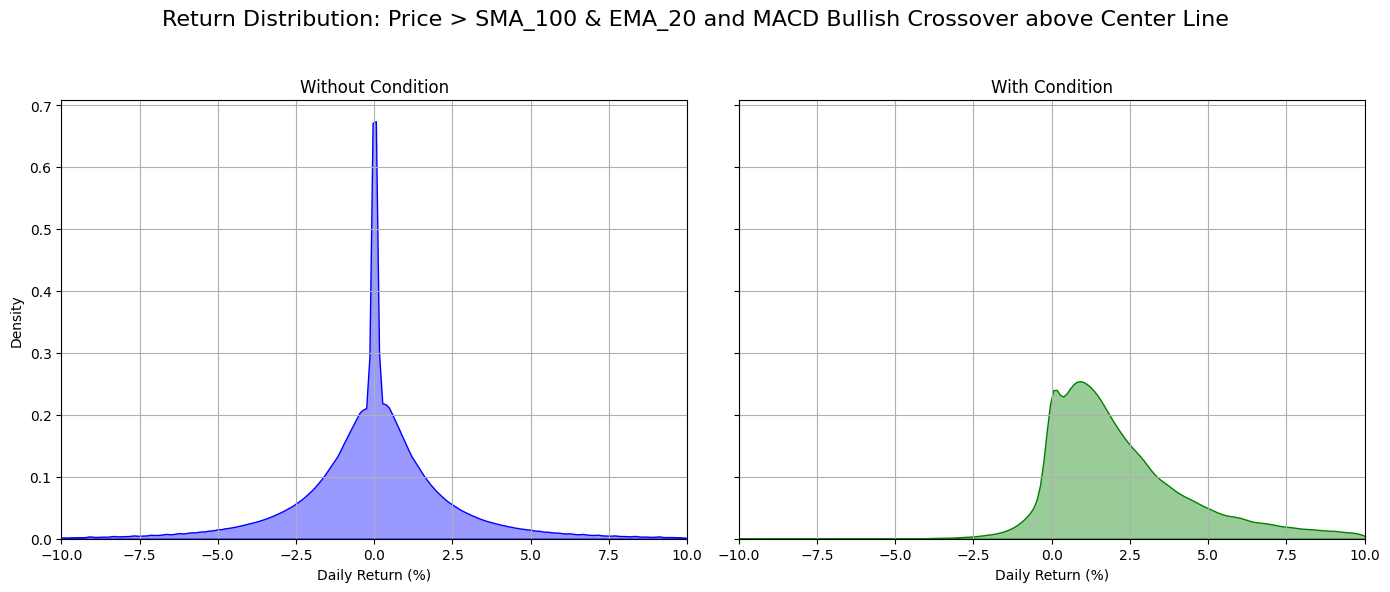

In [30]:
plot_return_distributions(conditioned_returns, unconditioned_returns,
                         title='Return Distribution: Price > SMA_100 & EMA_20 and MACD Bullish Crossover above Center Line')

In [ ]:
df_cond = pd.DataFrame({'returns_cond': returns_cond})
df_uncond = pd.DataFrame({'returns_uncond': returns_uncond})

# Save to Parquet files (you can change the file path)
df_cond.to_parquet('returns_cond.parquet', index=False)
df_uncond.to_parquet('returns_uncond.parquet', index=False)

In [28]:
plt.savefig("/media/mahir_uddin/Mahir/5-2/Data Analytics/adj_close_plot.png")

<Figure size 640x480 with 0 Axes>